In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, log_loss

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# columns with mixed types in both train and test sets
train_mixed_id = [16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51]
test_mixed_id = [14,15,16,17,18,19,20,22,23,24,25,49,50,51]

mixed_cols_train = train_df.iloc[:,train_mixed_id].columns
mixed_cols_test = test_df.iloc[:,test_mixed_id].columns

print("Mixed data type columns in the training set : ", mixed_cols_train)
print("Mixed data type columns in the test set : ", mixed_cols_test)

Mixed data type columns in the training set :  Index(['issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19', 'issue.20',
       'issue.21', 'issue.22', 'issue.23', 'issue.24', 'issue.25', 'issue.26',
       'parties.2', 'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')
Mixed data type columns in the test set :  Index(['issue.13', 'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18',
       'issue.19', 'issue.20', 'issue.21', 'issue.22', 'issue.23',
       'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')


In [4]:
train_df.head()

appno application country.alpha2        country.name decisiondate  \
0   2052/08     MS WORD             ru  Russian Federation          NaN   
1   4728/07     MS WORD             tr              Turkey          NaN   
2  44135/06     MS WORD             si            Slovenia          NaN   
3   2607/08     MS WORD             ch         Switzerland          NaN   
4  27001/06     MS WORD             ru  Russian Federation          NaN   

                                        docname doctypebranch  \
0                  CASE OF KOKOSHKINA v. RUSSIA       CHAMBER   
1                       CASE OF ÖZCAN v. TURKEY     COMMITTEE   
2            CASE OF DANIJEL PEČNIK v. SLOVENIA       CHAMBER   
3                CASE OF PALANCI v. SWITZERLAND       CHAMBER   
4  CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA       CHAMBER   

                                 ecli introductiondate issue.0  ...  \
0  ECLI:CE:ECHR:2009:0528JUD000205208              NaN     NaN  ...   
1  ECLI:CE:ECHR:2018:0710JUD000472807              NaN     NaN  ...   
2  ECLI:CE:ECHR:2012:1018JUD004413506              NaN     NaN  ...   
3  ECLI:CE:ECHR:2014:0325JUD000260708              NaN     NaN  ...   
4  ECLI:CE:ECHR:2009:1001JUD002700106              NaN     NaN  ...   

  ccl_article=6 ccl_article=7 ccl_article=8 ccl_article=9 ccl_article=p1  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             1             0             0             0              0   
3             0             0            -1             0              0   
4             0             0             0             0              0   

  ccl_article=p12 ccl_article=p4 ccl_article=p6 ccl_article=p7 importance  
0               0              0              0              0          4  
1               0              0              0              0          4  
2               0              0              0              0          4  
3               0              0              0              0          4  
4               0              0              0              0          4  

[5 rows x 328 columns]

In [5]:
test_df.head()

appno application country.alpha2        country.name decisiondate  \
0   1194/04     MS WORD             mk     North Macedonia          NaN   
1  53865/11     MS WORD             ua             Ukraine          NaN   
2  43838/07     MS WORD             ie             Ireland          NaN   
3  11157/04     MS WORD             ru  Russian Federation          NaN   
4  42443/02     MS WORD             ru  Russian Federation          NaN   

                                             docname doctypebranch  \
0  CASE OF CAMINSKI v. "THE FORMER YUGOSLAV REPUB...     COMMITTEE   
1                          CASE OF KUSHCH v. UKRAINE       CHAMBER   
2                              CASE OF O. v. IRELAND     COMMITTEE   
3             CASE OF ANCHUGOV AND GLADKOV v. RUSSIA       CHAMBER   
4                        CASE OF EMINBEYLI v. RUSSIA       CHAMBER   

                                 ecli introductiondate  \
0  ECLI:CE:ECHR:2011:0224JUD000119404              NaN   
1  ECLI:CE:ECHR:2015:1203JUD005386511              NaN   
2  ECLI:CE:ECHR:2012:0119JUD004383807              NaN   
3  ECLI:CE:ECHR:2013:0704JUD001115704              NaN   
4  ECLI:CE:ECHR:2009:0226JUD004244302              NaN   

                                             issue.0  ... ccl_article=5  \
0                                                NaN  ...             0   
1                                                NaN  ...             1   
2                                                NaN  ...             0   
3     Articles 32-33,134 and 135 of the Constitution  ...             0   
4  Articles 1, 11, 89, 96 and 122 of the Code of ...  ...             1   

  ccl_article=6 ccl_article=7 ccl_article=8 ccl_article=9 ccl_article=p1  \
0             1             0             0             0              0   
1             0             0             0             0              0   
2             1             0             0             0              0   
3             0             0             0             0              0   
4             0             0             0             0              0   

  ccl_article=p12 ccl_article=p4 ccl_article=p6 ccl_article=p7  
0               0              0              0              0  
1               0              0              0              0  
2               0              0              0              0  
3               0              0              0              0  
4               0              0              0              0  

[5 rows x 327 columns]

In [6]:
print("The shape of the training dataset : {}".format(train_df.shape))
print("The shape of the test dataset : {}".format(test_df.shape))

The shape of the training dataset : (8878, 328)
The shape of the test dataset : (4760, 327)


Text(0, 0.5, '% of null values in the training set')

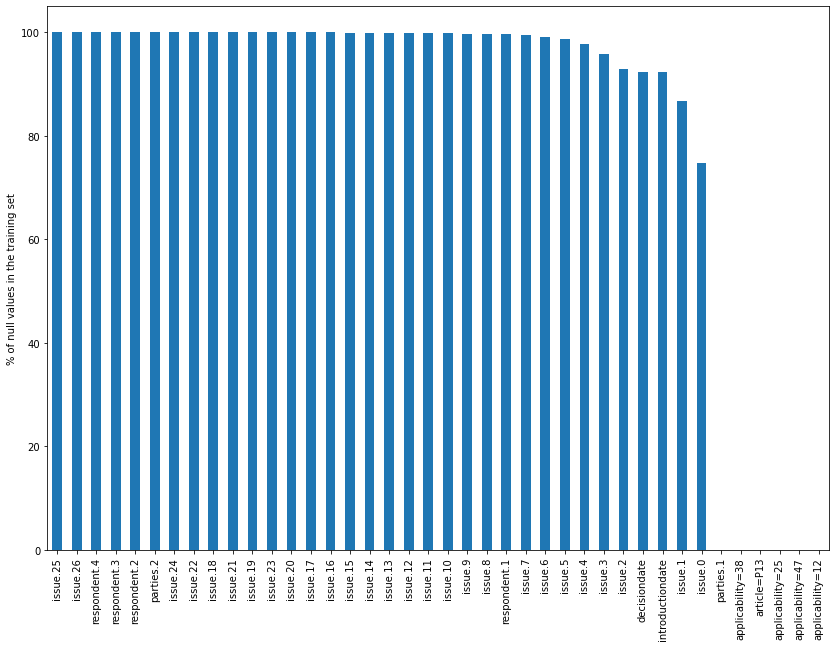

In [7]:
train_null_cols = train_df.isnull().sum().sort_values(ascending=False)/len(train_df)*100
train_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

Text(0, 0.5, '% of null values in the training set')

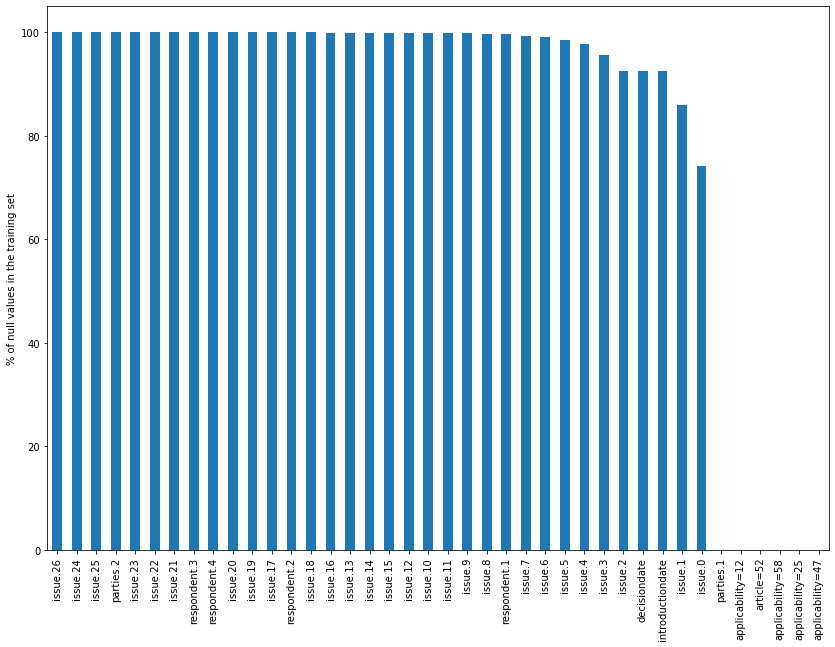

In [8]:
test_null_cols = test_df.isnull().sum().sort_values(ascending=False)/len(test_df)*100
test_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

In [9]:
# store the columns with >60% values as NULL
train_null_arr = np.array(train_null_cols[:34].index)
test_null_arr = np.array(test_null_cols[:34].index)

In [10]:
# check whether these NULL columns are same in number in both the cases
len(train_null_arr), len(test_null_arr)

(34, 34)

In [11]:
# Are these columns same in both the cases. if yes, then we should get back a null set below
set(train_null_arr).difference(test_null_arr)

set()

In [12]:
# drop these columns
train_df.drop(train_null_arr,axis=1,inplace=True)
test_df.drop(test_null_arr,axis=1,inplace=True)

In [13]:
print("The shape of the training dataset after dropping null columns : {}".format(train_df.shape))
print("The shape of the test dataset after dropping null columns : {}".format(test_df.shape))

The shape of the training dataset after dropping null columns : (8878, 294)
The shape of the test dataset after dropping null columns : (4760, 293)


In [14]:
# how many columns have only one unique value?
cols_with_one_val_train = np.array(train_df.nunique()[train_df.nunique()==1].index)
cols_with_one_val_test = np.array(test_df.nunique()[test_df.nunique()==1].index)

In [15]:
len(cols_with_one_val_test), len(cols_with_one_val_train)

(46, 23)

In [16]:
cols_with_one_val_train

array(['application', 'languageisocode', 'originatingbody_type',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=51', 'applicability=7',
       'applicability=28', 'applicability=29', 'applicability=31',
       'applicability=19', 'applicability=40', 'applicability=34',
       'applicability=27', 'applicability=64', 'applicability=4',
       'applicability=77', 'paragraphs=7-2', 'paragraphs=28-3',
       'paragraphs=27-1-b', 'paragraphs=32-2', 'paragraphs=46-4'],
      dtype=object)

In [17]:
cols_with_one_val_test

array(['application', 'languageisocode', 'originatingbody_type',
       'article=33', 'article=52', 'article=P13',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=22', 'applicability=15',
       'applicability=50', 'applicability=6', 'applicability=81',
       'applicability=66', 'applicability=49', 'applicability=63',
       'applicability=68', 'applicability=46', 'applicability=35',
       'applicability=54', 'applicability=16', 'applicability=57',
       'applicability=2', 'applicability=67', 'applicability=71',
       'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2',
       'paragraphs=P1-4', 'paragraphs=56-1', 'paragraphs=P7-1-2',
       'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a',
       'paragraphs=4-3', 'paragraphs=52', 'paragraphs=P13-1',
       'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
       'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17',
       'ccl_articl

In [18]:
# Are these columns common in both the sets?
set(cols_with_one_val_test).intersection(cols_with_one_val_train)

{'application',
 'documentcollectionid=CASELAW',
 'documentcollectionid=ENG',
 'documentcollectionid=JUDGMENTS',
 'languageisocode',
 'originatingbody_type'}

In [19]:
# drop the columns with only one unique values in both the datasets
cols_with_one_val = list(set(cols_with_one_val_test).intersection(cols_with_one_val_train))
train_df.drop(cols_with_one_val, axis=1, inplace=True)
test_df.drop(cols_with_one_val, axis=1, inplace=True)

In [20]:
# columns that have one unique val in training set but not in test set -> needs special attention
one_val_train = ['applicability=51', 'applicability=7','applicability=28', 'applicability=29', 'applicability=31',
                 'applicability=19', 'applicability=40', 'applicability=34','applicability=27', 'applicability=64', 
                 'applicability=4','applicability=77', 'paragraphs=7-2', 'paragraphs=28-3','paragraphs=27-1-b', 
                 'paragraphs=32-2', 'paragraphs=46-4']

for col in one_val_train:
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
---------------------------

In [21]:
# since these columns are constant during training, it is better to remove them from both the datasets. But before
# that let's apply value_counts on these columns in the test set

print("Test set")
for col in one_val_train:
    print("*********************")
    print("col : {}".format(col))
    print(test_df[col].value_counts())
    print("---------------------")

Test set
*********************
col : applicability=51
0    4759
1       1
Name: applicability=51, dtype: int64
---------------------
*********************
col : applicability=7
0    4758
1       2
Name: applicability=7, dtype: int64
---------------------
*********************
col : applicability=28
0    4759
1       1
Name: applicability=28, dtype: int64
---------------------
*********************
col : applicability=29
0    4759
1       1
Name: applicability=29, dtype: int64
---------------------
*********************
col : applicability=31
0    4759
1       1
Name: applicability=31, dtype: int64
---------------------
*********************
col : applicability=19
0    4759
1       1
Name: applicability=19, dtype: int64
---------------------
*********************
col : applicability=40
0    4759
1       1
Name: applicability=40, dtype: int64
---------------------
*********************
col : applicability=34
0    4759
1       1
Name: applicability=34, dtype: int64
---------------------
*

In [22]:
# Therefore, it looks like these columns are constant 99% of the time even in the test set and we can safely 
# remove them.
train_df.drop(one_val_train,axis=1,inplace=True)
test_df.drop(one_val_train,axis=1,inplace=True)

In [23]:
# columns that have one unique val in test set but not in training set -> we can keep these columns
one_val_test = ['article=33', 'article=52', 'article=P13', 'applicability=22', 'applicability=15',
                'applicability=50', 'applicability=6', 'applicability=81', 'applicability=66', 'applicability=49',
                'applicability=63', 'applicability=68', 'applicability=46', 'applicability=35','applicability=54', 
                'applicability=16', 'applicability=57', 'applicability=2', 'applicability=67', 'applicability=71',
                'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2', 'paragraphs=P1-4', 'paragraphs=56-1', 
                'paragraphs=P7-1-2', 'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a', 'paragraphs=4-3',
                'paragraphs=52', 'paragraphs=P13-1', 'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
                'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17', 'ccl_article=46', 'ccl_article=p12']

for col in one_val_test:
    print("column name : ", col)
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

column name :  article=33
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=52
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=P13
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=22
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=15
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=50
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=6
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=81
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=66
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=49
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability

In [24]:
# column 'ccl_article=17' has two binary values as -1 and 0. Let's investigate it.
train_df['ccl_article=17'].value_counts(normalize=True)

 0    0.999887
-1    0.000113
Name: ccl_article=17, dtype: float64

In [25]:
test_df['ccl_article=17'].value_counts(normalize=True)

0    1.0
Name: ccl_article=17, dtype: float64

In [26]:
# must be a mistake in entering value in the column 'ccl_article=17'. Let's drop this column as well
train_df.drop('ccl_article=17',axis=1,inplace=True)
test_df.drop('ccl_article=17',axis=1,inplace=True)

In [27]:
# Now let's look at distribution of categories in these columns in the training set
print("Train set")
one_val_test.remove('ccl_article=17')
for col in one_val_test:
    print("*********************")
    print("col : {}".format(col))
    print(train_df[col].value_counts())
    print("---------------------")

Train set
*********************
col : article=33
0    8877
1       1
Name: article=33, dtype: int64
---------------------
*********************
col : article=52
0    8876
1       2
Name: article=52, dtype: int64
---------------------
*********************
col : article=P13
0    8877
1       1
Name: article=P13, dtype: int64
---------------------
*********************
col : applicability=22
0    8877
1       1
Name: applicability=22, dtype: int64
---------------------
*********************
col : applicability=15
0    8877
1       1
Name: applicability=15, dtype: int64
---------------------
*********************
col : applicability=50
0    8876
1       2
Name: applicability=50, dtype: int64
---------------------
*********************
col : applicability=6
0    8876
1       2
Name: applicability=6, dtype: int64
---------------------
*********************
col : applicability=81
0    8877
1       1
Name: applicability=81, dtype: int64
---------------------
*********************
col : applic

In [28]:
# So, as we can see almost all the columns except 'paragraphs=35-2' has not more than 3 entries associated with 
# category=1. Even if the col 'paragraphs=35-2' has a very tiny fraction of category=1. So, we will drop these 
# columns from both the training and test sets as of now.

train_df.drop(one_val_test,axis=1,inplace=True)
test_df.drop(one_val_test,axis=1,inplace=True)

In [29]:
print("The shape of the training set after dropping columns with constant values : {}".format(train_df.shape))
print("The shape of the test set after dropping columns with constant values : {}".format(test_df.shape))

The shape of the training set after dropping columns with constant values : (8878, 231)
The shape of the test set after dropping columns with constant values : (4760, 230)


In [30]:
# check whether there is any duplicate row in both the datasets
print(train_df.duplicated().value_counts())
print("--------------------------")
print(test_df.duplicated().value_counts())

False    8878
dtype: int64
--------------------------
False    4760
dtype: int64


In [31]:
# let's now look at the cols with 'object' type
obj_cols_train = train_df.select_dtypes(include='object')
obj_cols_test = test_df.select_dtypes(include='object')

In [32]:
# are columns with object type are same in both the datsets
print("Train set")
print(list(obj_cols_train.columns))
print("-------------------------------------------------------------------------------------------------------------")
print("Test set")
print(list(obj_cols_test.columns))

Train set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']
-------------------------------------------------------------------------------------------------------------
Test set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']


In [33]:
# let's check these columns one by one

**Feature 'appno'**

In [34]:
print("col : appno")
print("Total no. of unique values in the training set : {}".format(train_df['appno'].nunique()))
print("Total no. of unique values in the test set : {}".format(test_df['appno'].nunique()))

col : appno
Total no. of unique values in the training set : 8799
Total no. of unique values in the test set : 4760


In [35]:
# this feature is more likely to be same as that of fetaure like id with different value for each instance and is
# not significant to train on. Let's drop it.
train_df.drop('appno',axis=1,inplace=True)
test_df.drop('appno',axis=1,inplace=True)

**Feature 'country.alpha2'**

In [36]:
print("col : country.alpha2")
print("Total no. of unique values in the training set : {}".format(train_df['country.alpha2'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.alpha2'].nunique()))
print("Train set : ",train_df['country.alpha2'].unique(),"\n")
print("Test set : ",test_df['country.alpha2'].unique(),"\n")

col : country.alpha2
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['ru' 'tr' 'si' 'ch' 'gr' 'pl' 'gb' 'hu' 'es' 'ua' 'me' 'cz' 'lt' 'az'
 'md' 'mk' 'ro' 'rs' 'de' 'bg' 'al' 'at' 'hr' 'sk' 'it' 'fi' 'fr' 'se'
 'no' 'is' 'am' 'mt' 'be' 'cy' 'ge' 'pt' 'dk' 'lv' 'ee' 'ba' 'nl' 'ie'
 'li' 'sm' 'lu' 'ad'] 

Test set :  ['mk' 'ua' 'ie' 'ru' 'bg' 'pl' 'gr' 'hu' 'de' 'at' 'hr' 'lt' 'md' 'si'
 'fi' 'tr' 'ro' 'cz' 'dk' 'gb' 'al' 'se' 'nl' 'rs' 'sk' 'is' 'lv' 'cy'
 'ge' 'it' 'ch' 'mt' 'es' 'pt' 'ba' 'ee' 'az' 'am' 'sm' 'no' 'be' 'me'
 'fr' 'lu' 'ad' 'li'] 



In [37]:
# do categories present in both of these files same?
print(set(train_df['country.alpha2'].unique()).difference(test_df['country.alpha2'].unique()))
print(set(test_df['country.alpha2'].unique()).difference(train_df['country.alpha2'].unique()))

set()
set()


In [38]:
# what is the distribution of different categories?
print("Train Set:")
print(train_df['country.alpha2'].value_counts(normalize=True))
print("\n")
print("Test Set:")
print(test_df['country.alpha2'].value_counts(normalize=True))

Train Set:
ru    0.185515
ua    0.105091
tr    0.097770
pl    0.069498
hu    0.041000
ro    0.037734
bg    0.034242
gb    0.033904
hr    0.028723
at    0.026245
sk    0.025569
it    0.025118
md    0.024668
si    0.023541
de    0.022077
fr    0.019374
az    0.015093
lt    0.014643
rs    0.014305
fi    0.013066
mk    0.012390
gr    0.010926
nl    0.010813
am    0.009687
ch    0.008223
mt    0.007885
se    0.007547
lv    0.007434
ge    0.006871
cy    0.006195
pt    0.005745
cz    0.005745
ba    0.005632
be    0.005407
es    0.005294
ee    0.004956
al    0.004731
me    0.004393
no    0.004055
dk    0.002591
ie    0.002365
is    0.001577
sm    0.000788
lu    0.000788
li    0.000676
ad    0.000113
Name: country.alpha2, dtype: float64


Test Set:
ru    0.205462
tr    0.095168
ua    0.090966
pl    0.074370
hu    0.041597
ro    0.039286
gb    0.034034
bg    0.033193
hr    0.028151
md    0.027941
sk    0.025210
at    0.023950
si    0.023109
it    0.020588
de    0.019118
rs    0.017227
lt    0.01

**Feature 'country.name'**

In [39]:
print("col : country.name")
print("Total no. of unique values in the training set : {}".format(train_df['country.name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.name'].nunique()))
print("Train set : ",train_df['country.name'].unique(),"\n")
print("Test set : ",test_df['country.name'].unique(),"\n")

col : country.name
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['Russian Federation' 'Turkey' 'Slovenia' 'Switzerland' 'Greece' 'Poland'
 'United Kingdom' 'Hungary' 'Spain' 'Ukraine' 'Montenegro' 'Czechia'
 'Lithuania' 'Azerbaijan' 'Moldova, Republic of' 'North Macedonia'
 'Romania' 'Serbia' 'Germany' 'Bulgaria' 'Albania' 'Austria' 'Croatia'
 'Slovakia' 'Italy' 'Finland' 'France' 'Sweden' 'Norway' 'Iceland'
 'Armenia' 'Malta' 'Belgium' 'Cyprus' 'Georgia' 'Portugal' 'Denmark'
 'Latvia' 'Estonia' 'Bosnia and Herzegovina' 'Netherlands' 'Ireland'
 'Liechtenstein' 'San Marino' 'Luxembourg' 'Andorra'] 

Test set :  ['North Macedonia' 'Ukraine' 'Ireland' 'Russian Federation' 'Bulgaria'
 'Poland' 'Greece' 'Hungary' 'Germany' 'Austria' 'Croatia' 'Lithuania'
 'Moldova, Republic of' 'Slovenia' 'Finland' 'Turkey' 'Romania' 'Czechia'
 'Denmark' 'United Kingdom' 'Albania' 'Sweden' 'Netherlands' 'Serbia'
 'Slovakia' 'Iceland' 'Lat

In [40]:
# do categories present in both of these files same?
print(set(train_df['country.name'].unique()).difference(test_df['country.name'].unique()))
print(set(test_df['country.name'].unique()).difference(train_df['country.name'].unique()))

set()
set()


In [41]:
# Actually, country.alpha2 and country.name are the same feature. We can drop one of them as of now. Let's drop 
# country.name.
train_df.drop("country.name",axis=1,inplace=True)
test_df.drop("country.name",axis=1,inplace=True)

**Feature 'docname'**

In [42]:
print("col : docname")
print("Total no. of unique values in the training set : {}".format(train_df['docname'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['docname'].nunique()))
print("Train set : ",train_df['docname'].unique(),"\n")
print("Test set : ",test_df['docname'].unique(),"\n")

col : docname
Total no. of unique values in the training set : 8682
Total no. of unique values in the test set : 4727 

Train set :  ['CASE OF KOKOSHKINA v. RUSSIA' 'CASE OF ÖZCAN v. TURKEY'
 'CASE OF DANIJEL PEČNIK v. SLOVENIA' ... 'CASE OF BABUSHKIN v. RUSSIA'
 'CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN' 'CASE OF TUR v. POLAND'] 

Test set :  ['CASE OF CAMINSKI v. "THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"'
 'CASE OF KUSHCH v. UKRAINE' 'CASE OF O. v. IRELAND' ...
 'CASE OF PASCAL v. ROMANIA' 'CASE OF DAOUKOPOULOS v. GREECE'
 'CASE OF VOGLREITER v. AUSTRIA'] 



In [43]:
train_df['docname'].unique()[:5]

array(['CASE OF KOKOSHKINA v. RUSSIA', 'CASE OF ÖZCAN v. TURKEY',
       'CASE OF DANIJEL PEČNIK v. SLOVENIA',
       'CASE OF PALANCI v. SWITZERLAND',
       'CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA'], dtype=object)

In [44]:
train_df[['country.alpha2', 'docname']]

country.alpha2                                       docname
0                ru                  CASE OF KOKOSHKINA v. RUSSIA
1                tr                       CASE OF ÖZCAN v. TURKEY
2                si            CASE OF DANIJEL PEČNIK v. SLOVENIA
3                ch                CASE OF PALANCI v. SWITZERLAND
4                ru  CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA
...             ...                                           ...
8873             ua        CASE OF RASHITOV AND OTHERS v. UKRAINE
8874             ru                     CASE OF URMANOV v. RUSSIA
8875             ru                   CASE OF BABUSHKIN v. RUSSIA
8876             es    CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN
8877             pl                         CASE OF TUR v. POLAND

[8878 rows x 2 columns]

In [45]:
# this feature contains two pieces of information - person name and the country name against which he/she filed a 
# case. The country information is already present in the feature country.alpha2 and name of a person is more similar
# to ids. So, we can drop this feature as well.

train_df.drop('docname', axis=1,inplace=True)
test_df.drop('docname', axis=1,inplace=True)

**Feature 'doctypebranch'**

In [46]:
print("col : doctypebranch")
print("Total no. of unique values in the training set : {}".format(train_df['doctypebranch'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['doctypebranch'].nunique()))
print("Train set : ",train_df['doctypebranch'].unique(),"\n")
print("Test set : ",test_df['doctypebranch'].unique(),"\n")

col : doctypebranch
Total no. of unique values in the training set : 3
Total no. of unique values in the test set : 3 

Train set :  ['CHAMBER' 'COMMITTEE' 'GRANDCHAMBER'] 

Test set :  ['COMMITTEE' 'CHAMBER' 'GRANDCHAMBER'] 



**Feature 'ecli'**

In [47]:
print("col : ecli")
print("Total no. of unique values in the training set : {}".format(train_df['ecli'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['ecli'].nunique()))
print("Train set : ",train_df['ecli'].unique(),"\n")
print("Test set : ",test_df['ecli'].unique(),"\n")

col : ecli
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['ECLI:CE:ECHR:2009:0528JUD000205208' 'ECLI:CE:ECHR:2018:0710JUD000472807'
 'ECLI:CE:ECHR:2012:1018JUD004413506' ...
 'ECLI:CE:ECHR:2007:1018JUD006725301' 'ECLI:CE:ECHR:1997:1219JUD002673795'
 'ECLI:CE:ECHR:2007:1023JUD002169505'] 

Test set :  ['ECLI:CE:ECHR:2011:0224JUD000119404' 'ECLI:CE:ECHR:2015:1203JUD005386511'
 'ECLI:CE:ECHR:2012:0119JUD004383807' ...
 'ECLI:CE:ECHR:2012:0417JUD000080509' 'ECLI:CE:ECHR:2018:0712JUD004471116'
 'ECLI:CE:ECHR:2019:0919JUD002115518'] 



In [48]:
# This feature is basically unique id associated with a case and can be dropped.
train_df.drop('ecli',axis=1,inplace=True)
test_df.drop('ecli',axis=1,inplace=True)

**Feature 'itemid'**

In [49]:
print("col : itemid")
print("Total no. of unique values in the training set : {}".format(train_df['itemid'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['itemid'].nunique()))
print("Train set : ",train_df['itemid'].unique(),"\n")
print("Test set : ",test_df['itemid'].unique(),"\n")

col : itemid
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['001-92699' '001-184490' '001-113810' ... '001-82818' '001-58127'
 '001-82921'] 

Test set :  ['001-103613' '001-158963' '001-108659' ... '001-110382' '001-184485'
 '001-195866'] 



In [50]:
# again a feature similar to ids and hence dropped.
train_df.drop('itemid',axis=1,inplace=True)
test_df.drop('itemid',axis=1,inplace=True)

**Feature 'judgementdate'**

In [51]:
print("col : judgementdate")
print("Total no. of unique values in the training set : {}".format(train_df['judgementdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['judgementdate'].nunique()))
print("Train set : ",train_df['judgementdate'].unique(),"\n")
print("Test set : ",test_df['judgementdate'].unique(),"\n")

col : judgementdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [52]:
# date like feature. We will come back to this later.

**Feature 'kpdate'**

In [53]:
print("col : kpdate")
print("Total no. of unique values in the training set : {}".format(train_df['kpdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['kpdate'].nunique()))
print("Train set : ",train_df['kpdate'].unique(),"\n")
print("Test set : ",test_df['kpdate'].unique(),"\n")

col : kpdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [54]:
# looks like features 'judgementdate' and 'kpdate' represent the same thing.
train_df[['judgementdate','kpdate']].head(10)

judgementdate      kpdate
0    28/05/2009  28/05/2009
1    10/07/2018  10/07/2018
2    18/10/2012  18/10/2012
3    25/03/2014  25/03/2014
4    01/10/2009  01/10/2009
5    11/04/2002  11/04/2002
6    20/06/2006  20/06/2006
7    27/11/2007  27/11/2007
8    01/03/2001  01/03/2001
9    02/12/2008  02/12/2008

In [55]:
test_df[['judgementdate','kpdate']].head(10)

judgementdate      kpdate
0    24/02/2011  24/02/2011
1    03/12/2015  03/12/2015
2    19/01/2012  19/01/2012
3    04/07/2013  04/07/2013
4    26/02/2009  26/02/2009
5    12/03/2009  12/03/2009
6    27/11/2014  27/11/2014
7    12/02/2009  12/02/2009
8    23/10/2012  23/10/2012
9    13/01/2011  13/01/2011

In [56]:
# So these two are duplicate features and we drop one of them.
train_df.drop('kpdate',axis=1,inplace=True)
test_df.drop('kpdate',axis=1,inplace=True)

**Feature 'originatingbody_name'**

In [57]:
print("col : originatingbody_name")
print("Total no. of unique values in the training set : {}".format(train_df['originatingbody_name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['originatingbody_name'].nunique()))
print("Train set : ",train_df['originatingbody_name'].unique(),"\n")
print("Test set : ",test_df['originatingbody_name'].unique(),"\n")

col : originatingbody_name
Total no. of unique values in the training set : 13
Total no. of unique values in the test set : 13 

Train set :  ['First Section' 'Second Section Committee' 'Fith Section'
 'Second Section' 'Fourth Section' 'Chamber' 'Fourth Section Committee'
 'Fith Section Committee' 'Third Section Committee' 'Third Section'
 'First Section Committee' 'Grand Chamber' 'Plenary'] 

Test set :  ['Fith Section Committee' 'Fith Section' 'First Section' 'Fourth Section'
 'First Section Committee' 'Fourth Section Committee'
 'Third Section Committee' 'Second Section Committee' 'Third Section'
 'Second Section' 'Grand Chamber' 'Chamber' 'Plenary'] 



In [58]:
# are all categories same in both the datasets?
print(set(train_df['originatingbody_name'].unique()).difference(test_df['originatingbody_name']))
print(set(test_df['originatingbody_name'].unique()).difference(train_df['originatingbody_name']))

set()
set()


**Feature 'parties.0'**

In [59]:
print("col : parties.0")
print("Total no. of unique values in the training set : {}".format(train_df['parties.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.0'].nunique()))
print("Train set : ",train_df['parties.0'].unique(),"\n")
print("Test set : ",test_df['parties.0'].unique(),"\n")

col : parties.0
Total no. of unique values in the training set : 8361
Total no. of unique values in the test set : 4624 

Train set :  ['KOKOSHKINA' 'ÖZCAN' 'DANIJEL PEČNIK' ... 'BABUSHKIN'
 'BRUALLA GÓMEZ DE LA TORRE' 'TUR'] 

Test set :  ['CAMINSKI' 'KUSHCH' 'O.' ... 'PASCAL' 'DAOUKOPOULOS' 'VOGLREITER'] 



In [60]:
# if we go back to the dropped feature 'docname', we can associate the feature 'parties.0'  most likely to represent the name
# of person filing the case. Since, we have dropped this info earlier, we will drop it this time also.

train_df.drop('parties.0',axis=1,inplace=True)
test_df.drop('parties.0',axis=1,inplace=True)

**Feature 'parties.1'**

In [61]:
print("col : parties.1")
print("Total no. of unique values in the training set : {}".format(train_df['parties.1'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.1'].nunique()))
print("Train set : ",train_df['parties.1'].unique(),"\n")
print("Test set : ",test_df['parties.1'].unique(),"\n")

col : parties.1
Total no. of unique values in the training set : 93
Total no. of unique values in the test set : 76 

Train set :  ['RUSSIA' 'TURKEY' 'SLOVENIA' 'SWITZERLAND' 'GREECE' 'POLAND'
 'THE UNITED KINGDOM' 'HUNGARY' 'SPAIN' 'UKRAINE' 'MONTENEGRO'
 'THE CZECH REPUBLIC [Extracts]' 'LITHUANIA' 'AZERBAIJAN' 'MOLDOVA'
 '"THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"' 'ROMANIA' 'SERBIA'
 'GERMANY' 'BULGARIA' 'ALBANIA' 'AUSTRIA' 'CROATIA' 'SLOVAKIA' 'ITALY'
 'FINLAND' 'FRANCE [Extracts]' 'SWEDEN' 'NORWAY' 'FRANCE' 'ICELAND'
 'ARMENIA' 'MALTA' 'BELGIUM [Extracts]' 'BELGIUM' 'CYPRUS' 'GEORGIA'
 'THE REPUBLIC OF MOLDOVA' 'PORTUGAL' 'THE CZECH REPUBLIC' 'DENMARK'
 'LATVIA' 'ESTONIA' 'BOSNIA AND HERZEGOVINA' 'THE NETHERLANDS'
 'THE REPUBLIC OF MOLDOVA AND RUSSIA' 'SAN MARINO AND ITALY'
 'ITALY [Extracts]' 'IRELAND' 'ROMANIA [Extracts]' 'NORTH MACEDONIA'
 'BULGARIA [Extracts]' 'LIECHTENSTEIN' 'AZERBAIJAN AND TURKEY'
 'UKRAINE [Extracts]' 'ITALIE' 'MONTENEGRO AND SERBIA'
 'ROMANIA AND BULGARIA

In [62]:
# This feature seems to represent country names and might be duplicate with country.alpha2

train_df[['country.alpha2','parties.1']].head(10)

country.alpha2           parties.1
0             ru              RUSSIA
1             tr              TURKEY
2             si            SLOVENIA
3             ch         SWITZERLAND
4             ru              RUSSIA
5             gr              GREECE
6             pl              POLAND
7             gb  THE UNITED KINGDOM
8             hu             HUNGARY
9             tr              TURKEY

In [63]:
test_df[['country.alpha2','parties.1']].head()

country.alpha2                                    parties.1
0             mk  "THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"
1             ua                                      UKRAINE
2             ie                                      IRELAND
3             ru                                       RUSSIA
4             ru                                       RUSSIA

In [64]:
# our guess is right! We drop this feature.

train_df.drop('parties.1',axis=1,inplace=True)
test_df.drop('parties.1',axis=1,inplace=True)

**Feature 'respondent.0'**

In [65]:
print("col : respondent.0")
print("Total no. of unique values in the training set : {}".format(train_df['respondent.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['respondent.0'].nunique()))
print("Train set : ",train_df['respondent.0'].unique(),"\n")
print("Test set : ",test_df['respondent.0'].unique(),"\n")

col : respondent.0
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['RUS' 'TUR' 'SVN' 'CHE' 'GRC' 'POL' 'GBR' 'HUN' 'ESP' 'UKR' 'MNE' 'CZE'
 'LTU' 'AZE' 'MDA' 'MKD' 'ROU' 'SRB' 'DEU' 'BGR' 'ALB' 'AUT' 'HRV' 'SVK'
 'ITA' 'FIN' 'FRA' 'SWE' 'NOR' 'ISL' 'ARM' 'MLT' 'BEL' 'CYP' 'GEO' 'PRT'
 'DNK' 'LVA' 'EST' 'BIH' 'NLD' 'IRL' 'LIE' 'SMR' 'LUX' 'AND'] 

Test set :  ['MKD' 'UKR' 'IRL' 'RUS' 'BGR' 'POL' 'GRC' 'HUN' 'DEU' 'AUT' 'HRV' 'LTU'
 'MDA' 'SVN' 'FIN' 'TUR' 'ROU' 'CZE' 'DNK' 'GBR' 'ALB' 'SWE' 'NLD' 'SRB'
 'SVK' 'ISL' 'LVA' 'CYP' 'GEO' 'ITA' 'CHE' 'MLT' 'ESP' 'PRT' 'BIH' 'EST'
 'AZE' 'ARM' 'SMR' 'NOR' 'BEL' 'MNE' 'FRA' 'LUX' 'AND' 'LIE'] 



In [66]:
# again this info is likely to be same as the feature 'country.alpha2'
train_df[['country.alpha2','respondent.0']].head(10)

country.alpha2 respondent.0
0             ru          RUS
1             tr          TUR
2             si          SVN
3             ch          CHE
4             ru          RUS
5             gr          GRC
6             pl          POL
7             gb          GBR
8             hu          HUN
9             tr          TUR

In [67]:
test_df[['country.alpha2','respondent.0']].head(10)

country.alpha2 respondent.0
0             mk          MKD
1             ua          UKR
2             ie          IRL
3             ru          RUS
4             ru          RUS
5             ru          RUS
6             ua          UKR
7             bg          BGR
8             pl          POL
9             gr          GRC

In [68]:
# hence we drop it.
train_df.drop('respondent.0',axis=1,inplace=True)
test_df.drop('respondent.0',axis=1,inplace=True)

In [69]:
# remaining cols with 'object' type
final_obj_cols = train_df.select_dtypes(include='object').columns
final_obj_cols

Index(['country.alpha2', 'doctypebranch', 'judgementdate',
       'originatingbody_name'],
      dtype='object')

In [70]:
print("The shape of the training set after dropping categorical features : {}".format(train_df.shape))
print("The shape of the test set after dropping categorical features : {}".format(test_df.shape))

The shape of the training set after dropping categorical features : (8878, 222)
The shape of the test set after dropping categorical features : (4760, 221)


In [71]:
# let's look at the mixed data type features now. Since, we have dropped quite a few cols already, let's first 
# check whether these features are still present in the respective datasets.

print([col for col in mixed_cols_train if col in train_df.columns])
print([col for col in mixed_cols_test if col in test_df.columns])

[]
[]


In [72]:
# so, we have already removed these features from our dataset. Let's look at some non-categorical features.
train_df.select_dtypes(include='bool')

separateopinion
0               False
1               False
2                True
3                True
4               False
...               ...
8873            False
8874            False
8875            False
8876            False
8877            False

[8878 rows x 1 columns]

In [73]:
test_df.select_dtypes(include='bool')

separateopinion
0               False
1               False
2               False
3               False
4               False
...               ...
4755            False
4756            False
4757            False
4758            False
4759            False

[4760 rows x 1 columns]

In [74]:
# let's convert this as follows : True->1, False->0.
train_df['separateopinion'] = train_df['separateopinion'].apply(lambda x:1 if x is True else 0)
test_df['separateopinion'] = test_df['separateopinion'].apply(lambda x:1 if x is True else 0)

In [75]:
train_df.select_dtypes(include='float64')

rank
0      685.417419
1     2641.901855
2      942.213440
3     1121.770142
4      704.821594
...           ...
8873  2424.463379
8874  1698.433228
8875   607.506531
8876   362.514832
8877   608.091614

[8878 rows x 1 columns]

In [76]:
test_df.select_dtypes(include='float64')

rank
0      794.766724
1     1448.891235
2      868.238831
3     1024.145508
4      672.862183
...           ...
4755  1678.799805
4756  1161.929688
4757   892.368225
4758  2646.512939
4759  4270.748047

[4760 rows x 1 columns]

In [77]:
# keep in mind, this feature m ght require scaling in future.

In [77]:
train_df.select_dtypes(include='int64')

originatingbody  respondentOrderEng  separateopinion  sharepointid  \
0                   4                  38                0        349418   
1                  26                  47                0        476616   
2                  23                  43                1        373194   
3                   5                  46                1        392525   
4                   4                  38                0        423100   
...               ...                 ...              ...           ...   
8873               29                  48                0        473530   
8874               27                  38                0        456937   
8875                6                  38                0        340823   
8876                9                  44                0        443927   
8877                7                  35                0        343850   

      typedescription  article=3  article=6  article=P1  article=5  article=8  \
0                  15          1          0           0          1          0   
1                  15          0          0           0          1          0   
2                  15          0          1           0          0          0   
3                  15          0          0           0          0          1   
4                  15          1          0           0          1          0   
...               ...        ...        ...         ...        ...        ...   
8873               15          0          1           0          0          0   
8874               15          0          0           0          1          0   
8875               15          1          0           0          0          0   
8876               15          0          1           0          0          0   
8877               15          0          1           0          0          0   

      ...  ccl_article=5  ccl_article=6  ccl_article=7  ccl_article=8  \
0     ...              1              0              0              0   
1     ...              1              0              0              0   
2     ...              0              1              0              0   
3     ...              0              0              0             -1   
4     ...              1              0              0              0   
...   ...            ...            ...            ...            ...   
8873  ...              0              1              0              0   
8874  ...              1              0              0              0   
8875  ...              0              0              0              0   
8876  ...              0             -1              0              0   
8877  ...              0              1              0              0   

      ccl_article=9  ccl_article=p1  ccl_article=p4  ccl_article=p6  \
0                 0               0               0               0   
1                 0               0               0               0   
2                 0               0               0               0   
3                 0               0               0               0   
4                 0               0               0               0   
...             ...             ...             ...             ...   
8873              0               0               0               0   
8874              0               0               0               0   
8875              0               0               0               0   
8876              0               0               0               0   
8877              0               0               0               0   

      ccl_article=p7  importance  
0                  0           4  
1                  0           4  
2                  0           4  
3                  0           4  
4                  0           4  
...              ...         ...  
8873               0           4  
8874               0           4  
8875               0           4  
8876               0           3  
8877 

In [78]:
# let's first examine non-binary features

**Feature 'sharepointid'**

In [79]:
print("Total number of unique values in the training set : {}".format(train_df['sharepointid'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['sharepointid'].nunique()))

Total number of unique values in the training set : 8878
Total number of unique values in the test set : 4760


In [80]:
# again, this feature is like ids and can be dropped with no harm.
train_df.drop('sharepointid',axis=1,inplace=True)
test_df.drop('sharepointid',axis=1,inplace=True)

**Feature 'originatingbody'**

In [81]:
print("Total number of unique values in the training set : {}".format(train_df['originatingbody'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['originatingbody'].nunique()))

Total number of unique values in the training set : 13
Total number of unique values in the test set : 13


**Feature 'respondentOrderEng'**

In [82]:
print("Total number of unique values in the training set : {}".format(train_df['respondentOrderEng'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['respondentOrderEng'].nunique()))

Total number of unique values in the training set : 46
Total number of unique values in the test set : 46


**Feature 'typedescription'**

In [83]:
print("Total number of unique values in the training set : {}".format(train_df['typedescription'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['typedescription'].nunique()))

Total number of unique values in the training set : 5
Total number of unique values in the test set : 3


In [84]:
train_df['typedescription'].unique()

array([15, 14, 18, 12, 19])

In [85]:
test_df['typedescription'].unique()

array([15, 14, 12])

In [86]:
# the feature 'typedescription' looks like a categorical feature in disguise. We can use as it is or apply 
# onehotencoding.

# let's now select only the binary features.
binary_feat_train = list(train_df.select_dtypes(include='int64').nunique()[train_df.select_dtypes(include='int64').nunique()==2].index)
binary_feat_test = list(test_df.select_dtypes(include='int64').nunique()[test_df.select_dtypes(include='int64').nunique()==2].index)

In [87]:
print("Number of binary features in the training set : {}".format(len(binary_feat_train)))
print("Number of binary features in the test set : {}".format(len(binary_feat_test)))

Number of binary features in the training set : 192
Number of binary features in the test set : 194


In [88]:
# there two more binary features in test set compared to the traing set. 
print(len(set(binary_feat_test).intersection(binary_feat_train)))
print(len(set(binary_feat_train).intersection(binary_feat_test)))

192
192


In [89]:
set(binary_feat_test).difference(binary_feat_train)

{'ccl_article=12', 'ccl_article=25'}

In [90]:
test_df['ccl_article=12'].value_counts(normalize=True)

0    0.99958
1    0.00042
Name: ccl_article=12, dtype: float64

In [91]:
test_df['ccl_article=25'].value_counts(normalize=True)

0    0.99958
1    0.00042
Name: ccl_article=25, dtype: float64

In [92]:
train_df['ccl_article=12'].value_counts(normalize=True)

 0    0.998085
-1    0.001126
 1    0.000788
Name: ccl_article=12, dtype: float64

In [93]:
train_df['ccl_article=25'].value_counts(normalize=True)

 0    0.999099
 1    0.000563
-1    0.000338
Name: ccl_article=25, dtype: float64

In [94]:
# since 99% instances in both these features belong to a single category, we can assume that they are basically
# constant features and should be dropped.
binary_feat_to_drop = list(set(binary_feat_test).difference(binary_feat_train))
train_df.drop(binary_feat_to_drop,axis=1,inplace=True)
test_df.drop(binary_feat_to_drop,axis=1,inplace=True)

In [95]:
binary_feat_test.remove(binary_feat_to_drop[0])
binary_feat_test.remove(binary_feat_to_drop[1])

In [96]:
# check whether any binary feature contains suspicious values, e.g., -1,999 etc.

cols_train = [col for col in binary_feat_train for val in train_df[col].unique() if val!=0 and val!=1]
cols_test = [col for col in binary_feat_test for val in test_df[col].unique() if val!=0 and val!=1]

In [97]:
cols_train

['ccl_article=18']

In [98]:
cols_test

['ccl_article=18']

In [99]:
print("Train set")
print(train_df['ccl_article=18'].value_counts(normalize=True))
print("----------------------------------------")
print("Test set")
print(test_df['ccl_article=18'].value_counts(normalize=True))

Train set
 0    0.998085
-1    0.001915
Name: ccl_article=18, dtype: float64
----------------------------------------
Test set
 0    0.997269
-1    0.002731
Name: ccl_article=18, dtype: float64


In [100]:
# So, like before, we can drop this column. 
train_df.drop('ccl_article=18',axis=1,inplace=True)
test_df.drop('ccl_article=18',axis=1,inplace=True)

In [101]:
# let's now look at the features which are binary in real but contains some garbage values.

pseudo_bin_feat_train = list(train_df.select_dtypes(include='int64').nunique()[train_df.select_dtypes(include='int64').nunique()>2].index)
pseudo_bin_feat_test = list(test_df.select_dtypes(include='int64').nunique()[test_df.select_dtypes(include='int64').nunique()>2].index)

In [102]:
set(pseudo_bin_feat_train).difference(pseudo_bin_feat_test)

{'importance'}

In [103]:
# But we have already investigated some of these non-binary features. Let's remove them.
pseudo_bin_feat_train.remove('originatingbody')
pseudo_bin_feat_train.remove('respondentOrderEng')
pseudo_bin_feat_train.remove('typedescription')
pseudo_bin_feat_train.remove('importance')
pseudo_bin_feat_test.remove('originatingbody')
pseudo_bin_feat_test.remove('respondentOrderEng')
pseudo_bin_feat_test.remove('typedescription')

In [104]:
for col in pseudo_bin_feat_train:
    print("Train set \n")
    print(train_df[col].value_counts())
    print("Test set \n")
    print(test_df[col].value_counts())
    print("--------------------------------------------------------------")

Train set 

 0    8117
 1     700
-1      61
Name: ccl_article=1, dtype: int64
Test set 

 0    4315
 1     404
-1      41
Name: ccl_article=1, dtype: int64
--------------------------------------------------------------
Train set 

 0    8449
 1     332
-1      97
Name: ccl_article=10, dtype: int64
Test set 

 0    4514
 1     185
-1      61
Name: ccl_article=10, dtype: int64
--------------------------------------------------------------
Train set 

 0    8718
 1     136
-1      24
Name: ccl_article=11, dtype: int64
Test set 

 0    4657
 1      86
-1      17
Name: ccl_article=11, dtype: int64
--------------------------------------------------------------
Train set 

 0    8121
 1     694
-1      63
Name: ccl_article=13, dtype: int64
Test set 

 0    4341
 1     364
-1      55
Name: ccl_article=13, dtype: int64
--------------------------------------------------------------
Train set 

 0    8829
-1      46
 1       3
Name: ccl_article=14, dtype: int64
Test set 

 0    4731
-1      28
 

In [106]:
# the feature 'ccl_article=14' is quite peculliar. It has more entries for category -1 in both train and test sets 
# as compared tocategory 1. It could be a typo either in favour of -1 or +1. If we assume that 1 is a typo as it is 
# fewer in number, then we can replace 1 by -1 and treat it as null. But then it becomes a constant feature with one
# unique value which is zero and some null entries (when we impute it by 0). In that situation, it is better to 
# drop this feature.
# However, if we do reverse, i.e., replace -1 by 1, then it becomes a proper binary feature. Let's first go with the
# first option. If our model performs poorly, we will try to tweak it.

train_df.drop('ccl_article=14',axis=1,inplace=True)
test_df.drop('ccl_article=14',axis=1,inplace=True)

In [105]:
pseudo_bin_feat_train.remove('ccl_article=14')
# for the rest of the features in pseudo_bin_feat_train, we will treat -1 as null entries and impute them later.

In [106]:
# missing value imputation
# but before that, let's check the category distribution in each binary feature with null values
for col in pseudo_bin_feat_train:
    print("Train set \n")
    print(train_df[col].value_counts(normalize=True))
    print("Test set \n")
    print(test_df[col].value_counts(normalize=True))
    print("--------------------------------------------------------------")

Train set 

 0    0.914282
 1    0.078847
-1    0.006871
Name: ccl_article=1, dtype: float64
Test set 

 0    0.906513
 1    0.084874
-1    0.008613
Name: ccl_article=1, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.951678
 1    0.037396
-1    0.010926
Name: ccl_article=10, dtype: float64
Test set 

 0    0.948319
 1    0.038866
-1    0.012815
Name: ccl_article=10, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.981978
 1    0.015319
-1    0.002703
Name: ccl_article=11, dtype: float64
Test set 

 0    0.978361
 1    0.018067
-1    0.003571
Name: ccl_article=11, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.914733
 1    0.078171
-1    0.007096
Name: ccl_article=13, dtype: float64
Test set 

 0    0.911975
 1    0.076471
-1    0.011555
Name: ccl_article=13, dtype: float64
--------------------------------------------------------------
Tr

In [107]:
# stop!! looks like we can drop even more features, e.g. features with 99% dominance by one category.
cols_to_drop = ['ccl_article=38','ccl_article=4', 'ccl_article=7', 'ccl_article=9','ccl_article=p4','ccl_article=p7']
train_df.drop(cols_to_drop,axis=1,inplace=True)
test_df.drop(cols_to_drop,axis=1,inplace=True)

In [108]:
for col in cols_to_drop:
    pseudo_bin_feat_train.remove(col)

In [111]:
#train_df['judgementdate']

In [109]:
# let's look at the datetime fetaure 'judgementdate' and break it down into several parts.

train_df['judge_year'] = train_df['judgementdate'].apply(lambda x:int(x.split("/")[-1].strip()))
test_df['judge_year'] = test_df['judgementdate'].apply(lambda x:int(x.split("/")[-1].strip()))

In [110]:
# how many different judgement years are there?
print("unique values in the col judgementyear in the training set :", sorted(train_df['judge_year'].unique()))
print("\n")
print("unique values in the col judgementyear in the test set :", sorted(test_df['judge_year'].unique()))

unique values in the col judgementyear in the training set : [1968, 1969, 1971, 1974, 1975, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


unique values in the col judgementyear in the test set : [1961, 1968, 1970, 1972, 1975, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [111]:
# let's club the years in decades and look at the distribution of importance vs judge_year

def year_to_decade(year):
    
    """
    
    """
    
    if year>=1960 and year<=1969:
        return "19_60s"
    elif year>=1970 and year<=1979:
        return "19_70s"
    elif year>=1980 and year<=1989:
        return "19_80s"
    elif year>=1990 and year<=1999:
        return "19_90s"
    elif year>=2000 and year<=2009:
        return "20_10s"
    else:
        return "20_20s"
    
    
train_df['judge_decade'] = train_df['judge_year'].apply(year_to_decade)
test_df['judge_decade'] = test_df['judge_year'].apply(year_to_decade)

In [112]:
train_df[['judge_year','judge_decade']][:10]

judge_year judge_decade
0        2009       20_10s
1        2018       20_20s
2        2012       20_20s
3        2014       20_20s
4        2009       20_10s
5        2002       20_10s
6        2006       20_10s
7        2007       20_10s
8        2001       20_10s
9        2008       20_10s

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='judge_decade', ylabel='count'>

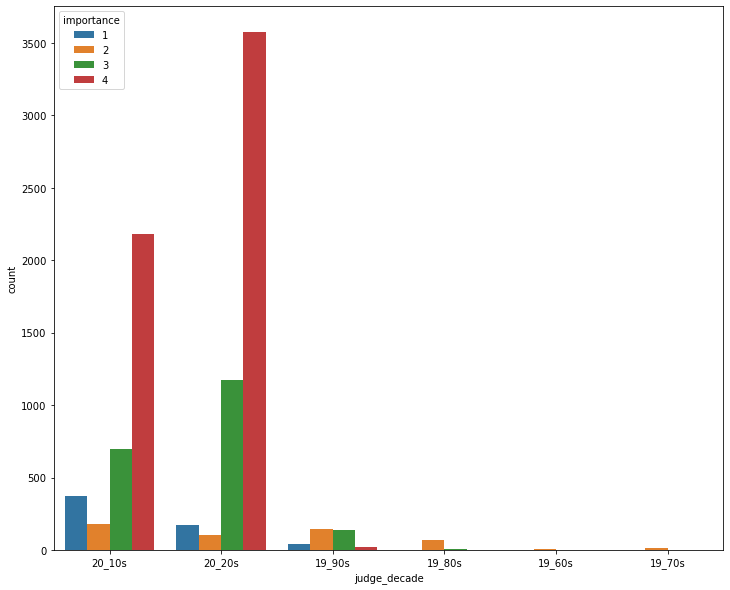

In [113]:
plt.figure(figsize=(12,10))
sns.countplot('judge_decade',hue='importance',data=train_df)

In [114]:
# from the distribution, it is clear that importance of cases filed has increased with decades. We will use it as a
# feature and drop the judge_year column.
train_df.drop('judge_year',axis=1,inplace=True)
test_df.drop('judge_year',axis=1,inplace=True)

# as of now, we will not be engineering the feature judgementdate anymore and won't use it during training. If, in
# future, we need to improve our model by adding some features, we will come back to it.

In [115]:
# Let's now drop cols with high cardinality
print("Training set")
for col in train_df.select_dtypes(include='object').columns:
    print("cardinality of {} is {}".format(col, train_df[col].nunique()))
print("-------------------------------------------------")    
print("Test set")
for col in test_df.select_dtypes(include='object').columns:
    print("cardinality of {} is {}".format(col, test_df[col].nunique()))

Training set
cardinality of country.alpha2 is 46
cardinality of doctypebranch is 3
cardinality of judgementdate is 1906
cardinality of originatingbody_name is 13
cardinality of judge_decade is 6
-------------------------------------------------
Test set
cardinality of country.alpha2 is 46
cardinality of doctypebranch is 3
cardinality of judgementdate is 1584
cardinality of originatingbody_name is 13
cardinality of judge_decade is 6


In [116]:
train_df.drop(['country.alpha2','judgementdate'],axis=1,inplace=True)
test_df.drop(['country.alpha2','judgementdate'],axis=1,inplace=True)

In [117]:
print("The shape of the training set after feature removal: {}".format(train_df.shape))
print("The shape of the test set after feature removal: {}".format(test_df.shape))

The shape of the training set after feature removal: (8878, 211)
The shape of the test set after feature removal: (4760, 210)


In [118]:
# let's now define our feature matrix and target variable
X = train_df.drop('importance',axis=1)
y = train_df[['importance']]

In [119]:
X.head()

doctypebranch  originatingbody      originatingbody_name         rank  \
0       CHAMBER                4             First Section   685.417419   
1     COMMITTEE               26  Second Section Committee  2641.901855   
2       CHAMBER               23              Fith Section   942.213440   
3       CHAMBER                5            Second Section  1121.770142   
4       CHAMBER                4             First Section   704.821594   

   respondentOrderEng  separateopinion  typedescription  article=3  article=6  \
0                  38                0               15          1          0   
1                  47                0               15          0          0   
2                  43                1               15          0          1   
3                  46                1               15          0          0   
4                  38                0               15          1          0   

   article=P1  ...  ccl_article=14  ccl_article=2  ccl_article=3  \
0           0  ...               0              0              1   
1           0  ...               0              0              0   
2           0  ...               0              0              0   
3           0  ...               0              0              0   
4           0  ...               0              1              1   

   ccl_article=34  ccl_article=5  ccl_article=6  ccl_article=8  \
0               0              1              0              0   
1               0              1              0              0   
2               0              0              1              0   
3               0              0              0             -1   
4               0              1              0              0   

   ccl_article=p1  ccl_article=p6  judge_decade  
0               0               0        20_10s  
1               0               0        20_20s  
2               0               0        20_20s  
3               0               0        20_20s  
4               0               0        20_10s  

[5 rows x 210 columns]

In [120]:
y.head()

importance
0           4
1           4
2           4
3           4
4           4

In [121]:
# let's look at our target variable
y['importance'].value_counts(normalize=True)

4    0.650372
3    0.226515
1    0.065555
2    0.057558
Name: importance, dtype: float64

In [125]:
# Since the cardinality of the target variable is greater than 2, it is a multiclass classification problem. Our 
# target metric is accuracy_score and we will optimize the metric logloss

In [122]:
# missing value imputation
for col in pseudo_bin_feat_train:
    print(train_df[col].value_counts(normalize=True))

 0    0.914282
 1    0.078847
-1    0.006871
Name: ccl_article=1, dtype: float64
 0    0.951678
 1    0.037396
-1    0.010926
Name: ccl_article=10, dtype: float64
 0    0.981978
 1    0.015319
-1    0.002703
Name: ccl_article=11, dtype: float64
 0    0.914733
 1    0.078171
-1    0.007096
Name: ccl_article=13, dtype: float64
 0    0.937373
 1    0.053052
-1    0.009574
Name: ccl_article=2, dtype: float64
 0    0.826988
 1    0.140797
-1    0.032214
Name: ccl_article=3, dtype: float64
 0    0.983555
 1    0.008560
-1    0.007885
Name: ccl_article=34, dtype: float64
 0    0.837351
 1    0.138545
-1    0.024105
Name: ccl_article=5, dtype: float64
 0    0.487948
 1    0.451115
-1    0.060937
Name: ccl_article=6, dtype: float64
 0    0.895247
 1    0.074003
-1    0.030750
Name: ccl_article=8, dtype: float64
 0    0.916197
 1    0.074228
-1    0.009574
Name: ccl_article=p1, dtype: float64


In [127]:
# we assume -1 to represent null values and try to impute it. To impute missing values, we can use the following 
# strategies - 'mean', 'median', 'most_frequent', 'constant'. If a feature is almost entirely dominated by a 
# specific category, it is logical to use 'most_frequent' strategy. 'mean' could be used for a more balanced
# category distribution. 'mean'/median'/'constant' strategy won't work well in this case since we are dealing 
# with binary features.
# However, looking at the above result, one can also think of -1 as a typo since it's percentage is very low.
# Let's first try imputing all -1 using the 'most_frequent' strategy. Later, if needed (to enhance the model's
# performance), we will try replacing all -1 by 1.

In [123]:
# encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

In [124]:
print("The shape of the feature matrix is : {}".format(X.shape))

The shape of the feature matrix is : (8878, 226)


In [125]:
# build the model pipeline

def build_pipeline(model):
    
    pipeline = Pipeline([
                    ('imputer', SimpleImputer(missing_values=-1,strategy='most_frequent')),
                    ('scaler', StandardScaler()),
                    ('classifier', model)
                   ])
        
    return pipeline    

In [126]:
# grid search 

def grid_search(model,param_dict):
    
    grid_cv = GridSearchCV(model,param_grid=param_dict, scoring='accuracy', verbose=2) #scoring='neg_log_loss'
    return grid_cv

In [132]:
# first we will perform coarse scanning. Then, if needed, finer scanning would be tried.

In [127]:
# split the dataset into train and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=21)

print("The shape of X_train : {}".format(X_train.shape))
print("The shape of X_val : {}".format(X_val.shape))

The shape of X_train : (7102, 226)
The shape of X_val : (1776, 226)


In [128]:
# distribution of different classes in training and validation sets
print("Train Set")
print(y_train['importance'].value_counts(normalize=True))
print("\n")
print("Validation Set")
print(y_val['importance'].value_counts(normalize=True))

Train Set
4    0.649113
3    0.226978
1    0.066179
2    0.057730
Name: importance, dtype: float64


Validation Set
4    0.655405
3    0.224662
1    0.063063
2    0.056869
Name: importance, dtype: float64


In [132]:
def fit_and_eval_model(model, param_dict,X_train,y_train,X_val,y_val):
    
    model_name = str(model).split("(")[0]
    
    pipeline = build_pipeline(model)
    grid_cv = grid_search(pipeline,param_dict)

    # fit the model to the train set
    grid_cv.fit(X_train,y_train)

    # predict on the train set
    train_pred = grid_cv.predict(X_train)

    # predict on the validation set
    val_pred = grid_cv.predict(X_val)

    # evaluate the model on the train set
    train_score = accuracy_score(y_true=y_train, y_pred=train_pred)

    # evaluate the model on the validation set
    val_score = accuracy_score(y_true=y_val, y_pred=val_pred)


    print("The best parameter for the model {} is {}.\n".format(model_name, grid_cv.best_params_))
    print("The best score obtained for the model {} during grid search is {}.\n".format(model_name,grid_cv.best_score_))
    print("The train score of the model {} is {}.\n".format(model_name,train_score))
    print("The validation score of the model {} is {}.".format(model_name,val_score))    
    
    return grid_cv, train_score, val_score

In [130]:
# save the final dataframes
import joblib

joblib.dump(X_train,"X_train.pkl")
joblib.dump(X_val,"X_val.pkl")
joblib.dump(y_train,"y_train.pkl")
joblib.dump(y_val,"y_val.pkl")

['y_val.pkl']

**K nearest neighbors**

In [153]:
model = KNeighborsClassifier()
#param_dict = [
#              {'classifier__n_neighbors': list(np.arange(5,35,5))},
#              {'classifier__weights': ['uniform','distance']}
#             ]

param_dict = {'classifier__n_neighbors': list(np.arange(5,35,5)),
              'classifier__weights': ['uniform','distance']}

grid_cv_knn, knn_train_score, knn_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.8s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.7s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   4.2s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.8s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.1s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.1s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   3.7s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.1s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.2s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   3.7s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   3.9s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.3s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.9s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.4s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.3s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.3s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.5s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.6s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.8s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.9s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   4.0s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.4min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model KNeighborsClassifier is {'classifier__n_neighbors': 30, 'classifier__weights': 'distance'}.

The best score obtained for the model KNeighborsClassifier during grid search is -0.8810155578498808.

The train score of the model KNeighborsClassifier is 1.0.

The validation score of the model KNeighborsClassifier is 0.8006756756756757.


**Logistic Regression**

In [152]:
model = LogisticRegression(multi_class='multinomial')

param_dict = {'classifier__C': list(np.arange(0.5,5.5,0.5)),
              'classifier__class_weight': ['None','balanced']}

grid_cv_lr, lr_train_score, lr_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_

[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.7s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.0s finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
The best parameter for the model LogisticRegression is {'classifier__C': 0.5, 'classifier__class_weight': 'balanced'}.

The best score obtained for the model LogisticRegression during grid search is -0.6281117917000996.

The train score of the model LogisticRegression is 0.812869614193185.

The validation score of the model LogisticRegression is 0.7888513513513513.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Random Forest Classifier**

In [154]:
model = RandomForestClassifier()
param_dict = {'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__criterion': ['gini','entropy'],
              'classifier__max_features':['sqrt','log2'],
              'classifier__class_weight':['balanced',None]
             }

grid_cv_rf, rf_train_score, rf_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.5min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model RandomForestClassifier is {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 130}.

The best score obtained for the model RandomForestClassifier during grid search is -0.44147217352160356.

The train score of the model RandomForestClassifier is 1.0.

The validation score of the model RandomForestClassifier is 0.8693693693693694.


**XGB classifier**

In [134]:
model = XGBClassifier()
param_dict = {
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__learning_rate': np.arange(0.1,1,0.1)
              #'classifier__booster': ['gbtree','gblinear','dart']
             }

grid_cv_xgb, xgb_train_score, xgb_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:37:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[13:37:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[13:37:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[13:37:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[13:37:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   3.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.9s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   3.5s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   3.7s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.9s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:40:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:40:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:41:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:41:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:41:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   7.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:41:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:41:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:41:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:42:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:42:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.7s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.9s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.6s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:43:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:44:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:44:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:44:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:44:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:44:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:44:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:44:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:44:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:45:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   4.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:45:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:45:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:45:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:45:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:46:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[13:46:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   7.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:46:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[13:46:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[13:46:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[13:46:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:46:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:46:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:46:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:47:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:47:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:47:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:48:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:48:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:48:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:48:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:48:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:48:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:49:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:49:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:49:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.7s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:49:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:49:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:49:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:49:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:50:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.7s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.6s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:50:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.8s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:50:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   5.7s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:50:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.9s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:50:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   5.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:51:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.7s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.9s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   6.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:51:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.7s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:51:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.8s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:51:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:51:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   7.0s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:52:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   7.0s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[13:52:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[13:52:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.9s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[13:52:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   3.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:52:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[13:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.7s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.9s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.5s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.9s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[13:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[13:53:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.5s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[13:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[13:53:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   7.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:53:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.4s


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 16.2min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:53:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The best parameter for the model XGBClassifier is {'classifier__learning_rate': 0.5, 'classifier__n_estimators': 130}.

The best score obtained for the model XGBClassifier during grid search is 0.880315687226809.

The train score of the model XGBClassifier is 0.9976063080822304.

The validation score of the model XGBClassifier is 0.8851351351351351.


**Extra Tree Classifier**

In [144]:
X_train.shape[0]*0.5, X_train.shape[0]*0.25, X_train.shape[0]*0.6

(3551.0, 1775.5, 4261.2)

In [133]:
model = ExtraTreesClassifier()
param_dict = {
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__criterion': ['gini','entropy'],
              'classifier__max_features': ['sqrt','log2'],
              'classifier__class_weight': [None,'balanced'],
              'classifier__max_samples': [0.25,0.5,0.6]
             }

grid_cv_et, et_train_score, et_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   1.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.1min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model ExtraTreesClassifier is {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_features': 'sqrt', 'classifier__max_samples': 0.5, 'classifier__n_estimators': 50}.

The best score obtained for the model ExtraTreesClassifier during grid search is 0.8532806692370973.

The train score of the model ExtraTreesClassifier is 1.0.

The validation score of the model ExtraTreesClassifier is 0.856418918918919.


**CatBoost classifier**

In [160]:
model = CatBoostClassifier(eval_metric='Accuracy')
param_dict = {
              'classifier__learning_rate': list(np.arange(0.01,1,0.1)),
            }

grid_cv_cc, cc_train_score, cc_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] classifier__learning_rate=0.01 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.8188699	total: 22.4ms	remaining: 22.4s
1:	learn: 0.8225664	total: 37.3ms	remaining: 18.6s
2:	learn: 0.8334800	total: 52ms	remaining: 17.3s
3:	learn: 0.8385848	total: 63.4ms	remaining: 15.8s
4:	learn: 0.8385848	total: 76.7ms	remaining: 15.3s
5:	learn: 0.8412251	total: 95.2ms	remaining: 15.8s
6:	learn: 0.8392889	total: 109ms	remaining: 15.5s
7:	learn: 0.8429854	total: 121ms	remaining: 15.1s
8:	learn: 0.8406971	total: 136ms	remaining: 15s
9:	learn: 0.8399930	total: 147ms	remaining: 14.6s
10:	learn: 0.8421053	total: 159ms	remaining: 14.3s
11:	learn: 0.8406971	total: 179ms	remaining: 14.7s
12:	learn: 0.8382327	total: 194ms	remaining: 14.7s
13:	learn: 0.8385848	total: 204ms	remaining: 14.4s
14:	learn: 0.8384087	total: 214ms	remaining: 14s
15:	learn: 0.8387608	total: 225ms	remaining: 13.9s
16:	learn: 0.8387608	total: 236ms	remaining: 13.7s
17:	learn: 0.8392889	total: 247ms	remaining: 13.5s
18:	learn: 0.8396409	total: 258ms	remaining: 13.3s
19:	learn: 0.8396409	total: 269ms	remaini

175:	learn: 0.8540750	total: 1.88s	remaining: 8.81s
176:	learn: 0.8540750	total: 1.89s	remaining: 8.79s
177:	learn: 0.8546031	total: 1.9s	remaining: 8.78s
178:	learn: 0.8544270	total: 1.92s	remaining: 8.79s
179:	learn: 0.8546031	total: 1.93s	remaining: 8.8s
180:	learn: 0.8546031	total: 1.94s	remaining: 8.79s
181:	learn: 0.8544270	total: 1.95s	remaining: 8.77s
182:	learn: 0.8547791	total: 1.96s	remaining: 8.75s
183:	learn: 0.8549551	total: 1.97s	remaining: 8.73s
184:	learn: 0.8551311	total: 1.98s	remaining: 8.71s
185:	learn: 0.8549551	total: 1.99s	remaining: 8.69s
186:	learn: 0.8547791	total: 2s	remaining: 8.67s
187:	learn: 0.8551311	total: 2s	remaining: 8.65s
188:	learn: 0.8553072	total: 2.01s	remaining: 8.64s
189:	learn: 0.8549551	total: 2.02s	remaining: 8.62s
190:	learn: 0.8547791	total: 2.03s	remaining: 8.6s
191:	learn: 0.8549551	total: 2.04s	remaining: 8.58s
192:	learn: 0.8549551	total: 2.05s	remaining: 8.56s
193:	learn: 0.8549551	total: 2.06s	remaining: 8.54s
194:	learn: 0.8553072

348:	learn: 0.8648125	total: 3.52s	remaining: 6.56s
349:	learn: 0.8648125	total: 3.53s	remaining: 6.55s
350:	learn: 0.8649886	total: 3.54s	remaining: 6.54s
351:	learn: 0.8651646	total: 3.55s	remaining: 6.54s
352:	learn: 0.8651646	total: 3.56s	remaining: 6.53s
353:	learn: 0.8649886	total: 3.57s	remaining: 6.52s
354:	learn: 0.8651646	total: 3.58s	remaining: 6.51s
355:	learn: 0.8653406	total: 3.59s	remaining: 6.5s
356:	learn: 0.8649886	total: 3.6s	remaining: 6.48s
357:	learn: 0.8651646	total: 3.61s	remaining: 6.47s
358:	learn: 0.8649886	total: 3.62s	remaining: 6.46s
359:	learn: 0.8649886	total: 3.63s	remaining: 6.45s
360:	learn: 0.8651646	total: 3.63s	remaining: 6.43s
361:	learn: 0.8651646	total: 3.64s	remaining: 6.42s
362:	learn: 0.8651646	total: 3.65s	remaining: 6.41s
363:	learn: 0.8651646	total: 3.66s	remaining: 6.4s
364:	learn: 0.8653406	total: 3.67s	remaining: 6.38s
365:	learn: 0.8653406	total: 3.68s	remaining: 6.37s
366:	learn: 0.8653406	total: 3.69s	remaining: 6.36s
367:	learn: 0.8

519:	learn: 0.8715015	total: 5.13s	remaining: 4.74s
520:	learn: 0.8715015	total: 5.14s	remaining: 4.73s
521:	learn: 0.8715015	total: 5.15s	remaining: 4.72s
522:	learn: 0.8715015	total: 5.17s	remaining: 4.72s
523:	learn: 0.8715015	total: 5.18s	remaining: 4.71s
524:	learn: 0.8715015	total: 5.19s	remaining: 4.7s
525:	learn: 0.8715015	total: 5.2s	remaining: 4.69s
526:	learn: 0.8715015	total: 5.21s	remaining: 4.68s
527:	learn: 0.8718535	total: 5.22s	remaining: 4.67s
528:	learn: 0.8718535	total: 5.23s	remaining: 4.66s
529:	learn: 0.8720296	total: 5.24s	remaining: 4.64s
530:	learn: 0.8718535	total: 5.25s	remaining: 4.63s
531:	learn: 0.8720296	total: 5.25s	remaining: 4.62s
532:	learn: 0.8720296	total: 5.26s	remaining: 4.61s
533:	learn: 0.8718535	total: 5.27s	remaining: 4.6s
534:	learn: 0.8718535	total: 5.28s	remaining: 4.59s
535:	learn: 0.8718535	total: 5.29s	remaining: 4.58s
536:	learn: 0.8720296	total: 5.3s	remaining: 4.57s
537:	learn: 0.8720296	total: 5.31s	remaining: 4.56s
538:	learn: 0.87

693:	learn: 0.8762542	total: 6.75s	remaining: 2.98s
694:	learn: 0.8762542	total: 6.77s	remaining: 2.97s
695:	learn: 0.8764302	total: 6.78s	remaining: 2.96s
696:	learn: 0.8766062	total: 6.79s	remaining: 2.95s
697:	learn: 0.8767823	total: 6.8s	remaining: 2.94s
698:	learn: 0.8767823	total: 6.81s	remaining: 2.93s
699:	learn: 0.8764302	total: 6.82s	remaining: 2.92s
700:	learn: 0.8766062	total: 6.83s	remaining: 2.91s
701:	learn: 0.8769583	total: 6.84s	remaining: 2.9s
702:	learn: 0.8771343	total: 6.85s	remaining: 2.89s
703:	learn: 0.8771343	total: 6.86s	remaining: 2.88s
704:	learn: 0.8769583	total: 6.87s	remaining: 2.87s
705:	learn: 0.8771343	total: 6.87s	remaining: 2.86s
706:	learn: 0.8771343	total: 6.88s	remaining: 2.85s
707:	learn: 0.8771343	total: 6.89s	remaining: 2.84s
708:	learn: 0.8771343	total: 6.9s	remaining: 2.83s
709:	learn: 0.8773103	total: 6.91s	remaining: 2.82s
710:	learn: 0.8771343	total: 6.92s	remaining: 2.81s
711:	learn: 0.8771343	total: 6.93s	remaining: 2.8s
712:	learn: 0.87

867:	learn: 0.8811829	total: 8.39s	remaining: 1.27s
868:	learn: 0.8817110	total: 8.4s	remaining: 1.27s
869:	learn: 0.8815349	total: 8.41s	remaining: 1.26s
870:	learn: 0.8815349	total: 8.42s	remaining: 1.25s
871:	learn: 0.8817110	total: 8.43s	remaining: 1.24s
872:	learn: 0.8817110	total: 8.44s	remaining: 1.23s
873:	learn: 0.8817110	total: 8.45s	remaining: 1.22s
874:	learn: 0.8817110	total: 8.46s	remaining: 1.21s
875:	learn: 0.8817110	total: 8.47s	remaining: 1.2s
876:	learn: 0.8817110	total: 8.48s	remaining: 1.19s
877:	learn: 0.8817110	total: 8.49s	remaining: 1.18s
878:	learn: 0.8817110	total: 8.5s	remaining: 1.17s
879:	learn: 0.8817110	total: 8.51s	remaining: 1.16s
880:	learn: 0.8817110	total: 8.51s	remaining: 1.15s
881:	learn: 0.8817110	total: 8.52s	remaining: 1.14s
882:	learn: 0.8817110	total: 8.53s	remaining: 1.13s
883:	learn: 0.8817110	total: 8.54s	remaining: 1.12s
884:	learn: 0.8818870	total: 8.55s	remaining: 1.11s
885:	learn: 0.8817110	total: 8.56s	remaining: 1.1s
886:	learn: 0.88

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


2:	learn: 0.8253829	total: 31.2ms	remaining: 10.4s
3:	learn: 0.8266150	total: 43.3ms	remaining: 10.8s
4:	learn: 0.8292554	total: 54ms	remaining: 10.7s
5:	learn: 0.8294314	total: 66.9ms	remaining: 11.1s
6:	learn: 0.8269671	total: 77.4ms	remaining: 11s
7:	learn: 0.8317198	total: 87.3ms	remaining: 10.8s
8:	learn: 0.8352403	total: 96.1ms	remaining: 10.6s
9:	learn: 0.8350642	total: 105ms	remaining: 10.4s
10:	learn: 0.8324239	total: 114ms	remaining: 10.3s
11:	learn: 0.8296075	total: 123ms	remaining: 10.1s
12:	learn: 0.8340081	total: 132ms	remaining: 10s
13:	learn: 0.8359444	total: 141ms	remaining: 9.91s
14:	learn: 0.8378807	total: 149ms	remaining: 9.8s
15:	learn: 0.8385848	total: 158ms	remaining: 9.7s
16:	learn: 0.8384087	total: 166ms	remaining: 9.63s
17:	learn: 0.8361204	total: 176ms	remaining: 9.58s
18:	learn: 0.8362964	total: 184ms	remaining: 9.51s
19:	learn: 0.8343601	total: 193ms	remaining: 9.45s
20:	learn: 0.8333040	total: 201ms	remaining: 9.39s
21:	learn: 0.8329519	total: 210ms	remain

173:	learn: 0.8521387	total: 1.66s	remaining: 7.87s
174:	learn: 0.8521387	total: 1.67s	remaining: 7.87s
175:	learn: 0.8523147	total: 1.68s	remaining: 7.86s
176:	learn: 0.8523147	total: 1.69s	remaining: 7.86s
177:	learn: 0.8526668	total: 1.7s	remaining: 7.86s
178:	learn: 0.8526668	total: 1.71s	remaining: 7.85s
179:	learn: 0.8528428	total: 1.72s	remaining: 7.84s
180:	learn: 0.8530188	total: 1.73s	remaining: 7.83s
181:	learn: 0.8528428	total: 1.74s	remaining: 7.82s
182:	learn: 0.8530188	total: 1.75s	remaining: 7.81s
183:	learn: 0.8528428	total: 1.76s	remaining: 7.79s
184:	learn: 0.8531949	total: 1.77s	remaining: 7.78s
185:	learn: 0.8533709	total: 1.77s	remaining: 7.77s
186:	learn: 0.8531949	total: 1.78s	remaining: 7.76s
187:	learn: 0.8537229	total: 1.79s	remaining: 7.74s
188:	learn: 0.8535469	total: 1.8s	remaining: 7.73s
189:	learn: 0.8537229	total: 1.81s	remaining: 7.72s
190:	learn: 0.8542510	total: 1.82s	remaining: 7.71s
191:	learn: 0.8542510	total: 1.83s	remaining: 7.69s
192:	learn: 0.

338:	learn: 0.8621722	total: 3.28s	remaining: 6.39s
339:	learn: 0.8621722	total: 3.29s	remaining: 6.38s
340:	learn: 0.8625242	total: 3.3s	remaining: 6.38s
341:	learn: 0.8623482	total: 3.31s	remaining: 6.37s
342:	learn: 0.8625242	total: 3.32s	remaining: 6.37s
343:	learn: 0.8625242	total: 3.33s	remaining: 6.36s
344:	learn: 0.8628763	total: 3.34s	remaining: 6.34s
345:	learn: 0.8621722	total: 3.35s	remaining: 6.33s
346:	learn: 0.8625242	total: 3.36s	remaining: 6.32s
347:	learn: 0.8630523	total: 3.37s	remaining: 6.31s
348:	learn: 0.8628763	total: 3.38s	remaining: 6.3s
349:	learn: 0.8632283	total: 3.38s	remaining: 6.29s
350:	learn: 0.8632283	total: 3.39s	remaining: 6.28s
351:	learn: 0.8630523	total: 3.4s	remaining: 6.26s
352:	learn: 0.8630523	total: 3.41s	remaining: 6.25s
353:	learn: 0.8630523	total: 3.42s	remaining: 6.24s
354:	learn: 0.8630523	total: 3.43s	remaining: 6.23s
355:	learn: 0.8630523	total: 3.44s	remaining: 6.22s
356:	learn: 0.8632283	total: 3.44s	remaining: 6.2s
357:	learn: 0.86

512:	learn: 0.8713255	total: 4.91s	remaining: 4.66s
513:	learn: 0.8713255	total: 4.92s	remaining: 4.65s
514:	learn: 0.8711494	total: 4.93s	remaining: 4.64s
515:	learn: 0.8711494	total: 4.94s	remaining: 4.63s
516:	learn: 0.8709734	total: 4.98s	remaining: 4.65s
517:	learn: 0.8709734	total: 5s	remaining: 4.65s
518:	learn: 0.8709734	total: 5.01s	remaining: 4.65s
519:	learn: 0.8711494	total: 5.02s	remaining: 4.64s
520:	learn: 0.8711494	total: 5.03s	remaining: 4.63s
521:	learn: 0.8709734	total: 5.04s	remaining: 4.62s
522:	learn: 0.8715015	total: 5.05s	remaining: 4.61s
523:	learn: 0.8715015	total: 5.06s	remaining: 4.6s
524:	learn: 0.8715015	total: 5.07s	remaining: 4.58s
525:	learn: 0.8713255	total: 5.08s	remaining: 4.57s
526:	learn: 0.8711494	total: 5.08s	remaining: 4.56s
527:	learn: 0.8713255	total: 5.09s	remaining: 4.55s
528:	learn: 0.8713255	total: 5.1s	remaining: 4.54s
529:	learn: 0.8715015	total: 5.11s	remaining: 4.53s
530:	learn: 0.8715015	total: 5.12s	remaining: 4.52s
531:	learn: 0.871

683:	learn: 0.8760782	total: 6.55s	remaining: 3.03s
684:	learn: 0.8764302	total: 6.56s	remaining: 3.02s
685:	learn: 0.8762542	total: 6.57s	remaining: 3.01s
686:	learn: 0.8762542	total: 6.59s	remaining: 3s
687:	learn: 0.8762542	total: 6.6s	remaining: 2.99s
688:	learn: 0.8762542	total: 6.61s	remaining: 2.98s
689:	learn: 0.8762542	total: 6.62s	remaining: 2.97s
690:	learn: 0.8760782	total: 6.63s	remaining: 2.96s
691:	learn: 0.8762542	total: 6.63s	remaining: 2.95s
692:	learn: 0.8762542	total: 6.64s	remaining: 2.94s
693:	learn: 0.8762542	total: 6.65s	remaining: 2.93s
694:	learn: 0.8762542	total: 6.66s	remaining: 2.92s
695:	learn: 0.8760782	total: 6.67s	remaining: 2.91s
696:	learn: 0.8762542	total: 6.68s	remaining: 2.9s
697:	learn: 0.8764302	total: 6.69s	remaining: 2.89s
698:	learn: 0.8766062	total: 6.7s	remaining: 2.88s
699:	learn: 0.8766062	total: 6.7s	remaining: 2.87s
700:	learn: 0.8766062	total: 6.71s	remaining: 2.86s
701:	learn: 0.8766062	total: 6.72s	remaining: 2.85s
702:	learn: 0.87660

858:	learn: 0.8783665	total: 8.18s	remaining: 1.34s
859:	learn: 0.8783665	total: 8.19s	remaining: 1.33s
860:	learn: 0.8783665	total: 8.2s	remaining: 1.32s
861:	learn: 0.8783665	total: 8.21s	remaining: 1.31s
862:	learn: 0.8783665	total: 8.23s	remaining: 1.31s
863:	learn: 0.8783665	total: 8.24s	remaining: 1.3s
864:	learn: 0.8783665	total: 8.24s	remaining: 1.29s
865:	learn: 0.8783665	total: 8.25s	remaining: 1.28s
866:	learn: 0.8783665	total: 8.26s	remaining: 1.27s
867:	learn: 0.8785425	total: 8.27s	remaining: 1.26s
868:	learn: 0.8785425	total: 8.28s	remaining: 1.25s
869:	learn: 0.8785425	total: 8.29s	remaining: 1.24s
870:	learn: 0.8785425	total: 8.3s	remaining: 1.23s
871:	learn: 0.8783665	total: 8.31s	remaining: 1.22s
872:	learn: 0.8783665	total: 8.31s	remaining: 1.21s
873:	learn: 0.8783665	total: 8.32s	remaining: 1.2s
874:	learn: 0.8783665	total: 8.33s	remaining: 1.19s
875:	learn: 0.8785425	total: 8.34s	remaining: 1.18s
876:	learn: 0.8785425	total: 8.35s	remaining: 1.17s
877:	learn: 0.87

31:	learn: 0.8435410	total: 278ms	remaining: 8.39s
32:	learn: 0.8447730	total: 289ms	remaining: 8.46s
33:	learn: 0.8426610	total: 299ms	remaining: 8.5s
34:	learn: 0.8447730	total: 309ms	remaining: 8.52s
35:	learn: 0.8453010	total: 321ms	remaining: 8.59s
36:	learn: 0.8456529	total: 329ms	remaining: 8.57s
37:	learn: 0.8456529	total: 337ms	remaining: 8.52s
38:	learn: 0.8445970	total: 344ms	remaining: 8.48s
39:	learn: 0.8444210	total: 352ms	remaining: 8.45s
40:	learn: 0.8437170	total: 360ms	remaining: 8.41s
41:	learn: 0.8438930	total: 367ms	remaining: 8.38s
42:	learn: 0.8444210	total: 375ms	remaining: 8.34s
43:	learn: 0.8463569	total: 382ms	remaining: 8.3s
44:	learn: 0.8453010	total: 390ms	remaining: 8.27s
45:	learn: 0.8456529	total: 400ms	remaining: 8.29s
46:	learn: 0.8453010	total: 407ms	remaining: 8.25s
47:	learn: 0.8454769	total: 415ms	remaining: 8.22s
48:	learn: 0.8453010	total: 422ms	remaining: 8.19s
49:	learn: 0.8460049	total: 429ms	remaining: 8.15s
50:	learn: 0.8463569	total: 436ms

207:	learn: 0.8616684	total: 1.72s	remaining: 6.54s
208:	learn: 0.8616684	total: 1.73s	remaining: 6.55s
209:	learn: 0.8616684	total: 1.74s	remaining: 6.55s
210:	learn: 0.8616684	total: 1.75s	remaining: 6.56s
211:	learn: 0.8613164	total: 1.76s	remaining: 6.55s
212:	learn: 0.8614924	total: 1.77s	remaining: 6.54s
213:	learn: 0.8614924	total: 1.78s	remaining: 6.53s
214:	learn: 0.8616684	total: 1.79s	remaining: 6.52s
215:	learn: 0.8614924	total: 1.79s	remaining: 6.51s
216:	learn: 0.8618444	total: 1.8s	remaining: 6.5s
217:	learn: 0.8616684	total: 1.81s	remaining: 6.49s
218:	learn: 0.8616684	total: 1.82s	remaining: 6.48s
219:	learn: 0.8623724	total: 1.82s	remaining: 6.46s
220:	learn: 0.8614924	total: 1.83s	remaining: 6.45s
221:	learn: 0.8614924	total: 1.84s	remaining: 6.44s
222:	learn: 0.8616684	total: 1.85s	remaining: 6.44s
223:	learn: 0.8621964	total: 1.85s	remaining: 6.42s
224:	learn: 0.8621964	total: 1.86s	remaining: 6.41s
225:	learn: 0.8618444	total: 1.87s	remaining: 6.4s
226:	learn: 0.8

380:	learn: 0.8701162	total: 3.14s	remaining: 5.1s
381:	learn: 0.8701162	total: 3.15s	remaining: 5.09s
382:	learn: 0.8701162	total: 3.16s	remaining: 5.09s
383:	learn: 0.8701162	total: 3.17s	remaining: 5.09s
384:	learn: 0.8701162	total: 3.18s	remaining: 5.08s
385:	learn: 0.8702922	total: 3.19s	remaining: 5.08s
386:	learn: 0.8704681	total: 3.2s	remaining: 5.07s
387:	learn: 0.8706441	total: 3.21s	remaining: 5.06s
388:	learn: 0.8702922	total: 3.21s	remaining: 5.05s
389:	learn: 0.8704681	total: 3.22s	remaining: 5.04s
390:	learn: 0.8704681	total: 3.23s	remaining: 5.03s
391:	learn: 0.8704681	total: 3.24s	remaining: 5.02s
392:	learn: 0.8704681	total: 3.24s	remaining: 5.01s
393:	learn: 0.8702922	total: 3.25s	remaining: 5s
394:	learn: 0.8702922	total: 3.26s	remaining: 4.99s
395:	learn: 0.8704681	total: 3.27s	remaining: 4.98s
396:	learn: 0.8702922	total: 3.27s	remaining: 4.97s
397:	learn: 0.8702922	total: 3.28s	remaining: 4.96s
398:	learn: 0.8701162	total: 3.29s	remaining: 4.95s
399:	learn: 0.870

555:	learn: 0.8757480	total: 4.56s	remaining: 3.64s
556:	learn: 0.8755720	total: 4.57s	remaining: 3.63s
557:	learn: 0.8757480	total: 4.58s	remaining: 3.63s
558:	learn: 0.8759240	total: 4.59s	remaining: 3.62s
559:	learn: 0.8757480	total: 4.6s	remaining: 3.62s
560:	learn: 0.8757480	total: 4.61s	remaining: 3.61s
561:	learn: 0.8761000	total: 4.62s	remaining: 3.6s
562:	learn: 0.8761000	total: 4.62s	remaining: 3.59s
563:	learn: 0.8761000	total: 4.63s	remaining: 3.58s
564:	learn: 0.8761000	total: 4.64s	remaining: 3.57s
565:	learn: 0.8762760	total: 4.65s	remaining: 3.56s
566:	learn: 0.8762760	total: 4.66s	remaining: 3.55s
567:	learn: 0.8762760	total: 4.66s	remaining: 3.55s
568:	learn: 0.8766279	total: 4.67s	remaining: 3.54s
569:	learn: 0.8762760	total: 4.68s	remaining: 3.53s
570:	learn: 0.8764520	total: 4.68s	remaining: 3.52s
571:	learn: 0.8764520	total: 4.69s	remaining: 3.51s
572:	learn: 0.8764520	total: 4.7s	remaining: 3.5s
573:	learn: 0.8764520	total: 4.71s	remaining: 3.49s
574:	learn: 0.87

729:	learn: 0.8796199	total: 5.97s	remaining: 2.21s
730:	learn: 0.8796199	total: 5.98s	remaining: 2.2s
731:	learn: 0.8796199	total: 6s	remaining: 2.19s
732:	learn: 0.8797958	total: 6.01s	remaining: 2.19s
733:	learn: 0.8797958	total: 6.02s	remaining: 2.18s
734:	learn: 0.8797958	total: 6.02s	remaining: 2.17s
735:	learn: 0.8799718	total: 6.03s	remaining: 2.16s
736:	learn: 0.8801478	total: 6.04s	remaining: 2.15s
737:	learn: 0.8799718	total: 6.05s	remaining: 2.15s
738:	learn: 0.8799718	total: 6.05s	remaining: 2.14s
739:	learn: 0.8799718	total: 6.06s	remaining: 2.13s
740:	learn: 0.8797958	total: 6.07s	remaining: 2.12s
741:	learn: 0.8799718	total: 6.08s	remaining: 2.11s
742:	learn: 0.8801478	total: 6.08s	remaining: 2.1s
743:	learn: 0.8801478	total: 6.09s	remaining: 2.1s
744:	learn: 0.8803238	total: 6.1s	remaining: 2.09s
745:	learn: 0.8803238	total: 6.11s	remaining: 2.08s
746:	learn: 0.8803238	total: 6.11s	remaining: 2.07s
747:	learn: 0.8803238	total: 6.12s	remaining: 2.06s
748:	learn: 0.88032

905:	learn: 0.8833157	total: 7.39s	remaining: 767ms
906:	learn: 0.8833157	total: 7.4s	remaining: 759ms
907:	learn: 0.8831397	total: 7.41s	remaining: 751ms
908:	learn: 0.8831397	total: 7.42s	remaining: 743ms
909:	learn: 0.8831397	total: 7.43s	remaining: 735ms
910:	learn: 0.8834917	total: 7.44s	remaining: 727ms
911:	learn: 0.8834917	total: 7.45s	remaining: 719ms
912:	learn: 0.8834917	total: 7.46s	remaining: 710ms
913:	learn: 0.8836677	total: 7.46s	remaining: 702ms
914:	learn: 0.8836677	total: 7.47s	remaining: 694ms
915:	learn: 0.8836677	total: 7.48s	remaining: 686ms
916:	learn: 0.8836677	total: 7.49s	remaining: 678ms
917:	learn: 0.8836677	total: 7.5s	remaining: 670ms
918:	learn: 0.8836677	total: 7.5s	remaining: 661ms
919:	learn: 0.8838437	total: 7.51s	remaining: 653ms
920:	learn: 0.8836677	total: 7.52s	remaining: 645ms
921:	learn: 0.8834917	total: 7.53s	remaining: 637ms
922:	learn: 0.8834917	total: 7.53s	remaining: 628ms
923:	learn: 0.8834917	total: 7.54s	remaining: 620ms
924:	learn: 0.8

77:	learn: 0.8530447	total: 833ms	remaining: 9.84s
78:	learn: 0.8532207	total: 843ms	remaining: 9.82s
79:	learn: 0.8530447	total: 853ms	remaining: 9.81s
80:	learn: 0.8530447	total: 863ms	remaining: 9.79s
81:	learn: 0.8525167	total: 873ms	remaining: 9.78s
82:	learn: 0.8525167	total: 884ms	remaining: 9.77s
83:	learn: 0.8525167	total: 896ms	remaining: 9.77s
84:	learn: 0.8523407	total: 907ms	remaining: 9.76s
85:	learn: 0.8523407	total: 917ms	remaining: 9.74s
86:	learn: 0.8525167	total: 927ms	remaining: 9.73s
87:	learn: 0.8526927	total: 938ms	remaining: 9.72s
88:	learn: 0.8530447	total: 948ms	remaining: 9.7s
89:	learn: 0.8532207	total: 958ms	remaining: 9.69s
90:	learn: 0.8532207	total: 969ms	remaining: 9.68s
91:	learn: 0.8530447	total: 979ms	remaining: 9.66s
92:	learn: 0.8532207	total: 990ms	remaining: 9.65s
93:	learn: 0.8532207	total: 1s	remaining: 9.64s
94:	learn: 0.8535727	total: 1.01s	remaining: 9.64s
95:	learn: 0.8533967	total: 1.02s	remaining: 9.63s
96:	learn: 0.8535727	total: 1.03s	r

250:	learn: 0.8648363	total: 2.67s	remaining: 7.96s
251:	learn: 0.8646603	total: 2.69s	remaining: 7.97s
252:	learn: 0.8651883	total: 2.7s	remaining: 7.97s
253:	learn: 0.8648363	total: 2.71s	remaining: 7.96s
254:	learn: 0.8651883	total: 2.72s	remaining: 7.95s
255:	learn: 0.8651883	total: 2.73s	remaining: 7.94s
256:	learn: 0.8651883	total: 2.74s	remaining: 7.93s
257:	learn: 0.8651883	total: 2.76s	remaining: 7.93s
258:	learn: 0.8651883	total: 2.77s	remaining: 7.93s
259:	learn: 0.8651883	total: 2.78s	remaining: 7.92s
260:	learn: 0.8651883	total: 2.8s	remaining: 7.93s
261:	learn: 0.8650123	total: 2.81s	remaining: 7.91s
262:	learn: 0.8651883	total: 2.81s	remaining: 7.89s
263:	learn: 0.8648363	total: 2.82s	remaining: 7.87s
264:	learn: 0.8648363	total: 2.83s	remaining: 7.85s
265:	learn: 0.8651883	total: 2.84s	remaining: 7.83s
266:	learn: 0.8651883	total: 2.85s	remaining: 7.81s
267:	learn: 0.8655403	total: 2.85s	remaining: 7.79s
268:	learn: 0.8658923	total: 2.86s	remaining: 7.77s
269:	learn: 0.

418:	learn: 0.8734600	total: 4.08s	remaining: 5.66s
419:	learn: 0.8734600	total: 4.09s	remaining: 5.65s
420:	learn: 0.8732841	total: 4.1s	remaining: 5.64s
421:	learn: 0.8734600	total: 4.11s	remaining: 5.63s
422:	learn: 0.8732841	total: 4.12s	remaining: 5.62s
423:	learn: 0.8732841	total: 4.13s	remaining: 5.6s
424:	learn: 0.8732841	total: 4.13s	remaining: 5.59s
425:	learn: 0.8731081	total: 4.14s	remaining: 5.58s
426:	learn: 0.8734600	total: 4.15s	remaining: 5.57s
427:	learn: 0.8732841	total: 4.16s	remaining: 5.55s
428:	learn: 0.8731081	total: 4.17s	remaining: 5.54s
429:	learn: 0.8732841	total: 4.17s	remaining: 5.53s
430:	learn: 0.8736360	total: 4.18s	remaining: 5.52s
431:	learn: 0.8732841	total: 4.19s	remaining: 5.5s
432:	learn: 0.8734600	total: 4.19s	remaining: 5.49s
433:	learn: 0.8732841	total: 4.2s	remaining: 5.47s
434:	learn: 0.8732841	total: 4.21s	remaining: 5.46s
435:	learn: 0.8732841	total: 4.21s	remaining: 5.45s
436:	learn: 0.8732841	total: 4.22s	remaining: 5.44s
437:	learn: 0.87

581:	learn: 0.8789159	total: 5.49s	remaining: 3.94s
582:	learn: 0.8789159	total: 5.5s	remaining: 3.94s
583:	learn: 0.8789159	total: 5.51s	remaining: 3.93s
584:	learn: 0.8789159	total: 5.52s	remaining: 3.92s
585:	learn: 0.8789159	total: 5.54s	remaining: 3.91s
586:	learn: 0.8789159	total: 5.55s	remaining: 3.9s
587:	learn: 0.8789159	total: 5.55s	remaining: 3.89s
588:	learn: 0.8789159	total: 5.56s	remaining: 3.88s
589:	learn: 0.8790919	total: 5.57s	remaining: 3.87s
590:	learn: 0.8790919	total: 5.58s	remaining: 3.86s
591:	learn: 0.8792679	total: 5.58s	remaining: 3.85s
592:	learn: 0.8792679	total: 5.59s	remaining: 3.84s
593:	learn: 0.8792679	total: 5.6s	remaining: 3.83s
594:	learn: 0.8790919	total: 5.61s	remaining: 3.82s
595:	learn: 0.8792679	total: 5.61s	remaining: 3.81s
596:	learn: 0.8792679	total: 5.62s	remaining: 3.79s
597:	learn: 0.8792679	total: 5.63s	remaining: 3.78s
598:	learn: 0.8790919	total: 5.64s	remaining: 3.77s
599:	learn: 0.8790919	total: 5.64s	remaining: 3.76s
600:	learn: 0.8

756:	learn: 0.8836677	total: 6.9s	remaining: 2.21s
757:	learn: 0.8838437	total: 6.91s	remaining: 2.21s
758:	learn: 0.8838437	total: 6.92s	remaining: 2.2s
759:	learn: 0.8838437	total: 6.93s	remaining: 2.19s
760:	learn: 0.8838437	total: 6.94s	remaining: 2.18s
761:	learn: 0.8838437	total: 6.95s	remaining: 2.17s
762:	learn: 0.8838437	total: 6.96s	remaining: 2.16s
763:	learn: 0.8838437	total: 6.97s	remaining: 2.15s
764:	learn: 0.8840197	total: 6.97s	remaining: 2.14s
765:	learn: 0.8841957	total: 6.98s	remaining: 2.13s
766:	learn: 0.8841957	total: 6.99s	remaining: 2.12s
767:	learn: 0.8841957	total: 7s	remaining: 2.11s
768:	learn: 0.8841957	total: 7s	remaining: 2.1s
769:	learn: 0.8841957	total: 7.01s	remaining: 2.09s
770:	learn: 0.8840197	total: 7.02s	remaining: 2.08s
771:	learn: 0.8841957	total: 7.02s	remaining: 2.07s
772:	learn: 0.8841957	total: 7.03s	remaining: 2.06s
773:	learn: 0.8841957	total: 7.04s	remaining: 2.06s
774:	learn: 0.8841957	total: 7.05s	remaining: 2.04s
775:	learn: 0.8843717

932:	learn: 0.8863076	total: 8.32s	remaining: 597ms
933:	learn: 0.8863076	total: 8.33s	remaining: 589ms
934:	learn: 0.8863076	total: 8.34s	remaining: 580ms
935:	learn: 0.8863076	total: 8.35s	remaining: 571ms
936:	learn: 0.8864836	total: 8.36s	remaining: 562ms
937:	learn: 0.8864836	total: 8.37s	remaining: 553ms
938:	learn: 0.8864836	total: 8.38s	remaining: 544ms
939:	learn: 0.8864836	total: 8.39s	remaining: 535ms
940:	learn: 0.8866596	total: 8.39s	remaining: 526ms
941:	learn: 0.8866596	total: 8.4s	remaining: 517ms
942:	learn: 0.8868356	total: 8.41s	remaining: 508ms
943:	learn: 0.8868356	total: 8.42s	remaining: 499ms
944:	learn: 0.8868356	total: 8.42s	remaining: 490ms
945:	learn: 0.8866596	total: 8.43s	remaining: 481ms
946:	learn: 0.8868356	total: 8.44s	remaining: 472ms
947:	learn: 0.8868356	total: 8.45s	remaining: 463ms
948:	learn: 0.8870116	total: 8.45s	remaining: 454ms
949:	learn: 0.8870116	total: 8.46s	remaining: 445ms
950:	learn: 0.8870116	total: 8.47s	remaining: 436ms
951:	learn: 0

106:	learn: 0.8500528	total: 887ms	remaining: 7.4s
107:	learn: 0.8498768	total: 898ms	remaining: 7.42s
108:	learn: 0.8500528	total: 909ms	remaining: 7.43s
109:	learn: 0.8504048	total: 920ms	remaining: 7.45s
110:	learn: 0.8500528	total: 934ms	remaining: 7.48s
111:	learn: 0.8497008	total: 943ms	remaining: 7.47s
112:	learn: 0.8495248	total: 950ms	remaining: 7.46s
113:	learn: 0.8489968	total: 959ms	remaining: 7.45s
114:	learn: 0.8491728	total: 966ms	remaining: 7.44s
115:	learn: 0.8489968	total: 974ms	remaining: 7.42s
116:	learn: 0.8489968	total: 982ms	remaining: 7.41s
117:	learn: 0.8495248	total: 989ms	remaining: 7.39s
118:	learn: 0.8491728	total: 996ms	remaining: 7.38s
119:	learn: 0.8493488	total: 1s	remaining: 7.37s
120:	learn: 0.8493488	total: 1.01s	remaining: 7.36s
121:	learn: 0.8498768	total: 1.02s	remaining: 7.34s
122:	learn: 0.8497008	total: 1.03s	remaining: 7.33s
123:	learn: 0.8497008	total: 1.04s	remaining: 7.32s
124:	learn: 0.8495248	total: 1.04s	remaining: 7.3s
125:	learn: 0.849

274:	learn: 0.8581485	total: 2.29s	remaining: 6.04s
275:	learn: 0.8583245	total: 2.31s	remaining: 6.05s
276:	learn: 0.8588525	total: 2.32s	remaining: 6.04s
277:	learn: 0.8588525	total: 2.33s	remaining: 6.05s
278:	learn: 0.8590285	total: 2.34s	remaining: 6.05s
279:	learn: 0.8590285	total: 2.35s	remaining: 6.04s
280:	learn: 0.8590285	total: 2.36s	remaining: 6.03s
281:	learn: 0.8590285	total: 2.37s	remaining: 6.02s
282:	learn: 0.8592045	total: 2.37s	remaining: 6.01s
283:	learn: 0.8592045	total: 2.38s	remaining: 6s
284:	learn: 0.8593805	total: 2.39s	remaining: 5.99s
285:	learn: 0.8593805	total: 2.4s	remaining: 5.98s
286:	learn: 0.8593805	total: 2.4s	remaining: 5.97s
287:	learn: 0.8593805	total: 2.41s	remaining: 5.96s
288:	learn: 0.8593805	total: 2.42s	remaining: 5.95s
289:	learn: 0.8595565	total: 2.42s	remaining: 5.94s
290:	learn: 0.8595565	total: 2.43s	remaining: 5.93s
291:	learn: 0.8597325	total: 2.44s	remaining: 5.92s
292:	learn: 0.8597325	total: 2.45s	remaining: 5.91s
293:	learn: 0.859

446:	learn: 0.8681802	total: 3.71s	remaining: 4.59s
447:	learn: 0.8681802	total: 3.72s	remaining: 4.58s
448:	learn: 0.8681802	total: 3.73s	remaining: 4.58s
449:	learn: 0.8681802	total: 3.74s	remaining: 4.57s
450:	learn: 0.8683562	total: 3.75s	remaining: 4.56s
451:	learn: 0.8685322	total: 3.76s	remaining: 4.56s
452:	learn: 0.8688842	total: 3.77s	remaining: 4.55s
453:	learn: 0.8687082	total: 3.78s	remaining: 4.54s
454:	learn: 0.8688842	total: 3.78s	remaining: 4.53s
455:	learn: 0.8688842	total: 3.79s	remaining: 4.52s
456:	learn: 0.8688842	total: 3.8s	remaining: 4.51s
457:	learn: 0.8688842	total: 3.81s	remaining: 4.51s
458:	learn: 0.8688842	total: 3.81s	remaining: 4.5s
459:	learn: 0.8692362	total: 3.82s	remaining: 4.49s
460:	learn: 0.8688842	total: 3.83s	remaining: 4.48s
461:	learn: 0.8690602	total: 3.84s	remaining: 4.47s
462:	learn: 0.8690602	total: 3.85s	remaining: 4.46s
463:	learn: 0.8690602	total: 3.85s	remaining: 4.45s
464:	learn: 0.8690602	total: 3.86s	remaining: 4.44s
465:	learn: 0.

619:	learn: 0.8736360	total: 5.13s	remaining: 3.14s
620:	learn: 0.8738120	total: 5.14s	remaining: 3.14s
621:	learn: 0.8736360	total: 5.15s	remaining: 3.13s
622:	learn: 0.8738120	total: 5.16s	remaining: 3.13s
623:	learn: 0.8741640	total: 5.17s	remaining: 3.12s
624:	learn: 0.8739880	total: 5.18s	remaining: 3.11s
625:	learn: 0.8741640	total: 5.19s	remaining: 3.1s
626:	learn: 0.8738120	total: 5.2s	remaining: 3.09s
627:	learn: 0.8739880	total: 5.2s	remaining: 3.08s
628:	learn: 0.8739880	total: 5.21s	remaining: 3.07s
629:	learn: 0.8739880	total: 5.22s	remaining: 3.06s
630:	learn: 0.8739880	total: 5.23s	remaining: 3.06s
631:	learn: 0.8739880	total: 5.23s	remaining: 3.05s
632:	learn: 0.8739880	total: 5.24s	remaining: 3.04s
633:	learn: 0.8738120	total: 5.25s	remaining: 3.03s
634:	learn: 0.8739880	total: 5.26s	remaining: 3.02s
635:	learn: 0.8743400	total: 5.26s	remaining: 3.01s
636:	learn: 0.8741640	total: 5.27s	remaining: 3s
637:	learn: 0.8743400	total: 5.28s	remaining: 2.99s
638:	learn: 0.8745

798:	learn: 0.8790919	total: 6.75s	remaining: 1.7s
799:	learn: 0.8790919	total: 6.76s	remaining: 1.69s
800:	learn: 0.8790919	total: 6.78s	remaining: 1.68s
801:	learn: 0.8790919	total: 6.79s	remaining: 1.68s
802:	learn: 0.8790919	total: 6.8s	remaining: 1.67s
803:	learn: 0.8790919	total: 6.81s	remaining: 1.66s
804:	learn: 0.8790919	total: 6.81s	remaining: 1.65s
805:	learn: 0.8790919	total: 6.82s	remaining: 1.64s
806:	learn: 0.8790919	total: 6.83s	remaining: 1.63s
807:	learn: 0.8789159	total: 6.84s	remaining: 1.63s
808:	learn: 0.8790919	total: 6.85s	remaining: 1.62s
809:	learn: 0.8790919	total: 6.86s	remaining: 1.61s
810:	learn: 0.8790919	total: 6.86s	remaining: 1.6s
811:	learn: 0.8790919	total: 6.87s	remaining: 1.59s
812:	learn: 0.8792679	total: 6.88s	remaining: 1.58s
813:	learn: 0.8792679	total: 6.89s	remaining: 1.57s
814:	learn: 0.8792679	total: 6.9s	remaining: 1.56s
815:	learn: 0.8792679	total: 6.91s	remaining: 1.56s
816:	learn: 0.8792679	total: 6.91s	remaining: 1.55s
817:	learn: 0.87

957:	learn: 0.8815558	total: 8.17s	remaining: 358ms
958:	learn: 0.8815558	total: 8.18s	remaining: 350ms
959:	learn: 0.8815558	total: 8.19s	remaining: 341ms
960:	learn: 0.8815558	total: 8.2s	remaining: 333ms
961:	learn: 0.8815558	total: 8.22s	remaining: 325ms
962:	learn: 0.8815558	total: 8.23s	remaining: 316ms
963:	learn: 0.8813798	total: 8.24s	remaining: 308ms
964:	learn: 0.8813798	total: 8.24s	remaining: 299ms
965:	learn: 0.8815558	total: 8.25s	remaining: 291ms
966:	learn: 0.8815558	total: 8.26s	remaining: 282ms
967:	learn: 0.8815558	total: 8.27s	remaining: 273ms
968:	learn: 0.8815558	total: 8.28s	remaining: 265ms
969:	learn: 0.8815558	total: 8.29s	remaining: 256ms
970:	learn: 0.8815558	total: 8.29s	remaining: 248ms
971:	learn: 0.8817318	total: 8.3s	remaining: 239ms
972:	learn: 0.8817318	total: 8.31s	remaining: 231ms
973:	learn: 0.8819078	total: 8.32s	remaining: 222ms
974:	learn: 0.8819078	total: 8.33s	remaining: 214ms
975:	learn: 0.8819078	total: 8.34s	remaining: 205ms
976:	learn: 0.

131:	learn: 0.8936807	total: 1.28s	remaining: 8.4s
132:	learn: 0.8935047	total: 1.29s	remaining: 8.4s
133:	learn: 0.8942088	total: 1.3s	remaining: 8.41s
134:	learn: 0.8942088	total: 1.31s	remaining: 8.42s
135:	learn: 0.8940327	total: 1.32s	remaining: 8.4s
136:	learn: 0.8940327	total: 1.33s	remaining: 8.41s
137:	learn: 0.8952649	total: 1.35s	remaining: 8.41s
138:	learn: 0.8959690	total: 1.36s	remaining: 8.4s
139:	learn: 0.8964971	total: 1.37s	remaining: 8.39s
140:	learn: 0.8963211	total: 1.38s	remaining: 8.39s
141:	learn: 0.8959690	total: 1.39s	remaining: 8.38s
142:	learn: 0.8964971	total: 1.4s	remaining: 8.38s
143:	learn: 0.8964971	total: 1.41s	remaining: 8.36s
144:	learn: 0.8973772	total: 1.42s	remaining: 8.36s
145:	learn: 0.8975532	total: 1.43s	remaining: 8.34s
146:	learn: 0.8973772	total: 1.44s	remaining: 8.33s
147:	learn: 0.8973772	total: 1.45s	remaining: 8.33s
148:	learn: 0.8982573	total: 1.46s	remaining: 8.31s
149:	learn: 0.8986094	total: 1.47s	remaining: 8.3s
150:	learn: 0.89860

292:	learn: 0.9146277	total: 2.92s	remaining: 7.04s
293:	learn: 0.9149798	total: 2.93s	remaining: 7.04s
294:	learn: 0.9153318	total: 2.94s	remaining: 7.03s
295:	learn: 0.9156839	total: 2.96s	remaining: 7.04s
296:	learn: 0.9163880	total: 2.97s	remaining: 7.03s
297:	learn: 0.9162119	total: 2.98s	remaining: 7.02s
298:	learn: 0.9160359	total: 2.99s	remaining: 7.01s
299:	learn: 0.9162119	total: 3s	remaining: 7s
300:	learn: 0.9160359	total: 3.01s	remaining: 6.99s
301:	learn: 0.9162119	total: 3.02s	remaining: 6.98s
302:	learn: 0.9163880	total: 3.03s	remaining: 6.97s
303:	learn: 0.9160359	total: 3.04s	remaining: 6.96s
304:	learn: 0.9160359	total: 3.05s	remaining: 6.94s
305:	learn: 0.9165640	total: 3.06s	remaining: 6.93s
306:	learn: 0.9163880	total: 3.07s	remaining: 6.92s
307:	learn: 0.9163880	total: 3.08s	remaining: 6.91s
308:	learn: 0.9163880	total: 3.08s	remaining: 6.9s
309:	learn: 0.9162119	total: 3.09s	remaining: 6.89s
310:	learn: 0.9162119	total: 3.1s	remaining: 6.88s
311:	learn: 0.916916

451:	learn: 0.9295899	total: 4.55s	remaining: 5.52s
452:	learn: 0.9304700	total: 4.56s	remaining: 5.51s
453:	learn: 0.9302940	total: 4.58s	remaining: 5.5s
454:	learn: 0.9301179	total: 4.59s	remaining: 5.5s
455:	learn: 0.9304700	total: 4.6s	remaining: 5.49s
456:	learn: 0.9304700	total: 4.61s	remaining: 5.48s
457:	learn: 0.9306460	total: 4.62s	remaining: 5.47s
458:	learn: 0.9302940	total: 4.63s	remaining: 5.46s
459:	learn: 0.9304700	total: 4.64s	remaining: 5.45s
460:	learn: 0.9306460	total: 4.65s	remaining: 5.44s
461:	learn: 0.9308220	total: 4.66s	remaining: 5.42s
462:	learn: 0.9306460	total: 4.67s	remaining: 5.41s
463:	learn: 0.9306460	total: 4.68s	remaining: 5.4s
464:	learn: 0.9308220	total: 4.69s	remaining: 5.39s
465:	learn: 0.9304700	total: 4.7s	remaining: 5.38s
466:	learn: 0.9306460	total: 4.71s	remaining: 5.37s
467:	learn: 0.9309981	total: 4.72s	remaining: 5.36s
468:	learn: 0.9309981	total: 4.73s	remaining: 5.35s
469:	learn: 0.9313501	total: 4.74s	remaining: 5.34s
470:	learn: 0.931

610:	learn: 0.9415596	total: 6.18s	remaining: 3.94s
611:	learn: 0.9413836	total: 6.19s	remaining: 3.93s
612:	learn: 0.9410315	total: 6.2s	remaining: 3.92s
613:	learn: 0.9412075	total: 6.22s	remaining: 3.91s
614:	learn: 0.9413836	total: 6.23s	remaining: 3.9s
615:	learn: 0.9417356	total: 6.24s	remaining: 3.89s
616:	learn: 0.9419116	total: 6.25s	remaining: 3.88s
617:	learn: 0.9422637	total: 6.26s	remaining: 3.87s
618:	learn: 0.9422637	total: 6.27s	remaining: 3.86s
619:	learn: 0.9419116	total: 6.28s	remaining: 3.85s
620:	learn: 0.9420877	total: 6.29s	remaining: 3.84s
621:	learn: 0.9422637	total: 6.3s	remaining: 3.83s
622:	learn: 0.9420877	total: 6.31s	remaining: 3.82s
623:	learn: 0.9422637	total: 6.32s	remaining: 3.81s
624:	learn: 0.9426157	total: 6.33s	remaining: 3.8s
625:	learn: 0.9427918	total: 6.34s	remaining: 3.79s
626:	learn: 0.9426157	total: 6.34s	remaining: 3.77s
627:	learn: 0.9426157	total: 6.36s	remaining: 3.76s
628:	learn: 0.9426157	total: 6.37s	remaining: 3.75s
629:	learn: 0.94

770:	learn: 0.9515930	total: 7.83s	remaining: 2.33s
771:	learn: 0.9514170	total: 7.84s	remaining: 2.31s
772:	learn: 0.9515930	total: 7.85s	remaining: 2.31s
773:	learn: 0.9512410	total: 7.87s	remaining: 2.3s
774:	learn: 0.9512410	total: 7.88s	remaining: 2.29s
775:	learn: 0.9510650	total: 7.89s	remaining: 2.28s
776:	learn: 0.9512410	total: 7.9s	remaining: 2.27s
777:	learn: 0.9508889	total: 7.91s	remaining: 2.26s
778:	learn: 0.9514170	total: 7.92s	remaining: 2.25s
779:	learn: 0.9514170	total: 7.93s	remaining: 2.24s
780:	learn: 0.9514170	total: 7.94s	remaining: 2.23s
781:	learn: 0.9517691	total: 7.95s	remaining: 2.21s
782:	learn: 0.9517691	total: 7.96s	remaining: 2.21s
783:	learn: 0.9519451	total: 7.97s	remaining: 2.2s
784:	learn: 0.9519451	total: 7.98s	remaining: 2.19s
785:	learn: 0.9519451	total: 7.99s	remaining: 2.18s
786:	learn: 0.9522971	total: 8s	remaining: 2.17s
787:	learn: 0.9522971	total: 8.01s	remaining: 2.15s
788:	learn: 0.9528252	total: 8.02s	remaining: 2.15s
789:	learn: 0.9528

946:	learn: 0.9633867	total: 9.68s	remaining: 542ms
947:	learn: 0.9630347	total: 9.69s	remaining: 532ms
948:	learn: 0.9630347	total: 9.7s	remaining: 521ms
949:	learn: 0.9637388	total: 9.71s	remaining: 511ms
950:	learn: 0.9635628	total: 9.73s	remaining: 501ms
951:	learn: 0.9637388	total: 9.74s	remaining: 491ms
952:	learn: 0.9637388	total: 9.75s	remaining: 481ms
953:	learn: 0.9635628	total: 9.76s	remaining: 471ms
954:	learn: 0.9635628	total: 9.77s	remaining: 460ms
955:	learn: 0.9637388	total: 9.78s	remaining: 450ms
956:	learn: 0.9639148	total: 9.79s	remaining: 440ms
957:	learn: 0.9639148	total: 9.8s	remaining: 430ms
958:	learn: 0.9639148	total: 9.81s	remaining: 419ms
959:	learn: 0.9639148	total: 9.82s	remaining: 409ms
960:	learn: 0.9639148	total: 9.83s	remaining: 399ms
961:	learn: 0.9639148	total: 9.84s	remaining: 389ms
962:	learn: 0.9639148	total: 9.85s	remaining: 378ms
963:	learn: 0.9639148	total: 9.86s	remaining: 368ms
964:	learn: 0.9637388	total: 9.87s	remaining: 358ms
965:	learn: 0.

112:	learn: 0.8852315	total: 1.1s	remaining: 8.65s
113:	learn: 0.8859356	total: 1.11s	remaining: 8.67s
114:	learn: 0.8862876	total: 1.13s	remaining: 8.68s
115:	learn: 0.8871678	total: 1.14s	remaining: 8.71s
116:	learn: 0.8869917	total: 1.16s	remaining: 8.72s
117:	learn: 0.8875198	total: 1.17s	remaining: 8.71s
118:	learn: 0.8873438	total: 1.18s	remaining: 8.7s
119:	learn: 0.8871678	total: 1.19s	remaining: 8.69s
120:	learn: 0.8882239	total: 1.2s	remaining: 8.68s
121:	learn: 0.8887520	total: 1.2s	remaining: 8.67s
122:	learn: 0.8882239	total: 1.21s	remaining: 8.66s
123:	learn: 0.8883999	total: 1.22s	remaining: 8.65s
124:	learn: 0.8887520	total: 1.23s	remaining: 8.64s
125:	learn: 0.8887520	total: 1.24s	remaining: 8.63s
126:	learn: 0.8894561	total: 1.25s	remaining: 8.61s
127:	learn: 0.8906883	total: 1.26s	remaining: 8.61s
128:	learn: 0.8910403	total: 1.27s	remaining: 8.59s
129:	learn: 0.8908643	total: 1.28s	remaining: 8.58s
130:	learn: 0.8906883	total: 1.29s	remaining: 8.56s
131:	learn: 0.89

273:	learn: 0.9082908	total: 2.76s	remaining: 7.31s
274:	learn: 0.9086428	total: 2.77s	remaining: 7.31s
275:	learn: 0.9082908	total: 2.78s	remaining: 7.3s
276:	learn: 0.9088189	total: 2.8s	remaining: 7.3s
277:	learn: 0.9084668	total: 2.81s	remaining: 7.3s
278:	learn: 0.9086428	total: 2.82s	remaining: 7.29s
279:	learn: 0.9086428	total: 2.83s	remaining: 7.28s
280:	learn: 0.9089949	total: 2.84s	remaining: 7.27s
281:	learn: 0.9093469	total: 2.85s	remaining: 7.26s
282:	learn: 0.9098750	total: 2.86s	remaining: 7.25s
283:	learn: 0.9100510	total: 2.87s	remaining: 7.24s
284:	learn: 0.9100510	total: 2.88s	remaining: 7.22s
285:	learn: 0.9102271	total: 2.89s	remaining: 7.21s
286:	learn: 0.9102271	total: 2.9s	remaining: 7.2s
287:	learn: 0.9104031	total: 2.91s	remaining: 7.19s
288:	learn: 0.9100510	total: 2.92s	remaining: 7.18s
289:	learn: 0.9102271	total: 2.93s	remaining: 7.17s
290:	learn: 0.9105791	total: 2.94s	remaining: 7.16s
291:	learn: 0.9100510	total: 2.95s	remaining: 7.15s
292:	learn: 0.9105

450:	learn: 0.9269495	total: 4.6s	remaining: 5.6s
451:	learn: 0.9273015	total: 4.61s	remaining: 5.59s
452:	learn: 0.9271255	total: 4.63s	remaining: 5.59s
453:	learn: 0.9273015	total: 4.64s	remaining: 5.58s
454:	learn: 0.9267735	total: 4.65s	remaining: 5.57s
455:	learn: 0.9267735	total: 4.66s	remaining: 5.56s
456:	learn: 0.9273015	total: 4.67s	remaining: 5.55s
457:	learn: 0.9274776	total: 4.68s	remaining: 5.54s
458:	learn: 0.9271255	total: 4.69s	remaining: 5.53s
459:	learn: 0.9276536	total: 4.7s	remaining: 5.51s
460:	learn: 0.9278296	total: 4.71s	remaining: 5.5s
461:	learn: 0.9278296	total: 4.72s	remaining: 5.49s
462:	learn: 0.9281817	total: 4.73s	remaining: 5.48s
463:	learn: 0.9280056	total: 4.74s	remaining: 5.47s
464:	learn: 0.9280056	total: 4.75s	remaining: 5.46s
465:	learn: 0.9280056	total: 4.76s	remaining: 5.45s
466:	learn: 0.9276536	total: 4.77s	remaining: 5.44s
467:	learn: 0.9283577	total: 4.78s	remaining: 5.43s
468:	learn: 0.9287097	total: 4.79s	remaining: 5.42s
469:	learn: 0.92

627:	learn: 0.9380391	total: 6.45s	remaining: 3.82s
628:	learn: 0.9383911	total: 6.46s	remaining: 3.81s
629:	learn: 0.9383911	total: 6.48s	remaining: 3.81s
630:	learn: 0.9383911	total: 6.49s	remaining: 3.79s
631:	learn: 0.9385672	total: 6.5s	remaining: 3.78s
632:	learn: 0.9383911	total: 6.51s	remaining: 3.77s
633:	learn: 0.9385672	total: 6.52s	remaining: 3.76s
634:	learn: 0.9385672	total: 6.53s	remaining: 3.75s
635:	learn: 0.9385672	total: 6.54s	remaining: 3.74s
636:	learn: 0.9385672	total: 6.55s	remaining: 3.73s
637:	learn: 0.9387432	total: 6.56s	remaining: 3.72s
638:	learn: 0.9390952	total: 6.57s	remaining: 3.71s
639:	learn: 0.9392713	total: 6.58s	remaining: 3.7s
640:	learn: 0.9396233	total: 6.59s	remaining: 3.69s
641:	learn: 0.9394473	total: 6.59s	remaining: 3.68s
642:	learn: 0.9397993	total: 6.61s	remaining: 3.67s
643:	learn: 0.9399754	total: 6.62s	remaining: 3.66s
644:	learn: 0.9399754	total: 6.63s	remaining: 3.65s
645:	learn: 0.9399754	total: 6.63s	remaining: 3.64s
646:	learn: 0.

803:	learn: 0.9522971	total: 8.3s	remaining: 2.02s
804:	learn: 0.9522971	total: 8.31s	remaining: 2.01s
805:	learn: 0.9522971	total: 8.32s	remaining: 2s
806:	learn: 0.9519451	total: 8.34s	remaining: 1.99s
807:	learn: 0.9524732	total: 8.35s	remaining: 1.98s
808:	learn: 0.9524732	total: 8.36s	remaining: 1.97s
809:	learn: 0.9524732	total: 8.37s	remaining: 1.96s
810:	learn: 0.9530012	total: 8.38s	remaining: 1.95s
811:	learn: 0.9530012	total: 8.39s	remaining: 1.94s
812:	learn: 0.9528252	total: 8.4s	remaining: 1.93s
813:	learn: 0.9530012	total: 8.41s	remaining: 1.92s
814:	learn: 0.9530012	total: 8.42s	remaining: 1.91s
815:	learn: 0.9531773	total: 8.43s	remaining: 1.9s
816:	learn: 0.9524732	total: 8.44s	remaining: 1.89s
817:	learn: 0.9528252	total: 8.45s	remaining: 1.88s
818:	learn: 0.9535293	total: 8.46s	remaining: 1.87s
819:	learn: 0.9531773	total: 8.47s	remaining: 1.86s
820:	learn: 0.9533533	total: 8.48s	remaining: 1.85s
821:	learn: 0.9535293	total: 8.49s	remaining: 1.84s
822:	learn: 0.9537

973:	learn: 0.9642669	total: 10.2s	remaining: 271ms
974:	learn: 0.9642669	total: 10.2s	remaining: 261ms
975:	learn: 0.9644429	total: 10.2s	remaining: 250ms
976:	learn: 0.9646189	total: 10.2s	remaining: 240ms
977:	learn: 0.9646189	total: 10.2s	remaining: 230ms
978:	learn: 0.9646189	total: 10.2s	remaining: 219ms
979:	learn: 0.9646189	total: 10.2s	remaining: 209ms
980:	learn: 0.9646189	total: 10.2s	remaining: 198ms
981:	learn: 0.9646189	total: 10.3s	remaining: 188ms
982:	learn: 0.9646189	total: 10.3s	remaining: 177ms
983:	learn: 0.9647949	total: 10.3s	remaining: 167ms
984:	learn: 0.9644429	total: 10.3s	remaining: 157ms
985:	learn: 0.9647949	total: 10.3s	remaining: 146ms
986:	learn: 0.9649710	total: 10.3s	remaining: 136ms
987:	learn: 0.9647949	total: 10.3s	remaining: 125ms
988:	learn: 0.9651470	total: 10.3s	remaining: 115ms
989:	learn: 0.9653230	total: 10.3s	remaining: 104ms
990:	learn: 0.9653230	total: 10.3s	remaining: 93.9ms
991:	learn: 0.9653230	total: 10.3s	remaining: 83.4ms
992:	learn

146:	learn: 0.8958113	total: 1.27s	remaining: 7.35s
147:	learn: 0.8959873	total: 1.28s	remaining: 7.36s
148:	learn: 0.8959873	total: 1.29s	remaining: 7.37s
149:	learn: 0.8958113	total: 1.3s	remaining: 7.38s
150:	learn: 0.8961633	total: 1.31s	remaining: 7.38s
151:	learn: 0.8961633	total: 1.32s	remaining: 7.39s
152:	learn: 0.8968673	total: 1.34s	remaining: 7.4s
153:	learn: 0.8979233	total: 1.35s	remaining: 7.4s
154:	learn: 0.8975713	total: 1.35s	remaining: 7.39s
155:	learn: 0.8979233	total: 1.36s	remaining: 7.38s
156:	learn: 0.8977473	total: 1.37s	remaining: 7.37s
157:	learn: 0.8977473	total: 1.38s	remaining: 7.35s
158:	learn: 0.8980993	total: 1.39s	remaining: 7.34s
159:	learn: 0.8984512	total: 1.4s	remaining: 7.33s
160:	learn: 0.8988032	total: 1.4s	remaining: 7.32s
161:	learn: 0.8993312	total: 1.41s	remaining: 7.3s
162:	learn: 0.8989792	total: 1.42s	remaining: 7.29s
163:	learn: 0.8991552	total: 1.43s	remaining: 7.28s
164:	learn: 0.8989792	total: 1.44s	remaining: 7.27s
165:	learn: 0.8989

324:	learn: 0.9167547	total: 2.9s	remaining: 6.03s
325:	learn: 0.9165787	total: 2.92s	remaining: 6.03s
326:	learn: 0.9165787	total: 2.93s	remaining: 6.03s
327:	learn: 0.9171067	total: 2.94s	remaining: 6.03s
328:	learn: 0.9169307	total: 2.95s	remaining: 6.02s
329:	learn: 0.9171067	total: 2.96s	remaining: 6.01s
330:	learn: 0.9169307	total: 2.97s	remaining: 6.01s
331:	learn: 0.9169307	total: 2.99s	remaining: 6.01s
332:	learn: 0.9171067	total: 3s	remaining: 6s
333:	learn: 0.9174586	total: 3.01s	remaining: 6s
334:	learn: 0.9169307	total: 3.02s	remaining: 5.99s
335:	learn: 0.9172826	total: 3.02s	remaining: 5.97s
336:	learn: 0.9172826	total: 3.03s	remaining: 5.97s
337:	learn: 0.9176346	total: 3.04s	remaining: 5.96s
338:	learn: 0.9176346	total: 3.05s	remaining: 5.95s
339:	learn: 0.9176346	total: 3.06s	remaining: 5.94s
340:	learn: 0.9183386	total: 3.07s	remaining: 5.93s
341:	learn: 0.9176346	total: 3.08s	remaining: 5.92s
342:	learn: 0.9178106	total: 3.08s	remaining: 5.91s
343:	learn: 0.9181626	

498:	learn: 0.9327702	total: 4.52s	remaining: 4.54s
499:	learn: 0.9329461	total: 4.54s	remaining: 4.54s
500:	learn: 0.9327702	total: 4.55s	remaining: 4.53s
501:	learn: 0.9327702	total: 4.56s	remaining: 4.53s
502:	learn: 0.9329461	total: 4.57s	remaining: 4.52s
503:	learn: 0.9327702	total: 4.58s	remaining: 4.51s
504:	learn: 0.9329461	total: 4.59s	remaining: 4.5s
505:	learn: 0.9331221	total: 4.6s	remaining: 4.49s
506:	learn: 0.9329461	total: 4.61s	remaining: 4.48s
507:	learn: 0.9329461	total: 4.61s	remaining: 4.47s
508:	learn: 0.9331221	total: 4.62s	remaining: 4.46s
509:	learn: 0.9331221	total: 4.63s	remaining: 4.45s
510:	learn: 0.9329461	total: 4.64s	remaining: 4.44s
511:	learn: 0.9332981	total: 4.65s	remaining: 4.43s
512:	learn: 0.9332981	total: 4.65s	remaining: 4.42s
513:	learn: 0.9336501	total: 4.66s	remaining: 4.41s
514:	learn: 0.9334741	total: 4.67s	remaining: 4.4s
515:	learn: 0.9338261	total: 4.68s	remaining: 4.39s
516:	learn: 0.9338261	total: 4.69s	remaining: 4.38s
517:	learn: 0.9

676:	learn: 0.9436818	total: 6.15s	remaining: 2.94s
677:	learn: 0.9438578	total: 6.16s	remaining: 2.93s
678:	learn: 0.9438578	total: 6.18s	remaining: 2.92s
679:	learn: 0.9438578	total: 6.19s	remaining: 2.91s
680:	learn: 0.9440338	total: 6.2s	remaining: 2.9s
681:	learn: 0.9440338	total: 6.21s	remaining: 2.9s
682:	learn: 0.9440338	total: 6.22s	remaining: 2.88s
683:	learn: 0.9440338	total: 6.23s	remaining: 2.88s
684:	learn: 0.9442098	total: 6.24s	remaining: 2.87s
685:	learn: 0.9442098	total: 6.25s	remaining: 2.86s
686:	learn: 0.9443858	total: 6.25s	remaining: 2.85s
687:	learn: 0.9443858	total: 6.26s	remaining: 2.84s
688:	learn: 0.9445618	total: 6.27s	remaining: 2.83s
689:	learn: 0.9445618	total: 6.28s	remaining: 2.82s
690:	learn: 0.9447378	total: 6.29s	remaining: 2.81s
691:	learn: 0.9447378	total: 6.29s	remaining: 2.8s
692:	learn: 0.9447378	total: 6.3s	remaining: 2.79s
693:	learn: 0.9447378	total: 6.31s	remaining: 2.78s
694:	learn: 0.9449138	total: 6.32s	remaining: 2.77s
695:	learn: 0.945

841:	learn: 0.9551214	total: 7.77s	remaining: 1.46s
842:	learn: 0.9551214	total: 7.79s	remaining: 1.45s
843:	learn: 0.9552974	total: 7.8s	remaining: 1.44s
844:	learn: 0.9554734	total: 7.81s	remaining: 1.43s
845:	learn: 0.9552974	total: 7.82s	remaining: 1.42s
846:	learn: 0.9554734	total: 7.83s	remaining: 1.41s
847:	learn: 0.9554734	total: 7.84s	remaining: 1.41s
848:	learn: 0.9561774	total: 7.85s	remaining: 1.4s
849:	learn: 0.9567054	total: 7.86s	remaining: 1.39s
850:	learn: 0.9567054	total: 7.86s	remaining: 1.38s
851:	learn: 0.9568814	total: 7.87s	remaining: 1.37s
852:	learn: 0.9574094	total: 7.88s	remaining: 1.36s
853:	learn: 0.9574094	total: 7.89s	remaining: 1.35s
854:	learn: 0.9574094	total: 7.9s	remaining: 1.34s
855:	learn: 0.9574094	total: 7.91s	remaining: 1.33s
856:	learn: 0.9572334	total: 7.91s	remaining: 1.32s
857:	learn: 0.9570574	total: 7.92s	remaining: 1.31s
858:	learn: 0.9574094	total: 7.93s	remaining: 1.3s
859:	learn: 0.9574094	total: 7.94s	remaining: 1.29s
860:	learn: 0.95

[CV] ................... classifier__learning_rate=0.11, total=   9.9s
[CV] classifier__learning_rate=0.11 ..................................
0:	learn: 0.8217177	total: 7.92ms	remaining: 7.91s
1:	learn: 0.8312214	total: 16.1ms	remaining: 8.04s
2:	learn: 0.8350933	total: 23.8ms	remaining: 7.9s
3:	learn: 0.8380852	total: 32.6ms	remaining: 8.11s
4:	learn: 0.8449490	total: 40.8ms	remaining: 8.12s
5:	learn: 0.8463569	total: 49ms	remaining: 8.13s
6:	learn: 0.8449490	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8423090	total: 73.2ms	remaining: 9.07s
8:	learn: 0.8507568	total: 88.2ms	remaining: 9.71s
9:	learn: 0.8519887	total: 98.7ms	remaining: 9.77s
10:	learn: 0.8533967	total: 107ms	remaining: 9.62s
11:	learn: 0.8532207	total: 116ms	remaining: 9.53s
12:	learn: 0.8546287	total: 124ms	remaining: 9.42s
13:	learn: 0.8569166	total: 132ms	remaining: 9.32s
14:	learn: 0.8588525	total: 140ms	remaining: 9.19s
15:	learn: 0.8599085	total: 148ms	remaining: 9.1s
16:	learn: 0.8607885	total: 156ms	remaining: 9

159:	learn: 0.9005632	total: 1.46s	remaining: 7.68s
160:	learn: 0.9007392	total: 1.48s	remaining: 7.69s
161:	learn: 0.9007392	total: 1.49s	remaining: 7.7s
162:	learn: 0.9003872	total: 1.5s	remaining: 7.71s
163:	learn: 0.9007392	total: 1.51s	remaining: 7.7s
164:	learn: 0.9007392	total: 1.52s	remaining: 7.7s
165:	learn: 0.9005632	total: 1.53s	remaining: 7.69s
166:	learn: 0.9005632	total: 1.54s	remaining: 7.67s
167:	learn: 0.9007392	total: 1.55s	remaining: 7.66s
168:	learn: 0.9014432	total: 1.55s	remaining: 7.65s
169:	learn: 0.9014432	total: 1.56s	remaining: 7.63s
170:	learn: 0.9016191	total: 1.57s	remaining: 7.62s
171:	learn: 0.9019711	total: 1.58s	remaining: 7.6s
172:	learn: 0.9019711	total: 1.59s	remaining: 7.59s
173:	learn: 0.9019711	total: 1.59s	remaining: 7.58s
174:	learn: 0.9024991	total: 1.6s	remaining: 7.56s
175:	learn: 0.9032031	total: 1.61s	remaining: 7.55s
176:	learn: 0.9030271	total: 1.62s	remaining: 7.53s
177:	learn: 0.9030271	total: 1.63s	remaining: 7.52s
178:	learn: 0.9023

335:	learn: 0.9167547	total: 3.08s	remaining: 6.08s
336:	learn: 0.9160507	total: 3.09s	remaining: 6.08s
337:	learn: 0.9160507	total: 3.1s	remaining: 6.07s
338:	learn: 0.9165787	total: 3.11s	remaining: 6.07s
339:	learn: 0.9169307	total: 3.13s	remaining: 6.07s
340:	learn: 0.9172826	total: 3.13s	remaining: 6.06s
341:	learn: 0.9172826	total: 3.14s	remaining: 6.05s
342:	learn: 0.9172826	total: 3.15s	remaining: 6.04s
343:	learn: 0.9172826	total: 3.16s	remaining: 6.03s
344:	learn: 0.9176346	total: 3.17s	remaining: 6.01s
345:	learn: 0.9174586	total: 3.18s	remaining: 6s
346:	learn: 0.9178106	total: 3.18s	remaining: 5.99s
347:	learn: 0.9178106	total: 3.19s	remaining: 5.98s
348:	learn: 0.9174586	total: 3.2s	remaining: 5.97s
349:	learn: 0.9174586	total: 3.21s	remaining: 5.96s
350:	learn: 0.9179866	total: 3.22s	remaining: 5.95s
351:	learn: 0.9178106	total: 3.23s	remaining: 5.94s
352:	learn: 0.9183386	total: 3.23s	remaining: 5.93s
353:	learn: 0.9188666	total: 3.24s	remaining: 5.92s
354:	learn: 0.918

512:	learn: 0.9292503	total: 4.71s	remaining: 4.47s
513:	learn: 0.9299542	total: 4.72s	remaining: 4.47s
514:	learn: 0.9299542	total: 4.74s	remaining: 4.46s
515:	learn: 0.9294263	total: 4.75s	remaining: 4.45s
516:	learn: 0.9297782	total: 4.76s	remaining: 4.45s
517:	learn: 0.9303062	total: 4.77s	remaining: 4.44s
518:	learn: 0.9303062	total: 4.78s	remaining: 4.43s
519:	learn: 0.9303062	total: 4.79s	remaining: 4.42s
520:	learn: 0.9304822	total: 4.8s	remaining: 4.41s
521:	learn: 0.9303062	total: 4.81s	remaining: 4.4s
522:	learn: 0.9303062	total: 4.82s	remaining: 4.39s
523:	learn: 0.9306582	total: 4.83s	remaining: 4.38s
524:	learn: 0.9301302	total: 4.83s	remaining: 4.37s
525:	learn: 0.9299542	total: 4.84s	remaining: 4.36s
526:	learn: 0.9303062	total: 4.85s	remaining: 4.35s
527:	learn: 0.9315382	total: 4.86s	remaining: 4.34s
528:	learn: 0.9313622	total: 4.87s	remaining: 4.33s
529:	learn: 0.9315382	total: 4.88s	remaining: 4.32s
530:	learn: 0.9320662	total: 4.88s	remaining: 4.31s
531:	learn: 0.

690:	learn: 0.9431538	total: 6.36s	remaining: 2.85s
691:	learn: 0.9435058	total: 6.38s	remaining: 2.84s
692:	learn: 0.9433298	total: 6.39s	remaining: 2.83s
693:	learn: 0.9431538	total: 6.4s	remaining: 2.82s
694:	learn: 0.9433298	total: 6.41s	remaining: 2.81s
695:	learn: 0.9431538	total: 6.42s	remaining: 2.8s
696:	learn: 0.9436818	total: 6.43s	remaining: 2.79s
697:	learn: 0.9440338	total: 6.43s	remaining: 2.78s
698:	learn: 0.9442098	total: 6.44s	remaining: 2.77s
699:	learn: 0.9443858	total: 6.46s	remaining: 2.77s
700:	learn: 0.9443858	total: 6.47s	remaining: 2.76s
701:	learn: 0.9443858	total: 6.48s	remaining: 2.75s
702:	learn: 0.9445618	total: 6.49s	remaining: 2.74s
703:	learn: 0.9450898	total: 6.49s	remaining: 2.73s
704:	learn: 0.9445618	total: 6.5s	remaining: 2.72s
705:	learn: 0.9449138	total: 6.51s	remaining: 2.71s
706:	learn: 0.9445618	total: 6.52s	remaining: 2.7s
707:	learn: 0.9447378	total: 6.53s	remaining: 2.69s
708:	learn: 0.9447378	total: 6.54s	remaining: 2.68s
709:	learn: 0.94

853:	learn: 0.9538895	total: 7.98s	remaining: 1.36s
854:	learn: 0.9537135	total: 7.99s	remaining: 1.35s
855:	learn: 0.9537135	total: 8s	remaining: 1.35s
856:	learn: 0.9538895	total: 8.02s	remaining: 1.34s
857:	learn: 0.9538895	total: 8.03s	remaining: 1.33s
858:	learn: 0.9538895	total: 8.04s	remaining: 1.32s
859:	learn: 0.9540655	total: 8.05s	remaining: 1.31s
860:	learn: 0.9542415	total: 8.06s	remaining: 1.3s
861:	learn: 0.9542415	total: 8.07s	remaining: 1.29s
862:	learn: 0.9542415	total: 8.07s	remaining: 1.28s
863:	learn: 0.9540655	total: 8.09s	remaining: 1.27s
864:	learn: 0.9542415	total: 8.09s	remaining: 1.26s
865:	learn: 0.9538895	total: 8.1s	remaining: 1.25s
866:	learn: 0.9538895	total: 8.12s	remaining: 1.24s
867:	learn: 0.9542415	total: 8.12s	remaining: 1.24s
868:	learn: 0.9540655	total: 8.13s	remaining: 1.23s
869:	learn: 0.9540655	total: 8.14s	remaining: 1.22s
870:	learn: 0.9545935	total: 8.16s	remaining: 1.21s
871:	learn: 0.9545935	total: 8.17s	remaining: 1.2s
872:	learn: 0.9545

20:	learn: 0.8581485	total: 227ms	remaining: 10.6s
21:	learn: 0.8600845	total: 237ms	remaining: 10.6s
22:	learn: 0.8595565	total: 249ms	remaining: 10.6s
23:	learn: 0.8593805	total: 261ms	remaining: 10.6s
24:	learn: 0.8597325	total: 274ms	remaining: 10.7s
25:	learn: 0.8611404	total: 282ms	remaining: 10.6s
26:	learn: 0.8630764	total: 290ms	remaining: 10.5s
27:	learn: 0.8634284	total: 298ms	remaining: 10.3s
28:	learn: 0.8653643	total: 305ms	remaining: 10.2s
29:	learn: 0.8657163	total: 313ms	remaining: 10.1s
30:	learn: 0.8664203	total: 321ms	remaining: 10s
31:	learn: 0.8671243	total: 328ms	remaining: 9.94s
32:	learn: 0.8669483	total: 336ms	remaining: 9.84s
33:	learn: 0.8673002	total: 343ms	remaining: 9.76s
34:	learn: 0.8673002	total: 351ms	remaining: 9.67s
35:	learn: 0.8673002	total: 358ms	remaining: 9.59s
36:	learn: 0.8690602	total: 365ms	remaining: 9.51s
37:	learn: 0.8695882	total: 373ms	remaining: 9.45s
38:	learn: 0.8702922	total: 380ms	remaining: 9.38s
39:	learn: 0.8706441	total: 388ms

197:	learn: 0.9007392	total: 2.03s	remaining: 8.24s
198:	learn: 0.9009152	total: 2.04s	remaining: 8.23s
199:	learn: 0.9010912	total: 2.05s	remaining: 8.21s
200:	learn: 0.9007392	total: 2.06s	remaining: 8.2s
201:	learn: 0.9007392	total: 2.08s	remaining: 8.21s
202:	learn: 0.9009152	total: 2.09s	remaining: 8.2s
203:	learn: 0.9010912	total: 2.1s	remaining: 8.18s
204:	learn: 0.9010912	total: 2.1s	remaining: 8.16s
205:	learn: 0.9009152	total: 2.11s	remaining: 8.15s
206:	learn: 0.9007392	total: 2.12s	remaining: 8.13s
207:	learn: 0.9014432	total: 2.13s	remaining: 8.12s
208:	learn: 0.9012672	total: 2.14s	remaining: 8.1s
209:	learn: 0.9014432	total: 2.15s	remaining: 8.08s
210:	learn: 0.9016191	total: 2.16s	remaining: 8.06s
211:	learn: 0.9016191	total: 2.17s	remaining: 8.05s
212:	learn: 0.9019711	total: 2.17s	remaining: 8.04s
213:	learn: 0.9023231	total: 2.18s	remaining: 8.02s
214:	learn: 0.9021471	total: 2.19s	remaining: 8.01s
215:	learn: 0.9026751	total: 2.21s	remaining: 8s
216:	learn: 0.902499

369:	learn: 0.9176346	total: 3.87s	remaining: 6.59s
370:	learn: 0.9176346	total: 3.88s	remaining: 6.59s
371:	learn: 0.9179866	total: 3.91s	remaining: 6.59s
372:	learn: 0.9179866	total: 3.92s	remaining: 6.59s
373:	learn: 0.9185146	total: 3.94s	remaining: 6.59s
374:	learn: 0.9185146	total: 3.95s	remaining: 6.58s
375:	learn: 0.9183386	total: 3.97s	remaining: 6.59s
376:	learn: 0.9190426	total: 3.99s	remaining: 6.6s
377:	learn: 0.9192186	total: 4.01s	remaining: 6.6s
378:	learn: 0.9193946	total: 4.03s	remaining: 6.6s
379:	learn: 0.9193946	total: 4.04s	remaining: 6.59s
380:	learn: 0.9190426	total: 4.05s	remaining: 6.59s
381:	learn: 0.9193946	total: 4.06s	remaining: 6.57s
382:	learn: 0.9193946	total: 4.07s	remaining: 6.56s
383:	learn: 0.9199226	total: 4.08s	remaining: 6.55s
384:	learn: 0.9199226	total: 4.09s	remaining: 6.54s
385:	learn: 0.9200986	total: 4.11s	remaining: 6.53s
386:	learn: 0.9200986	total: 4.12s	remaining: 6.53s
387:	learn: 0.9204505	total: 4.13s	remaining: 6.51s
388:	learn: 0.9

533:	learn: 0.9324182	total: 5.49s	remaining: 4.79s
534:	learn: 0.9324182	total: 5.51s	remaining: 4.79s
535:	learn: 0.9320662	total: 5.52s	remaining: 4.78s
536:	learn: 0.9322422	total: 5.53s	remaining: 4.77s
537:	learn: 0.9327702	total: 5.54s	remaining: 4.76s
538:	learn: 0.9329461	total: 5.55s	remaining: 4.75s
539:	learn: 0.9327702	total: 5.56s	remaining: 4.74s
540:	learn: 0.9325942	total: 5.57s	remaining: 4.72s
541:	learn: 0.9327702	total: 5.58s	remaining: 4.71s
542:	learn: 0.9329461	total: 5.59s	remaining: 4.7s
543:	learn: 0.9331221	total: 5.59s	remaining: 4.69s
544:	learn: 0.9332981	total: 5.6s	remaining: 4.68s
545:	learn: 0.9332981	total: 5.61s	remaining: 4.67s
546:	learn: 0.9334741	total: 5.62s	remaining: 4.66s
547:	learn: 0.9334741	total: 5.63s	remaining: 4.64s
548:	learn: 0.9334741	total: 5.64s	remaining: 4.63s
549:	learn: 0.9334741	total: 5.65s	remaining: 4.62s
550:	learn: 0.9332981	total: 5.66s	remaining: 4.61s
551:	learn: 0.9334741	total: 5.66s	remaining: 4.6s
552:	learn: 0.9

706:	learn: 0.9479057	total: 7.12s	remaining: 2.95s
707:	learn: 0.9482577	total: 7.13s	remaining: 2.94s
708:	learn: 0.9484337	total: 7.15s	remaining: 2.93s
709:	learn: 0.9482577	total: 7.16s	remaining: 2.92s
710:	learn: 0.9479057	total: 7.17s	remaining: 2.91s
711:	learn: 0.9480817	total: 7.18s	remaining: 2.91s
712:	learn: 0.9486096	total: 7.19s	remaining: 2.9s
713:	learn: 0.9487856	total: 7.2s	remaining: 2.88s
714:	learn: 0.9486096	total: 7.21s	remaining: 2.87s
715:	learn: 0.9489616	total: 7.22s	remaining: 2.86s
716:	learn: 0.9487856	total: 7.23s	remaining: 2.85s
717:	learn: 0.9486096	total: 7.24s	remaining: 2.84s
718:	learn: 0.9486096	total: 7.24s	remaining: 2.83s
719:	learn: 0.9486096	total: 7.25s	remaining: 2.82s
720:	learn: 0.9486096	total: 7.26s	remaining: 2.81s
721:	learn: 0.9487856	total: 7.27s	remaining: 2.8s
722:	learn: 0.9487856	total: 7.28s	remaining: 2.79s
723:	learn: 0.9493136	total: 7.28s	remaining: 2.78s
724:	learn: 0.9491376	total: 7.29s	remaining: 2.77s
725:	learn: 0.9

883:	learn: 0.9584653	total: 8.78s	remaining: 1.15s
884:	learn: 0.9584653	total: 8.79s	remaining: 1.14s
885:	learn: 0.9584653	total: 8.8s	remaining: 1.13s
886:	learn: 0.9584653	total: 8.81s	remaining: 1.12s
887:	learn: 0.9586413	total: 8.82s	remaining: 1.11s
888:	learn: 0.9588173	total: 8.84s	remaining: 1.1s
889:	learn: 0.9588173	total: 8.85s	remaining: 1.09s
890:	learn: 0.9588173	total: 8.85s	remaining: 1.08s
891:	learn: 0.9589933	total: 8.86s	remaining: 1.07s
892:	learn: 0.9593453	total: 8.87s	remaining: 1.06s
893:	learn: 0.9593453	total: 8.88s	remaining: 1.05s
894:	learn: 0.9593453	total: 8.89s	remaining: 1.04s
895:	learn: 0.9593453	total: 8.9s	remaining: 1.03s
896:	learn: 0.9595213	total: 8.9s	remaining: 1.02s
897:	learn: 0.9595213	total: 8.91s	remaining: 1.01s
898:	learn: 0.9596973	total: 8.92s	remaining: 1s
899:	learn: 0.9596973	total: 8.93s	remaining: 992ms
900:	learn: 0.9596973	total: 8.94s	remaining: 982ms
901:	learn: 0.9598733	total: 8.95s	remaining: 972ms
902:	learn: 0.95987

45:	learn: 0.8864637	total: 430ms	remaining: 8.91s
46:	learn: 0.8868157	total: 441ms	remaining: 8.95s
47:	learn: 0.8876958	total: 452ms	remaining: 8.97s
48:	learn: 0.8878719	total: 463ms	remaining: 8.99s
49:	learn: 0.8889280	total: 474ms	remaining: 9s
50:	learn: 0.8883999	total: 483ms	remaining: 9s
51:	learn: 0.8883999	total: 493ms	remaining: 9s
52:	learn: 0.8882239	total: 502ms	remaining: 8.98s
53:	learn: 0.8892801	total: 511ms	remaining: 8.95s
54:	learn: 0.8898081	total: 520ms	remaining: 8.93s
55:	learn: 0.8908643	total: 528ms	remaining: 8.91s
56:	learn: 0.8915684	total: 537ms	remaining: 8.89s
57:	learn: 0.8915684	total: 546ms	remaining: 8.87s
58:	learn: 0.8917444	total: 555ms	remaining: 8.85s
59:	learn: 0.8924485	total: 564ms	remaining: 8.83s
60:	learn: 0.8929766	total: 572ms	remaining: 8.8s
61:	learn: 0.8936807	total: 580ms	remaining: 8.78s
62:	learn: 0.8942088	total: 589ms	remaining: 8.76s
63:	learn: 0.8949129	total: 597ms	remaining: 8.74s
64:	learn: 0.8963211	total: 606ms	remaini

208:	learn: 0.9229009	total: 2.07s	remaining: 7.84s
209:	learn: 0.9232529	total: 2.08s	remaining: 7.84s
210:	learn: 0.9232529	total: 2.1s	remaining: 7.84s
211:	learn: 0.9234290	total: 2.11s	remaining: 7.83s
212:	learn: 0.9239570	total: 2.12s	remaining: 7.84s
213:	learn: 0.9241331	total: 2.13s	remaining: 7.83s
214:	learn: 0.9244851	total: 2.14s	remaining: 7.82s
215:	learn: 0.9248372	total: 2.15s	remaining: 7.81s
216:	learn: 0.9250132	total: 2.16s	remaining: 7.8s
217:	learn: 0.9246612	total: 2.17s	remaining: 7.79s
218:	learn: 0.9250132	total: 2.18s	remaining: 7.78s
219:	learn: 0.9255413	total: 2.19s	remaining: 7.77s
220:	learn: 0.9255413	total: 2.2s	remaining: 7.76s
221:	learn: 0.9267735	total: 2.21s	remaining: 7.75s
222:	learn: 0.9260694	total: 2.22s	remaining: 7.74s
223:	learn: 0.9260694	total: 2.23s	remaining: 7.72s
224:	learn: 0.9267735	total: 2.24s	remaining: 7.71s
225:	learn: 0.9267735	total: 2.25s	remaining: 7.7s
226:	learn: 0.9271255	total: 2.26s	remaining: 7.69s
227:	learn: 0.92

368:	learn: 0.9478965	total: 3.72s	remaining: 6.37s
369:	learn: 0.9478965	total: 3.74s	remaining: 6.36s
370:	learn: 0.9478965	total: 3.75s	remaining: 6.36s
371:	learn: 0.9484246	total: 3.76s	remaining: 6.35s
372:	learn: 0.9484246	total: 3.77s	remaining: 6.34s
373:	learn: 0.9484246	total: 3.78s	remaining: 6.33s
374:	learn: 0.9486006	total: 3.79s	remaining: 6.32s
375:	learn: 0.9486006	total: 3.8s	remaining: 6.31s
376:	learn: 0.9489526	total: 3.81s	remaining: 6.3s
377:	learn: 0.9491287	total: 3.82s	remaining: 6.29s
378:	learn: 0.9491287	total: 3.83s	remaining: 6.28s
379:	learn: 0.9489526	total: 3.84s	remaining: 6.27s
380:	learn: 0.9494807	total: 3.85s	remaining: 6.25s
381:	learn: 0.9493047	total: 3.86s	remaining: 6.24s
382:	learn: 0.9489526	total: 3.87s	remaining: 6.23s
383:	learn: 0.9489526	total: 3.88s	remaining: 6.22s
384:	learn: 0.9498328	total: 3.89s	remaining: 6.21s
385:	learn: 0.9500088	total: 3.9s	remaining: 6.2s
386:	learn: 0.9491287	total: 3.91s	remaining: 6.19s
387:	learn: 0.94

546:	learn: 0.9663792	total: 5.57s	remaining: 4.61s
547:	learn: 0.9662031	total: 5.58s	remaining: 4.61s
548:	learn: 0.9663792	total: 5.59s	remaining: 4.59s
549:	learn: 0.9663792	total: 5.61s	remaining: 4.59s
550:	learn: 0.9667312	total: 5.62s	remaining: 4.58s
551:	learn: 0.9667312	total: 5.63s	remaining: 4.57s
552:	learn: 0.9665552	total: 5.64s	remaining: 4.56s
553:	learn: 0.9665552	total: 5.65s	remaining: 4.55s
554:	learn: 0.9665552	total: 5.66s	remaining: 4.54s
555:	learn: 0.9665552	total: 5.67s	remaining: 4.53s
556:	learn: 0.9665552	total: 5.68s	remaining: 4.52s
557:	learn: 0.9665552	total: 5.69s	remaining: 4.51s
558:	learn: 0.9667312	total: 5.7s	remaining: 4.5s
559:	learn: 0.9670833	total: 5.71s	remaining: 4.49s
560:	learn: 0.9674353	total: 5.72s	remaining: 4.48s
561:	learn: 0.9676113	total: 5.73s	remaining: 4.46s
562:	learn: 0.9672593	total: 5.74s	remaining: 4.45s
563:	learn: 0.9672593	total: 5.75s	remaining: 4.44s
564:	learn: 0.9672593	total: 5.76s	remaining: 4.43s
565:	learn: 0.

705:	learn: 0.9781729	total: 7.22s	remaining: 3.01s
706:	learn: 0.9779968	total: 7.24s	remaining: 3s
707:	learn: 0.9778208	total: 7.25s	remaining: 2.99s
708:	learn: 0.9776448	total: 7.26s	remaining: 2.98s
709:	learn: 0.9779968	total: 7.27s	remaining: 2.97s
710:	learn: 0.9778208	total: 7.28s	remaining: 2.96s
711:	learn: 0.9778208	total: 7.29s	remaining: 2.95s
712:	learn: 0.9776448	total: 7.3s	remaining: 2.94s
713:	learn: 0.9776448	total: 7.31s	remaining: 2.93s
714:	learn: 0.9772927	total: 7.32s	remaining: 2.92s
715:	learn: 0.9776448	total: 7.33s	remaining: 2.91s
716:	learn: 0.9776448	total: 7.34s	remaining: 2.9s
717:	learn: 0.9774688	total: 7.35s	remaining: 2.89s
718:	learn: 0.9776448	total: 7.36s	remaining: 2.88s
719:	learn: 0.9776448	total: 7.37s	remaining: 2.87s
720:	learn: 0.9774688	total: 7.38s	remaining: 2.85s
721:	learn: 0.9776448	total: 7.39s	remaining: 2.85s
722:	learn: 0.9779968	total: 7.4s	remaining: 2.83s
723:	learn: 0.9781729	total: 7.41s	remaining: 2.82s
724:	learn: 0.9781

882:	learn: 0.9829255	total: 9.06s	remaining: 1.2s
883:	learn: 0.9829255	total: 9.07s	remaining: 1.19s
884:	learn: 0.9829255	total: 9.08s	remaining: 1.18s
885:	learn: 0.9829255	total: 9.1s	remaining: 1.17s
886:	learn: 0.9827495	total: 9.11s	remaining: 1.16s
887:	learn: 0.9827495	total: 9.12s	remaining: 1.15s
888:	learn: 0.9825735	total: 9.13s	remaining: 1.14s
889:	learn: 0.9827495	total: 9.14s	remaining: 1.13s
890:	learn: 0.9831016	total: 9.15s	remaining: 1.12s
891:	learn: 0.9831016	total: 9.16s	remaining: 1.11s
892:	learn: 0.9829255	total: 9.18s	remaining: 1.1s
893:	learn: 0.9829255	total: 9.19s	remaining: 1.09s
894:	learn: 0.9831016	total: 9.2s	remaining: 1.08s
895:	learn: 0.9831016	total: 9.21s	remaining: 1.07s
896:	learn: 0.9832776	total: 9.21s	remaining: 1.06s
897:	learn: 0.9834536	total: 9.22s	remaining: 1.05s
898:	learn: 0.9834536	total: 9.23s	remaining: 1.04s
899:	learn: 0.9834536	total: 9.24s	remaining: 1.03s
900:	learn: 0.9834536	total: 9.25s	remaining: 1.02s
901:	learn: 0.98

44:	learn: 0.8806548	total: 420ms	remaining: 8.92s
45:	learn: 0.8799507	total: 431ms	remaining: 8.94s
46:	learn: 0.8806548	total: 442ms	remaining: 8.95s
47:	learn: 0.8801267	total: 453ms	remaining: 8.98s
48:	learn: 0.8803028	total: 463ms	remaining: 8.98s
49:	learn: 0.8808308	total: 477ms	remaining: 9.06s
50:	learn: 0.8811829	total: 487ms	remaining: 9.06s
51:	learn: 0.8810069	total: 496ms	remaining: 9.04s
52:	learn: 0.8820630	total: 506ms	remaining: 9.04s
53:	learn: 0.8825911	total: 515ms	remaining: 9.01s
54:	learn: 0.8832952	total: 524ms	remaining: 9s
55:	learn: 0.8836472	total: 533ms	remaining: 8.98s
56:	learn: 0.8832952	total: 542ms	remaining: 8.96s
57:	learn: 0.8855835	total: 551ms	remaining: 8.95s
58:	learn: 0.8855835	total: 560ms	remaining: 8.93s
59:	learn: 0.8861116	total: 569ms	remaining: 8.91s
60:	learn: 0.8871678	total: 578ms	remaining: 8.9s
61:	learn: 0.8878719	total: 587ms	remaining: 8.88s
62:	learn: 0.8873438	total: 596ms	remaining: 8.87s
63:	learn: 0.8869917	total: 606ms	r

205:	learn: 0.9220208	total: 2.08s	remaining: 8.04s
206:	learn: 0.9218447	total: 2.1s	remaining: 8.04s
207:	learn: 0.9227249	total: 2.11s	remaining: 8.03s
208:	learn: 0.9230769	total: 2.12s	remaining: 8.03s
209:	learn: 0.9230769	total: 2.13s	remaining: 8.02s
210:	learn: 0.9232529	total: 2.15s	remaining: 8.03s
211:	learn: 0.9232529	total: 2.16s	remaining: 8.02s
212:	learn: 0.9232529	total: 2.17s	remaining: 8.01s
213:	learn: 0.9230769	total: 2.18s	remaining: 8s
214:	learn: 0.9229009	total: 2.19s	remaining: 7.99s
215:	learn: 0.9227249	total: 2.2s	remaining: 7.97s
216:	learn: 0.9232529	total: 2.21s	remaining: 7.96s
217:	learn: 0.9243091	total: 2.22s	remaining: 7.95s
218:	learn: 0.9244851	total: 2.23s	remaining: 7.94s
219:	learn: 0.9241331	total: 2.23s	remaining: 7.93s
220:	learn: 0.9243091	total: 2.25s	remaining: 7.91s
221:	learn: 0.9237810	total: 2.25s	remaining: 7.9s
222:	learn: 0.9241331	total: 2.26s	remaining: 7.89s
223:	learn: 0.9243091	total: 2.27s	remaining: 7.88s
224:	learn: 0.9237

364:	learn: 0.9442000	total: 3.74s	remaining: 6.51s
365:	learn: 0.9442000	total: 3.75s	remaining: 6.5s
366:	learn: 0.9443760	total: 3.77s	remaining: 6.5s
367:	learn: 0.9445520	total: 3.78s	remaining: 6.49s
368:	learn: 0.9443760	total: 3.79s	remaining: 6.48s
369:	learn: 0.9449041	total: 3.8s	remaining: 6.48s
370:	learn: 0.9450801	total: 3.81s	remaining: 6.46s
371:	learn: 0.9449041	total: 3.82s	remaining: 6.45s
372:	learn: 0.9443760	total: 3.83s	remaining: 6.44s
373:	learn: 0.9449041	total: 3.84s	remaining: 6.43s
374:	learn: 0.9449041	total: 3.85s	remaining: 6.42s
375:	learn: 0.9449041	total: 3.86s	remaining: 6.41s
376:	learn: 0.9449041	total: 3.87s	remaining: 6.4s
377:	learn: 0.9445520	total: 3.88s	remaining: 6.39s
378:	learn: 0.9447280	total: 3.89s	remaining: 6.38s
379:	learn: 0.9447280	total: 3.9s	remaining: 6.36s
380:	learn: 0.9449041	total: 3.91s	remaining: 6.35s
381:	learn: 0.9449041	total: 3.92s	remaining: 6.34s
382:	learn: 0.9452561	total: 3.93s	remaining: 6.33s
383:	learn: 0.945

534:	learn: 0.9644429	total: 5.6s	remaining: 4.87s
535:	learn: 0.9642669	total: 5.62s	remaining: 4.86s
536:	learn: 0.9646189	total: 5.63s	remaining: 4.86s
537:	learn: 0.9647949	total: 5.65s	remaining: 4.85s
538:	learn: 0.9649710	total: 5.66s	remaining: 4.84s
539:	learn: 0.9653230	total: 5.67s	remaining: 4.83s
540:	learn: 0.9654990	total: 5.69s	remaining: 4.83s
541:	learn: 0.9656751	total: 5.7s	remaining: 4.82s
542:	learn: 0.9654990	total: 5.72s	remaining: 4.81s
543:	learn: 0.9654990	total: 5.73s	remaining: 4.81s
544:	learn: 0.9656751	total: 5.75s	remaining: 4.8s
545:	learn: 0.9660271	total: 5.76s	remaining: 4.79s
546:	learn: 0.9660271	total: 5.77s	remaining: 4.78s
547:	learn: 0.9662031	total: 5.79s	remaining: 4.78s
548:	learn: 0.9658511	total: 5.81s	remaining: 4.78s
549:	learn: 0.9662031	total: 5.83s	remaining: 4.77s
550:	learn: 0.9662031	total: 5.86s	remaining: 4.77s
551:	learn: 0.9667312	total: 5.88s	remaining: 4.77s
552:	learn: 0.9669072	total: 5.9s	remaining: 4.77s
553:	learn: 0.96

705:	learn: 0.9753565	total: 8.09s	remaining: 3.37s
706:	learn: 0.9755325	total: 8.11s	remaining: 3.36s
707:	learn: 0.9757085	total: 8.13s	remaining: 3.35s
708:	learn: 0.9755325	total: 8.15s	remaining: 3.34s
709:	learn: 0.9757085	total: 8.16s	remaining: 3.33s
710:	learn: 0.9758845	total: 8.17s	remaining: 3.32s
711:	learn: 0.9762366	total: 8.18s	remaining: 3.31s
712:	learn: 0.9760606	total: 8.19s	remaining: 3.3s
713:	learn: 0.9760606	total: 8.2s	remaining: 3.29s
714:	learn: 0.9760606	total: 8.21s	remaining: 3.27s
715:	learn: 0.9758845	total: 8.22s	remaining: 3.26s
716:	learn: 0.9758845	total: 8.23s	remaining: 3.25s
717:	learn: 0.9758845	total: 8.24s	remaining: 3.24s
718:	learn: 0.9757085	total: 8.25s	remaining: 3.22s
719:	learn: 0.9769407	total: 8.26s	remaining: 3.21s
720:	learn: 0.9771167	total: 8.27s	remaining: 3.2s
721:	learn: 0.9771167	total: 8.28s	remaining: 3.19s
722:	learn: 0.9772927	total: 8.29s	remaining: 3.18s
723:	learn: 0.9774688	total: 8.3s	remaining: 3.16s
724:	learn: 0.97

873:	learn: 0.9822214	total: 9.94s	remaining: 1.43s
874:	learn: 0.9823975	total: 9.95s	remaining: 1.42s
875:	learn: 0.9823975	total: 9.96s	remaining: 1.41s
876:	learn: 0.9823975	total: 9.97s	remaining: 1.4s
877:	learn: 0.9827495	total: 9.98s	remaining: 1.39s
878:	learn: 0.9827495	total: 9.99s	remaining: 1.37s
879:	learn: 0.9827495	total: 10s	remaining: 1.36s
880:	learn: 0.9829255	total: 10s	remaining: 1.35s
881:	learn: 0.9831016	total: 10s	remaining: 1.34s
882:	learn: 0.9831016	total: 10s	remaining: 1.33s
883:	learn: 0.9825735	total: 10s	remaining: 1.32s
884:	learn: 0.9827495	total: 10s	remaining: 1.3s
885:	learn: 0.9825735	total: 10.1s	remaining: 1.29s
886:	learn: 0.9827495	total: 10.1s	remaining: 1.28s
887:	learn: 0.9829255	total: 10.1s	remaining: 1.27s
888:	learn: 0.9829255	total: 10.1s	remaining: 1.26s
889:	learn: 0.9831016	total: 10.1s	remaining: 1.25s
890:	learn: 0.9831016	total: 10.1s	remaining: 1.24s
891:	learn: 0.9831016	total: 10.1s	remaining: 1.22s
892:	learn: 0.9829255	tota

46:	learn: 0.8845477	total: 415ms	remaining: 8.41s
47:	learn: 0.8847237	total: 423ms	remaining: 8.38s
48:	learn: 0.8850757	total: 430ms	remaining: 8.35s
49:	learn: 0.8857797	total: 439ms	remaining: 8.34s
50:	learn: 0.8859556	total: 446ms	remaining: 8.3s
51:	learn: 0.8863076	total: 454ms	remaining: 8.28s
52:	learn: 0.8863076	total: 462ms	remaining: 8.25s
53:	learn: 0.8875396	total: 470ms	remaining: 8.24s
54:	learn: 0.8882436	total: 478ms	remaining: 8.21s
55:	learn: 0.8884196	total: 486ms	remaining: 8.2s
56:	learn: 0.8889476	total: 494ms	remaining: 8.17s
57:	learn: 0.8894755	total: 502ms	remaining: 8.15s
58:	learn: 0.8900035	total: 509ms	remaining: 8.12s
59:	learn: 0.8901795	total: 517ms	remaining: 8.11s
60:	learn: 0.8901795	total: 525ms	remaining: 8.08s
61:	learn: 0.8903555	total: 533ms	remaining: 8.06s
62:	learn: 0.8907075	total: 541ms	remaining: 8.05s
63:	learn: 0.8917635	total: 549ms	remaining: 8.03s
64:	learn: 0.8928194	total: 557ms	remaining: 8.02s
65:	learn: 0.8933474	total: 566ms

206:	learn: 0.9239704	total: 2.27s	remaining: 8.69s
207:	learn: 0.9237944	total: 2.28s	remaining: 8.7s
208:	learn: 0.9234424	total: 2.3s	remaining: 8.7s
209:	learn: 0.9236184	total: 2.31s	remaining: 8.71s
210:	learn: 0.9241464	total: 2.33s	remaining: 8.73s
211:	learn: 0.9239704	total: 2.35s	remaining: 8.75s
212:	learn: 0.9236184	total: 2.37s	remaining: 8.76s
213:	learn: 0.9234424	total: 2.39s	remaining: 8.77s
214:	learn: 0.9237944	total: 2.4s	remaining: 8.78s
215:	learn: 0.9237944	total: 2.41s	remaining: 8.76s
216:	learn: 0.9239704	total: 2.42s	remaining: 8.74s
217:	learn: 0.9239704	total: 2.43s	remaining: 8.72s
218:	learn: 0.9244984	total: 2.44s	remaining: 8.7s
219:	learn: 0.9248504	total: 2.45s	remaining: 8.67s
220:	learn: 0.9246744	total: 2.45s	remaining: 8.65s
221:	learn: 0.9250264	total: 2.46s	remaining: 8.63s
222:	learn: 0.9252024	total: 2.47s	remaining: 8.61s
223:	learn: 0.9255544	total: 2.48s	remaining: 8.59s
224:	learn: 0.9257304	total: 2.49s	remaining: 8.56s
225:	learn: 0.925

372:	learn: 0.9459697	total: 3.9s	remaining: 6.55s
373:	learn: 0.9468497	total: 3.91s	remaining: 6.54s
374:	learn: 0.9466737	total: 3.92s	remaining: 6.53s
375:	learn: 0.9464977	total: 3.92s	remaining: 6.51s
376:	learn: 0.9466737	total: 3.93s	remaining: 6.5s
377:	learn: 0.9470257	total: 3.94s	remaining: 6.48s
378:	learn: 0.9466737	total: 3.95s	remaining: 6.47s
379:	learn: 0.9461457	total: 3.96s	remaining: 6.46s
380:	learn: 0.9461457	total: 3.96s	remaining: 6.44s
381:	learn: 0.9461457	total: 3.97s	remaining: 6.43s
382:	learn: 0.9464977	total: 3.98s	remaining: 6.41s
383:	learn: 0.9468497	total: 3.99s	remaining: 6.4s
384:	learn: 0.9466737	total: 4s	remaining: 6.39s
385:	learn: 0.9473777	total: 4.01s	remaining: 6.37s
386:	learn: 0.9482577	total: 4.01s	remaining: 6.36s
387:	learn: 0.9475537	total: 4.02s	remaining: 6.35s
388:	learn: 0.9473777	total: 4.03s	remaining: 6.33s
389:	learn: 0.9473777	total: 4.04s	remaining: 6.32s
390:	learn: 0.9475537	total: 4.05s	remaining: 6.31s
391:	learn: 0.9479

537:	learn: 0.9653291	total: 5.74s	remaining: 4.93s
538:	learn: 0.9656811	total: 5.75s	remaining: 4.92s
539:	learn: 0.9658571	total: 5.75s	remaining: 4.9s
540:	learn: 0.9660331	total: 5.76s	remaining: 4.89s
541:	learn: 0.9660331	total: 5.77s	remaining: 4.88s
542:	learn: 0.9653291	total: 5.78s	remaining: 4.86s
543:	learn: 0.9649771	total: 5.79s	remaining: 4.86s
544:	learn: 0.9653291	total: 5.8s	remaining: 4.84s
545:	learn: 0.9653291	total: 5.81s	remaining: 4.83s
546:	learn: 0.9653291	total: 5.82s	remaining: 4.82s
547:	learn: 0.9653291	total: 5.83s	remaining: 4.81s
548:	learn: 0.9655051	total: 5.84s	remaining: 4.8s
549:	learn: 0.9653291	total: 5.85s	remaining: 4.78s
550:	learn: 0.9655051	total: 5.86s	remaining: 4.77s
551:	learn: 0.9655051	total: 5.86s	remaining: 4.76s
552:	learn: 0.9655051	total: 5.87s	remaining: 4.75s
553:	learn: 0.9655051	total: 5.88s	remaining: 4.73s
554:	learn: 0.9655051	total: 5.89s	remaining: 4.72s
555:	learn: 0.9655051	total: 5.9s	remaining: 4.71s
556:	learn: 0.96

697:	learn: 0.9744808	total: 7.15s	remaining: 3.1s
698:	learn: 0.9743048	total: 7.17s	remaining: 3.09s
699:	learn: 0.9743048	total: 7.2s	remaining: 3.08s
700:	learn: 0.9743048	total: 7.21s	remaining: 3.08s
701:	learn: 0.9741288	total: 7.22s	remaining: 3.06s
702:	learn: 0.9741288	total: 7.23s	remaining: 3.06s
703:	learn: 0.9743048	total: 7.25s	remaining: 3.05s
704:	learn: 0.9741288	total: 7.27s	remaining: 3.04s
705:	learn: 0.9739528	total: 7.28s	remaining: 3.03s
706:	learn: 0.9739528	total: 7.3s	remaining: 3.02s
707:	learn: 0.9743048	total: 7.31s	remaining: 3.02s
708:	learn: 0.9746568	total: 7.33s	remaining: 3.01s
709:	learn: 0.9746568	total: 7.35s	remaining: 3s
710:	learn: 0.9753608	total: 7.37s	remaining: 3s
711:	learn: 0.9757128	total: 7.39s	remaining: 2.99s
712:	learn: 0.9757128	total: 7.41s	remaining: 2.98s
713:	learn: 0.9757128	total: 7.42s	remaining: 2.97s
714:	learn: 0.9762408	total: 7.44s	remaining: 2.96s
715:	learn: 0.9762408	total: 7.45s	remaining: 2.95s
716:	learn: 0.9762408

877:	learn: 0.9825766	total: 9s	remaining: 1.25s
878:	learn: 0.9827526	total: 9.02s	remaining: 1.24s
879:	learn: 0.9827526	total: 9.03s	remaining: 1.23s
880:	learn: 0.9827526	total: 9.04s	remaining: 1.22s
881:	learn: 0.9829285	total: 9.05s	remaining: 1.21s
882:	learn: 0.9829285	total: 9.06s	remaining: 1.2s
883:	learn: 0.9829285	total: 9.07s	remaining: 1.19s
884:	learn: 0.9829285	total: 9.08s	remaining: 1.18s
885:	learn: 0.9831045	total: 9.08s	remaining: 1.17s
886:	learn: 0.9831045	total: 9.09s	remaining: 1.16s
887:	learn: 0.9831045	total: 9.1s	remaining: 1.15s
888:	learn: 0.9832805	total: 9.11s	remaining: 1.14s
889:	learn: 0.9832805	total: 9.12s	remaining: 1.13s
890:	learn: 0.9836325	total: 9.13s	remaining: 1.12s
891:	learn: 0.9836325	total: 9.14s	remaining: 1.11s
892:	learn: 0.9836325	total: 9.14s	remaining: 1.09s
893:	learn: 0.9834565	total: 9.15s	remaining: 1.08s
894:	learn: 0.9834565	total: 9.16s	remaining: 1.07s
895:	learn: 0.9834565	total: 9.17s	remaining: 1.06s
896:	learn: 0.983

52:	learn: 0.8926434	total: 434ms	remaining: 7.75s
53:	learn: 0.8917635	total: 445ms	remaining: 7.8s
54:	learn: 0.8917635	total: 457ms	remaining: 7.86s
55:	learn: 0.8914115	total: 470ms	remaining: 7.92s
56:	learn: 0.8933474	total: 482ms	remaining: 7.97s
57:	learn: 0.8935234	total: 489ms	remaining: 7.95s
58:	learn: 0.8938754	total: 497ms	remaining: 7.93s
59:	learn: 0.8944034	total: 505ms	remaining: 7.91s
60:	learn: 0.8942274	total: 513ms	remaining: 7.89s
61:	learn: 0.8936994	total: 521ms	remaining: 7.88s
62:	learn: 0.8951074	total: 529ms	remaining: 7.86s
63:	learn: 0.8949314	total: 536ms	remaining: 7.84s
64:	learn: 0.8952834	total: 545ms	remaining: 7.84s
65:	learn: 0.8951074	total: 553ms	remaining: 7.82s
66:	learn: 0.8961633	total: 561ms	remaining: 7.81s
67:	learn: 0.8972193	total: 570ms	remaining: 7.81s
68:	learn: 0.8977473	total: 578ms	remaining: 7.79s
69:	learn: 0.8977473	total: 585ms	remaining: 7.78s
70:	learn: 0.8979233	total: 593ms	remaining: 7.76s
71:	learn: 0.8984512	total: 601m

233:	learn: 0.9250264	total: 2.07s	remaining: 6.79s
234:	learn: 0.9257304	total: 2.09s	remaining: 6.79s
235:	learn: 0.9259064	total: 2.1s	remaining: 6.79s
236:	learn: 0.9257304	total: 2.11s	remaining: 6.8s
237:	learn: 0.9264344	total: 2.12s	remaining: 6.79s
238:	learn: 0.9267863	total: 2.13s	remaining: 6.79s
239:	learn: 0.9269623	total: 2.14s	remaining: 6.78s
240:	learn: 0.9271383	total: 2.15s	remaining: 6.77s
241:	learn: 0.9273143	total: 2.16s	remaining: 6.76s
242:	learn: 0.9271383	total: 2.17s	remaining: 6.75s
243:	learn: 0.9271383	total: 2.18s	remaining: 6.74s
244:	learn: 0.9274903	total: 2.18s	remaining: 6.73s
245:	learn: 0.9278423	total: 2.19s	remaining: 6.72s
246:	learn: 0.9278423	total: 2.2s	remaining: 6.71s
247:	learn: 0.9281943	total: 2.21s	remaining: 6.7s
248:	learn: 0.9269623	total: 2.22s	remaining: 6.69s
249:	learn: 0.9276663	total: 2.23s	remaining: 6.68s
250:	learn: 0.9278423	total: 2.23s	remaining: 6.67s
251:	learn: 0.9283703	total: 2.24s	remaining: 6.66s
252:	learn: 0.92

409:	learn: 0.9508976	total: 3.7s	remaining: 5.33s
410:	learn: 0.9512496	total: 3.71s	remaining: 5.32s
411:	learn: 0.9508976	total: 3.73s	remaining: 5.32s
412:	learn: 0.9508976	total: 3.74s	remaining: 5.31s
413:	learn: 0.9508976	total: 3.75s	remaining: 5.31s
414:	learn: 0.9507216	total: 3.76s	remaining: 5.3s
415:	learn: 0.9514256	total: 3.77s	remaining: 5.29s
416:	learn: 0.9510736	total: 3.77s	remaining: 5.28s
417:	learn: 0.9512496	total: 3.78s	remaining: 5.27s
418:	learn: 0.9514256	total: 3.79s	remaining: 5.26s
419:	learn: 0.9516015	total: 3.8s	remaining: 5.25s
420:	learn: 0.9519535	total: 3.81s	remaining: 5.24s
421:	learn: 0.9521295	total: 3.82s	remaining: 5.23s
422:	learn: 0.9523055	total: 3.83s	remaining: 5.22s
423:	learn: 0.9523055	total: 3.83s	remaining: 5.21s
424:	learn: 0.9521295	total: 3.84s	remaining: 5.2s
425:	learn: 0.9523055	total: 3.85s	remaining: 5.19s
426:	learn: 0.9524815	total: 3.86s	remaining: 5.18s
427:	learn: 0.9523055	total: 3.87s	remaining: 5.17s
428:	learn: 0.95

584:	learn: 0.9653291	total: 5.32s	remaining: 3.77s
585:	learn: 0.9656811	total: 5.33s	remaining: 3.77s
586:	learn: 0.9656811	total: 5.35s	remaining: 3.76s
587:	learn: 0.9656811	total: 5.36s	remaining: 3.75s
588:	learn: 0.9656811	total: 5.37s	remaining: 3.75s
589:	learn: 0.9655051	total: 5.38s	remaining: 3.74s
590:	learn: 0.9655051	total: 5.39s	remaining: 3.73s
591:	learn: 0.9653291	total: 5.4s	remaining: 3.72s
592:	learn: 0.9655051	total: 5.41s	remaining: 3.71s
593:	learn: 0.9653291	total: 5.41s	remaining: 3.7s
594:	learn: 0.9653291	total: 5.42s	remaining: 3.69s
595:	learn: 0.9651531	total: 5.43s	remaining: 3.68s
596:	learn: 0.9656811	total: 5.44s	remaining: 3.67s
597:	learn: 0.9660331	total: 5.45s	remaining: 3.66s
598:	learn: 0.9660331	total: 5.45s	remaining: 3.65s
599:	learn: 0.9662091	total: 5.46s	remaining: 3.64s
600:	learn: 0.9665611	total: 5.47s	remaining: 3.63s
601:	learn: 0.9663851	total: 5.48s	remaining: 3.62s
602:	learn: 0.9660331	total: 5.49s	remaining: 3.62s
603:	learn: 0.

759:	learn: 0.9764168	total: 6.96s	remaining: 2.2s
760:	learn: 0.9764168	total: 6.98s	remaining: 2.19s
761:	learn: 0.9764168	total: 6.99s	remaining: 2.18s
762:	learn: 0.9764168	total: 7s	remaining: 2.17s
763:	learn: 0.9767687	total: 7.01s	remaining: 2.17s
764:	learn: 0.9767687	total: 7.02s	remaining: 2.16s
765:	learn: 0.9769447	total: 7.03s	remaining: 2.15s
766:	learn: 0.9771207	total: 7.04s	remaining: 2.14s
767:	learn: 0.9771207	total: 7.05s	remaining: 2.13s
768:	learn: 0.9767687	total: 7.06s	remaining: 2.12s
769:	learn: 0.9772967	total: 7.06s	remaining: 2.11s
770:	learn: 0.9772967	total: 7.07s	remaining: 2.1s
771:	learn: 0.9771207	total: 7.08s	remaining: 2.09s
772:	learn: 0.9772967	total: 7.09s	remaining: 2.08s
773:	learn: 0.9769447	total: 7.1s	remaining: 2.07s
774:	learn: 0.9769447	total: 7.11s	remaining: 2.06s
775:	learn: 0.9774727	total: 7.11s	remaining: 2.05s
776:	learn: 0.9778247	total: 7.12s	remaining: 2.04s
777:	learn: 0.9781767	total: 7.13s	remaining: 2.03s
778:	learn: 0.9781

935:	learn: 0.9832805	total: 8.59s	remaining: 587ms
936:	learn: 0.9832805	total: 8.6s	remaining: 578ms
937:	learn: 0.9831045	total: 8.61s	remaining: 569ms
938:	learn: 0.9831045	total: 8.63s	remaining: 561ms
939:	learn: 0.9832805	total: 8.64s	remaining: 551ms
940:	learn: 0.9834565	total: 8.65s	remaining: 542ms
941:	learn: 0.9832805	total: 8.65s	remaining: 533ms
942:	learn: 0.9832805	total: 8.66s	remaining: 524ms
943:	learn: 0.9832805	total: 8.67s	remaining: 515ms
944:	learn: 0.9832805	total: 8.68s	remaining: 505ms
945:	learn: 0.9834565	total: 8.69s	remaining: 496ms
946:	learn: 0.9834565	total: 8.7s	remaining: 487ms
947:	learn: 0.9834565	total: 8.71s	remaining: 478ms
948:	learn: 0.9839845	total: 8.72s	remaining: 468ms
949:	learn: 0.9839845	total: 8.72s	remaining: 459ms
950:	learn: 0.9841605	total: 8.73s	remaining: 450ms
951:	learn: 0.9841605	total: 8.74s	remaining: 441ms
952:	learn: 0.9843365	total: 8.75s	remaining: 432ms
953:	learn: 0.9841605	total: 8.76s	remaining: 422ms
954:	learn: 0.

101:	learn: 0.8984512	total: 1.01s	remaining: 8.9s
102:	learn: 0.8982753	total: 1.02s	remaining: 8.88s
103:	learn: 0.8993312	total: 1.03s	remaining: 8.85s
104:	learn: 0.8996832	total: 1.03s	remaining: 8.82s
105:	learn: 0.8996832	total: 1.04s	remaining: 8.8s
106:	learn: 0.8996832	total: 1.05s	remaining: 8.77s
107:	learn: 0.8993312	total: 1.06s	remaining: 8.75s
108:	learn: 0.8998592	total: 1.07s	remaining: 8.73s
109:	learn: 0.9002112	total: 1.07s	remaining: 8.7s
110:	learn: 0.8995072	total: 1.08s	remaining: 8.68s
111:	learn: 0.9000352	total: 1.09s	remaining: 8.66s
112:	learn: 0.8996832	total: 1.1s	remaining: 8.63s
113:	learn: 0.9000352	total: 1.11s	remaining: 8.61s
114:	learn: 0.9012672	total: 1.11s	remaining: 8.59s
115:	learn: 0.9016191	total: 1.12s	remaining: 8.56s
116:	learn: 0.9017951	total: 1.13s	remaining: 8.54s
117:	learn: 0.9017951	total: 1.14s	remaining: 8.53s
118:	learn: 0.9023231	total: 1.15s	remaining: 8.5s
119:	learn: 0.9014432	total: 1.16s	remaining: 8.48s
120:	learn: 0.901

260:	learn: 0.9271383	total: 2.44s	remaining: 6.91s
261:	learn: 0.9274903	total: 2.45s	remaining: 6.9s
262:	learn: 0.9276663	total: 2.46s	remaining: 6.89s
263:	learn: 0.9281943	total: 2.47s	remaining: 6.88s
264:	learn: 0.9281943	total: 2.48s	remaining: 6.87s
265:	learn: 0.9280183	total: 2.48s	remaining: 6.85s
266:	learn: 0.9280183	total: 2.49s	remaining: 6.84s
267:	learn: 0.9276663	total: 2.5s	remaining: 6.83s
268:	learn: 0.9278423	total: 2.51s	remaining: 6.82s
269:	learn: 0.9278423	total: 2.52s	remaining: 6.82s
270:	learn: 0.9278423	total: 2.54s	remaining: 6.82s
271:	learn: 0.9280183	total: 2.55s	remaining: 6.82s
272:	learn: 0.9285463	total: 2.56s	remaining: 6.83s
273:	learn: 0.9287223	total: 2.58s	remaining: 6.83s
274:	learn: 0.9285463	total: 2.59s	remaining: 6.82s
275:	learn: 0.9287223	total: 2.6s	remaining: 6.81s
276:	learn: 0.9290743	total: 2.6s	remaining: 6.8s
277:	learn: 0.9292503	total: 2.61s	remaining: 6.79s
278:	learn: 0.9287223	total: 2.62s	remaining: 6.78s
279:	learn: 0.929

430:	learn: 0.9533615	total: 4.09s	remaining: 5.4s
431:	learn: 0.9545935	total: 4.11s	remaining: 5.4s
432:	learn: 0.9544175	total: 4.12s	remaining: 5.4s
433:	learn: 0.9542415	total: 4.13s	remaining: 5.39s
434:	learn: 0.9544175	total: 4.14s	remaining: 5.38s
435:	learn: 0.9544175	total: 4.15s	remaining: 5.36s
436:	learn: 0.9544175	total: 4.15s	remaining: 5.35s
437:	learn: 0.9552974	total: 4.16s	remaining: 5.34s
438:	learn: 0.9549454	total: 4.17s	remaining: 5.33s
439:	learn: 0.9551214	total: 4.18s	remaining: 5.32s
440:	learn: 0.9552974	total: 4.19s	remaining: 5.31s
441:	learn: 0.9554734	total: 4.2s	remaining: 5.3s
442:	learn: 0.9554734	total: 4.21s	remaining: 5.29s
443:	learn: 0.9551214	total: 4.21s	remaining: 5.28s
444:	learn: 0.9551214	total: 4.22s	remaining: 5.27s
445:	learn: 0.9547694	total: 4.23s	remaining: 5.26s
446:	learn: 0.9547694	total: 4.24s	remaining: 5.25s
447:	learn: 0.9545935	total: 4.25s	remaining: 5.24s
448:	learn: 0.9554734	total: 4.26s	remaining: 5.22s
449:	learn: 0.955

601:	learn: 0.9679690	total: 5.73s	remaining: 3.79s
602:	learn: 0.9683210	total: 5.74s	remaining: 3.78s
603:	learn: 0.9681450	total: 5.75s	remaining: 3.77s
604:	learn: 0.9681450	total: 5.76s	remaining: 3.76s
605:	learn: 0.9681450	total: 5.76s	remaining: 3.75s
606:	learn: 0.9684970	total: 5.77s	remaining: 3.74s
607:	learn: 0.9679690	total: 5.78s	remaining: 3.73s
608:	learn: 0.9679690	total: 5.79s	remaining: 3.72s
609:	learn: 0.9683210	total: 5.8s	remaining: 3.71s
610:	learn: 0.9683210	total: 5.81s	remaining: 3.7s
611:	learn: 0.9683210	total: 5.82s	remaining: 3.69s
612:	learn: 0.9683210	total: 5.83s	remaining: 3.68s
613:	learn: 0.9683210	total: 5.83s	remaining: 3.67s
614:	learn: 0.9688490	total: 5.84s	remaining: 3.66s
615:	learn: 0.9690250	total: 5.85s	remaining: 3.65s
616:	learn: 0.9693770	total: 5.86s	remaining: 3.64s
617:	learn: 0.9695530	total: 5.87s	remaining: 3.63s
618:	learn: 0.9692010	total: 5.88s	remaining: 3.62s
619:	learn: 0.9693770	total: 5.88s	remaining: 3.61s
620:	learn: 0.

767:	learn: 0.9771207	total: 7.58s	remaining: 2.29s
768:	learn: 0.9769447	total: 7.59s	remaining: 2.28s
769:	learn: 0.9769447	total: 7.6s	remaining: 2.27s
770:	learn: 0.9769447	total: 7.61s	remaining: 2.26s
771:	learn: 0.9769447	total: 7.63s	remaining: 2.25s
772:	learn: 0.9769447	total: 7.64s	remaining: 2.24s
773:	learn: 0.9769447	total: 7.65s	remaining: 2.23s
774:	learn: 0.9772967	total: 7.66s	remaining: 2.22s
775:	learn: 0.9772967	total: 7.67s	remaining: 2.21s
776:	learn: 0.9774727	total: 7.69s	remaining: 2.21s
777:	learn: 0.9774727	total: 7.71s	remaining: 2.2s
778:	learn: 0.9774727	total: 7.72s	remaining: 2.19s
779:	learn: 0.9776487	total: 7.73s	remaining: 2.18s
780:	learn: 0.9772967	total: 7.75s	remaining: 2.17s
781:	learn: 0.9776487	total: 7.76s	remaining: 2.16s
782:	learn: 0.9778247	total: 7.77s	remaining: 2.15s
783:	learn: 0.9776487	total: 7.78s	remaining: 2.14s
784:	learn: 0.9776487	total: 7.79s	remaining: 2.13s
785:	learn: 0.9776487	total: 7.81s	remaining: 2.13s
786:	learn: 0.

927:	learn: 0.9825766	total: 9.63s	remaining: 747ms
928:	learn: 0.9825766	total: 9.64s	remaining: 737ms
929:	learn: 0.9825766	total: 9.65s	remaining: 726ms
930:	learn: 0.9827526	total: 9.66s	remaining: 716ms
931:	learn: 0.9829285	total: 9.68s	remaining: 706ms
932:	learn: 0.9829285	total: 9.69s	remaining: 696ms
933:	learn: 0.9829285	total: 9.7s	remaining: 686ms
934:	learn: 0.9829285	total: 9.73s	remaining: 676ms
935:	learn: 0.9832805	total: 9.74s	remaining: 666ms
936:	learn: 0.9832805	total: 9.76s	remaining: 656ms
937:	learn: 0.9832805	total: 9.77s	remaining: 646ms
938:	learn: 0.9832805	total: 9.79s	remaining: 636ms
939:	learn: 0.9832805	total: 9.8s	remaining: 625ms
940:	learn: 0.9832805	total: 9.81s	remaining: 615ms
941:	learn: 0.9832805	total: 9.82s	remaining: 605ms
942:	learn: 0.9832805	total: 9.84s	remaining: 595ms
943:	learn: 0.9832805	total: 9.85s	remaining: 584ms
944:	learn: 0.9832805	total: 9.87s	remaining: 574ms
945:	learn: 0.9834565	total: 9.88s	remaining: 564ms
946:	learn: 0.

87:	learn: 0.9084668	total: 871ms	remaining: 9.03s
88:	learn: 0.9088189	total: 880ms	remaining: 9.01s
89:	learn: 0.9098750	total: 890ms	remaining: 9s
90:	learn: 0.9104031	total: 899ms	remaining: 8.98s
91:	learn: 0.9102271	total: 909ms	remaining: 8.97s
92:	learn: 0.9112832	total: 918ms	remaining: 8.96s
93:	learn: 0.9109312	total: 928ms	remaining: 8.95s
94:	learn: 0.9116353	total: 938ms	remaining: 8.94s
95:	learn: 0.9121634	total: 947ms	remaining: 8.92s
96:	learn: 0.9125154	total: 957ms	remaining: 8.91s
97:	learn: 0.9118113	total: 967ms	remaining: 8.9s
98:	learn: 0.9123394	total: 1.01s	remaining: 9.21s
99:	learn: 0.9123394	total: 1.03s	remaining: 9.25s
100:	learn: 0.9126914	total: 1.04s	remaining: 9.24s
101:	learn: 0.9133955	total: 1.05s	remaining: 9.22s
102:	learn: 0.9142757	total: 1.06s	remaining: 9.21s
103:	learn: 0.9140996	total: 1.07s	remaining: 9.2s
104:	learn: 0.9128675	total: 1.08s	remaining: 9.19s
105:	learn: 0.9140996	total: 1.09s	remaining: 9.18s
106:	learn: 0.9151558	total: 1

257:	learn: 0.9491287	total: 2.73s	remaining: 7.86s
258:	learn: 0.9491287	total: 2.74s	remaining: 7.84s
259:	learn: 0.9491287	total: 2.75s	remaining: 7.83s
260:	learn: 0.9498328	total: 2.76s	remaining: 7.82s
261:	learn: 0.9496568	total: 2.77s	remaining: 7.81s
262:	learn: 0.9500088	total: 2.78s	remaining: 7.79s
263:	learn: 0.9500088	total: 2.79s	remaining: 7.78s
264:	learn: 0.9501848	total: 2.8s	remaining: 7.77s
265:	learn: 0.9501848	total: 2.81s	remaining: 7.75s
266:	learn: 0.9501848	total: 2.82s	remaining: 7.74s
267:	learn: 0.9501848	total: 2.83s	remaining: 7.73s
268:	learn: 0.9505369	total: 2.84s	remaining: 7.71s
269:	learn: 0.9510650	total: 2.85s	remaining: 7.7s
270:	learn: 0.9510650	total: 2.86s	remaining: 7.69s
271:	learn: 0.9512410	total: 2.87s	remaining: 7.68s
272:	learn: 0.9512410	total: 2.88s	remaining: 7.66s
273:	learn: 0.9514170	total: 2.89s	remaining: 7.65s
274:	learn: 0.9519451	total: 2.9s	remaining: 7.64s
275:	learn: 0.9517691	total: 2.91s	remaining: 7.63s
276:	learn: 0.9

430:	learn: 0.9704277	total: 4.58s	remaining: 6.05s
431:	learn: 0.9706038	total: 4.59s	remaining: 6.04s
432:	learn: 0.9704277	total: 4.61s	remaining: 6.04s
433:	learn: 0.9706038	total: 4.63s	remaining: 6.03s
434:	learn: 0.9706038	total: 4.64s	remaining: 6.03s
435:	learn: 0.9711318	total: 4.66s	remaining: 6.02s
436:	learn: 0.9718359	total: 4.67s	remaining: 6.01s
437:	learn: 0.9713079	total: 4.67s	remaining: 6s
438:	learn: 0.9709558	total: 4.69s	remaining: 5.99s
439:	learn: 0.9711318	total: 4.7s	remaining: 5.98s
440:	learn: 0.9713079	total: 4.71s	remaining: 5.96s
441:	learn: 0.9718359	total: 4.72s	remaining: 5.96s
442:	learn: 0.9725400	total: 4.73s	remaining: 5.94s
443:	learn: 0.9718359	total: 4.74s	remaining: 5.93s
444:	learn: 0.9718359	total: 4.75s	remaining: 5.92s
445:	learn: 0.9721880	total: 4.76s	remaining: 5.91s
446:	learn: 0.9721880	total: 4.77s	remaining: 5.9s
447:	learn: 0.9720120	total: 4.78s	remaining: 5.88s
448:	learn: 0.9727161	total: 4.79s	remaining: 5.88s
449:	learn: 0.973

598:	learn: 0.9834536	total: 6.43s	remaining: 4.3s
599:	learn: 0.9836296	total: 6.44s	remaining: 4.29s
600:	learn: 0.9834536	total: 6.45s	remaining: 4.28s
601:	learn: 0.9838057	total: 6.46s	remaining: 4.27s
602:	learn: 0.9841577	total: 6.47s	remaining: 4.26s
603:	learn: 0.9841577	total: 6.48s	remaining: 4.25s
604:	learn: 0.9839817	total: 6.49s	remaining: 4.24s
605:	learn: 0.9838057	total: 6.5s	remaining: 4.23s
606:	learn: 0.9838057	total: 6.52s	remaining: 4.22s
607:	learn: 0.9838057	total: 6.53s	remaining: 4.21s
608:	learn: 0.9838057	total: 6.54s	remaining: 4.2s
609:	learn: 0.9838057	total: 6.55s	remaining: 4.19s
610:	learn: 0.9839817	total: 6.56s	remaining: 4.18s
611:	learn: 0.9839817	total: 6.57s	remaining: 4.17s
612:	learn: 0.9839817	total: 6.58s	remaining: 4.16s
613:	learn: 0.9838057	total: 6.59s	remaining: 4.14s
614:	learn: 0.9838057	total: 6.6s	remaining: 4.13s
615:	learn: 0.9841577	total: 6.61s	remaining: 4.12s
616:	learn: 0.9841577	total: 6.62s	remaining: 4.11s
617:	learn: 0.98

769:	learn: 0.9890864	total: 8.5s	remaining: 2.54s
770:	learn: 0.9892625	total: 8.51s	remaining: 2.53s
771:	learn: 0.9894385	total: 8.53s	remaining: 2.52s
772:	learn: 0.9892625	total: 8.54s	remaining: 2.51s
773:	learn: 0.9894385	total: 8.56s	remaining: 2.5s
774:	learn: 0.9896145	total: 8.58s	remaining: 2.49s
775:	learn: 0.9896145	total: 8.6s	remaining: 2.48s
776:	learn: 0.9896145	total: 8.62s	remaining: 2.48s
777:	learn: 0.9892625	total: 8.64s	remaining: 2.47s
778:	learn: 0.9892625	total: 8.66s	remaining: 2.46s
779:	learn: 0.9892625	total: 8.68s	remaining: 2.45s
780:	learn: 0.9892625	total: 8.7s	remaining: 2.44s
781:	learn: 0.9889104	total: 8.72s	remaining: 2.43s
782:	learn: 0.9897905	total: 8.73s	remaining: 2.42s
783:	learn: 0.9897905	total: 8.75s	remaining: 2.41s
784:	learn: 0.9896145	total: 8.76s	remaining: 2.4s
785:	learn: 0.9896145	total: 8.77s	remaining: 2.39s
786:	learn: 0.9896145	total: 8.79s	remaining: 2.38s
787:	learn: 0.9897905	total: 8.8s	remaining: 2.37s
788:	learn: 0.9897

936:	learn: 0.9936631	total: 11s	remaining: 739ms
937:	learn: 0.9934871	total: 11s	remaining: 727ms
938:	learn: 0.9936631	total: 11s	remaining: 715ms
939:	learn: 0.9936631	total: 11s	remaining: 703ms
940:	learn: 0.9936631	total: 11s	remaining: 691ms
941:	learn: 0.9936631	total: 11s	remaining: 680ms
942:	learn: 0.9938391	total: 11s	remaining: 668ms
943:	learn: 0.9938391	total: 11.1s	remaining: 656ms
944:	learn: 0.9938391	total: 11.1s	remaining: 644ms
945:	learn: 0.9938391	total: 11.1s	remaining: 632ms
946:	learn: 0.9938391	total: 11.1s	remaining: 620ms
947:	learn: 0.9938391	total: 11.1s	remaining: 609ms
948:	learn: 0.9938391	total: 11.1s	remaining: 597ms
949:	learn: 0.9938391	total: 11.1s	remaining: 585ms
950:	learn: 0.9941912	total: 11.1s	remaining: 573ms
951:	learn: 0.9941912	total: 11.1s	remaining: 561ms
952:	learn: 0.9941912	total: 11.1s	remaining: 550ms
953:	learn: 0.9943672	total: 11.2s	remaining: 538ms
954:	learn: 0.9940151	total: 11.2s	remaining: 526ms
955:	learn: 0.9941912	tota

108:	learn: 0.9151558	total: 1.03s	remaining: 8.42s
109:	learn: 0.9160359	total: 1.04s	remaining: 8.41s
110:	learn: 0.9165640	total: 1.05s	remaining: 8.4s
111:	learn: 0.9169160	total: 1.06s	remaining: 8.39s
112:	learn: 0.9172681	total: 1.07s	remaining: 8.38s
113:	learn: 0.9176201	total: 1.08s	remaining: 8.39s
114:	learn: 0.9185003	total: 1.09s	remaining: 8.41s
115:	learn: 0.9188523	total: 1.1s	remaining: 8.42s
116:	learn: 0.9195564	total: 1.11s	remaining: 8.41s
117:	learn: 0.9192044	total: 1.12s	remaining: 8.4s
118:	learn: 0.9195564	total: 1.13s	remaining: 8.39s
119:	learn: 0.9197324	total: 1.14s	remaining: 8.38s
120:	learn: 0.9197324	total: 1.15s	remaining: 8.38s
121:	learn: 0.9197324	total: 1.16s	remaining: 8.37s
122:	learn: 0.9197324	total: 1.17s	remaining: 8.36s
123:	learn: 0.9199085	total: 1.18s	remaining: 8.35s
124:	learn: 0.9197324	total: 1.19s	remaining: 8.34s
125:	learn: 0.9193804	total: 1.2s	remaining: 8.34s
126:	learn: 0.9206126	total: 1.21s	remaining: 8.33s
127:	learn: 0.92

284:	learn: 0.9533533	total: 3.06s	remaining: 7.67s
285:	learn: 0.9537053	total: 3.08s	remaining: 7.69s
286:	learn: 0.9540574	total: 3.1s	remaining: 7.7s
287:	learn: 0.9537053	total: 3.11s	remaining: 7.68s
288:	learn: 0.9540574	total: 3.12s	remaining: 7.67s
289:	learn: 0.9538814	total: 3.13s	remaining: 7.66s
290:	learn: 0.9545855	total: 3.14s	remaining: 7.65s
291:	learn: 0.9544094	total: 3.15s	remaining: 7.65s
292:	learn: 0.9547615	total: 3.17s	remaining: 7.65s
293:	learn: 0.9549375	total: 3.18s	remaining: 7.64s
294:	learn: 0.9547615	total: 3.2s	remaining: 7.64s
295:	learn: 0.9552896	total: 3.21s	remaining: 7.63s
296:	learn: 0.9551135	total: 3.22s	remaining: 7.62s
297:	learn: 0.9556416	total: 3.23s	remaining: 7.62s
298:	learn: 0.9556416	total: 3.25s	remaining: 7.63s
299:	learn: 0.9558176	total: 3.27s	remaining: 7.63s
300:	learn: 0.9561697	total: 3.28s	remaining: 7.63s
301:	learn: 0.9561697	total: 3.29s	remaining: 7.62s
302:	learn: 0.9558176	total: 3.3s	remaining: 7.6s
303:	learn: 0.955

448:	learn: 0.9750044	total: 5.14s	remaining: 6.31s
449:	learn: 0.9750044	total: 5.15s	remaining: 6.3s
450:	learn: 0.9750044	total: 5.17s	remaining: 6.29s
451:	learn: 0.9753565	total: 5.18s	remaining: 6.28s
452:	learn: 0.9751804	total: 5.19s	remaining: 6.27s
453:	learn: 0.9750044	total: 5.2s	remaining: 6.25s
454:	learn: 0.9750044	total: 5.21s	remaining: 6.25s
455:	learn: 0.9751804	total: 5.23s	remaining: 6.24s
456:	learn: 0.9751804	total: 5.24s	remaining: 6.23s
457:	learn: 0.9751804	total: 5.25s	remaining: 6.21s
458:	learn: 0.9753565	total: 5.26s	remaining: 6.2s
459:	learn: 0.9751804	total: 5.27s	remaining: 6.19s
460:	learn: 0.9753565	total: 5.28s	remaining: 6.18s
461:	learn: 0.9755325	total: 5.3s	remaining: 6.17s
462:	learn: 0.9753565	total: 5.31s	remaining: 6.16s
463:	learn: 0.9755325	total: 5.33s	remaining: 6.16s
464:	learn: 0.9753565	total: 5.34s	remaining: 6.14s
465:	learn: 0.9750044	total: 5.35s	remaining: 6.13s
466:	learn: 0.9753565	total: 5.36s	remaining: 6.12s
467:	learn: 0.97

607:	learn: 0.9836296	total: 7.46s	remaining: 4.81s
608:	learn: 0.9834536	total: 7.48s	remaining: 4.8s
609:	learn: 0.9836296	total: 7.51s	remaining: 4.8s
610:	learn: 0.9836296	total: 7.53s	remaining: 4.8s
611:	learn: 0.9839817	total: 7.55s	remaining: 4.79s
612:	learn: 0.9843337	total: 7.58s	remaining: 4.78s
613:	learn: 0.9845098	total: 7.59s	remaining: 4.77s
614:	learn: 0.9845098	total: 7.62s	remaining: 4.77s
615:	learn: 0.9843337	total: 7.64s	remaining: 4.76s
616:	learn: 0.9845098	total: 7.66s	remaining: 4.75s
617:	learn: 0.9843337	total: 7.67s	remaining: 4.74s
618:	learn: 0.9843337	total: 7.69s	remaining: 4.73s
619:	learn: 0.9846858	total: 7.7s	remaining: 4.72s
620:	learn: 0.9850378	total: 7.72s	remaining: 4.71s
621:	learn: 0.9850378	total: 7.73s	remaining: 4.7s
622:	learn: 0.9850378	total: 7.75s	remaining: 4.69s
623:	learn: 0.9850378	total: 7.76s	remaining: 4.68s
624:	learn: 0.9845098	total: 7.78s	remaining: 4.67s
625:	learn: 0.9846858	total: 7.8s	remaining: 4.66s
626:	learn: 0.9852

774:	learn: 0.9890864	total: 11.2s	remaining: 3.27s
775:	learn: 0.9892625	total: 11.3s	remaining: 3.25s
776:	learn: 0.9892625	total: 11.3s	remaining: 3.24s
777:	learn: 0.9890864	total: 11.3s	remaining: 3.22s
778:	learn: 0.9890864	total: 11.3s	remaining: 3.21s
779:	learn: 0.9890864	total: 11.3s	remaining: 3.2s
780:	learn: 0.9892625	total: 11.3s	remaining: 3.18s
781:	learn: 0.9892625	total: 11.4s	remaining: 3.17s
782:	learn: 0.9892625	total: 11.4s	remaining: 3.15s
783:	learn: 0.9892625	total: 11.4s	remaining: 3.14s
784:	learn: 0.9894385	total: 11.4s	remaining: 3.12s
785:	learn: 0.9896145	total: 11.4s	remaining: 3.11s
786:	learn: 0.9894385	total: 11.4s	remaining: 3.1s
787:	learn: 0.9894385	total: 11.5s	remaining: 3.08s
788:	learn: 0.9894385	total: 11.5s	remaining: 3.07s
789:	learn: 0.9894385	total: 11.5s	remaining: 3.06s
790:	learn: 0.9894385	total: 11.5s	remaining: 3.04s
791:	learn: 0.9894385	total: 11.5s	remaining: 3.03s
792:	learn: 0.9896145	total: 11.6s	remaining: 3.02s
793:	learn: 0.

933:	learn: 0.9936631	total: 13.3s	remaining: 942ms
934:	learn: 0.9936631	total: 13.3s	remaining: 928ms
935:	learn: 0.9936631	total: 13.4s	remaining: 913ms
936:	learn: 0.9934871	total: 13.4s	remaining: 899ms
937:	learn: 0.9936631	total: 13.4s	remaining: 885ms
938:	learn: 0.9936631	total: 13.4s	remaining: 870ms
939:	learn: 0.9936631	total: 13.4s	remaining: 856ms
940:	learn: 0.9936631	total: 13.4s	remaining: 841ms
941:	learn: 0.9936631	total: 13.4s	remaining: 827ms
942:	learn: 0.9936631	total: 13.4s	remaining: 812ms
943:	learn: 0.9934871	total: 13.4s	remaining: 798ms
944:	learn: 0.9934871	total: 13.5s	remaining: 783ms
945:	learn: 0.9934871	total: 13.5s	remaining: 769ms
946:	learn: 0.9936631	total: 13.5s	remaining: 754ms
947:	learn: 0.9936631	total: 13.5s	remaining: 740ms
948:	learn: 0.9936631	total: 13.5s	remaining: 726ms
949:	learn: 0.9936631	total: 13.5s	remaining: 711ms
950:	learn: 0.9936631	total: 13.5s	remaining: 697ms
951:	learn: 0.9936631	total: 13.5s	remaining: 683ms
952:	learn: 

95:	learn: 0.9123548	total: 1.29s	remaining: 12.1s
96:	learn: 0.9118268	total: 1.3s	remaining: 12.2s
97:	learn: 0.9116508	total: 1.32s	remaining: 12.2s
98:	learn: 0.9114748	total: 1.34s	remaining: 12.2s
99:	learn: 0.9111228	total: 1.36s	remaining: 12.2s
100:	learn: 0.9109468	total: 1.38s	remaining: 12.2s
101:	learn: 0.9111228	total: 1.39s	remaining: 12.2s
102:	learn: 0.9116508	total: 1.4s	remaining: 12.2s
103:	learn: 0.9127068	total: 1.42s	remaining: 12.2s
104:	learn: 0.9139388	total: 1.43s	remaining: 12.2s
105:	learn: 0.9135868	total: 1.44s	remaining: 12.2s
106:	learn: 0.9144667	total: 1.45s	remaining: 12.1s
107:	learn: 0.9146427	total: 1.47s	remaining: 12.1s
108:	learn: 0.9144667	total: 1.48s	remaining: 12.1s
109:	learn: 0.9149947	total: 1.5s	remaining: 12.1s
110:	learn: 0.9149947	total: 1.5s	remaining: 12.1s
111:	learn: 0.9158747	total: 1.51s	remaining: 12s
112:	learn: 0.9160507	total: 1.52s	remaining: 11.9s
113:	learn: 0.9158747	total: 1.53s	remaining: 11.9s
114:	learn: 0.9156987	t

272:	learn: 0.9505456	total: 2.92s	remaining: 7.77s
273:	learn: 0.9510736	total: 2.93s	remaining: 7.76s
274:	learn: 0.9510736	total: 2.94s	remaining: 7.74s
275:	learn: 0.9512496	total: 2.94s	remaining: 7.72s
276:	learn: 0.9516015	total: 2.95s	remaining: 7.71s
277:	learn: 0.9512496	total: 2.96s	remaining: 7.69s
278:	learn: 0.9516015	total: 2.97s	remaining: 7.67s
279:	learn: 0.9514256	total: 2.98s	remaining: 7.66s
280:	learn: 0.9516015	total: 2.99s	remaining: 7.64s
281:	learn: 0.9517775	total: 2.99s	remaining: 7.62s
282:	learn: 0.9519535	total: 3s	remaining: 7.61s
283:	learn: 0.9521295	total: 3.01s	remaining: 7.59s
284:	learn: 0.9517775	total: 3.02s	remaining: 7.58s
285:	learn: 0.9519535	total: 3.03s	remaining: 7.56s
286:	learn: 0.9519535	total: 3.04s	remaining: 7.54s
287:	learn: 0.9521295	total: 3.04s	remaining: 7.53s
288:	learn: 0.9521295	total: 3.06s	remaining: 7.52s
289:	learn: 0.9523055	total: 3.07s	remaining: 7.51s
290:	learn: 0.9524815	total: 3.08s	remaining: 7.52s
291:	learn: 0.9

433:	learn: 0.9702570	total: 4.54s	remaining: 5.92s
434:	learn: 0.9700810	total: 4.55s	remaining: 5.92s
435:	learn: 0.9697290	total: 4.57s	remaining: 5.91s
436:	learn: 0.9700810	total: 4.58s	remaining: 5.9s
437:	learn: 0.9702570	total: 4.59s	remaining: 5.89s
438:	learn: 0.9709609	total: 4.6s	remaining: 5.88s
439:	learn: 0.9709609	total: 4.61s	remaining: 5.87s
440:	learn: 0.9707849	total: 4.62s	remaining: 5.86s
441:	learn: 0.9700810	total: 4.63s	remaining: 5.85s
442:	learn: 0.9709609	total: 4.64s	remaining: 5.83s
443:	learn: 0.9720169	total: 4.65s	remaining: 5.82s
444:	learn: 0.9720169	total: 4.66s	remaining: 5.81s
445:	learn: 0.9720169	total: 4.66s	remaining: 5.79s
446:	learn: 0.9721929	total: 4.67s	remaining: 5.78s
447:	learn: 0.9718409	total: 4.68s	remaining: 5.77s
448:	learn: 0.9716649	total: 4.69s	remaining: 5.75s
449:	learn: 0.9718409	total: 4.7s	remaining: 5.74s
450:	learn: 0.9718409	total: 4.71s	remaining: 5.73s
451:	learn: 0.9718409	total: 4.71s	remaining: 5.72s
452:	learn: 0.9

596:	learn: 0.9816966	total: 6.38s	remaining: 4.31s
597:	learn: 0.9816966	total: 6.4s	remaining: 4.3s
598:	learn: 0.9816966	total: 6.41s	remaining: 4.29s
599:	learn: 0.9818726	total: 6.43s	remaining: 4.29s
600:	learn: 0.9820486	total: 6.44s	remaining: 4.28s
601:	learn: 0.9825766	total: 6.46s	remaining: 4.27s
602:	learn: 0.9827526	total: 6.48s	remaining: 4.27s
603:	learn: 0.9829285	total: 6.5s	remaining: 4.26s
604:	learn: 0.9829285	total: 6.52s	remaining: 4.26s
605:	learn: 0.9832805	total: 6.53s	remaining: 4.25s
606:	learn: 0.9832805	total: 6.54s	remaining: 4.24s
607:	learn: 0.9834565	total: 6.56s	remaining: 4.23s
608:	learn: 0.9838085	total: 6.58s	remaining: 4.22s
609:	learn: 0.9834565	total: 6.6s	remaining: 4.22s
610:	learn: 0.9836325	total: 6.61s	remaining: 4.21s
611:	learn: 0.9836325	total: 6.63s	remaining: 4.2s
612:	learn: 0.9836325	total: 6.64s	remaining: 4.19s
613:	learn: 0.9836325	total: 6.66s	remaining: 4.18s
614:	learn: 0.9838085	total: 6.67s	remaining: 4.17s
615:	learn: 0.983

755:	learn: 0.9889124	total: 8.03s	remaining: 2.59s
756:	learn: 0.9890883	total: 8.03s	remaining: 2.58s
757:	learn: 0.9890883	total: 8.04s	remaining: 2.57s
758:	learn: 0.9889124	total: 8.05s	remaining: 2.56s
759:	learn: 0.9889124	total: 8.06s	remaining: 2.54s
760:	learn: 0.9889124	total: 8.07s	remaining: 2.53s
761:	learn: 0.9889124	total: 8.07s	remaining: 2.52s
762:	learn: 0.9889124	total: 8.08s	remaining: 2.51s
763:	learn: 0.9889124	total: 8.09s	remaining: 2.5s
764:	learn: 0.9889124	total: 8.1s	remaining: 2.49s
765:	learn: 0.9889124	total: 8.11s	remaining: 2.48s
766:	learn: 0.9889124	total: 8.13s	remaining: 2.47s
767:	learn: 0.9890883	total: 8.14s	remaining: 2.46s
768:	learn: 0.9890883	total: 8.16s	remaining: 2.45s
769:	learn: 0.9894403	total: 8.18s	remaining: 2.44s
770:	learn: 0.9892643	total: 8.2s	remaining: 2.43s
771:	learn: 0.9892643	total: 8.21s	remaining: 2.42s
772:	learn: 0.9892643	total: 8.23s	remaining: 2.42s
773:	learn: 0.9897923	total: 8.24s	remaining: 2.41s
774:	learn: 0.9

922:	learn: 0.9929602	total: 9.66s	remaining: 806ms
923:	learn: 0.9931362	total: 9.66s	remaining: 795ms
924:	learn: 0.9929602	total: 9.68s	remaining: 784ms
925:	learn: 0.9929602	total: 9.68s	remaining: 774ms
926:	learn: 0.9929602	total: 9.69s	remaining: 763ms
927:	learn: 0.9929602	total: 9.7s	remaining: 753ms
928:	learn: 0.9929602	total: 9.71s	remaining: 742ms
929:	learn: 0.9929602	total: 9.72s	remaining: 732ms
930:	learn: 0.9929602	total: 9.73s	remaining: 721ms
931:	learn: 0.9931362	total: 9.74s	remaining: 711ms
932:	learn: 0.9931362	total: 9.75s	remaining: 700ms
933:	learn: 0.9929602	total: 9.76s	remaining: 690ms
934:	learn: 0.9931362	total: 9.77s	remaining: 680ms
935:	learn: 0.9929602	total: 9.78s	remaining: 669ms
936:	learn: 0.9931362	total: 9.81s	remaining: 659ms
937:	learn: 0.9931362	total: 9.82s	remaining: 649ms
938:	learn: 0.9931362	total: 9.84s	remaining: 639ms
939:	learn: 0.9931362	total: 9.85s	remaining: 629ms
940:	learn: 0.9931362	total: 9.87s	remaining: 619ms
941:	learn: 0

98:	learn: 0.9109468	total: 825ms	remaining: 7.51s
99:	learn: 0.9112988	total: 833ms	remaining: 7.5s
100:	learn: 0.9116508	total: 841ms	remaining: 7.49s
101:	learn: 0.9118268	total: 849ms	remaining: 7.47s
102:	learn: 0.9120028	total: 857ms	remaining: 7.47s
103:	learn: 0.9120028	total: 865ms	remaining: 7.46s
104:	learn: 0.9125308	total: 874ms	remaining: 7.45s
105:	learn: 0.9123548	total: 882ms	remaining: 7.44s
106:	learn: 0.9125308	total: 890ms	remaining: 7.43s
107:	learn: 0.9132348	total: 898ms	remaining: 7.42s
108:	learn: 0.9123548	total: 906ms	remaining: 7.41s
109:	learn: 0.9127068	total: 914ms	remaining: 7.4s
110:	learn: 0.9127068	total: 922ms	remaining: 7.38s
111:	learn: 0.9135868	total: 930ms	remaining: 7.38s
112:	learn: 0.9141147	total: 939ms	remaining: 7.37s
113:	learn: 0.9141147	total: 947ms	remaining: 7.36s
114:	learn: 0.9142907	total: 955ms	remaining: 7.35s
115:	learn: 0.9158747	total: 964ms	remaining: 7.34s
116:	learn: 0.9165787	total: 972ms	remaining: 7.34s
117:	learn: 0.91

264:	learn: 0.9466737	total: 2.22s	remaining: 6.17s
265:	learn: 0.9466737	total: 2.23s	remaining: 6.16s
266:	learn: 0.9468497	total: 2.24s	remaining: 6.15s
267:	learn: 0.9468497	total: 2.25s	remaining: 6.15s
268:	learn: 0.9463217	total: 2.27s	remaining: 6.17s
269:	learn: 0.9464977	total: 2.29s	remaining: 6.18s
270:	learn: 0.9466737	total: 2.3s	remaining: 6.19s
271:	learn: 0.9470257	total: 2.32s	remaining: 6.21s
272:	learn: 0.9473777	total: 2.33s	remaining: 6.22s
273:	learn: 0.9480817	total: 2.35s	remaining: 6.22s
274:	learn: 0.9475537	total: 2.36s	remaining: 6.22s
275:	learn: 0.9482577	total: 2.37s	remaining: 6.21s
276:	learn: 0.9489616	total: 2.38s	remaining: 6.21s
277:	learn: 0.9491376	total: 2.39s	remaining: 6.2s
278:	learn: 0.9493136	total: 2.4s	remaining: 6.19s
279:	learn: 0.9496656	total: 2.4s	remaining: 6.18s
280:	learn: 0.9500176	total: 2.41s	remaining: 6.17s
281:	learn: 0.9501936	total: 2.42s	remaining: 6.17s
282:	learn: 0.9501936	total: 2.43s	remaining: 6.16s
283:	learn: 0.94

433:	learn: 0.9716649	total: 3.86s	remaining: 5.04s
434:	learn: 0.9716649	total: 3.87s	remaining: 5.03s
435:	learn: 0.9720169	total: 3.88s	remaining: 5.02s
436:	learn: 0.9718409	total: 3.89s	remaining: 5.01s
437:	learn: 0.9718409	total: 3.9s	remaining: 5s
438:	learn: 0.9720169	total: 3.91s	remaining: 4.99s
439:	learn: 0.9725449	total: 3.92s	remaining: 4.98s
440:	learn: 0.9725449	total: 3.92s	remaining: 4.97s
441:	learn: 0.9723689	total: 3.93s	remaining: 4.96s
442:	learn: 0.9727209	total: 3.94s	remaining: 4.95s
443:	learn: 0.9727209	total: 3.95s	remaining: 4.95s
444:	learn: 0.9727209	total: 3.96s	remaining: 4.94s
445:	learn: 0.9728969	total: 3.97s	remaining: 4.93s
446:	learn: 0.9730729	total: 3.98s	remaining: 4.92s
447:	learn: 0.9730729	total: 3.99s	remaining: 4.91s
448:	learn: 0.9728969	total: 4s	remaining: 4.9s
449:	learn: 0.9727209	total: 4s	remaining: 4.89s
450:	learn: 0.9728969	total: 4.01s	remaining: 4.88s
451:	learn: 0.9732489	total: 4.02s	remaining: 4.87s
452:	learn: 0.9730729	t

601:	learn: 0.9825766	total: 5.7s	remaining: 3.77s
602:	learn: 0.9824006	total: 5.71s	remaining: 3.76s
603:	learn: 0.9824006	total: 5.72s	remaining: 3.75s
604:	learn: 0.9825766	total: 5.73s	remaining: 3.74s
605:	learn: 0.9827526	total: 5.74s	remaining: 3.73s
606:	learn: 0.9827526	total: 5.75s	remaining: 3.72s
607:	learn: 0.9824006	total: 5.75s	remaining: 3.71s
608:	learn: 0.9824006	total: 5.76s	remaining: 3.7s
609:	learn: 0.9825766	total: 5.77s	remaining: 3.69s
610:	learn: 0.9827526	total: 5.78s	remaining: 3.68s
611:	learn: 0.9829285	total: 5.79s	remaining: 3.67s
612:	learn: 0.9829285	total: 5.8s	remaining: 3.66s
613:	learn: 0.9831045	total: 5.81s	remaining: 3.65s
614:	learn: 0.9831045	total: 5.82s	remaining: 3.64s
615:	learn: 0.9829285	total: 5.83s	remaining: 3.63s
616:	learn: 0.9829285	total: 5.83s	remaining: 3.62s
617:	learn: 0.9831045	total: 5.84s	remaining: 3.61s
618:	learn: 0.9831045	total: 5.85s	remaining: 3.6s
619:	learn: 0.9834565	total: 5.86s	remaining: 3.59s
620:	learn: 0.98

761:	learn: 0.9873284	total: 7.12s	remaining: 2.22s
762:	learn: 0.9873284	total: 7.13s	remaining: 2.21s
763:	learn: 0.9869764	total: 7.13s	remaining: 2.2s
764:	learn: 0.9868004	total: 7.14s	remaining: 2.19s
765:	learn: 0.9868004	total: 7.15s	remaining: 2.19s
766:	learn: 0.9869764	total: 7.16s	remaining: 2.17s
767:	learn: 0.9873284	total: 7.17s	remaining: 2.17s
768:	learn: 0.9876804	total: 7.18s	remaining: 2.16s
769:	learn: 0.9875044	total: 7.19s	remaining: 2.15s
770:	learn: 0.9875044	total: 7.2s	remaining: 2.14s
771:	learn: 0.9878564	total: 7.2s	remaining: 2.13s
772:	learn: 0.9878564	total: 7.21s	remaining: 2.12s
773:	learn: 0.9878564	total: 7.22s	remaining: 2.11s
774:	learn: 0.9875044	total: 7.23s	remaining: 2.1s
775:	learn: 0.9876804	total: 7.24s	remaining: 2.09s
776:	learn: 0.9878564	total: 7.25s	remaining: 2.08s
777:	learn: 0.9878564	total: 7.25s	remaining: 2.07s
778:	learn: 0.9876804	total: 7.26s	remaining: 2.06s
779:	learn: 0.9880324	total: 7.27s	remaining: 2.05s
780:	learn: 0.98

941:	learn: 0.9926082	total: 9.69s	remaining: 596ms
942:	learn: 0.9926082	total: 9.7s	remaining: 586ms
943:	learn: 0.9926082	total: 9.7s	remaining: 576ms
944:	learn: 0.9924322	total: 9.72s	remaining: 566ms
945:	learn: 0.9924322	total: 9.75s	remaining: 557ms
946:	learn: 0.9924322	total: 9.77s	remaining: 547ms
947:	learn: 0.9926082	total: 9.78s	remaining: 537ms
948:	learn: 0.9926082	total: 9.79s	remaining: 526ms
949:	learn: 0.9926082	total: 9.8s	remaining: 516ms
950:	learn: 0.9924322	total: 9.81s	remaining: 506ms
951:	learn: 0.9924322	total: 9.83s	remaining: 495ms
952:	learn: 0.9924322	total: 9.84s	remaining: 485ms
953:	learn: 0.9924322	total: 9.85s	remaining: 475ms
954:	learn: 0.9920803	total: 9.86s	remaining: 464ms
955:	learn: 0.9920803	total: 9.87s	remaining: 454ms
956:	learn: 0.9920803	total: 9.88s	remaining: 444ms
957:	learn: 0.9920803	total: 9.89s	remaining: 434ms
958:	learn: 0.9922562	total: 9.9s	remaining: 423ms
959:	learn: 0.9922562	total: 9.91s	remaining: 413ms
960:	learn: 0.99

102:	learn: 0.9079549	total: 861ms	remaining: 7.5s
103:	learn: 0.9093629	total: 870ms	remaining: 7.5s
104:	learn: 0.9102429	total: 879ms	remaining: 7.49s
105:	learn: 0.9104189	total: 889ms	remaining: 7.5s
106:	learn: 0.9100669	total: 897ms	remaining: 7.49s
107:	learn: 0.9111228	total: 906ms	remaining: 7.48s
108:	learn: 0.9114748	total: 915ms	remaining: 7.48s
109:	learn: 0.9111228	total: 924ms	remaining: 7.47s
110:	learn: 0.9118268	total: 932ms	remaining: 7.46s
111:	learn: 0.9118268	total: 941ms	remaining: 7.46s
112:	learn: 0.9132348	total: 949ms	remaining: 7.45s
113:	learn: 0.9132348	total: 958ms	remaining: 7.44s
114:	learn: 0.9125308	total: 966ms	remaining: 7.43s
115:	learn: 0.9128828	total: 974ms	remaining: 7.42s
116:	learn: 0.9135868	total: 983ms	remaining: 7.42s
117:	learn: 0.9139388	total: 991ms	remaining: 7.41s
118:	learn: 0.9141147	total: 999ms	remaining: 7.4s
119:	learn: 0.9142907	total: 1.01s	remaining: 7.39s
120:	learn: 0.9142907	total: 1.02s	remaining: 7.38s
121:	learn: 0.91

277:	learn: 0.9510736	total: 2.51s	remaining: 6.51s
278:	learn: 0.9508976	total: 2.52s	remaining: 6.51s
279:	learn: 0.9514256	total: 2.54s	remaining: 6.52s
280:	learn: 0.9517775	total: 2.55s	remaining: 6.52s
281:	learn: 0.9516015	total: 2.56s	remaining: 6.52s
282:	learn: 0.9516015	total: 2.58s	remaining: 6.53s
283:	learn: 0.9516015	total: 2.59s	remaining: 6.53s
284:	learn: 0.9523055	total: 2.6s	remaining: 6.54s
285:	learn: 0.9523055	total: 2.62s	remaining: 6.54s
286:	learn: 0.9519535	total: 2.64s	remaining: 6.55s
287:	learn: 0.9523055	total: 2.65s	remaining: 6.55s
288:	learn: 0.9521295	total: 2.66s	remaining: 6.55s
289:	learn: 0.9516015	total: 2.67s	remaining: 6.55s
290:	learn: 0.9528335	total: 2.69s	remaining: 6.55s
291:	learn: 0.9530095	total: 2.7s	remaining: 6.55s
292:	learn: 0.9530095	total: 2.72s	remaining: 6.56s
293:	learn: 0.9533615	total: 2.73s	remaining: 6.56s
294:	learn: 0.9533615	total: 2.75s	remaining: 6.56s
295:	learn: 0.9537135	total: 2.76s	remaining: 6.56s
296:	learn: 0.

437:	learn: 0.9709609	total: 4.16s	remaining: 5.34s
438:	learn: 0.9709609	total: 4.17s	remaining: 5.33s
439:	learn: 0.9709609	total: 4.18s	remaining: 5.32s
440:	learn: 0.9714889	total: 4.19s	remaining: 5.31s
441:	learn: 0.9711369	total: 4.2s	remaining: 5.3s
442:	learn: 0.9709609	total: 4.21s	remaining: 5.29s
443:	learn: 0.9714889	total: 4.22s	remaining: 5.28s
444:	learn: 0.9713129	total: 4.22s	remaining: 5.27s
445:	learn: 0.9720169	total: 4.23s	remaining: 5.26s
446:	learn: 0.9716649	total: 4.24s	remaining: 5.25s
447:	learn: 0.9716649	total: 4.25s	remaining: 5.24s
448:	learn: 0.9720169	total: 4.26s	remaining: 5.23s
449:	learn: 0.9721929	total: 4.27s	remaining: 5.22s
450:	learn: 0.9721929	total: 4.28s	remaining: 5.21s
451:	learn: 0.9728969	total: 4.29s	remaining: 5.2s
452:	learn: 0.9730729	total: 4.29s	remaining: 5.19s
453:	learn: 0.9728969	total: 4.3s	remaining: 5.18s
454:	learn: 0.9727209	total: 4.31s	remaining: 5.17s
455:	learn: 0.9730729	total: 4.32s	remaining: 5.15s
456:	learn: 0.97

603:	learn: 0.9824006	total: 6s	remaining: 3.94s
604:	learn: 0.9824006	total: 6.03s	remaining: 3.93s
605:	learn: 0.9822246	total: 6.04s	remaining: 3.93s
606:	learn: 0.9822246	total: 6.06s	remaining: 3.92s
607:	learn: 0.9824006	total: 6.07s	remaining: 3.91s
608:	learn: 0.9825766	total: 6.09s	remaining: 3.91s
609:	learn: 0.9831045	total: 6.11s	remaining: 3.9s
610:	learn: 0.9834565	total: 6.12s	remaining: 3.9s
611:	learn: 0.9834565	total: 6.14s	remaining: 3.89s
612:	learn: 0.9834565	total: 6.16s	remaining: 3.89s
613:	learn: 0.9834565	total: 6.17s	remaining: 3.88s
614:	learn: 0.9834565	total: 6.2s	remaining: 3.88s
615:	learn: 0.9831045	total: 6.21s	remaining: 3.87s
616:	learn: 0.9832805	total: 6.23s	remaining: 3.87s
617:	learn: 0.9832805	total: 6.25s	remaining: 3.86s
618:	learn: 0.9834565	total: 6.27s	remaining: 3.86s
619:	learn: 0.9834565	total: 6.29s	remaining: 3.85s
620:	learn: 0.9834565	total: 6.3s	remaining: 3.85s
621:	learn: 0.9834565	total: 6.33s	remaining: 3.85s
622:	learn: 0.98345

766:	learn: 0.9885604	total: 7.89s	remaining: 2.4s
767:	learn: 0.9883844	total: 7.9s	remaining: 2.39s
768:	learn: 0.9883844	total: 7.91s	remaining: 2.38s
769:	learn: 0.9885604	total: 7.92s	remaining: 2.36s
770:	learn: 0.9883844	total: 7.92s	remaining: 2.35s
771:	learn: 0.9885604	total: 7.93s	remaining: 2.34s
772:	learn: 0.9885604	total: 7.94s	remaining: 2.33s
773:	learn: 0.9885604	total: 7.95s	remaining: 2.32s
774:	learn: 0.9885604	total: 7.96s	remaining: 2.31s
775:	learn: 0.9885604	total: 7.97s	remaining: 2.3s
776:	learn: 0.9885604	total: 7.98s	remaining: 2.29s
777:	learn: 0.9885604	total: 7.99s	remaining: 2.28s
778:	learn: 0.9883844	total: 7.99s	remaining: 2.27s
779:	learn: 0.9885604	total: 8s	remaining: 2.26s
780:	learn: 0.9885604	total: 8.01s	remaining: 2.25s
781:	learn: 0.9885604	total: 8.02s	remaining: 2.23s
782:	learn: 0.9885604	total: 8.03s	remaining: 2.22s
783:	learn: 0.9887364	total: 8.04s	remaining: 2.21s
784:	learn: 0.9889124	total: 8.04s	remaining: 2.2s
785:	learn: 0.98856

934:	learn: 0.9922562	total: 9.52s	remaining: 662ms
935:	learn: 0.9924322	total: 9.53s	remaining: 651ms
936:	learn: 0.9924322	total: 9.53s	remaining: 641ms
937:	learn: 0.9924322	total: 9.54s	remaining: 631ms
938:	learn: 0.9924322	total: 9.55s	remaining: 621ms
939:	learn: 0.9924322	total: 9.56s	remaining: 610ms
940:	learn: 0.9924322	total: 9.57s	remaining: 600ms
941:	learn: 0.9924322	total: 9.58s	remaining: 590ms
942:	learn: 0.9924322	total: 9.59s	remaining: 580ms
943:	learn: 0.9926082	total: 9.6s	remaining: 569ms
944:	learn: 0.9926082	total: 9.61s	remaining: 559ms
945:	learn: 0.9926082	total: 9.62s	remaining: 549ms
946:	learn: 0.9926082	total: 9.62s	remaining: 539ms
947:	learn: 0.9927842	total: 9.63s	remaining: 528ms
948:	learn: 0.9927842	total: 9.64s	remaining: 518ms
949:	learn: 0.9931362	total: 9.65s	remaining: 508ms
950:	learn: 0.9929602	total: 9.66s	remaining: 498ms
951:	learn: 0.9927842	total: 9.67s	remaining: 488ms
952:	learn: 0.9929602	total: 9.68s	remaining: 477ms
953:	learn: 0

98:	learn: 0.9176201	total: 1.28s	remaining: 11.7s
99:	learn: 0.9177962	total: 1.3s	remaining: 11.7s
100:	learn: 0.9181482	total: 1.31s	remaining: 11.7s
101:	learn: 0.9183242	total: 1.33s	remaining: 11.7s
102:	learn: 0.9188523	total: 1.34s	remaining: 11.7s
103:	learn: 0.9192044	total: 1.35s	remaining: 11.7s
104:	learn: 0.9192044	total: 1.37s	remaining: 11.7s
105:	learn: 0.9200845	total: 1.39s	remaining: 11.7s
106:	learn: 0.9209646	total: 1.41s	remaining: 11.7s
107:	learn: 0.9209646	total: 1.42s	remaining: 11.7s
108:	learn: 0.9214927	total: 1.44s	remaining: 11.8s
109:	learn: 0.9211406	total: 1.45s	remaining: 11.8s
110:	learn: 0.9221968	total: 1.47s	remaining: 11.8s
111:	learn: 0.9225488	total: 1.49s	remaining: 11.8s
112:	learn: 0.9229009	total: 1.51s	remaining: 11.8s
113:	learn: 0.9229009	total: 1.52s	remaining: 11.8s
114:	learn: 0.9230769	total: 1.53s	remaining: 11.8s
115:	learn: 0.9230769	total: 1.55s	remaining: 11.8s
116:	learn: 0.9241331	total: 1.57s	remaining: 11.9s
117:	learn: 0.9

262:	learn: 0.9635628	total: 3.96s	remaining: 11.1s
263:	learn: 0.9637388	total: 3.97s	remaining: 11.1s
264:	learn: 0.9635628	total: 3.99s	remaining: 11.1s
265:	learn: 0.9635628	total: 4.01s	remaining: 11.1s
266:	learn: 0.9633867	total: 4.02s	remaining: 11s
267:	learn: 0.9633867	total: 4.04s	remaining: 11s
268:	learn: 0.9639148	total: 4.05s	remaining: 11s
269:	learn: 0.9647949	total: 4.05s	remaining: 11s
270:	learn: 0.9647949	total: 4.07s	remaining: 10.9s
271:	learn: 0.9646189	total: 4.08s	remaining: 10.9s
272:	learn: 0.9644429	total: 4.09s	remaining: 10.9s
273:	learn: 0.9644429	total: 4.09s	remaining: 10.9s
274:	learn: 0.9649710	total: 4.11s	remaining: 10.8s
275:	learn: 0.9647949	total: 4.11s	remaining: 10.8s
276:	learn: 0.9653230	total: 4.12s	remaining: 10.8s
277:	learn: 0.9653230	total: 4.13s	remaining: 10.7s
278:	learn: 0.9654990	total: 4.14s	remaining: 10.7s
279:	learn: 0.9658511	total: 4.15s	remaining: 10.7s
280:	learn: 0.9660271	total: 4.16s	remaining: 10.7s
281:	learn: 0.965851

421:	learn: 0.9795811	total: 5.58s	remaining: 7.65s
422:	learn: 0.9797571	total: 5.59s	remaining: 7.63s
423:	learn: 0.9797571	total: 5.61s	remaining: 7.62s
424:	learn: 0.9799331	total: 5.62s	remaining: 7.6s
425:	learn: 0.9802852	total: 5.63s	remaining: 7.58s
426:	learn: 0.9802852	total: 5.63s	remaining: 7.56s
427:	learn: 0.9802852	total: 5.65s	remaining: 7.55s
428:	learn: 0.9806372	total: 5.66s	remaining: 7.53s
429:	learn: 0.9804612	total: 5.67s	remaining: 7.51s
430:	learn: 0.9808132	total: 5.68s	remaining: 7.49s
431:	learn: 0.9806372	total: 5.69s	remaining: 7.48s
432:	learn: 0.9809893	total: 5.7s	remaining: 7.46s
433:	learn: 0.9808132	total: 5.71s	remaining: 7.44s
434:	learn: 0.9809893	total: 5.71s	remaining: 7.42s
435:	learn: 0.9809893	total: 5.72s	remaining: 7.41s
436:	learn: 0.9813413	total: 5.74s	remaining: 7.39s
437:	learn: 0.9815173	total: 5.75s	remaining: 7.38s
438:	learn: 0.9813413	total: 5.76s	remaining: 7.36s
439:	learn: 0.9815173	total: 5.77s	remaining: 7.34s
440:	learn: 0.

580:	learn: 0.9876782	total: 7.24s	remaining: 5.22s
581:	learn: 0.9876782	total: 7.25s	remaining: 5.21s
582:	learn: 0.9876782	total: 7.26s	remaining: 5.19s
583:	learn: 0.9878543	total: 7.27s	remaining: 5.18s
584:	learn: 0.9878543	total: 7.29s	remaining: 5.17s
585:	learn: 0.9876782	total: 7.3s	remaining: 5.16s
586:	learn: 0.9876782	total: 7.32s	remaining: 5.15s
587:	learn: 0.9882063	total: 7.33s	remaining: 5.14s
588:	learn: 0.9883823	total: 7.34s	remaining: 5.12s
589:	learn: 0.9883823	total: 7.35s	remaining: 5.11s
590:	learn: 0.9882063	total: 7.36s	remaining: 5.09s
591:	learn: 0.9882063	total: 7.37s	remaining: 5.08s
592:	learn: 0.9883823	total: 7.38s	remaining: 5.07s
593:	learn: 0.9885584	total: 7.39s	remaining: 5.05s
594:	learn: 0.9885584	total: 7.4s	remaining: 5.04s
595:	learn: 0.9885584	total: 7.41s	remaining: 5.03s
596:	learn: 0.9885584	total: 7.42s	remaining: 5.01s
597:	learn: 0.9885584	total: 7.44s	remaining: 5s
598:	learn: 0.9885584	total: 7.45s	remaining: 4.99s
599:	learn: 0.988

757:	learn: 0.9940151	total: 9.08s	remaining: 2.9s
758:	learn: 0.9940151	total: 9.09s	remaining: 2.89s
759:	learn: 0.9941912	total: 9.1s	remaining: 2.87s
760:	learn: 0.9941912	total: 9.11s	remaining: 2.86s
761:	learn: 0.9941912	total: 9.12s	remaining: 2.85s
762:	learn: 0.9943672	total: 9.13s	remaining: 2.84s
763:	learn: 0.9945432	total: 9.14s	remaining: 2.82s
764:	learn: 0.9945432	total: 9.15s	remaining: 2.81s
765:	learn: 0.9945432	total: 9.16s	remaining: 2.8s
766:	learn: 0.9945432	total: 9.17s	remaining: 2.79s
767:	learn: 0.9945432	total: 9.18s	remaining: 2.77s
768:	learn: 0.9947192	total: 9.19s	remaining: 2.76s
769:	learn: 0.9945432	total: 9.2s	remaining: 2.75s
770:	learn: 0.9945432	total: 9.21s	remaining: 2.73s
771:	learn: 0.9948953	total: 9.22s	remaining: 2.72s
772:	learn: 0.9952473	total: 9.23s	remaining: 2.71s
773:	learn: 0.9952473	total: 9.24s	remaining: 2.7s
774:	learn: 0.9952473	total: 9.25s	remaining: 2.69s
775:	learn: 0.9952473	total: 9.26s	remaining: 2.67s
776:	learn: 0.995

921:	learn: 0.9966555	total: 10.7s	remaining: 909ms
922:	learn: 0.9966555	total: 10.8s	remaining: 897ms
923:	learn: 0.9964795	total: 10.8s	remaining: 885ms
924:	learn: 0.9963035	total: 10.8s	remaining: 873ms
925:	learn: 0.9963035	total: 10.8s	remaining: 861ms
926:	learn: 0.9964795	total: 10.8s	remaining: 850ms
927:	learn: 0.9964795	total: 10.8s	remaining: 838ms
928:	learn: 0.9964795	total: 10.8s	remaining: 826ms
929:	learn: 0.9963035	total: 10.8s	remaining: 814ms
930:	learn: 0.9970076	total: 10.8s	remaining: 803ms
931:	learn: 0.9968315	total: 10.8s	remaining: 791ms
932:	learn: 0.9968315	total: 10.8s	remaining: 779ms
933:	learn: 0.9968315	total: 10.9s	remaining: 767ms
934:	learn: 0.9968315	total: 10.9s	remaining: 755ms
935:	learn: 0.9968315	total: 10.9s	remaining: 744ms
936:	learn: 0.9966555	total: 10.9s	remaining: 732ms
937:	learn: 0.9968315	total: 10.9s	remaining: 720ms
938:	learn: 0.9968315	total: 10.9s	remaining: 708ms
939:	learn: 0.9968315	total: 10.9s	remaining: 697ms
940:	learn: 

89:	learn: 0.9140996	total: 893ms	remaining: 9.03s
90:	learn: 0.9153318	total: 906ms	remaining: 9.05s
91:	learn: 0.9163880	total: 917ms	remaining: 9.05s
92:	learn: 0.9167400	total: 928ms	remaining: 9.05s
93:	learn: 0.9156839	total: 942ms	remaining: 9.08s
94:	learn: 0.9170921	total: 953ms	remaining: 9.08s
95:	learn: 0.9170921	total: 965ms	remaining: 9.09s
96:	learn: 0.9169160	total: 975ms	remaining: 9.08s
97:	learn: 0.9179722	total: 985ms	remaining: 9.07s
98:	learn: 0.9174441	total: 995ms	remaining: 9.05s
99:	learn: 0.9172681	total: 1s	remaining: 9.04s
100:	learn: 0.9177962	total: 1.01s	remaining: 9.04s
101:	learn: 0.9174441	total: 1.02s	remaining: 9.02s
102:	learn: 0.9181482	total: 1.03s	remaining: 9.01s
103:	learn: 0.9181482	total: 1.04s	remaining: 9s
104:	learn: 0.9188523	total: 1.05s	remaining: 8.98s
105:	learn: 0.9202605	total: 1.07s	remaining: 8.99s
106:	learn: 0.9206126	total: 1.07s	remaining: 8.98s
107:	learn: 0.9206126	total: 1.08s	remaining: 8.97s
108:	learn: 0.9200845	total: 

259:	learn: 0.9589861	total: 2.72s	remaining: 7.75s
260:	learn: 0.9596902	total: 2.73s	remaining: 7.74s
261:	learn: 0.9603943	total: 2.74s	remaining: 7.73s
262:	learn: 0.9610984	total: 2.75s	remaining: 7.72s
263:	learn: 0.9609224	total: 2.76s	remaining: 7.7s
264:	learn: 0.9616265	total: 2.77s	remaining: 7.69s
265:	learn: 0.9621546	total: 2.78s	remaining: 7.68s
266:	learn: 0.9623306	total: 2.79s	remaining: 7.67s
267:	learn: 0.9623306	total: 2.8s	remaining: 7.66s
268:	learn: 0.9625066	total: 2.81s	remaining: 7.64s
269:	learn: 0.9626826	total: 2.82s	remaining: 7.63s
270:	learn: 0.9626826	total: 2.83s	remaining: 7.62s
271:	learn: 0.9625066	total: 2.84s	remaining: 7.61s
272:	learn: 0.9625066	total: 2.85s	remaining: 7.6s
273:	learn: 0.9626826	total: 2.86s	remaining: 7.58s
274:	learn: 0.9626826	total: 2.87s	remaining: 7.57s
275:	learn: 0.9640908	total: 2.88s	remaining: 7.56s
276:	learn: 0.9639148	total: 2.89s	remaining: 7.55s
277:	learn: 0.9640908	total: 2.9s	remaining: 7.54s
278:	learn: 0.96

424:	learn: 0.9799331	total: 4.37s	remaining: 5.91s
425:	learn: 0.9799331	total: 4.38s	remaining: 5.9s
426:	learn: 0.9804612	total: 4.39s	remaining: 5.89s
427:	learn: 0.9799331	total: 4.4s	remaining: 5.88s
428:	learn: 0.9797571	total: 4.41s	remaining: 5.87s
429:	learn: 0.9801091	total: 4.42s	remaining: 5.86s
430:	learn: 0.9799331	total: 4.43s	remaining: 5.85s
431:	learn: 0.9797571	total: 4.44s	remaining: 5.84s
432:	learn: 0.9795811	total: 4.45s	remaining: 5.83s
433:	learn: 0.9797571	total: 4.46s	remaining: 5.82s
434:	learn: 0.9799331	total: 4.47s	remaining: 5.81s
435:	learn: 0.9801091	total: 4.48s	remaining: 5.79s
436:	learn: 0.9801091	total: 4.49s	remaining: 5.79s
437:	learn: 0.9802852	total: 4.5s	remaining: 5.78s
438:	learn: 0.9801091	total: 4.51s	remaining: 5.76s
439:	learn: 0.9809893	total: 4.52s	remaining: 5.75s
440:	learn: 0.9809893	total: 4.53s	remaining: 5.74s
441:	learn: 0.9808132	total: 4.54s	remaining: 5.73s
442:	learn: 0.9806372	total: 4.55s	remaining: 5.72s
443:	learn: 0.9

586:	learn: 0.9889104	total: 6s	remaining: 4.22s
587:	learn: 0.9885584	total: 6.01s	remaining: 4.21s
588:	learn: 0.9889104	total: 6.02s	remaining: 4.2s
589:	learn: 0.9889104	total: 6.03s	remaining: 4.19s
590:	learn: 0.9889104	total: 6.04s	remaining: 4.18s
591:	learn: 0.9889104	total: 6.05s	remaining: 4.17s
592:	learn: 0.9889104	total: 6.06s	remaining: 4.16s
593:	learn: 0.9890864	total: 6.07s	remaining: 4.15s
594:	learn: 0.9890864	total: 6.08s	remaining: 4.14s
595:	learn: 0.9890864	total: 6.09s	remaining: 4.13s
596:	learn: 0.9890864	total: 6.1s	remaining: 4.12s
597:	learn: 0.9890864	total: 6.11s	remaining: 4.11s
598:	learn: 0.9892625	total: 6.12s	remaining: 4.1s
599:	learn: 0.9892625	total: 6.13s	remaining: 4.09s
600:	learn: 0.9894385	total: 6.14s	remaining: 4.08s
601:	learn: 0.9894385	total: 6.15s	remaining: 4.07s
602:	learn: 0.9892625	total: 6.16s	remaining: 4.05s
603:	learn: 0.9890864	total: 6.17s	remaining: 4.04s
604:	learn: 0.9889104	total: 6.18s	remaining: 4.03s
605:	learn: 0.9889

755:	learn: 0.9936631	total: 7.86s	remaining: 2.54s
756:	learn: 0.9936631	total: 7.87s	remaining: 2.52s
757:	learn: 0.9936631	total: 7.88s	remaining: 2.52s
758:	learn: 0.9936631	total: 7.89s	remaining: 2.5s
759:	learn: 0.9936631	total: 7.9s	remaining: 2.49s
760:	learn: 0.9936631	total: 7.91s	remaining: 2.48s
761:	learn: 0.9936631	total: 7.92s	remaining: 2.47s
762:	learn: 0.9938391	total: 7.93s	remaining: 2.46s
763:	learn: 0.9936631	total: 7.94s	remaining: 2.45s
764:	learn: 0.9938391	total: 7.95s	remaining: 2.44s
765:	learn: 0.9936631	total: 7.96s	remaining: 2.43s
766:	learn: 0.9938391	total: 7.97s	remaining: 2.42s
767:	learn: 0.9936631	total: 7.98s	remaining: 2.41s
768:	learn: 0.9936631	total: 7.99s	remaining: 2.4s
769:	learn: 0.9940151	total: 8s	remaining: 2.39s
770:	learn: 0.9938391	total: 8.01s	remaining: 2.38s
771:	learn: 0.9936631	total: 8.02s	remaining: 2.37s
772:	learn: 0.9940151	total: 8.03s	remaining: 2.36s
773:	learn: 0.9940151	total: 8.04s	remaining: 2.35s
774:	learn: 0.9940

918:	learn: 0.9957754	total: 9.71s	remaining: 856ms
919:	learn: 0.9957754	total: 9.72s	remaining: 845ms
920:	learn: 0.9957754	total: 9.73s	remaining: 835ms
921:	learn: 0.9957754	total: 9.74s	remaining: 824ms
922:	learn: 0.9957754	total: 9.75s	remaining: 814ms
923:	learn: 0.9957754	total: 9.76s	remaining: 803ms
924:	learn: 0.9957754	total: 9.77s	remaining: 792ms
925:	learn: 0.9957754	total: 9.78s	remaining: 782ms
926:	learn: 0.9957754	total: 9.79s	remaining: 771ms
927:	learn: 0.9957754	total: 9.8s	remaining: 761ms
928:	learn: 0.9957754	total: 9.81s	remaining: 750ms
929:	learn: 0.9957754	total: 9.83s	remaining: 740ms
930:	learn: 0.9957754	total: 9.84s	remaining: 729ms
931:	learn: 0.9957754	total: 9.85s	remaining: 719ms
932:	learn: 0.9955994	total: 9.86s	remaining: 708ms
933:	learn: 0.9955994	total: 9.87s	remaining: 698ms
934:	learn: 0.9955994	total: 9.88s	remaining: 687ms
935:	learn: 0.9955994	total: 9.89s	remaining: 677ms
936:	learn: 0.9955994	total: 9.9s	remaining: 666ms
937:	learn: 0.

78:	learn: 0.9104189	total: 611ms	remaining: 7.12s
79:	learn: 0.9114748	total: 619ms	remaining: 7.12s
80:	learn: 0.9121788	total: 627ms	remaining: 7.12s
81:	learn: 0.9127068	total: 636ms	remaining: 7.12s
82:	learn: 0.9135868	total: 645ms	remaining: 7.12s
83:	learn: 0.9139388	total: 653ms	remaining: 7.12s
84:	learn: 0.9127068	total: 661ms	remaining: 7.11s
85:	learn: 0.9130588	total: 669ms	remaining: 7.11s
86:	learn: 0.9137628	total: 677ms	remaining: 7.1s
87:	learn: 0.9141147	total: 685ms	remaining: 7.1s
88:	learn: 0.9151707	total: 693ms	remaining: 7.09s
89:	learn: 0.9151707	total: 703ms	remaining: 7.11s
90:	learn: 0.9151707	total: 711ms	remaining: 7.1s
91:	learn: 0.9167547	total: 719ms	remaining: 7.1s
92:	learn: 0.9171067	total: 727ms	remaining: 7.09s
93:	learn: 0.9172826	total: 735ms	remaining: 7.08s
94:	learn: 0.9178106	total: 743ms	remaining: 7.08s
95:	learn: 0.9186906	total: 752ms	remaining: 7.08s
96:	learn: 0.9186906	total: 760ms	remaining: 7.08s
97:	learn: 0.9185146	total: 769ms	r

243:	learn: 0.9568814	total: 2.02s	remaining: 6.27s
244:	learn: 0.9570574	total: 2.03s	remaining: 6.27s
245:	learn: 0.9574094	total: 2.04s	remaining: 6.26s
246:	learn: 0.9574094	total: 2.05s	remaining: 6.26s
247:	learn: 0.9577614	total: 2.06s	remaining: 6.25s
248:	learn: 0.9579373	total: 2.07s	remaining: 6.24s
249:	learn: 0.9584653	total: 2.08s	remaining: 6.23s
250:	learn: 0.9579373	total: 2.09s	remaining: 6.23s
251:	learn: 0.9581133	total: 2.1s	remaining: 6.22s
252:	learn: 0.9584653	total: 2.1s	remaining: 6.21s
253:	learn: 0.9582893	total: 2.11s	remaining: 6.2s
254:	learn: 0.9584653	total: 2.12s	remaining: 6.19s
255:	learn: 0.9600493	total: 2.13s	remaining: 6.19s
256:	learn: 0.9602253	total: 2.14s	remaining: 6.18s
257:	learn: 0.9607533	total: 2.15s	remaining: 6.17s
258:	learn: 0.9614572	total: 2.16s	remaining: 6.17s
259:	learn: 0.9612812	total: 2.16s	remaining: 6.16s
260:	learn: 0.9614572	total: 2.17s	remaining: 6.15s
261:	learn: 0.9612812	total: 2.18s	remaining: 6.14s
262:	learn: 0.9

411:	learn: 0.9780007	total: 3.65s	remaining: 5.2s
412:	learn: 0.9778247	total: 3.66s	remaining: 5.2s
413:	learn: 0.9781767	total: 3.66s	remaining: 5.19s
414:	learn: 0.9781767	total: 3.67s	remaining: 5.18s
415:	learn: 0.9781767	total: 3.68s	remaining: 5.17s
416:	learn: 0.9780007	total: 3.69s	remaining: 5.16s
417:	learn: 0.9780007	total: 3.7s	remaining: 5.15s
418:	learn: 0.9785287	total: 3.71s	remaining: 5.14s
419:	learn: 0.9787047	total: 3.71s	remaining: 5.13s
420:	learn: 0.9787047	total: 3.72s	remaining: 5.12s
421:	learn: 0.9790567	total: 3.73s	remaining: 5.12s
422:	learn: 0.9790567	total: 3.75s	remaining: 5.11s
423:	learn: 0.9792327	total: 3.77s	remaining: 5.12s
424:	learn: 0.9792327	total: 3.77s	remaining: 5.11s
425:	learn: 0.9790567	total: 3.79s	remaining: 5.1s
426:	learn: 0.9792327	total: 3.79s	remaining: 5.09s
427:	learn: 0.9792327	total: 3.8s	remaining: 5.08s
428:	learn: 0.9792327	total: 3.81s	remaining: 5.08s
429:	learn: 0.9794087	total: 3.82s	remaining: 5.07s
430:	learn: 0.979

574:	learn: 0.9890883	total: 5.27s	remaining: 3.9s
575:	learn: 0.9892643	total: 5.28s	remaining: 3.89s
576:	learn: 0.9892643	total: 5.29s	remaining: 3.88s
577:	learn: 0.9894403	total: 5.3s	remaining: 3.87s
578:	learn: 0.9896163	total: 5.32s	remaining: 3.86s
579:	learn: 0.9897923	total: 5.33s	remaining: 3.86s
580:	learn: 0.9896163	total: 5.34s	remaining: 3.85s
581:	learn: 0.9897923	total: 5.35s	remaining: 3.84s
582:	learn: 0.9899683	total: 5.36s	remaining: 3.83s
583:	learn: 0.9899683	total: 5.37s	remaining: 3.83s
584:	learn: 0.9897923	total: 5.38s	remaining: 3.81s
585:	learn: 0.9897923	total: 5.39s	remaining: 3.81s
586:	learn: 0.9897923	total: 5.41s	remaining: 3.8s
587:	learn: 0.9896163	total: 5.42s	remaining: 3.79s
588:	learn: 0.9896163	total: 5.42s	remaining: 3.79s
589:	learn: 0.9896163	total: 5.44s	remaining: 3.78s
590:	learn: 0.9896163	total: 5.44s	remaining: 3.77s
591:	learn: 0.9897923	total: 5.46s	remaining: 3.76s
592:	learn: 0.9901443	total: 5.47s	remaining: 3.76s
593:	learn: 0.9

738:	learn: 0.9934882	total: 7.55s	remaining: 2.67s
739:	learn: 0.9934882	total: 7.56s	remaining: 2.66s
740:	learn: 0.9934882	total: 7.58s	remaining: 2.65s
741:	learn: 0.9934882	total: 7.59s	remaining: 2.64s
742:	learn: 0.9934882	total: 7.6s	remaining: 2.63s
743:	learn: 0.9934882	total: 7.61s	remaining: 2.62s
744:	learn: 0.9934882	total: 7.62s	remaining: 2.61s
745:	learn: 0.9934882	total: 7.63s	remaining: 2.6s
746:	learn: 0.9934882	total: 7.65s	remaining: 2.59s
747:	learn: 0.9934882	total: 7.68s	remaining: 2.59s
748:	learn: 0.9934882	total: 7.69s	remaining: 2.58s
749:	learn: 0.9936642	total: 7.71s	remaining: 2.57s
750:	learn: 0.9936642	total: 7.72s	remaining: 2.56s
751:	learn: 0.9938402	total: 7.73s	remaining: 2.55s
752:	learn: 0.9938402	total: 7.75s	remaining: 2.54s
753:	learn: 0.9938402	total: 7.77s	remaining: 2.54s
754:	learn: 0.9938402	total: 7.79s	remaining: 2.53s
755:	learn: 0.9940162	total: 7.8s	remaining: 2.52s
756:	learn: 0.9940162	total: 7.82s	remaining: 2.51s
757:	learn: 0.9

907:	learn: 0.9956001	total: 10.1s	remaining: 1.02s
908:	learn: 0.9956001	total: 10.1s	remaining: 1.01s
909:	learn: 0.9956001	total: 10.1s	remaining: 997ms
910:	learn: 0.9956001	total: 10.1s	remaining: 987ms
911:	learn: 0.9956001	total: 10.1s	remaining: 977ms
912:	learn: 0.9956001	total: 10.1s	remaining: 966ms
913:	learn: 0.9956001	total: 10.1s	remaining: 954ms
914:	learn: 0.9956001	total: 10.2s	remaining: 943ms
915:	learn: 0.9956001	total: 10.2s	remaining: 932ms
916:	learn: 0.9957761	total: 10.2s	remaining: 921ms
917:	learn: 0.9956001	total: 10.2s	remaining: 910ms
918:	learn: 0.9956001	total: 10.2s	remaining: 899ms
919:	learn: 0.9956001	total: 10.2s	remaining: 888ms
920:	learn: 0.9957761	total: 10.2s	remaining: 877ms
921:	learn: 0.9957761	total: 10.2s	remaining: 865ms
922:	learn: 0.9957761	total: 10.2s	remaining: 854ms
923:	learn: 0.9957761	total: 10.3s	remaining: 844ms
924:	learn: 0.9959521	total: 10.3s	remaining: 833ms
925:	learn: 0.9959521	total: 10.3s	remaining: 821ms
926:	learn: 

68:	learn: 0.9102429	total: 1.53s	remaining: 20.6s
69:	learn: 0.9095389	total: 1.55s	remaining: 20.6s
70:	learn: 0.9104189	total: 1.57s	remaining: 20.5s
71:	learn: 0.9107709	total: 1.59s	remaining: 20.5s
72:	learn: 0.9116508	total: 1.61s	remaining: 20.4s
73:	learn: 0.9116508	total: 1.63s	remaining: 20.3s
74:	learn: 0.9125308	total: 1.64s	remaining: 20.3s
75:	learn: 0.9121788	total: 1.67s	remaining: 20.3s
76:	learn: 0.9125308	total: 1.69s	remaining: 20.2s
77:	learn: 0.9120028	total: 1.71s	remaining: 20.2s
78:	learn: 0.9127068	total: 1.72s	remaining: 20.1s
79:	learn: 0.9132348	total: 1.75s	remaining: 20.1s
80:	learn: 0.9132348	total: 1.77s	remaining: 20.1s
81:	learn: 0.9135868	total: 1.78s	remaining: 20s
82:	learn: 0.9130588	total: 1.8s	remaining: 19.9s
83:	learn: 0.9142907	total: 1.82s	remaining: 19.9s
84:	learn: 0.9144667	total: 1.85s	remaining: 19.9s
85:	learn: 0.9146427	total: 1.87s	remaining: 19.9s
86:	learn: 0.9153467	total: 1.89s	remaining: 19.8s
87:	learn: 0.9153467	total: 1.91s	

233:	learn: 0.9538895	total: 5.36s	remaining: 17.6s
234:	learn: 0.9540655	total: 5.38s	remaining: 17.5s
235:	learn: 0.9538895	total: 5.41s	remaining: 17.5s
236:	learn: 0.9542415	total: 5.42s	remaining: 17.4s
237:	learn: 0.9551214	total: 5.43s	remaining: 17.4s
238:	learn: 0.9552974	total: 5.45s	remaining: 17.3s
239:	learn: 0.9551214	total: 5.46s	remaining: 17.3s
240:	learn: 0.9552974	total: 5.48s	remaining: 17.3s
241:	learn: 0.9551214	total: 5.49s	remaining: 17.2s
242:	learn: 0.9552974	total: 5.5s	remaining: 17.1s
243:	learn: 0.9556494	total: 5.52s	remaining: 17.1s
244:	learn: 0.9561774	total: 5.54s	remaining: 17.1s
245:	learn: 0.9565294	total: 5.55s	remaining: 17s
246:	learn: 0.9561774	total: 5.56s	remaining: 16.9s
247:	learn: 0.9565294	total: 5.58s	remaining: 16.9s
248:	learn: 0.9563534	total: 5.59s	remaining: 16.9s
249:	learn: 0.9565294	total: 5.61s	remaining: 16.8s
250:	learn: 0.9568814	total: 5.61s	remaining: 16.8s
251:	learn: 0.9568814	total: 5.62s	remaining: 16.7s
252:	learn: 0.9

393:	learn: 0.9767687	total: 7.22s	remaining: 11.1s
394:	learn: 0.9767687	total: 7.23s	remaining: 11.1s
395:	learn: 0.9769447	total: 7.24s	remaining: 11s
396:	learn: 0.9767687	total: 7.24s	remaining: 11s
397:	learn: 0.9771207	total: 7.25s	remaining: 11s
398:	learn: 0.9771207	total: 7.26s	remaining: 10.9s
399:	learn: 0.9771207	total: 7.28s	remaining: 10.9s
400:	learn: 0.9771207	total: 7.29s	remaining: 10.9s
401:	learn: 0.9769447	total: 7.3s	remaining: 10.9s
402:	learn: 0.9769447	total: 7.32s	remaining: 10.8s
403:	learn: 0.9771207	total: 7.33s	remaining: 10.8s
404:	learn: 0.9774727	total: 7.33s	remaining: 10.8s
405:	learn: 0.9772967	total: 7.34s	remaining: 10.7s
406:	learn: 0.9771207	total: 7.36s	remaining: 10.7s
407:	learn: 0.9774727	total: 7.37s	remaining: 10.7s
408:	learn: 0.9772967	total: 7.38s	remaining: 10.7s
409:	learn: 0.9776487	total: 7.38s	remaining: 10.6s
410:	learn: 0.9776487	total: 7.39s	remaining: 10.6s
411:	learn: 0.9781767	total: 7.4s	remaining: 10.6s
412:	learn: 0.978000

558:	learn: 0.9871524	total: 9.05s	remaining: 7.14s
559:	learn: 0.9871524	total: 9.06s	remaining: 7.12s
560:	learn: 0.9873284	total: 9.07s	remaining: 7.1s
561:	learn: 0.9873284	total: 9.09s	remaining: 7.08s
562:	learn: 0.9875044	total: 9.09s	remaining: 7.06s
563:	learn: 0.9869764	total: 9.11s	remaining: 7.04s
564:	learn: 0.9871524	total: 9.12s	remaining: 7.02s
565:	learn: 0.9871524	total: 9.13s	remaining: 7s
566:	learn: 0.9866244	total: 9.14s	remaining: 6.98s
567:	learn: 0.9871524	total: 9.15s	remaining: 6.96s
568:	learn: 0.9871524	total: 9.16s	remaining: 6.94s
569:	learn: 0.9871524	total: 9.17s	remaining: 6.92s
570:	learn: 0.9875044	total: 9.19s	remaining: 6.9s
571:	learn: 0.9876804	total: 9.2s	remaining: 6.88s
572:	learn: 0.9875044	total: 9.21s	remaining: 6.86s
573:	learn: 0.9875044	total: 9.22s	remaining: 6.84s
574:	learn: 0.9875044	total: 9.24s	remaining: 6.83s
575:	learn: 0.9876804	total: 9.25s	remaining: 6.81s
576:	learn: 0.9878564	total: 9.26s	remaining: 6.79s
577:	learn: 0.9878

718:	learn: 0.9917283	total: 11.3s	remaining: 4.42s
719:	learn: 0.9917283	total: 11.3s	remaining: 4.41s
720:	learn: 0.9915523	total: 11.3s	remaining: 4.39s
721:	learn: 0.9915523	total: 11.4s	remaining: 4.38s
722:	learn: 0.9917283	total: 11.4s	remaining: 4.36s
723:	learn: 0.9917283	total: 11.4s	remaining: 4.35s
724:	learn: 0.9917283	total: 11.4s	remaining: 4.33s
725:	learn: 0.9917283	total: 11.4s	remaining: 4.32s
726:	learn: 0.9917283	total: 11.4s	remaining: 4.3s
727:	learn: 0.9917283	total: 11.5s	remaining: 4.28s
728:	learn: 0.9917283	total: 11.5s	remaining: 4.27s
729:	learn: 0.9917283	total: 11.5s	remaining: 4.25s
730:	learn: 0.9917283	total: 11.5s	remaining: 4.24s
731:	learn: 0.9920803	total: 11.5s	remaining: 4.23s
732:	learn: 0.9920803	total: 11.6s	remaining: 4.21s
733:	learn: 0.9920803	total: 11.6s	remaining: 4.2s
734:	learn: 0.9919043	total: 11.6s	remaining: 4.18s
735:	learn: 0.9920803	total: 11.6s	remaining: 4.17s
736:	learn: 0.9920803	total: 11.6s	remaining: 4.15s
737:	learn: 0.

896:	learn: 0.9948962	total: 13.6s	remaining: 1.56s
897:	learn: 0.9948962	total: 13.6s	remaining: 1.54s
898:	learn: 0.9950722	total: 13.6s	remaining: 1.53s
899:	learn: 0.9948962	total: 13.6s	remaining: 1.51s
900:	learn: 0.9948962	total: 13.6s	remaining: 1.5s
901:	learn: 0.9950722	total: 13.6s	remaining: 1.48s
902:	learn: 0.9948962	total: 13.6s	remaining: 1.46s
903:	learn: 0.9948962	total: 13.6s	remaining: 1.45s
904:	learn: 0.9950722	total: 13.6s	remaining: 1.43s
905:	learn: 0.9948962	total: 13.7s	remaining: 1.42s
906:	learn: 0.9948962	total: 13.7s	remaining: 1.4s
907:	learn: 0.9948962	total: 13.7s	remaining: 1.39s
908:	learn: 0.9948962	total: 13.7s	remaining: 1.37s
909:	learn: 0.9950722	total: 13.7s	remaining: 1.35s
910:	learn: 0.9952482	total: 13.7s	remaining: 1.34s
911:	learn: 0.9950722	total: 13.7s	remaining: 1.32s
912:	learn: 0.9950722	total: 13.7s	remaining: 1.31s
913:	learn: 0.9950722	total: 13.7s	remaining: 1.29s
914:	learn: 0.9950722	total: 13.7s	remaining: 1.27s
915:	learn: 0.

54:	learn: 0.9028511	total: 455ms	remaining: 7.82s
55:	learn: 0.9028511	total: 463ms	remaining: 7.81s
56:	learn: 0.9030271	total: 471ms	remaining: 7.79s
57:	learn: 0.9030271	total: 479ms	remaining: 7.78s
58:	learn: 0.9039071	total: 488ms	remaining: 7.78s
59:	learn: 0.9040831	total: 496ms	remaining: 7.77s
60:	learn: 0.9063710	total: 504ms	remaining: 7.76s
61:	learn: 0.9053150	total: 513ms	remaining: 7.75s
62:	learn: 0.9049630	total: 523ms	remaining: 7.78s
63:	learn: 0.9054910	total: 531ms	remaining: 7.77s
64:	learn: 0.9054910	total: 540ms	remaining: 7.76s
65:	learn: 0.9061950	total: 548ms	remaining: 7.75s
66:	learn: 0.9063710	total: 556ms	remaining: 7.75s
67:	learn: 0.9070750	total: 565ms	remaining: 7.74s
68:	learn: 0.9072510	total: 573ms	remaining: 7.73s
69:	learn: 0.9088349	total: 581ms	remaining: 7.72s
70:	learn: 0.9083069	total: 590ms	remaining: 7.71s
71:	learn: 0.9083069	total: 598ms	remaining: 7.71s
72:	learn: 0.9084829	total: 606ms	remaining: 7.7s
73:	learn: 0.9088349	total: 614m

227:	learn: 0.9551214	total: 2.09s	remaining: 7.07s
228:	learn: 0.9552974	total: 2.1s	remaining: 7.06s
229:	learn: 0.9552974	total: 2.1s	remaining: 7.04s
230:	learn: 0.9558254	total: 2.11s	remaining: 7.03s
231:	learn: 0.9558254	total: 2.12s	remaining: 7.02s
232:	learn: 0.9554734	total: 2.13s	remaining: 7.01s
233:	learn: 0.9556494	total: 2.14s	remaining: 7s
234:	learn: 0.9565294	total: 2.15s	remaining: 6.99s
235:	learn: 0.9565294	total: 2.16s	remaining: 6.98s
236:	learn: 0.9568814	total: 2.16s	remaining: 6.97s
237:	learn: 0.9567054	total: 2.17s	remaining: 6.96s
238:	learn: 0.9565294	total: 2.18s	remaining: 6.95s
239:	learn: 0.9567054	total: 2.19s	remaining: 6.94s
240:	learn: 0.9579373	total: 2.2s	remaining: 6.93s
241:	learn: 0.9579373	total: 2.21s	remaining: 6.92s
242:	learn: 0.9579373	total: 2.22s	remaining: 6.91s
243:	learn: 0.9581133	total: 2.23s	remaining: 6.9s
244:	learn: 0.9579373	total: 2.23s	remaining: 6.89s
245:	learn: 0.9581133	total: 2.25s	remaining: 6.88s
246:	learn: 0.95793

408:	learn: 0.9778247	total: 3.72s	remaining: 5.38s
409:	learn: 0.9780007	total: 3.73s	remaining: 5.37s
410:	learn: 0.9783527	total: 3.74s	remaining: 5.36s
411:	learn: 0.9785287	total: 3.75s	remaining: 5.35s
412:	learn: 0.9788807	total: 3.76s	remaining: 5.34s
413:	learn: 0.9785287	total: 3.77s	remaining: 5.33s
414:	learn: 0.9788807	total: 3.77s	remaining: 5.32s
415:	learn: 0.9790567	total: 3.79s	remaining: 5.32s
416:	learn: 0.9790567	total: 3.8s	remaining: 5.31s
417:	learn: 0.9790567	total: 3.81s	remaining: 5.3s
418:	learn: 0.9790567	total: 3.82s	remaining: 5.29s
419:	learn: 0.9790567	total: 3.83s	remaining: 5.28s
420:	learn: 0.9790567	total: 3.83s	remaining: 5.27s
421:	learn: 0.9792327	total: 3.84s	remaining: 5.26s
422:	learn: 0.9795847	total: 3.85s	remaining: 5.25s
423:	learn: 0.9795847	total: 3.86s	remaining: 5.25s
424:	learn: 0.9797606	total: 3.87s	remaining: 5.24s
425:	learn: 0.9799366	total: 3.88s	remaining: 5.23s
426:	learn: 0.9799366	total: 3.89s	remaining: 5.22s
427:	learn: 0.

567:	learn: 0.9871524	total: 5.14s	remaining: 3.91s
568:	learn: 0.9873284	total: 5.15s	remaining: 3.9s
569:	learn: 0.9873284	total: 5.16s	remaining: 3.89s
570:	learn: 0.9871524	total: 5.17s	remaining: 3.88s
571:	learn: 0.9869764	total: 5.17s	remaining: 3.87s
572:	learn: 0.9869764	total: 5.18s	remaining: 3.86s
573:	learn: 0.9868004	total: 5.19s	remaining: 3.85s
574:	learn: 0.9869764	total: 5.2s	remaining: 3.84s
575:	learn: 0.9871524	total: 5.21s	remaining: 3.83s
576:	learn: 0.9873284	total: 5.22s	remaining: 3.82s
577:	learn: 0.9875044	total: 5.22s	remaining: 3.81s
578:	learn: 0.9875044	total: 5.23s	remaining: 3.81s
579:	learn: 0.9876804	total: 5.24s	remaining: 3.79s
580:	learn: 0.9875044	total: 5.25s	remaining: 3.79s
581:	learn: 0.9873284	total: 5.26s	remaining: 3.78s
582:	learn: 0.9871524	total: 5.27s	remaining: 3.77s
583:	learn: 0.9871524	total: 5.28s	remaining: 3.76s
584:	learn: 0.9875044	total: 5.29s	remaining: 3.75s
585:	learn: 0.9875044	total: 5.29s	remaining: 3.74s
586:	learn: 0.

732:	learn: 0.9920803	total: 6.98s	remaining: 2.54s
733:	learn: 0.9920803	total: 6.99s	remaining: 2.53s
734:	learn: 0.9919043	total: 7s	remaining: 2.52s
735:	learn: 0.9919043	total: 7.02s	remaining: 2.52s
736:	learn: 0.9920803	total: 7.03s	remaining: 2.51s
737:	learn: 0.9922562	total: 7.04s	remaining: 2.5s
738:	learn: 0.9922562	total: 7.05s	remaining: 2.49s
739:	learn: 0.9924322	total: 7.07s	remaining: 2.48s
740:	learn: 0.9924322	total: 7.08s	remaining: 2.47s
741:	learn: 0.9924322	total: 7.09s	remaining: 2.47s
742:	learn: 0.9924322	total: 7.11s	remaining: 2.46s
743:	learn: 0.9924322	total: 7.12s	remaining: 2.45s
744:	learn: 0.9922562	total: 7.13s	remaining: 2.44s
745:	learn: 0.9922562	total: 7.14s	remaining: 2.43s
746:	learn: 0.9922562	total: 7.15s	remaining: 2.42s
747:	learn: 0.9922562	total: 7.17s	remaining: 2.41s
748:	learn: 0.9922562	total: 7.18s	remaining: 2.4s
749:	learn: 0.9922562	total: 7.19s	remaining: 2.4s
750:	learn: 0.9922562	total: 7.2s	remaining: 2.39s
751:	learn: 0.99243

895:	learn: 0.9948962	total: 9.03s	remaining: 1.05s
896:	learn: 0.9945442	total: 9.04s	remaining: 1.04s
897:	learn: 0.9945442	total: 9.05s	remaining: 1.03s
898:	learn: 0.9945442	total: 9.07s	remaining: 1.02s
899:	learn: 0.9952482	total: 9.08s	remaining: 1.01s
900:	learn: 0.9952482	total: 9.09s	remaining: 999ms
901:	learn: 0.9952482	total: 9.11s	remaining: 989ms
902:	learn: 0.9952482	total: 9.12s	remaining: 980ms
903:	learn: 0.9954241	total: 9.13s	remaining: 970ms
904:	learn: 0.9954241	total: 9.14s	remaining: 960ms
905:	learn: 0.9954241	total: 9.15s	remaining: 950ms
906:	learn: 0.9954241	total: 9.17s	remaining: 940ms
907:	learn: 0.9954241	total: 9.18s	remaining: 930ms
908:	learn: 0.9956001	total: 9.2s	remaining: 921ms
909:	learn: 0.9956001	total: 9.21s	remaining: 911ms
910:	learn: 0.9956001	total: 9.22s	remaining: 901ms
911:	learn: 0.9956001	total: 9.23s	remaining: 891ms
912:	learn: 0.9956001	total: 9.25s	remaining: 881ms
913:	learn: 0.9956001	total: 9.26s	remaining: 871ms
914:	learn: 0

71:	learn: 0.9158599	total: 658ms	remaining: 8.48s
72:	learn: 0.9165640	total: 668ms	remaining: 8.48s
73:	learn: 0.9165640	total: 678ms	remaining: 8.48s
74:	learn: 0.9169160	total: 687ms	remaining: 8.47s
75:	learn: 0.9177962	total: 696ms	remaining: 8.47s
76:	learn: 0.9169160	total: 707ms	remaining: 8.47s
77:	learn: 0.9170921	total: 717ms	remaining: 8.47s
78:	learn: 0.9170921	total: 726ms	remaining: 8.46s
79:	learn: 0.9193804	total: 736ms	remaining: 8.46s
80:	learn: 0.9193804	total: 745ms	remaining: 8.46s
81:	learn: 0.9200845	total: 755ms	remaining: 8.45s
82:	learn: 0.9195564	total: 764ms	remaining: 8.44s
83:	learn: 0.9195564	total: 774ms	remaining: 8.44s
84:	learn: 0.9193804	total: 784ms	remaining: 8.43s
85:	learn: 0.9190283	total: 793ms	remaining: 8.43s
86:	learn: 0.9199085	total: 802ms	remaining: 8.42s
87:	learn: 0.9206126	total: 812ms	remaining: 8.41s
88:	learn: 0.9229009	total: 822ms	remaining: 8.41s
89:	learn: 0.9246612	total: 832ms	remaining: 8.41s
90:	learn: 0.9246612	total: 842

236:	learn: 0.9684915	total: 2.31s	remaining: 7.44s
237:	learn: 0.9684915	total: 2.32s	remaining: 7.42s
238:	learn: 0.9690195	total: 2.33s	remaining: 7.42s
239:	learn: 0.9691956	total: 2.34s	remaining: 7.41s
240:	learn: 0.9693716	total: 2.35s	remaining: 7.4s
241:	learn: 0.9693716	total: 2.36s	remaining: 7.39s
242:	learn: 0.9693716	total: 2.37s	remaining: 7.38s
243:	learn: 0.9704277	total: 2.38s	remaining: 7.37s
244:	learn: 0.9707798	total: 2.39s	remaining: 7.36s
245:	learn: 0.9709558	total: 2.4s	remaining: 7.35s
246:	learn: 0.9706038	total: 2.41s	remaining: 7.34s
247:	learn: 0.9707798	total: 2.42s	remaining: 7.33s
248:	learn: 0.9711318	total: 2.43s	remaining: 7.32s
249:	learn: 0.9716599	total: 2.44s	remaining: 7.31s
250:	learn: 0.9713079	total: 2.45s	remaining: 7.3s
251:	learn: 0.9720120	total: 2.46s	remaining: 7.29s
252:	learn: 0.9718359	total: 2.46s	remaining: 7.28s
253:	learn: 0.9714839	total: 2.48s	remaining: 7.27s
254:	learn: 0.9725400	total: 2.48s	remaining: 7.26s
255:	learn: 0.9

400:	learn: 0.9843337	total: 3.96s	remaining: 5.91s
401:	learn: 0.9843337	total: 3.97s	remaining: 5.91s
402:	learn: 0.9845098	total: 3.99s	remaining: 5.91s
403:	learn: 0.9845098	total: 4s	remaining: 5.9s
404:	learn: 0.9845098	total: 4.01s	remaining: 5.89s
405:	learn: 0.9846858	total: 4.02s	remaining: 5.88s
406:	learn: 0.9845098	total: 4.03s	remaining: 5.87s
407:	learn: 0.9843337	total: 4.04s	remaining: 5.86s
408:	learn: 0.9843337	total: 4.05s	remaining: 5.85s
409:	learn: 0.9843337	total: 4.06s	remaining: 5.84s
410:	learn: 0.9845098	total: 4.07s	remaining: 5.83s
411:	learn: 0.9843337	total: 4.08s	remaining: 5.82s
412:	learn: 0.9846858	total: 4.09s	remaining: 5.81s
413:	learn: 0.9845098	total: 4.1s	remaining: 5.8s
414:	learn: 0.9848618	total: 4.11s	remaining: 5.79s
415:	learn: 0.9848618	total: 4.12s	remaining: 5.78s
416:	learn: 0.9850378	total: 4.13s	remaining: 5.77s
417:	learn: 0.9852139	total: 4.13s	remaining: 5.76s
418:	learn: 0.9850378	total: 4.14s	remaining: 5.75s
419:	learn: 0.9853

564:	learn: 0.9927830	total: 5.64s	remaining: 4.34s
565:	learn: 0.9927830	total: 5.65s	remaining: 4.33s
566:	learn: 0.9927830	total: 5.66s	remaining: 4.32s
567:	learn: 0.9927830	total: 5.67s	remaining: 4.31s
568:	learn: 0.9926069	total: 5.68s	remaining: 4.3s
569:	learn: 0.9926069	total: 5.69s	remaining: 4.29s
570:	learn: 0.9927830	total: 5.7s	remaining: 4.28s
571:	learn: 0.9929590	total: 5.71s	remaining: 4.27s
572:	learn: 0.9929590	total: 5.72s	remaining: 4.26s
573:	learn: 0.9927830	total: 5.73s	remaining: 4.25s
574:	learn: 0.9929590	total: 5.74s	remaining: 4.24s
575:	learn: 0.9933110	total: 5.75s	remaining: 4.23s
576:	learn: 0.9933110	total: 5.76s	remaining: 4.22s
577:	learn: 0.9933110	total: 5.77s	remaining: 4.21s
578:	learn: 0.9934871	total: 5.78s	remaining: 4.2s
579:	learn: 0.9934871	total: 5.79s	remaining: 4.19s
580:	learn: 0.9934871	total: 5.8s	remaining: 4.18s
581:	learn: 0.9934871	total: 5.81s	remaining: 4.17s
582:	learn: 0.9934871	total: 5.82s	remaining: 4.16s
583:	learn: 0.99

728:	learn: 0.9963035	total: 7.28s	remaining: 2.7s
729:	learn: 0.9963035	total: 7.29s	remaining: 2.69s
730:	learn: 0.9963035	total: 7.29s	remaining: 2.68s
731:	learn: 0.9963035	total: 7.3s	remaining: 2.67s
732:	learn: 0.9964795	total: 7.31s	remaining: 2.66s
733:	learn: 0.9964795	total: 7.32s	remaining: 2.65s
734:	learn: 0.9964795	total: 7.33s	remaining: 2.64s
735:	learn: 0.9964795	total: 7.34s	remaining: 2.63s
736:	learn: 0.9964795	total: 7.35s	remaining: 2.62s
737:	learn: 0.9964795	total: 7.36s	remaining: 2.61s
738:	learn: 0.9964795	total: 7.37s	remaining: 2.6s
739:	learn: 0.9966555	total: 7.38s	remaining: 2.59s
740:	learn: 0.9964795	total: 7.39s	remaining: 2.58s
741:	learn: 0.9966555	total: 7.41s	remaining: 2.58s
742:	learn: 0.9966555	total: 7.42s	remaining: 2.56s
743:	learn: 0.9968315	total: 7.43s	remaining: 2.56s
744:	learn: 0.9968315	total: 7.44s	remaining: 2.54s
745:	learn: 0.9968315	total: 7.45s	remaining: 2.54s
746:	learn: 0.9968315	total: 7.46s	remaining: 2.52s
747:	learn: 0.9

889:	learn: 0.9975356	total: 8.91s	remaining: 1.1s
890:	learn: 0.9973596	total: 8.92s	remaining: 1.09s
891:	learn: 0.9973596	total: 8.93s	remaining: 1.08s
892:	learn: 0.9973596	total: 8.94s	remaining: 1.07s
893:	learn: 0.9973596	total: 8.95s	remaining: 1.06s
894:	learn: 0.9973596	total: 8.96s	remaining: 1.05s
895:	learn: 0.9973596	total: 8.97s	remaining: 1.04s
896:	learn: 0.9973596	total: 8.98s	remaining: 1.03s
897:	learn: 0.9973596	total: 8.99s	remaining: 1.02s
898:	learn: 0.9973596	total: 9s	remaining: 1.01s
899:	learn: 0.9975356	total: 9.01s	remaining: 1s
900:	learn: 0.9973596	total: 9.02s	remaining: 991ms
901:	learn: 0.9973596	total: 9.03s	remaining: 981ms
902:	learn: 0.9973596	total: 9.04s	remaining: 971ms
903:	learn: 0.9975356	total: 9.05s	remaining: 961ms
904:	learn: 0.9975356	total: 9.06s	remaining: 951ms
905:	learn: 0.9975356	total: 9.07s	remaining: 941ms
906:	learn: 0.9977117	total: 9.08s	remaining: 931ms
907:	learn: 0.9977117	total: 9.09s	remaining: 921ms
908:	learn: 0.99771

50:	learn: 0.9038902	total: 453ms	remaining: 8.43s
51:	learn: 0.9030100	total: 463ms	remaining: 8.44s
52:	learn: 0.9040662	total: 472ms	remaining: 8.44s
53:	learn: 0.9044182	total: 482ms	remaining: 8.44s
54:	learn: 0.9060025	total: 491ms	remaining: 8.44s
55:	learn: 0.9063545	total: 502ms	remaining: 8.46s
56:	learn: 0.9061785	total: 512ms	remaining: 8.47s
57:	learn: 0.9061785	total: 522ms	remaining: 8.47s
58:	learn: 0.9063545	total: 531ms	remaining: 8.46s
59:	learn: 0.9075867	total: 540ms	remaining: 8.46s
60:	learn: 0.9079387	total: 549ms	remaining: 8.45s
61:	learn: 0.9081148	total: 558ms	remaining: 8.45s
62:	learn: 0.9088189	total: 568ms	remaining: 8.44s
63:	learn: 0.9084668	total: 577ms	remaining: 8.44s
64:	learn: 0.9095230	total: 586ms	remaining: 8.43s
65:	learn: 0.9089949	total: 595ms	remaining: 8.42s
66:	learn: 0.9093469	total: 604ms	remaining: 8.42s
67:	learn: 0.9093469	total: 614ms	remaining: 8.42s
68:	learn: 0.9098750	total: 624ms	remaining: 8.42s
69:	learn: 0.9109312	total: 633

218:	learn: 0.9598662	total: 2.09s	remaining: 7.46s
219:	learn: 0.9598662	total: 2.1s	remaining: 7.45s
220:	learn: 0.9602183	total: 2.11s	remaining: 7.44s
221:	learn: 0.9605703	total: 2.12s	remaining: 7.43s
222:	learn: 0.9612744	total: 2.13s	remaining: 7.43s
223:	learn: 0.9612744	total: 2.14s	remaining: 7.42s
224:	learn: 0.9612744	total: 2.15s	remaining: 7.42s
225:	learn: 0.9621546	total: 2.16s	remaining: 7.41s
226:	learn: 0.9623306	total: 2.17s	remaining: 7.4s
227:	learn: 0.9625066	total: 2.18s	remaining: 7.39s
228:	learn: 0.9628587	total: 2.19s	remaining: 7.38s
229:	learn: 0.9637388	total: 2.2s	remaining: 7.38s
230:	learn: 0.9639148	total: 2.21s	remaining: 7.37s
231:	learn: 0.9637388	total: 2.22s	remaining: 7.36s
232:	learn: 0.9647949	total: 2.23s	remaining: 7.35s
233:	learn: 0.9651470	total: 2.24s	remaining: 7.34s
234:	learn: 0.9640908	total: 2.25s	remaining: 7.33s
235:	learn: 0.9646189	total: 2.26s	remaining: 7.33s
236:	learn: 0.9646189	total: 2.27s	remaining: 7.32s
237:	learn: 0.9

383:	learn: 0.9820454	total: 3.73s	remaining: 5.99s
384:	learn: 0.9818694	total: 3.74s	remaining: 5.98s
385:	learn: 0.9822214	total: 3.75s	remaining: 5.97s
386:	learn: 0.9822214	total: 3.76s	remaining: 5.96s
387:	learn: 0.9829255	total: 3.77s	remaining: 5.95s
388:	learn: 0.9823975	total: 3.78s	remaining: 5.94s
389:	learn: 0.9829255	total: 3.79s	remaining: 5.93s
390:	learn: 0.9827495	total: 3.8s	remaining: 5.92s
391:	learn: 0.9827495	total: 3.82s	remaining: 5.92s
392:	learn: 0.9827495	total: 3.83s	remaining: 5.91s
393:	learn: 0.9829255	total: 3.83s	remaining: 5.9s
394:	learn: 0.9831016	total: 3.85s	remaining: 5.89s
395:	learn: 0.9832776	total: 3.85s	remaining: 5.88s
396:	learn: 0.9831016	total: 3.86s	remaining: 5.87s
397:	learn: 0.9832776	total: 3.87s	remaining: 5.86s
398:	learn: 0.9836296	total: 3.88s	remaining: 5.85s
399:	learn: 0.9838057	total: 3.89s	remaining: 5.84s
400:	learn: 0.9836296	total: 3.9s	remaining: 5.83s
401:	learn: 0.9838057	total: 3.91s	remaining: 5.82s
402:	learn: 0.9

545:	learn: 0.9910227	total: 5.36s	remaining: 4.46s
546:	learn: 0.9910227	total: 5.37s	remaining: 4.45s
547:	learn: 0.9913748	total: 5.38s	remaining: 4.44s
548:	learn: 0.9911987	total: 5.39s	remaining: 4.43s
549:	learn: 0.9911987	total: 5.4s	remaining: 4.42s
550:	learn: 0.9911987	total: 5.41s	remaining: 4.41s
551:	learn: 0.9913748	total: 5.42s	remaining: 4.4s
552:	learn: 0.9913748	total: 5.43s	remaining: 4.39s
553:	learn: 0.9913748	total: 5.44s	remaining: 4.38s
554:	learn: 0.9913748	total: 5.45s	remaining: 4.37s
555:	learn: 0.9913748	total: 5.46s	remaining: 4.36s
556:	learn: 0.9915508	total: 5.47s	remaining: 4.35s
557:	learn: 0.9913748	total: 5.48s	remaining: 4.34s
558:	learn: 0.9911987	total: 5.49s	remaining: 4.33s
559:	learn: 0.9913748	total: 5.5s	remaining: 4.32s
560:	learn: 0.9913748	total: 5.51s	remaining: 4.31s
561:	learn: 0.9913748	total: 5.52s	remaining: 4.3s
562:	learn: 0.9913748	total: 5.53s	remaining: 4.29s
563:	learn: 0.9913748	total: 5.54s	remaining: 4.28s
564:	learn: 0.99

711:	learn: 0.9948953	total: 7.01s	remaining: 2.83s
712:	learn: 0.9948953	total: 7.02s	remaining: 2.82s
713:	learn: 0.9950713	total: 7.03s	remaining: 2.81s
714:	learn: 0.9950713	total: 7.04s	remaining: 2.8s
715:	learn: 0.9950713	total: 7.04s	remaining: 2.79s
716:	learn: 0.9954233	total: 7.05s	remaining: 2.78s
717:	learn: 0.9954233	total: 7.07s	remaining: 2.77s
718:	learn: 0.9954233	total: 7.08s	remaining: 2.77s
719:	learn: 0.9954233	total: 7.08s	remaining: 2.75s
720:	learn: 0.9954233	total: 7.09s	remaining: 2.75s
721:	learn: 0.9954233	total: 7.11s	remaining: 2.73s
722:	learn: 0.9954233	total: 7.12s	remaining: 2.73s
723:	learn: 0.9954233	total: 7.13s	remaining: 2.72s
724:	learn: 0.9955994	total: 7.13s	remaining: 2.71s
725:	learn: 0.9954233	total: 7.14s	remaining: 2.7s
726:	learn: 0.9954233	total: 7.16s	remaining: 2.69s
727:	learn: 0.9954233	total: 7.17s	remaining: 2.68s
728:	learn: 0.9952473	total: 7.18s	remaining: 2.67s
729:	learn: 0.9952473	total: 7.19s	remaining: 2.66s
730:	learn: 0.

875:	learn: 0.9968315	total: 8.65s	remaining: 1.22s
876:	learn: 0.9968315	total: 8.66s	remaining: 1.21s
877:	learn: 0.9968315	total: 8.67s	remaining: 1.2s
878:	learn: 0.9968315	total: 8.68s	remaining: 1.19s
879:	learn: 0.9968315	total: 8.69s	remaining: 1.18s
880:	learn: 0.9968315	total: 8.7s	remaining: 1.17s
881:	learn: 0.9968315	total: 8.71s	remaining: 1.17s
882:	learn: 0.9968315	total: 8.72s	remaining: 1.16s
883:	learn: 0.9968315	total: 8.73s	remaining: 1.15s
884:	learn: 0.9968315	total: 8.74s	remaining: 1.14s
885:	learn: 0.9968315	total: 8.75s	remaining: 1.13s
886:	learn: 0.9968315	total: 8.76s	remaining: 1.11s
887:	learn: 0.9968315	total: 8.77s	remaining: 1.1s
888:	learn: 0.9968315	total: 8.78s	remaining: 1.09s
889:	learn: 0.9968315	total: 8.79s	remaining: 1.08s
890:	learn: 0.9968315	total: 8.8s	remaining: 1.08s
891:	learn: 0.9968315	total: 8.8s	remaining: 1.07s
892:	learn: 0.9968315	total: 8.81s	remaining: 1.06s
893:	learn: 0.9968315	total: 8.82s	remaining: 1.05s
894:	learn: 0.996

50:	learn: 0.9035551	total: 419ms	remaining: 7.79s
51:	learn: 0.9035551	total: 427ms	remaining: 7.79s
52:	learn: 0.9040831	total: 434ms	remaining: 7.76s
53:	learn: 0.9042591	total: 442ms	remaining: 7.74s
54:	learn: 0.9051390	total: 449ms	remaining: 7.71s
55:	learn: 0.9063710	total: 456ms	remaining: 7.68s
56:	learn: 0.9072510	total: 463ms	remaining: 7.66s
57:	learn: 0.9074270	total: 470ms	remaining: 7.64s
58:	learn: 0.9079549	total: 477ms	remaining: 7.61s
59:	learn: 0.9091869	total: 484ms	remaining: 7.59s
60:	learn: 0.9093629	total: 493ms	remaining: 7.59s
61:	learn: 0.9097149	total: 500ms	remaining: 7.56s
62:	learn: 0.9109468	total: 507ms	remaining: 7.54s
63:	learn: 0.9111228	total: 514ms	remaining: 7.52s
64:	learn: 0.9123548	total: 522ms	remaining: 7.51s
65:	learn: 0.9118268	total: 529ms	remaining: 7.49s
66:	learn: 0.9120028	total: 536ms	remaining: 7.47s
67:	learn: 0.9127068	total: 544ms	remaining: 7.45s
68:	learn: 0.9125308	total: 551ms	remaining: 7.43s
69:	learn: 0.9134108	total: 558

222:	learn: 0.9600493	total: 1.83s	remaining: 6.39s
223:	learn: 0.9600493	total: 1.84s	remaining: 6.38s
224:	learn: 0.9602253	total: 1.85s	remaining: 6.38s
225:	learn: 0.9609293	total: 1.86s	remaining: 6.37s
226:	learn: 0.9609293	total: 1.87s	remaining: 6.36s
227:	learn: 0.9611052	total: 1.88s	remaining: 6.36s
228:	learn: 0.9611052	total: 1.88s	remaining: 6.34s
229:	learn: 0.9612812	total: 1.89s	remaining: 6.34s
230:	learn: 0.9612812	total: 1.9s	remaining: 6.33s
231:	learn: 0.9612812	total: 1.91s	remaining: 6.32s
232:	learn: 0.9612812	total: 1.92s	remaining: 6.32s
233:	learn: 0.9618092	total: 1.93s	remaining: 6.31s
234:	learn: 0.9621612	total: 1.94s	remaining: 6.31s
235:	learn: 0.9623372	total: 1.95s	remaining: 6.31s
236:	learn: 0.9623372	total: 1.96s	remaining: 6.3s
237:	learn: 0.9630412	total: 1.97s	remaining: 6.29s
238:	learn: 0.9625132	total: 1.97s	remaining: 6.28s
239:	learn: 0.9623372	total: 1.98s	remaining: 6.27s
240:	learn: 0.9635692	total: 1.99s	remaining: 6.27s
241:	learn: 0.

388:	learn: 0.9813446	total: 3.25s	remaining: 5.11s
389:	learn: 0.9811686	total: 3.26s	remaining: 5.1s
390:	learn: 0.9813446	total: 3.27s	remaining: 5.1s
391:	learn: 0.9816966	total: 3.28s	remaining: 5.09s
392:	learn: 0.9815206	total: 3.29s	remaining: 5.08s
393:	learn: 0.9815206	total: 3.3s	remaining: 5.08s
394:	learn: 0.9818726	total: 3.31s	remaining: 5.07s
395:	learn: 0.9820486	total: 3.32s	remaining: 5.06s
396:	learn: 0.9820486	total: 3.33s	remaining: 5.05s
397:	learn: 0.9818726	total: 3.33s	remaining: 5.04s
398:	learn: 0.9820486	total: 3.34s	remaining: 5.04s
399:	learn: 0.9827526	total: 3.35s	remaining: 5.03s
400:	learn: 0.9827526	total: 3.36s	remaining: 5.02s
401:	learn: 0.9827526	total: 3.37s	remaining: 5.01s
402:	learn: 0.9829285	total: 3.38s	remaining: 5.01s
403:	learn: 0.9832805	total: 3.39s	remaining: 5s
404:	learn: 0.9831045	total: 3.4s	remaining: 4.99s
405:	learn: 0.9831045	total: 3.41s	remaining: 4.99s
406:	learn: 0.9831045	total: 3.42s	remaining: 4.98s
407:	learn: 0.98292

550:	learn: 0.9924322	total: 4.88s	remaining: 3.98s
551:	learn: 0.9924322	total: 4.89s	remaining: 3.97s
552:	learn: 0.9926082	total: 4.9s	remaining: 3.96s
553:	learn: 0.9927842	total: 4.91s	remaining: 3.95s
554:	learn: 0.9927842	total: 4.92s	remaining: 3.94s
555:	learn: 0.9926082	total: 4.93s	remaining: 3.93s
556:	learn: 0.9922562	total: 4.93s	remaining: 3.92s
557:	learn: 0.9926082	total: 4.94s	remaining: 3.92s
558:	learn: 0.9927842	total: 4.95s	remaining: 3.91s
559:	learn: 0.9927842	total: 4.96s	remaining: 3.9s
560:	learn: 0.9929602	total: 4.97s	remaining: 3.89s
561:	learn: 0.9929602	total: 4.98s	remaining: 3.88s
562:	learn: 0.9929602	total: 4.99s	remaining: 3.87s
563:	learn: 0.9933122	total: 5s	remaining: 3.86s
564:	learn: 0.9933122	total: 5s	remaining: 3.85s
565:	learn: 0.9933122	total: 5.01s	remaining: 3.84s
566:	learn: 0.9933122	total: 5.02s	remaining: 3.83s
567:	learn: 0.9933122	total: 5.03s	remaining: 3.83s
568:	learn: 0.9931362	total: 5.04s	remaining: 3.82s
569:	learn: 0.993136

709:	learn: 0.9954241	total: 6.31s	remaining: 2.58s
710:	learn: 0.9954241	total: 6.32s	remaining: 2.57s
711:	learn: 0.9956001	total: 6.33s	remaining: 2.56s
712:	learn: 0.9956001	total: 6.34s	remaining: 2.55s
713:	learn: 0.9956001	total: 6.35s	remaining: 2.54s
714:	learn: 0.9957761	total: 6.35s	remaining: 2.53s
715:	learn: 0.9957761	total: 6.36s	remaining: 2.52s
716:	learn: 0.9957761	total: 6.37s	remaining: 2.52s
717:	learn: 0.9957761	total: 6.38s	remaining: 2.5s
718:	learn: 0.9957761	total: 6.39s	remaining: 2.5s
719:	learn: 0.9957761	total: 6.4s	remaining: 2.49s
720:	learn: 0.9957761	total: 6.41s	remaining: 2.48s
721:	learn: 0.9956001	total: 6.41s	remaining: 2.47s
722:	learn: 0.9956001	total: 6.42s	remaining: 2.46s
723:	learn: 0.9956001	total: 6.43s	remaining: 2.45s
724:	learn: 0.9956001	total: 6.44s	remaining: 2.44s
725:	learn: 0.9956001	total: 6.45s	remaining: 2.43s
726:	learn: 0.9957761	total: 6.46s	remaining: 2.42s
727:	learn: 0.9957761	total: 6.46s	remaining: 2.42s
728:	learn: 0.9

886:	learn: 0.9970081	total: 7.93s	remaining: 1.01s
887:	learn: 0.9970081	total: 7.95s	remaining: 1s
888:	learn: 0.9970081	total: 7.96s	remaining: 993ms
889:	learn: 0.9970081	total: 7.96s	remaining: 984ms
890:	learn: 0.9970081	total: 7.97s	remaining: 975ms
891:	learn: 0.9970081	total: 7.98s	remaining: 966ms
892:	learn: 0.9970081	total: 7.99s	remaining: 957ms
893:	learn: 0.9970081	total: 8s	remaining: 948ms
894:	learn: 0.9970081	total: 8.01s	remaining: 939ms
895:	learn: 0.9970081	total: 8.02s	remaining: 930ms
896:	learn: 0.9968321	total: 8.02s	remaining: 921ms
897:	learn: 0.9970081	total: 8.03s	remaining: 912ms
898:	learn: 0.9970081	total: 8.04s	remaining: 903ms
899:	learn: 0.9968321	total: 8.05s	remaining: 894ms
900:	learn: 0.9968321	total: 8.06s	remaining: 885ms
901:	learn: 0.9970081	total: 8.07s	remaining: 876ms
902:	learn: 0.9968321	total: 8.07s	remaining: 867ms
903:	learn: 0.9970081	total: 8.08s	remaining: 858ms
904:	learn: 0.9968321	total: 8.09s	remaining: 849ms
905:	learn: 0.9970

53:	learn: 0.9060190	total: 450ms	remaining: 7.88s
54:	learn: 0.9072510	total: 458ms	remaining: 7.86s
55:	learn: 0.9065470	total: 465ms	remaining: 7.84s
56:	learn: 0.9088349	total: 473ms	remaining: 7.83s
57:	learn: 0.9095389	total: 481ms	remaining: 7.81s
58:	learn: 0.9104189	total: 489ms	remaining: 7.8s
59:	learn: 0.9123548	total: 497ms	remaining: 7.79s
60:	learn: 0.9128828	total: 506ms	remaining: 7.79s
61:	learn: 0.9120028	total: 522ms	remaining: 7.9s
62:	learn: 0.9121788	total: 530ms	remaining: 7.88s
63:	learn: 0.9125308	total: 538ms	remaining: 7.87s
64:	learn: 0.9132348	total: 546ms	remaining: 7.86s
65:	learn: 0.9139388	total: 554ms	remaining: 7.84s
66:	learn: 0.9151707	total: 562ms	remaining: 7.83s
67:	learn: 0.9153467	total: 570ms	remaining: 7.82s
68:	learn: 0.9148187	total: 578ms	remaining: 7.8s
69:	learn: 0.9153467	total: 586ms	remaining: 7.79s
70:	learn: 0.9153467	total: 594ms	remaining: 7.78s
71:	learn: 0.9164027	total: 602ms	remaining: 7.76s
72:	learn: 0.9181626	total: 610ms	

224:	learn: 0.9596973	total: 2.52s	remaining: 8.7s
225:	learn: 0.9602253	total: 2.57s	remaining: 8.81s
226:	learn: 0.9607533	total: 2.59s	remaining: 8.81s
227:	learn: 0.9607533	total: 2.6s	remaining: 8.79s
228:	learn: 0.9602253	total: 2.6s	remaining: 8.77s
229:	learn: 0.9607533	total: 2.62s	remaining: 8.76s
230:	learn: 0.9611052	total: 2.63s	remaining: 8.74s
231:	learn: 0.9611052	total: 2.64s	remaining: 8.75s
232:	learn: 0.9621612	total: 2.66s	remaining: 8.75s
233:	learn: 0.9630412	total: 2.67s	remaining: 8.75s
234:	learn: 0.9628652	total: 2.68s	remaining: 8.74s
235:	learn: 0.9625132	total: 2.69s	remaining: 8.71s
236:	learn: 0.9626892	total: 2.71s	remaining: 8.73s
237:	learn: 0.9635692	total: 2.72s	remaining: 8.72s
238:	learn: 0.9637452	total: 2.73s	remaining: 8.71s
239:	learn: 0.9637452	total: 2.74s	remaining: 8.69s
240:	learn: 0.9633932	total: 2.75s	remaining: 8.67s
241:	learn: 0.9630412	total: 2.76s	remaining: 8.65s
242:	learn: 0.9635692	total: 2.77s	remaining: 8.63s
243:	learn: 0.9

390:	learn: 0.9816966	total: 4.39s	remaining: 6.84s
391:	learn: 0.9815206	total: 4.41s	remaining: 6.83s
392:	learn: 0.9816966	total: 4.42s	remaining: 6.83s
393:	learn: 0.9818726	total: 4.43s	remaining: 6.81s
394:	learn: 0.9816966	total: 4.44s	remaining: 6.8s
395:	learn: 0.9815206	total: 4.45s	remaining: 6.79s
396:	learn: 0.9820486	total: 4.46s	remaining: 6.78s
397:	learn: 0.9822246	total: 4.48s	remaining: 6.77s
398:	learn: 0.9825766	total: 4.49s	remaining: 6.76s
399:	learn: 0.9825766	total: 4.5s	remaining: 6.76s
400:	learn: 0.9827526	total: 4.52s	remaining: 6.76s
401:	learn: 0.9825766	total: 4.54s	remaining: 6.76s
402:	learn: 0.9827526	total: 4.56s	remaining: 6.75s
403:	learn: 0.9827526	total: 4.57s	remaining: 6.75s
404:	learn: 0.9822246	total: 4.59s	remaining: 6.75s
405:	learn: 0.9827526	total: 4.62s	remaining: 6.76s
406:	learn: 0.9834565	total: 4.64s	remaining: 6.76s
407:	learn: 0.9834565	total: 4.66s	remaining: 6.75s
408:	learn: 0.9836325	total: 4.67s	remaining: 6.75s
409:	learn: 0.

551:	learn: 0.9903203	total: 7.13s	remaining: 5.79s
552:	learn: 0.9903203	total: 7.15s	remaining: 5.78s
553:	learn: 0.9903203	total: 7.17s	remaining: 5.77s
554:	learn: 0.9904963	total: 7.18s	remaining: 5.76s
555:	learn: 0.9908483	total: 7.2s	remaining: 5.75s
556:	learn: 0.9908483	total: 7.22s	remaining: 5.74s
557:	learn: 0.9910243	total: 7.23s	remaining: 5.73s
558:	learn: 0.9910243	total: 7.24s	remaining: 5.71s
559:	learn: 0.9912003	total: 7.25s	remaining: 5.7s
560:	learn: 0.9912003	total: 7.27s	remaining: 5.69s
561:	learn: 0.9912003	total: 7.28s	remaining: 5.67s
562:	learn: 0.9912003	total: 7.29s	remaining: 5.66s
563:	learn: 0.9913763	total: 7.3s	remaining: 5.64s
564:	learn: 0.9915523	total: 7.31s	remaining: 5.63s
565:	learn: 0.9917283	total: 7.32s	remaining: 5.62s
566:	learn: 0.9913763	total: 7.33s	remaining: 5.6s
567:	learn: 0.9913763	total: 7.35s	remaining: 5.59s
568:	learn: 0.9913763	total: 7.37s	remaining: 5.58s
569:	learn: 0.9913763	total: 7.38s	remaining: 5.57s
570:	learn: 0.99

730:	learn: 0.9956001	total: 9.4s	remaining: 3.46s
731:	learn: 0.9959521	total: 9.41s	remaining: 3.44s
732:	learn: 0.9959521	total: 9.42s	remaining: 3.43s
733:	learn: 0.9957761	total: 9.43s	remaining: 3.42s
734:	learn: 0.9961281	total: 9.43s	remaining: 3.4s
735:	learn: 0.9961281	total: 9.44s	remaining: 3.39s
736:	learn: 0.9961281	total: 9.45s	remaining: 3.37s
737:	learn: 0.9959521	total: 9.46s	remaining: 3.36s
738:	learn: 0.9961281	total: 9.49s	remaining: 3.35s
739:	learn: 0.9961281	total: 9.51s	remaining: 3.34s
740:	learn: 0.9963041	total: 9.53s	remaining: 3.33s
741:	learn: 0.9963041	total: 9.56s	remaining: 3.32s
742:	learn: 0.9961281	total: 9.58s	remaining: 3.31s
743:	learn: 0.9961281	total: 9.61s	remaining: 3.31s
744:	learn: 0.9961281	total: 9.63s	remaining: 3.3s
745:	learn: 0.9961281	total: 9.64s	remaining: 3.28s
746:	learn: 0.9961281	total: 9.65s	remaining: 3.27s
747:	learn: 0.9961281	total: 9.66s	remaining: 3.25s
748:	learn: 0.9963041	total: 9.67s	remaining: 3.24s
749:	learn: 0.9

901:	learn: 0.9977121	total: 11s	remaining: 1.2s
902:	learn: 0.9977121	total: 11.1s	remaining: 1.19s
903:	learn: 0.9977121	total: 11.1s	remaining: 1.17s
904:	learn: 0.9977121	total: 11.1s	remaining: 1.16s
905:	learn: 0.9977121	total: 11.1s	remaining: 1.15s
906:	learn: 0.9977121	total: 11.1s	remaining: 1.14s
907:	learn: 0.9977121	total: 11.1s	remaining: 1.12s
908:	learn: 0.9975361	total: 11.1s	remaining: 1.11s
909:	learn: 0.9975361	total: 11.1s	remaining: 1.1s
910:	learn: 0.9975361	total: 11.1s	remaining: 1.09s
911:	learn: 0.9975361	total: 11.2s	remaining: 1.08s
912:	learn: 0.9975361	total: 11.2s	remaining: 1.06s
913:	learn: 0.9975361	total: 11.2s	remaining: 1.05s
914:	learn: 0.9975361	total: 11.2s	remaining: 1.04s
915:	learn: 0.9975361	total: 11.2s	remaining: 1.03s
916:	learn: 0.9975361	total: 11.2s	remaining: 1.01s
917:	learn: 0.9975361	total: 11.2s	remaining: 1s
918:	learn: 0.9975361	total: 11.2s	remaining: 989ms
919:	learn: 0.9975361	total: 11.2s	remaining: 976ms
920:	learn: 0.99753

73:	learn: 0.9158747	total: 665ms	remaining: 8.32s
74:	learn: 0.9160507	total: 674ms	remaining: 8.31s
75:	learn: 0.9164027	total: 682ms	remaining: 8.29s
76:	learn: 0.9164027	total: 690ms	remaining: 8.27s
77:	learn: 0.9160507	total: 698ms	remaining: 8.26s
78:	learn: 0.9165787	total: 707ms	remaining: 8.24s
79:	learn: 0.9162267	total: 715ms	remaining: 8.22s
80:	learn: 0.9178106	total: 723ms	remaining: 8.21s
81:	learn: 0.9171067	total: 732ms	remaining: 8.19s
82:	learn: 0.9186906	total: 740ms	remaining: 8.17s
83:	learn: 0.9195706	total: 749ms	remaining: 8.17s
84:	learn: 0.9200986	total: 758ms	remaining: 8.15s
85:	learn: 0.9193946	total: 766ms	remaining: 8.14s
86:	learn: 0.9200986	total: 775ms	remaining: 8.13s
87:	learn: 0.9204505	total: 783ms	remaining: 8.11s
88:	learn: 0.9204505	total: 791ms	remaining: 8.1s
89:	learn: 0.9213305	total: 799ms	remaining: 8.08s
90:	learn: 0.9213305	total: 808ms	remaining: 8.07s
91:	learn: 0.9222105	total: 816ms	remaining: 8.05s
92:	learn: 0.9218585	total: 825m

237:	learn: 0.9648011	total: 2.08s	remaining: 6.66s
238:	learn: 0.9648011	total: 2.09s	remaining: 6.66s
239:	learn: 0.9651531	total: 2.1s	remaining: 6.65s
240:	learn: 0.9656811	total: 2.11s	remaining: 6.64s
241:	learn: 0.9658571	total: 2.12s	remaining: 6.63s
242:	learn: 0.9658571	total: 2.13s	remaining: 6.62s
243:	learn: 0.9658571	total: 2.13s	remaining: 6.61s
244:	learn: 0.9656811	total: 2.14s	remaining: 6.6s
245:	learn: 0.9660331	total: 2.15s	remaining: 6.59s
246:	learn: 0.9656811	total: 2.16s	remaining: 6.58s
247:	learn: 0.9674410	total: 2.17s	remaining: 6.58s
248:	learn: 0.9672650	total: 2.18s	remaining: 6.57s
249:	learn: 0.9670891	total: 2.19s	remaining: 6.56s
250:	learn: 0.9672650	total: 2.19s	remaining: 6.55s
251:	learn: 0.9677930	total: 2.2s	remaining: 6.54s
252:	learn: 0.9679690	total: 2.21s	remaining: 6.53s
253:	learn: 0.9679690	total: 2.22s	remaining: 6.52s
254:	learn: 0.9679690	total: 2.23s	remaining: 6.51s
255:	learn: 0.9679690	total: 2.24s	remaining: 6.5s
256:	learn: 0.96

399:	learn: 0.9850405	total: 3.5s	remaining: 5.25s
400:	learn: 0.9845125	total: 3.51s	remaining: 5.25s
401:	learn: 0.9846885	total: 3.52s	remaining: 5.24s
402:	learn: 0.9850405	total: 3.53s	remaining: 5.23s
403:	learn: 0.9850405	total: 3.54s	remaining: 5.22s
404:	learn: 0.9848645	total: 3.55s	remaining: 5.21s
405:	learn: 0.9852165	total: 3.55s	remaining: 5.2s
406:	learn: 0.9850405	total: 3.56s	remaining: 5.19s
407:	learn: 0.9852165	total: 3.57s	remaining: 5.18s
408:	learn: 0.9852165	total: 3.58s	remaining: 5.17s
409:	learn: 0.9850405	total: 3.59s	remaining: 5.17s
410:	learn: 0.9852165	total: 3.6s	remaining: 5.16s
411:	learn: 0.9853925	total: 3.61s	remaining: 5.15s
412:	learn: 0.9852165	total: 3.62s	remaining: 5.14s
413:	learn: 0.9852165	total: 3.63s	remaining: 5.13s
414:	learn: 0.9853925	total: 3.63s	remaining: 5.12s
415:	learn: 0.9853925	total: 3.64s	remaining: 5.12s
416:	learn: 0.9855685	total: 3.65s	remaining: 5.11s
417:	learn: 0.9857445	total: 3.66s	remaining: 5.1s
418:	learn: 0.98

560:	learn: 0.9912003	total: 4.92s	remaining: 3.85s
561:	learn: 0.9912003	total: 4.93s	remaining: 3.84s
562:	learn: 0.9913763	total: 4.94s	remaining: 3.83s
563:	learn: 0.9913763	total: 4.95s	remaining: 3.82s
564:	learn: 0.9913763	total: 4.96s	remaining: 3.82s
565:	learn: 0.9913763	total: 4.96s	remaining: 3.81s
566:	learn: 0.9913763	total: 4.98s	remaining: 3.8s
567:	learn: 0.9913763	total: 4.99s	remaining: 3.79s
568:	learn: 0.9913763	total: 5s	remaining: 3.78s
569:	learn: 0.9913763	total: 5s	remaining: 3.77s
570:	learn: 0.9915523	total: 5.01s	remaining: 3.77s
571:	learn: 0.9915523	total: 5.02s	remaining: 3.76s
572:	learn: 0.9915523	total: 5.03s	remaining: 3.75s
573:	learn: 0.9915523	total: 5.04s	remaining: 3.74s
574:	learn: 0.9917283	total: 5.05s	remaining: 3.73s
575:	learn: 0.9919043	total: 5.06s	remaining: 3.72s
576:	learn: 0.9919043	total: 5.07s	remaining: 3.71s
577:	learn: 0.9919043	total: 5.08s	remaining: 3.71s
578:	learn: 0.9917283	total: 5.08s	remaining: 3.7s
579:	learn: 0.991728

720:	learn: 0.9952482	total: 6.35s	remaining: 2.46s
721:	learn: 0.9952482	total: 6.36s	remaining: 2.45s
722:	learn: 0.9952482	total: 6.37s	remaining: 2.44s
723:	learn: 0.9950722	total: 6.38s	remaining: 2.43s
724:	learn: 0.9952482	total: 6.39s	remaining: 2.42s
725:	learn: 0.9950722	total: 6.39s	remaining: 2.41s
726:	learn: 0.9952482	total: 6.4s	remaining: 2.4s
727:	learn: 0.9952482	total: 6.41s	remaining: 2.4s
728:	learn: 0.9952482	total: 6.42s	remaining: 2.39s
729:	learn: 0.9952482	total: 6.43s	remaining: 2.38s
730:	learn: 0.9952482	total: 6.44s	remaining: 2.37s
731:	learn: 0.9952482	total: 6.45s	remaining: 2.36s
732:	learn: 0.9954241	total: 6.46s	remaining: 2.35s
733:	learn: 0.9954241	total: 6.46s	remaining: 2.34s
734:	learn: 0.9954241	total: 6.47s	remaining: 2.33s
735:	learn: 0.9954241	total: 6.48s	remaining: 2.32s
736:	learn: 0.9954241	total: 6.49s	remaining: 2.31s
737:	learn: 0.9952482	total: 6.5s	remaining: 2.31s
738:	learn: 0.9952482	total: 6.5s	remaining: 2.3s
739:	learn: 0.9952

882:	learn: 0.9968321	total: 7.78s	remaining: 1.03s
883:	learn: 0.9968321	total: 7.79s	remaining: 1.02s
884:	learn: 0.9968321	total: 7.8s	remaining: 1.01s
885:	learn: 0.9966561	total: 7.81s	remaining: 1s
886:	learn: 0.9966561	total: 7.82s	remaining: 996ms
887:	learn: 0.9966561	total: 7.83s	remaining: 987ms
888:	learn: 0.9970081	total: 7.83s	remaining: 978ms
889:	learn: 0.9970081	total: 7.84s	remaining: 969ms
890:	learn: 0.9968321	total: 7.85s	remaining: 961ms
891:	learn: 0.9970081	total: 7.86s	remaining: 952ms
892:	learn: 0.9968321	total: 7.87s	remaining: 943ms
893:	learn: 0.9968321	total: 7.88s	remaining: 934ms
894:	learn: 0.9968321	total: 7.89s	remaining: 925ms
895:	learn: 0.9968321	total: 7.9s	remaining: 917ms
896:	learn: 0.9968321	total: 7.91s	remaining: 908ms
897:	learn: 0.9968321	total: 7.91s	remaining: 899ms
898:	learn: 0.9968321	total: 7.92s	remaining: 890ms
899:	learn: 0.9970081	total: 7.93s	remaining: 881ms
900:	learn: 0.9970081	total: 7.94s	remaining: 873ms
901:	learn: 0.997

51:	learn: 0.9116353	total: 469ms	remaining: 8.55s
52:	learn: 0.9123394	total: 481ms	remaining: 8.59s
53:	learn: 0.9125154	total: 493ms	remaining: 8.64s
54:	learn: 0.9126914	total: 502ms	remaining: 8.63s
55:	learn: 0.9125154	total: 512ms	remaining: 8.63s
56:	learn: 0.9135716	total: 522ms	remaining: 8.63s
57:	learn: 0.9155078	total: 532ms	remaining: 8.63s
58:	learn: 0.9169160	total: 541ms	remaining: 8.63s
59:	learn: 0.9176201	total: 550ms	remaining: 8.62s
60:	learn: 0.9186763	total: 560ms	remaining: 8.62s
61:	learn: 0.9197324	total: 569ms	remaining: 8.61s
62:	learn: 0.9195564	total: 579ms	remaining: 8.6s
63:	learn: 0.9197324	total: 588ms	remaining: 8.59s
64:	learn: 0.9204365	total: 598ms	remaining: 8.59s
65:	learn: 0.9207886	total: 607ms	remaining: 8.59s
66:	learn: 0.9211406	total: 616ms	remaining: 8.58s
67:	learn: 0.9218447	total: 625ms	remaining: 8.57s
68:	learn: 0.9209646	total: 634ms	remaining: 8.56s
69:	learn: 0.9216687	total: 644ms	remaining: 8.55s
70:	learn: 0.9216687	total: 653m

216:	learn: 0.9700757	total: 2.11s	remaining: 7.62s
217:	learn: 0.9707798	total: 2.12s	remaining: 7.61s
218:	learn: 0.9709558	total: 2.13s	remaining: 7.6s
219:	learn: 0.9704277	total: 2.14s	remaining: 7.59s
220:	learn: 0.9709558	total: 2.15s	remaining: 7.58s
221:	learn: 0.9709558	total: 2.16s	remaining: 7.57s
222:	learn: 0.9709558	total: 2.17s	remaining: 7.56s
223:	learn: 0.9713079	total: 2.18s	remaining: 7.56s
224:	learn: 0.9718359	total: 2.19s	remaining: 7.55s
225:	learn: 0.9721880	total: 2.2s	remaining: 7.54s
226:	learn: 0.9716599	total: 2.21s	remaining: 7.53s
227:	learn: 0.9720120	total: 2.22s	remaining: 7.52s
228:	learn: 0.9713079	total: 2.23s	remaining: 7.51s
229:	learn: 0.9723640	total: 2.24s	remaining: 7.5s
230:	learn: 0.9727161	total: 2.25s	remaining: 7.49s
231:	learn: 0.9730681	total: 2.26s	remaining: 7.48s
232:	learn: 0.9735962	total: 2.27s	remaining: 7.47s
233:	learn: 0.9734202	total: 2.28s	remaining: 7.46s
234:	learn: 0.9741243	total: 2.29s	remaining: 7.45s
235:	learn: 0.9

378:	learn: 0.9862700	total: 3.75s	remaining: 6.14s
379:	learn: 0.9864460	total: 3.76s	remaining: 6.13s
380:	learn: 0.9864460	total: 3.77s	remaining: 6.12s
381:	learn: 0.9866221	total: 3.78s	remaining: 6.11s
382:	learn: 0.9873262	total: 3.79s	remaining: 6.1s
383:	learn: 0.9876782	total: 3.8s	remaining: 6.09s
384:	learn: 0.9876782	total: 3.81s	remaining: 6.08s
385:	learn: 0.9876782	total: 3.82s	remaining: 6.07s
386:	learn: 0.9871501	total: 3.83s	remaining: 6.06s
387:	learn: 0.9869741	total: 3.84s	remaining: 6.05s
388:	learn: 0.9869741	total: 3.85s	remaining: 6.04s
389:	learn: 0.9871501	total: 3.85s	remaining: 6.03s
390:	learn: 0.9869741	total: 3.87s	remaining: 6.02s
391:	learn: 0.9875022	total: 3.88s	remaining: 6.01s
392:	learn: 0.9873262	total: 3.89s	remaining: 6s
393:	learn: 0.9876782	total: 3.9s	remaining: 5.99s
394:	learn: 0.9876782	total: 3.91s	remaining: 5.98s
395:	learn: 0.9876782	total: 3.92s	remaining: 5.97s
396:	learn: 0.9875022	total: 3.93s	remaining: 5.96s
397:	learn: 0.9876

542:	learn: 0.9943672	total: 5.39s	remaining: 4.54s
543:	learn: 0.9943672	total: 5.4s	remaining: 4.53s
544:	learn: 0.9943672	total: 5.41s	remaining: 4.51s
545:	learn: 0.9943672	total: 5.42s	remaining: 4.5s
546:	learn: 0.9947192	total: 5.43s	remaining: 4.5s
547:	learn: 0.9945432	total: 5.44s	remaining: 4.49s
548:	learn: 0.9945432	total: 5.45s	remaining: 4.47s
549:	learn: 0.9943672	total: 5.46s	remaining: 4.46s
550:	learn: 0.9945432	total: 5.47s	remaining: 4.46s
551:	learn: 0.9945432	total: 5.48s	remaining: 4.45s
552:	learn: 0.9947192	total: 5.49s	remaining: 4.43s
553:	learn: 0.9948953	total: 5.5s	remaining: 4.42s
554:	learn: 0.9950713	total: 5.51s	remaining: 4.42s
555:	learn: 0.9950713	total: 5.52s	remaining: 4.41s
556:	learn: 0.9950713	total: 5.53s	remaining: 4.39s
557:	learn: 0.9950713	total: 5.54s	remaining: 4.38s
558:	learn: 0.9948953	total: 5.54s	remaining: 4.38s
559:	learn: 0.9950713	total: 5.55s	remaining: 4.37s
560:	learn: 0.9952473	total: 5.57s	remaining: 4.36s
561:	learn: 0.99

717:	learn: 0.9977117	total: 7.22s	remaining: 2.84s
718:	learn: 0.9977117	total: 7.23s	remaining: 2.83s
719:	learn: 0.9977117	total: 7.24s	remaining: 2.82s
720:	learn: 0.9977117	total: 7.25s	remaining: 2.81s
721:	learn: 0.9977117	total: 7.27s	remaining: 2.8s
722:	learn: 0.9975356	total: 7.28s	remaining: 2.79s
723:	learn: 0.9975356	total: 7.29s	remaining: 2.78s
724:	learn: 0.9977117	total: 7.3s	remaining: 2.77s
725:	learn: 0.9975356	total: 7.31s	remaining: 2.76s
726:	learn: 0.9975356	total: 7.32s	remaining: 2.75s
727:	learn: 0.9977117	total: 7.33s	remaining: 2.74s
728:	learn: 0.9975356	total: 7.34s	remaining: 2.73s
729:	learn: 0.9975356	total: 7.35s	remaining: 2.72s
730:	learn: 0.9977117	total: 7.36s	remaining: 2.71s
731:	learn: 0.9977117	total: 7.37s	remaining: 2.7s
732:	learn: 0.9977117	total: 7.38s	remaining: 2.69s
733:	learn: 0.9977117	total: 7.39s	remaining: 2.68s
734:	learn: 0.9977117	total: 7.4s	remaining: 2.67s
735:	learn: 0.9977117	total: 7.41s	remaining: 2.66s
736:	learn: 0.99

880:	learn: 0.9984158	total: 9.28s	remaining: 1.25s
881:	learn: 0.9984158	total: 9.29s	remaining: 1.24s
882:	learn: 0.9984158	total: 9.29s	remaining: 1.23s
883:	learn: 0.9984158	total: 9.3s	remaining: 1.22s
884:	learn: 0.9984158	total: 9.31s	remaining: 1.21s
885:	learn: 0.9984158	total: 9.32s	remaining: 1.2s
886:	learn: 0.9984158	total: 9.34s	remaining: 1.19s
887:	learn: 0.9984158	total: 9.35s	remaining: 1.18s
888:	learn: 0.9984158	total: 9.35s	remaining: 1.17s
889:	learn: 0.9984158	total: 9.36s	remaining: 1.16s
890:	learn: 0.9984158	total: 9.37s	remaining: 1.15s
891:	learn: 0.9984158	total: 9.39s	remaining: 1.14s
892:	learn: 0.9984158	total: 9.4s	remaining: 1.13s
893:	learn: 0.9984158	total: 9.42s	remaining: 1.12s
894:	learn: 0.9984158	total: 9.43s	remaining: 1.11s
895:	learn: 0.9984158	total: 9.45s	remaining: 1.1s
896:	learn: 0.9984158	total: 9.47s	remaining: 1.09s
897:	learn: 0.9984158	total: 9.49s	remaining: 1.08s
898:	learn: 0.9984158	total: 9.51s	remaining: 1.07s
899:	learn: 0.99

38:	learn: 0.8950889	total: 433ms	remaining: 10.7s
39:	learn: 0.8956170	total: 441ms	remaining: 10.6s
40:	learn: 0.8963211	total: 450ms	remaining: 10.5s
41:	learn: 0.8966731	total: 459ms	remaining: 10.5s
42:	learn: 0.8977293	total: 467ms	remaining: 10.4s
43:	learn: 0.8987854	total: 476ms	remaining: 10.3s
44:	learn: 0.9008977	total: 486ms	remaining: 10.3s
45:	learn: 0.9003697	total: 497ms	remaining: 10.3s
46:	learn: 0.9017779	total: 509ms	remaining: 10.3s
47:	learn: 0.9021299	total: 525ms	remaining: 10.4s
48:	learn: 0.9030100	total: 541ms	remaining: 10.5s
49:	learn: 0.9030100	total: 567ms	remaining: 10.8s
50:	learn: 0.9031861	total: 598ms	remaining: 11.1s
51:	learn: 0.9031861	total: 615ms	remaining: 11.2s
52:	learn: 0.9028340	total: 627ms	remaining: 11.2s
53:	learn: 0.9054744	total: 644ms	remaining: 11.3s
54:	learn: 0.9060025	total: 654ms	remaining: 11.2s
55:	learn: 0.9060025	total: 670ms	remaining: 11.3s
56:	learn: 0.9074107	total: 686ms	remaining: 11.3s
57:	learn: 0.9067066	total: 702

210:	learn: 0.9667312	total: 2.51s	remaining: 9.39s
211:	learn: 0.9669072	total: 2.52s	remaining: 9.37s
212:	learn: 0.9676113	total: 2.53s	remaining: 9.35s
213:	learn: 0.9676113	total: 2.54s	remaining: 9.33s
214:	learn: 0.9674353	total: 2.55s	remaining: 9.31s
215:	learn: 0.9677874	total: 2.56s	remaining: 9.29s
216:	learn: 0.9681394	total: 2.57s	remaining: 9.27s
217:	learn: 0.9683154	total: 2.58s	remaining: 9.26s
218:	learn: 0.9691956	total: 2.59s	remaining: 9.24s
219:	learn: 0.9686675	total: 2.6s	remaining: 9.22s
220:	learn: 0.9688435	total: 2.61s	remaining: 9.2s
221:	learn: 0.9695476	total: 2.62s	remaining: 9.18s
222:	learn: 0.9698997	total: 2.63s	remaining: 9.16s
223:	learn: 0.9702517	total: 2.64s	remaining: 9.14s
224:	learn: 0.9693716	total: 2.65s	remaining: 9.13s
225:	learn: 0.9698997	total: 2.66s	remaining: 9.11s
226:	learn: 0.9709558	total: 2.67s	remaining: 9.09s
227:	learn: 0.9709558	total: 2.68s	remaining: 9.07s
228:	learn: 0.9709558	total: 2.69s	remaining: 9.05s
229:	learn: 0.

386:	learn: 0.9883823	total: 4.57s	remaining: 7.25s
387:	learn: 0.9882063	total: 4.58s	remaining: 7.23s
388:	learn: 0.9885584	total: 4.59s	remaining: 7.21s
389:	learn: 0.9885584	total: 4.6s	remaining: 7.2s
390:	learn: 0.9890864	total: 4.61s	remaining: 7.19s
391:	learn: 0.9890864	total: 4.62s	remaining: 7.17s
392:	learn: 0.9894385	total: 4.63s	remaining: 7.16s
393:	learn: 0.9892625	total: 4.64s	remaining: 7.14s
394:	learn: 0.9892625	total: 4.65s	remaining: 7.13s
395:	learn: 0.9892625	total: 4.66s	remaining: 7.11s
396:	learn: 0.9892625	total: 4.67s	remaining: 7.1s
397:	learn: 0.9890864	total: 4.68s	remaining: 7.08s
398:	learn: 0.9894385	total: 4.69s	remaining: 7.07s
399:	learn: 0.9892625	total: 4.7s	remaining: 7.05s
400:	learn: 0.9896145	total: 4.71s	remaining: 7.04s
401:	learn: 0.9897905	total: 4.72s	remaining: 7.02s
402:	learn: 0.9899666	total: 4.73s	remaining: 7.01s
403:	learn: 0.9897905	total: 4.74s	remaining: 7s
404:	learn: 0.9894385	total: 4.75s	remaining: 6.98s
405:	learn: 0.98943

563:	learn: 0.9947192	total: 6.44s	remaining: 4.98s
564:	learn: 0.9947192	total: 6.45s	remaining: 4.97s
565:	learn: 0.9947192	total: 6.46s	remaining: 4.96s
566:	learn: 0.9947192	total: 6.47s	remaining: 4.94s
567:	learn: 0.9945432	total: 6.48s	remaining: 4.93s
568:	learn: 0.9945432	total: 6.49s	remaining: 4.92s
569:	learn: 0.9943672	total: 6.5s	remaining: 4.91s
570:	learn: 0.9943672	total: 6.51s	remaining: 4.89s
571:	learn: 0.9945432	total: 6.52s	remaining: 4.88s
572:	learn: 0.9941912	total: 6.53s	remaining: 4.87s
573:	learn: 0.9945432	total: 6.54s	remaining: 4.86s
574:	learn: 0.9945432	total: 6.55s	remaining: 4.84s
575:	learn: 0.9945432	total: 6.56s	remaining: 4.83s
576:	learn: 0.9945432	total: 6.57s	remaining: 4.82s
577:	learn: 0.9945432	total: 6.58s	remaining: 4.81s
578:	learn: 0.9947192	total: 6.59s	remaining: 4.79s
579:	learn: 0.9947192	total: 6.6s	remaining: 4.78s
580:	learn: 0.9945432	total: 6.61s	remaining: 4.77s
581:	learn: 0.9945432	total: 6.62s	remaining: 4.76s
582:	learn: 0.

727:	learn: 0.9961274	total: 8.08s	remaining: 3.02s
728:	learn: 0.9961274	total: 8.09s	remaining: 3.01s
729:	learn: 0.9961274	total: 8.1s	remaining: 3s
730:	learn: 0.9961274	total: 8.11s	remaining: 2.98s
731:	learn: 0.9961274	total: 8.12s	remaining: 2.97s
732:	learn: 0.9961274	total: 8.13s	remaining: 2.96s
733:	learn: 0.9963035	total: 8.14s	remaining: 2.95s
734:	learn: 0.9963035	total: 8.15s	remaining: 2.94s
735:	learn: 0.9963035	total: 8.16s	remaining: 2.93s
736:	learn: 0.9963035	total: 8.17s	remaining: 2.92s
737:	learn: 0.9961274	total: 8.18s	remaining: 2.9s
738:	learn: 0.9961274	total: 8.19s	remaining: 2.89s
739:	learn: 0.9961274	total: 8.2s	remaining: 2.88s
740:	learn: 0.9961274	total: 8.21s	remaining: 2.87s
741:	learn: 0.9961274	total: 8.22s	remaining: 2.86s
742:	learn: 0.9961274	total: 8.23s	remaining: 2.85s
743:	learn: 0.9961274	total: 8.24s	remaining: 2.84s
744:	learn: 0.9961274	total: 8.25s	remaining: 2.83s
745:	learn: 0.9961274	total: 8.26s	remaining: 2.81s
746:	learn: 0.9961

892:	learn: 0.9977117	total: 9.71s	remaining: 1.16s
893:	learn: 0.9977117	total: 9.72s	remaining: 1.15s
894:	learn: 0.9977117	total: 9.73s	remaining: 1.14s
895:	learn: 0.9977117	total: 9.74s	remaining: 1.13s
896:	learn: 0.9977117	total: 9.76s	remaining: 1.12s
897:	learn: 0.9977117	total: 9.77s	remaining: 1.11s
898:	learn: 0.9977117	total: 9.77s	remaining: 1.1s
899:	learn: 0.9977117	total: 9.78s	remaining: 1.09s
900:	learn: 0.9977117	total: 9.79s	remaining: 1.08s
901:	learn: 0.9977117	total: 9.8s	remaining: 1.06s
902:	learn: 0.9977117	total: 9.81s	remaining: 1.05s
903:	learn: 0.9977117	total: 9.82s	remaining: 1.04s
904:	learn: 0.9977117	total: 9.84s	remaining: 1.03s
905:	learn: 0.9978877	total: 9.85s	remaining: 1.02s
906:	learn: 0.9977117	total: 9.86s	remaining: 1.01s
907:	learn: 0.9977117	total: 9.87s	remaining: 1000ms
908:	learn: 0.9977117	total: 9.88s	remaining: 989ms
909:	learn: 0.9977117	total: 9.89s	remaining: 978ms
910:	learn: 0.9978877	total: 9.9s	remaining: 967ms
911:	learn: 0.

54:	learn: 0.9107709	total: 414ms	remaining: 7.11s
55:	learn: 0.9118268	total: 422ms	remaining: 7.11s
56:	learn: 0.9132348	total: 432ms	remaining: 7.14s
57:	learn: 0.9137628	total: 439ms	remaining: 7.14s
58:	learn: 0.9146427	total: 447ms	remaining: 7.13s
59:	learn: 0.9142907	total: 455ms	remaining: 7.13s
60:	learn: 0.9135868	total: 463ms	remaining: 7.12s
61:	learn: 0.9141147	total: 470ms	remaining: 7.12s
62:	learn: 0.9151707	total: 478ms	remaining: 7.11s
63:	learn: 0.9146427	total: 486ms	remaining: 7.11s
64:	learn: 0.9156987	total: 495ms	remaining: 7.11s
65:	learn: 0.9153467	total: 503ms	remaining: 7.11s
66:	learn: 0.9148187	total: 511ms	remaining: 7.11s
67:	learn: 0.9158747	total: 519ms	remaining: 7.11s
68:	learn: 0.9165787	total: 527ms	remaining: 7.11s
69:	learn: 0.9164027	total: 535ms	remaining: 7.1s
70:	learn: 0.9176346	total: 543ms	remaining: 7.1s
71:	learn: 0.9185146	total: 551ms	remaining: 7.1s
72:	learn: 0.9188666	total: 559ms	remaining: 7.1s
73:	learn: 0.9183386	total: 567ms	r

223:	learn: 0.9655051	total: 1.83s	remaining: 6.35s
224:	learn: 0.9655051	total: 1.84s	remaining: 6.34s
225:	learn: 0.9667371	total: 1.85s	remaining: 6.34s
226:	learn: 0.9669131	total: 1.86s	remaining: 6.33s
227:	learn: 0.9663851	total: 1.87s	remaining: 6.32s
228:	learn: 0.9665611	total: 1.88s	remaining: 6.32s
229:	learn: 0.9665611	total: 1.89s	remaining: 6.32s
230:	learn: 0.9670891	total: 1.9s	remaining: 6.31s
231:	learn: 0.9670891	total: 1.9s	remaining: 6.3s
232:	learn: 0.9674410	total: 1.91s	remaining: 6.29s
233:	learn: 0.9674410	total: 1.92s	remaining: 6.29s
234:	learn: 0.9676170	total: 1.93s	remaining: 6.28s
235:	learn: 0.9677930	total: 1.94s	remaining: 6.27s
236:	learn: 0.9672650	total: 1.95s	remaining: 6.26s
237:	learn: 0.9676170	total: 1.95s	remaining: 6.25s
238:	learn: 0.9683210	total: 1.96s	remaining: 6.25s
239:	learn: 0.9683210	total: 1.97s	remaining: 6.24s
240:	learn: 0.9683210	total: 1.98s	remaining: 6.23s
241:	learn: 0.9681450	total: 1.99s	remaining: 6.22s
242:	learn: 0.9

389:	learn: 0.9871524	total: 3.25s	remaining: 5.09s
390:	learn: 0.9871524	total: 3.26s	remaining: 5.08s
391:	learn: 0.9871524	total: 3.27s	remaining: 5.07s
392:	learn: 0.9869764	total: 3.28s	remaining: 5.06s
393:	learn: 0.9868004	total: 3.29s	remaining: 5.05s
394:	learn: 0.9873284	total: 3.29s	remaining: 5.05s
395:	learn: 0.9873284	total: 3.3s	remaining: 5.04s
396:	learn: 0.9875044	total: 3.31s	remaining: 5.03s
397:	learn: 0.9876804	total: 3.32s	remaining: 5.02s
398:	learn: 0.9876804	total: 3.33s	remaining: 5.01s
399:	learn: 0.9876804	total: 3.34s	remaining: 5.01s
400:	learn: 0.9880324	total: 3.35s	remaining: 5s
401:	learn: 0.9880324	total: 3.36s	remaining: 4.99s
402:	learn: 0.9880324	total: 3.36s	remaining: 4.98s
403:	learn: 0.9882084	total: 3.37s	remaining: 4.98s
404:	learn: 0.9880324	total: 3.38s	remaining: 4.97s
405:	learn: 0.9880324	total: 3.39s	remaining: 4.96s
406:	learn: 0.9885604	total: 3.4s	remaining: 4.95s
407:	learn: 0.9885604	total: 3.41s	remaining: 4.94s
408:	learn: 0.988

557:	learn: 0.9950722	total: 4.69s	remaining: 3.71s
558:	learn: 0.9950722	total: 4.7s	remaining: 3.71s
559:	learn: 0.9952482	total: 4.71s	remaining: 3.7s
560:	learn: 0.9952482	total: 4.71s	remaining: 3.69s
561:	learn: 0.9952482	total: 4.72s	remaining: 3.68s
562:	learn: 0.9956001	total: 4.73s	remaining: 3.67s
563:	learn: 0.9956001	total: 4.74s	remaining: 3.66s
564:	learn: 0.9956001	total: 4.75s	remaining: 3.65s
565:	learn: 0.9956001	total: 4.76s	remaining: 3.65s
566:	learn: 0.9956001	total: 4.76s	remaining: 3.64s
567:	learn: 0.9954241	total: 4.77s	remaining: 3.63s
568:	learn: 0.9956001	total: 4.78s	remaining: 3.62s
569:	learn: 0.9954241	total: 4.79s	remaining: 3.61s
570:	learn: 0.9956001	total: 4.8s	remaining: 3.6s
571:	learn: 0.9956001	total: 4.81s	remaining: 3.6s
572:	learn: 0.9956001	total: 4.82s	remaining: 3.59s
573:	learn: 0.9956001	total: 4.83s	remaining: 3.58s
574:	learn: 0.9957761	total: 4.83s	remaining: 3.57s
575:	learn: 0.9957761	total: 4.84s	remaining: 3.56s
576:	learn: 0.995

725:	learn: 0.9961281	total: 6.12s	remaining: 2.31s
726:	learn: 0.9961281	total: 6.13s	remaining: 2.3s
727:	learn: 0.9961281	total: 6.13s	remaining: 2.29s
728:	learn: 0.9961281	total: 6.14s	remaining: 2.28s
729:	learn: 0.9961281	total: 6.15s	remaining: 2.27s
730:	learn: 0.9961281	total: 6.16s	remaining: 2.27s
731:	learn: 0.9961281	total: 6.17s	remaining: 2.26s
732:	learn: 0.9961281	total: 6.18s	remaining: 2.25s
733:	learn: 0.9961281	total: 6.19s	remaining: 2.24s
734:	learn: 0.9961281	total: 6.2s	remaining: 2.23s
735:	learn: 0.9961281	total: 6.2s	remaining: 2.23s
736:	learn: 0.9961281	total: 6.21s	remaining: 2.22s
737:	learn: 0.9963041	total: 6.22s	remaining: 2.21s
738:	learn: 0.9963041	total: 6.23s	remaining: 2.2s
739:	learn: 0.9963041	total: 6.24s	remaining: 2.19s
740:	learn: 0.9963041	total: 6.25s	remaining: 2.18s
741:	learn: 0.9963041	total: 6.25s	remaining: 2.17s
742:	learn: 0.9963041	total: 6.26s	remaining: 2.17s
743:	learn: 0.9963041	total: 6.27s	remaining: 2.16s
744:	learn: 0.99

888:	learn: 0.9971841	total: 7.57s	remaining: 945ms
889:	learn: 0.9971841	total: 7.58s	remaining: 936ms
890:	learn: 0.9971841	total: 7.58s	remaining: 928ms
891:	learn: 0.9971841	total: 7.59s	remaining: 919ms
892:	learn: 0.9971841	total: 7.6s	remaining: 911ms
893:	learn: 0.9973601	total: 7.61s	remaining: 903ms
894:	learn: 0.9973601	total: 7.62s	remaining: 894ms
895:	learn: 0.9973601	total: 7.63s	remaining: 886ms
896:	learn: 0.9973601	total: 7.64s	remaining: 877ms
897:	learn: 0.9973601	total: 7.65s	remaining: 869ms
898:	learn: 0.9973601	total: 7.65s	remaining: 860ms
899:	learn: 0.9975361	total: 7.66s	remaining: 851ms
900:	learn: 0.9973601	total: 7.67s	remaining: 843ms
901:	learn: 0.9973601	total: 7.68s	remaining: 834ms
902:	learn: 0.9973601	total: 7.69s	remaining: 826ms
903:	learn: 0.9975361	total: 7.7s	remaining: 817ms
904:	learn: 0.9973601	total: 7.71s	remaining: 809ms
905:	learn: 0.9975361	total: 7.71s	remaining: 800ms
906:	learn: 0.9977121	total: 7.72s	remaining: 792ms
907:	learn: 0.

59:	learn: 0.9135868	total: 459ms	remaining: 7.19s
60:	learn: 0.9130588	total: 467ms	remaining: 7.18s
61:	learn: 0.9137628	total: 475ms	remaining: 7.18s
62:	learn: 0.9148187	total: 483ms	remaining: 7.18s
63:	learn: 0.9149947	total: 491ms	remaining: 7.18s
64:	learn: 0.9167547	total: 499ms	remaining: 7.18s
65:	learn: 0.9179866	total: 508ms	remaining: 7.18s
66:	learn: 0.9174586	total: 516ms	remaining: 7.18s
67:	learn: 0.9183386	total: 524ms	remaining: 7.18s
68:	learn: 0.9179866	total: 532ms	remaining: 7.17s
69:	learn: 0.9193946	total: 540ms	remaining: 7.17s
70:	learn: 0.9188666	total: 548ms	remaining: 7.17s
71:	learn: 0.9200986	total: 556ms	remaining: 7.17s
72:	learn: 0.9208025	total: 564ms	remaining: 7.17s
73:	learn: 0.9208025	total: 572ms	remaining: 7.16s
74:	learn: 0.9223865	total: 580ms	remaining: 7.16s
75:	learn: 0.9223865	total: 588ms	remaining: 7.15s
76:	learn: 0.9239704	total: 596ms	remaining: 7.15s
77:	learn: 0.9244984	total: 605ms	remaining: 7.15s
78:	learn: 0.9244984	total: 613

228:	learn: 0.9711369	total: 1.89s	remaining: 6.36s
229:	learn: 0.9711369	total: 1.9s	remaining: 6.35s
230:	learn: 0.9711369	total: 1.91s	remaining: 6.34s
231:	learn: 0.9713129	total: 1.91s	remaining: 6.33s
232:	learn: 0.9714889	total: 1.92s	remaining: 6.33s
233:	learn: 0.9713129	total: 1.93s	remaining: 6.32s
234:	learn: 0.9711369	total: 1.94s	remaining: 6.31s
235:	learn: 0.9711369	total: 1.95s	remaining: 6.31s
236:	learn: 0.9709609	total: 1.96s	remaining: 6.3s
237:	learn: 0.9714889	total: 1.97s	remaining: 6.29s
238:	learn: 0.9718409	total: 1.97s	remaining: 6.28s
239:	learn: 0.9714889	total: 1.98s	remaining: 6.28s
240:	learn: 0.9716649	total: 1.99s	remaining: 6.27s
241:	learn: 0.9718409	total: 2s	remaining: 6.26s
242:	learn: 0.9721929	total: 2.01s	remaining: 6.25s
243:	learn: 0.9720169	total: 2.02s	remaining: 6.25s
244:	learn: 0.9720169	total: 2.02s	remaining: 6.24s
245:	learn: 0.9723689	total: 2.03s	remaining: 6.23s
246:	learn: 0.9727209	total: 2.04s	remaining: 6.22s
247:	learn: 0.972

394:	learn: 0.9868004	total: 3.32s	remaining: 5.09s
395:	learn: 0.9866244	total: 3.33s	remaining: 5.08s
396:	learn: 0.9866244	total: 3.34s	remaining: 5.07s
397:	learn: 0.9868004	total: 3.35s	remaining: 5.06s
398:	learn: 0.9869764	total: 3.35s	remaining: 5.05s
399:	learn: 0.9871524	total: 3.36s	remaining: 5.04s
400:	learn: 0.9873284	total: 3.37s	remaining: 5.04s
401:	learn: 0.9880324	total: 3.38s	remaining: 5.03s
402:	learn: 0.9882084	total: 3.39s	remaining: 5.02s
403:	learn: 0.9878564	total: 3.4s	remaining: 5.01s
404:	learn: 0.9880324	total: 3.4s	remaining: 5s
405:	learn: 0.9880324	total: 3.41s	remaining: 4.99s
406:	learn: 0.9878564	total: 3.42s	remaining: 4.99s
407:	learn: 0.9878564	total: 3.43s	remaining: 4.98s
408:	learn: 0.9880324	total: 3.44s	remaining: 4.97s
409:	learn: 0.9878564	total: 3.45s	remaining: 4.96s
410:	learn: 0.9880324	total: 3.46s	remaining: 4.95s
411:	learn: 0.9882084	total: 3.46s	remaining: 4.94s
412:	learn: 0.9882084	total: 3.47s	remaining: 4.94s
413:	learn: 0.988

557:	learn: 0.9929602	total: 4.74s	remaining: 3.75s
558:	learn: 0.9929602	total: 4.75s	remaining: 3.75s
559:	learn: 0.9929602	total: 4.76s	remaining: 3.74s
560:	learn: 0.9929602	total: 4.77s	remaining: 3.73s
561:	learn: 0.9929602	total: 4.78s	remaining: 3.72s
562:	learn: 0.9929602	total: 4.78s	remaining: 3.71s
563:	learn: 0.9931362	total: 4.79s	remaining: 3.71s
564:	learn: 0.9931362	total: 4.8s	remaining: 3.7s
565:	learn: 0.9931362	total: 4.81s	remaining: 3.69s
566:	learn: 0.9931362	total: 4.82s	remaining: 3.68s
567:	learn: 0.9931362	total: 4.83s	remaining: 3.67s
568:	learn: 0.9931362	total: 4.84s	remaining: 3.67s
569:	learn: 0.9931362	total: 4.85s	remaining: 3.66s
570:	learn: 0.9931362	total: 4.86s	remaining: 3.65s
571:	learn: 0.9931362	total: 4.87s	remaining: 3.64s
572:	learn: 0.9929602	total: 4.88s	remaining: 3.63s
573:	learn: 0.9929602	total: 4.88s	remaining: 3.63s
574:	learn: 0.9931362	total: 4.89s	remaining: 3.62s
575:	learn: 0.9936642	total: 4.9s	remaining: 3.61s
576:	learn: 0.9

717:	learn: 0.9968321	total: 6.15s	remaining: 2.42s
718:	learn: 0.9970081	total: 6.16s	remaining: 2.41s
719:	learn: 0.9970081	total: 6.17s	remaining: 2.4s
720:	learn: 0.9970081	total: 6.18s	remaining: 2.39s
721:	learn: 0.9970081	total: 6.19s	remaining: 2.38s
722:	learn: 0.9970081	total: 6.2s	remaining: 2.37s
723:	learn: 0.9971841	total: 6.21s	remaining: 2.37s
724:	learn: 0.9968321	total: 6.21s	remaining: 2.36s
725:	learn: 0.9970081	total: 6.22s	remaining: 2.35s
726:	learn: 0.9971841	total: 6.23s	remaining: 2.34s
727:	learn: 0.9970081	total: 6.24s	remaining: 2.33s
728:	learn: 0.9968321	total: 6.25s	remaining: 2.32s
729:	learn: 0.9970081	total: 6.26s	remaining: 2.31s
730:	learn: 0.9970081	total: 6.26s	remaining: 2.31s
731:	learn: 0.9970081	total: 6.27s	remaining: 2.3s
732:	learn: 0.9970081	total: 6.28s	remaining: 2.29s
733:	learn: 0.9970081	total: 6.29s	remaining: 2.28s
734:	learn: 0.9970081	total: 6.3s	remaining: 2.27s
735:	learn: 0.9971841	total: 6.31s	remaining: 2.26s
736:	learn: 0.99

879:	learn: 0.9982401	total: 7.57s	remaining: 1.03s
880:	learn: 0.9982401	total: 7.58s	remaining: 1.02s
881:	learn: 0.9982401	total: 7.59s	remaining: 1.01s
882:	learn: 0.9982401	total: 7.6s	remaining: 1.01s
883:	learn: 0.9982401	total: 7.61s	remaining: 998ms
884:	learn: 0.9982401	total: 7.62s	remaining: 990ms
885:	learn: 0.9980641	total: 7.62s	remaining: 981ms
886:	learn: 0.9980641	total: 7.63s	remaining: 972ms
887:	learn: 0.9980641	total: 7.64s	remaining: 964ms
888:	learn: 0.9980641	total: 7.65s	remaining: 955ms
889:	learn: 0.9980641	total: 7.66s	remaining: 946ms
890:	learn: 0.9980641	total: 7.67s	remaining: 938ms
891:	learn: 0.9980641	total: 7.67s	remaining: 929ms
892:	learn: 0.9980641	total: 7.68s	remaining: 921ms
893:	learn: 0.9980641	total: 7.69s	remaining: 912ms
894:	learn: 0.9980641	total: 7.7s	remaining: 903ms
895:	learn: 0.9980641	total: 7.71s	remaining: 895ms
896:	learn: 0.9980641	total: 7.72s	remaining: 886ms
897:	learn: 0.9980641	total: 7.72s	remaining: 877ms
898:	learn: 0.

53:	learn: 0.9107709	total: 416ms	remaining: 7.28s
54:	learn: 0.9104189	total: 424ms	remaining: 7.28s
55:	learn: 0.9104189	total: 431ms	remaining: 7.27s
56:	learn: 0.9105949	total: 439ms	remaining: 7.27s
57:	learn: 0.9100669	total: 447ms	remaining: 7.26s
58:	learn: 0.9100669	total: 456ms	remaining: 7.27s
59:	learn: 0.9111228	total: 464ms	remaining: 7.26s
60:	learn: 0.9114748	total: 472ms	remaining: 7.26s
61:	learn: 0.9121788	total: 480ms	remaining: 7.26s
62:	learn: 0.9132348	total: 488ms	remaining: 7.26s
63:	learn: 0.9128828	total: 496ms	remaining: 7.26s
64:	learn: 0.9148187	total: 504ms	remaining: 7.25s
65:	learn: 0.9141147	total: 513ms	remaining: 7.26s
66:	learn: 0.9146427	total: 521ms	remaining: 7.25s
67:	learn: 0.9149947	total: 529ms	remaining: 7.25s
68:	learn: 0.9155227	total: 537ms	remaining: 7.25s
69:	learn: 0.9164027	total: 546ms	remaining: 7.25s
70:	learn: 0.9164027	total: 554ms	remaining: 7.25s
71:	learn: 0.9169307	total: 563ms	remaining: 7.25s
72:	learn: 0.9169307	total: 571

227:	learn: 0.9714889	total: 2.06s	remaining: 6.97s
228:	learn: 0.9718409	total: 2.07s	remaining: 6.98s
229:	learn: 0.9725449	total: 2.09s	remaining: 6.99s
230:	learn: 0.9721929	total: 2.1s	remaining: 6.99s
231:	learn: 0.9723689	total: 2.11s	remaining: 7s
232:	learn: 0.9721929	total: 2.13s	remaining: 7s
233:	learn: 0.9723689	total: 2.14s	remaining: 7s
234:	learn: 0.9721929	total: 2.15s	remaining: 7.02s
235:	learn: 0.9723689	total: 2.17s	remaining: 7.03s
236:	learn: 0.9727209	total: 2.19s	remaining: 7.05s
237:	learn: 0.9725449	total: 2.21s	remaining: 7.07s
238:	learn: 0.9732489	total: 2.23s	remaining: 7.08s
239:	learn: 0.9730729	total: 2.23s	remaining: 7.07s
240:	learn: 0.9730729	total: 2.25s	remaining: 7.07s
241:	learn: 0.9736008	total: 2.26s	remaining: 7.07s
242:	learn: 0.9739528	total: 2.27s	remaining: 7.07s
243:	learn: 0.9737768	total: 2.28s	remaining: 7.06s
244:	learn: 0.9736008	total: 2.29s	remaining: 7.05s
245:	learn: 0.9736008	total: 2.29s	remaining: 7.04s
246:	learn: 0.9739528	

401:	learn: 0.9885604	total: 3.68s	remaining: 5.48s
402:	learn: 0.9885604	total: 3.69s	remaining: 5.47s
403:	learn: 0.9887364	total: 3.7s	remaining: 5.46s
404:	learn: 0.9887364	total: 3.71s	remaining: 5.45s
405:	learn: 0.9887364	total: 3.72s	remaining: 5.44s
406:	learn: 0.9885604	total: 3.73s	remaining: 5.43s
407:	learn: 0.9885604	total: 3.74s	remaining: 5.42s
408:	learn: 0.9885604	total: 3.75s	remaining: 5.41s
409:	learn: 0.9885604	total: 3.75s	remaining: 5.4s
410:	learn: 0.9885604	total: 3.76s	remaining: 5.39s
411:	learn: 0.9885604	total: 3.77s	remaining: 5.38s
412:	learn: 0.9885604	total: 3.78s	remaining: 5.37s
413:	learn: 0.9885604	total: 3.79s	remaining: 5.37s
414:	learn: 0.9885604	total: 3.8s	remaining: 5.36s
415:	learn: 0.9885604	total: 3.81s	remaining: 5.35s
416:	learn: 0.9887364	total: 3.82s	remaining: 5.34s
417:	learn: 0.9887364	total: 3.83s	remaining: 5.33s
418:	learn: 0.9889124	total: 3.84s	remaining: 5.33s
419:	learn: 0.9887364	total: 3.85s	remaining: 5.32s
420:	learn: 0.9

575:	learn: 0.9936642	total: 5.29s	remaining: 3.9s
576:	learn: 0.9936642	total: 5.3s	remaining: 3.89s
577:	learn: 0.9936642	total: 5.31s	remaining: 3.88s
578:	learn: 0.9936642	total: 5.32s	remaining: 3.87s
579:	learn: 0.9936642	total: 5.33s	remaining: 3.86s
580:	learn: 0.9940162	total: 5.34s	remaining: 3.85s
581:	learn: 0.9941922	total: 5.35s	remaining: 3.84s
582:	learn: 0.9943682	total: 5.36s	remaining: 3.83s
583:	learn: 0.9945442	total: 5.36s	remaining: 3.82s
584:	learn: 0.9947202	total: 5.37s	remaining: 3.81s
585:	learn: 0.9947202	total: 5.38s	remaining: 3.8s
586:	learn: 0.9947202	total: 5.39s	remaining: 3.79s
587:	learn: 0.9947202	total: 5.4s	remaining: 3.78s
588:	learn: 0.9947202	total: 5.41s	remaining: 3.77s
589:	learn: 0.9945442	total: 5.41s	remaining: 3.76s
590:	learn: 0.9945442	total: 5.42s	remaining: 3.75s
591:	learn: 0.9947202	total: 5.43s	remaining: 3.74s
592:	learn: 0.9947202	total: 5.44s	remaining: 3.73s
593:	learn: 0.9947202	total: 5.45s	remaining: 3.73s
594:	learn: 0.99

738:	learn: 0.9966561	total: 6.72s	remaining: 2.37s
739:	learn: 0.9966561	total: 6.73s	remaining: 2.36s
740:	learn: 0.9966561	total: 6.74s	remaining: 2.35s
741:	learn: 0.9966561	total: 6.75s	remaining: 2.35s
742:	learn: 0.9966561	total: 6.76s	remaining: 2.34s
743:	learn: 0.9966561	total: 6.77s	remaining: 2.33s
744:	learn: 0.9966561	total: 6.78s	remaining: 2.32s
745:	learn: 0.9966561	total: 6.78s	remaining: 2.31s
746:	learn: 0.9966561	total: 6.79s	remaining: 2.3s
747:	learn: 0.9966561	total: 6.8s	remaining: 2.29s
748:	learn: 0.9966561	total: 6.81s	remaining: 2.28s
749:	learn: 0.9966561	total: 6.82s	remaining: 2.27s
750:	learn: 0.9966561	total: 6.83s	remaining: 2.26s
751:	learn: 0.9966561	total: 6.84s	remaining: 2.25s
752:	learn: 0.9966561	total: 6.84s	remaining: 2.25s
753:	learn: 0.9966561	total: 6.85s	remaining: 2.23s
754:	learn: 0.9966561	total: 6.86s	remaining: 2.23s
755:	learn: 0.9966561	total: 6.87s	remaining: 2.22s
756:	learn: 0.9966561	total: 6.88s	remaining: 2.21s
757:	learn: 0.

899:	learn: 0.9980641	total: 8.14s	remaining: 905ms
900:	learn: 0.9980641	total: 8.15s	remaining: 895ms
901:	learn: 0.9980641	total: 8.16s	remaining: 886ms
902:	learn: 0.9980641	total: 8.17s	remaining: 877ms
903:	learn: 0.9980641	total: 8.18s	remaining: 868ms
904:	learn: 0.9980641	total: 8.18s	remaining: 859ms
905:	learn: 0.9980641	total: 8.19s	remaining: 850ms
906:	learn: 0.9980641	total: 8.2s	remaining: 841ms
907:	learn: 0.9980641	total: 8.21s	remaining: 832ms
908:	learn: 0.9980641	total: 8.22s	remaining: 823ms
909:	learn: 0.9980641	total: 8.22s	remaining: 814ms
910:	learn: 0.9980641	total: 8.23s	remaining: 804ms
911:	learn: 0.9978881	total: 8.24s	remaining: 795ms
912:	learn: 0.9978881	total: 8.25s	remaining: 786ms
913:	learn: 0.9978881	total: 8.26s	remaining: 777ms
914:	learn: 0.9978881	total: 8.27s	remaining: 768ms
915:	learn: 0.9977121	total: 8.28s	remaining: 759ms
916:	learn: 0.9977121	total: 8.29s	remaining: 750ms
917:	learn: 0.9977121	total: 8.29s	remaining: 741ms
918:	learn: 0

70:	learn: 0.9280056	total: 654ms	remaining: 8.56s
71:	learn: 0.9299419	total: 666ms	remaining: 8.58s
72:	learn: 0.9301179	total: 676ms	remaining: 8.58s
73:	learn: 0.9306460	total: 685ms	remaining: 8.58s
74:	learn: 0.9322302	total: 695ms	remaining: 8.58s
75:	learn: 0.9318782	total: 705ms	remaining: 8.57s
76:	learn: 0.9322302	total: 715ms	remaining: 8.57s
77:	learn: 0.9318782	total: 725ms	remaining: 8.57s
78:	learn: 0.9329343	total: 735ms	remaining: 8.56s
79:	learn: 0.9336384	total: 747ms	remaining: 8.59s
80:	learn: 0.9341665	total: 760ms	remaining: 8.62s
81:	learn: 0.9343425	total: 774ms	remaining: 8.66s
82:	learn: 0.9343425	total: 784ms	remaining: 8.66s
83:	learn: 0.9353987	total: 796ms	remaining: 8.68s
84:	learn: 0.9361028	total: 807ms	remaining: 8.69s
85:	learn: 0.9362788	total: 817ms	remaining: 8.68s
86:	learn: 0.9366309	total: 826ms	remaining: 8.67s
87:	learn: 0.9364548	total: 843ms	remaining: 8.74s
88:	learn: 0.9373350	total: 854ms	remaining: 8.74s
89:	learn: 0.9380391	total: 865

244:	learn: 0.9811653	total: 2.7s	remaining: 8.31s
245:	learn: 0.9816934	total: 2.71s	remaining: 8.31s
246:	learn: 0.9813413	total: 2.72s	remaining: 8.31s
247:	learn: 0.9813413	total: 2.74s	remaining: 8.3s
248:	learn: 0.9811653	total: 2.75s	remaining: 8.31s
249:	learn: 0.9808132	total: 2.77s	remaining: 8.3s
250:	learn: 0.9809893	total: 2.78s	remaining: 8.29s
251:	learn: 0.9804612	total: 2.79s	remaining: 8.27s
252:	learn: 0.9802852	total: 2.8s	remaining: 8.26s
253:	learn: 0.9808132	total: 2.81s	remaining: 8.24s
254:	learn: 0.9802852	total: 2.82s	remaining: 8.23s
255:	learn: 0.9815173	total: 2.83s	remaining: 8.22s
256:	learn: 0.9811653	total: 2.84s	remaining: 8.2s
257:	learn: 0.9816934	total: 2.85s	remaining: 8.19s
258:	learn: 0.9827495	total: 2.86s	remaining: 8.18s
259:	learn: 0.9827495	total: 2.87s	remaining: 8.16s
260:	learn: 0.9829255	total: 2.88s	remaining: 8.15s
261:	learn: 0.9825735	total: 2.89s	remaining: 8.14s
262:	learn: 0.9823975	total: 2.9s	remaining: 8.13s
263:	learn: 0.9823

416:	learn: 0.9915508	total: 4.74s	remaining: 6.62s
417:	learn: 0.9915508	total: 4.75s	remaining: 6.61s
418:	learn: 0.9915508	total: 4.76s	remaining: 6.6s
419:	learn: 0.9920789	total: 4.77s	remaining: 6.59s
420:	learn: 0.9920789	total: 4.79s	remaining: 6.58s
421:	learn: 0.9917268	total: 4.8s	remaining: 6.57s
422:	learn: 0.9919028	total: 4.81s	remaining: 6.56s
423:	learn: 0.9920789	total: 4.82s	remaining: 6.55s
424:	learn: 0.9920789	total: 4.83s	remaining: 6.54s
425:	learn: 0.9922549	total: 4.84s	remaining: 6.52s
426:	learn: 0.9920789	total: 4.85s	remaining: 6.51s
427:	learn: 0.9919028	total: 4.86s	remaining: 6.5s
428:	learn: 0.9919028	total: 4.87s	remaining: 6.48s
429:	learn: 0.9919028	total: 4.88s	remaining: 6.47s
430:	learn: 0.9920789	total: 4.89s	remaining: 6.46s
431:	learn: 0.9920789	total: 4.9s	remaining: 6.45s
432:	learn: 0.9919028	total: 4.91s	remaining: 6.43s
433:	learn: 0.9924309	total: 4.92s	remaining: 6.42s
434:	learn: 0.9924309	total: 4.93s	remaining: 6.41s
435:	learn: 0.99

585:	learn: 0.9971836	total: 6.78s	remaining: 4.79s
586:	learn: 0.9971836	total: 6.79s	remaining: 4.78s
587:	learn: 0.9971836	total: 6.8s	remaining: 4.77s
588:	learn: 0.9971836	total: 6.82s	remaining: 4.76s
589:	learn: 0.9971836	total: 6.83s	remaining: 4.75s
590:	learn: 0.9973596	total: 6.85s	remaining: 4.74s
591:	learn: 0.9973596	total: 6.86s	remaining: 4.73s
592:	learn: 0.9973596	total: 6.88s	remaining: 4.72s
593:	learn: 0.9973596	total: 6.88s	remaining: 4.71s
594:	learn: 0.9971836	total: 6.9s	remaining: 4.69s
595:	learn: 0.9970076	total: 6.91s	remaining: 4.68s
596:	learn: 0.9970076	total: 6.92s	remaining: 4.67s
597:	learn: 0.9970076	total: 6.93s	remaining: 4.66s
598:	learn: 0.9970076	total: 6.94s	remaining: 4.64s
599:	learn: 0.9970076	total: 6.95s	remaining: 4.63s
600:	learn: 0.9971836	total: 6.96s	remaining: 4.62s
601:	learn: 0.9970076	total: 6.97s	remaining: 4.61s
602:	learn: 0.9971836	total: 6.98s	remaining: 4.59s
603:	learn: 0.9971836	total: 6.99s	remaining: 4.58s
604:	learn: 0.

744:	learn: 0.9982397	total: 8.62s	remaining: 2.95s
745:	learn: 0.9982397	total: 8.63s	remaining: 2.94s
746:	learn: 0.9982397	total: 8.64s	remaining: 2.93s
747:	learn: 0.9982397	total: 8.66s	remaining: 2.92s
748:	learn: 0.9982397	total: 8.67s	remaining: 2.91s
749:	learn: 0.9982397	total: 8.68s	remaining: 2.89s
750:	learn: 0.9982397	total: 8.7s	remaining: 2.88s
751:	learn: 0.9982397	total: 8.71s	remaining: 2.87s
752:	learn: 0.9982397	total: 8.72s	remaining: 2.86s
753:	learn: 0.9982397	total: 8.73s	remaining: 2.85s
754:	learn: 0.9982397	total: 8.75s	remaining: 2.84s
755:	learn: 0.9982397	total: 8.76s	remaining: 2.83s
756:	learn: 0.9984158	total: 8.77s	remaining: 2.81s
757:	learn: 0.9984158	total: 8.78s	remaining: 2.8s
758:	learn: 0.9984158	total: 8.79s	remaining: 2.79s
759:	learn: 0.9984158	total: 8.8s	remaining: 2.78s
760:	learn: 0.9984158	total: 8.81s	remaining: 2.77s
761:	learn: 0.9984158	total: 8.82s	remaining: 2.75s
762:	learn: 0.9984158	total: 8.84s	remaining: 2.75s
763:	learn: 0.9

904:	learn: 0.9985918	total: 10.5s	remaining: 1.1s
905:	learn: 0.9985918	total: 10.5s	remaining: 1.09s
906:	learn: 0.9985918	total: 10.5s	remaining: 1.08s
907:	learn: 0.9985918	total: 10.5s	remaining: 1.07s
908:	learn: 0.9985918	total: 10.5s	remaining: 1.05s
909:	learn: 0.9985918	total: 10.6s	remaining: 1.04s
910:	learn: 0.9985918	total: 10.6s	remaining: 1.03s
911:	learn: 0.9985918	total: 10.6s	remaining: 1.02s
912:	learn: 0.9985918	total: 10.6s	remaining: 1.01s
913:	learn: 0.9985918	total: 10.6s	remaining: 997ms
914:	learn: 0.9985918	total: 10.6s	remaining: 985ms
915:	learn: 0.9985918	total: 10.6s	remaining: 973ms
916:	learn: 0.9985918	total: 10.6s	remaining: 962ms
917:	learn: 0.9985918	total: 10.6s	remaining: 950ms
918:	learn: 0.9985918	total: 10.6s	remaining: 938ms
919:	learn: 0.9985918	total: 10.7s	remaining: 927ms
920:	learn: 0.9985918	total: 10.7s	remaining: 915ms
921:	learn: 0.9985918	total: 10.7s	remaining: 903ms
922:	learn: 0.9985918	total: 10.7s	remaining: 892ms
923:	learn: 0

70:	learn: 0.9209646	total: 829ms	remaining: 10.8s
71:	learn: 0.9229009	total: 842ms	remaining: 10.9s
72:	learn: 0.9243091	total: 856ms	remaining: 10.9s
73:	learn: 0.9241331	total: 869ms	remaining: 10.9s
74:	learn: 0.9243091	total: 882ms	remaining: 10.9s
75:	learn: 0.9253653	total: 896ms	remaining: 10.9s
76:	learn: 0.9262454	total: 913ms	remaining: 10.9s
77:	learn: 0.9255413	total: 929ms	remaining: 11s
78:	learn: 0.9258933	total: 953ms	remaining: 11.1s
79:	learn: 0.9251892	total: 976ms	remaining: 11.2s
80:	learn: 0.9258933	total: 992ms	remaining: 11.3s
81:	learn: 0.9267735	total: 1.01s	remaining: 11.3s
82:	learn: 0.9269495	total: 1.03s	remaining: 11.3s
83:	learn: 0.9281817	total: 1.04s	remaining: 11.4s
84:	learn: 0.9283577	total: 1.06s	remaining: 11.4s
85:	learn: 0.9299419	total: 1.08s	remaining: 11.5s
86:	learn: 0.9295899	total: 1.11s	remaining: 11.6s
87:	learn: 0.9306460	total: 1.13s	remaining: 11.7s
88:	learn: 0.9313501	total: 1.14s	remaining: 11.7s
89:	learn: 0.9320542	total: 1.16s

238:	learn: 0.9762366	total: 4.47s	remaining: 14.2s
239:	learn: 0.9765886	total: 4.48s	remaining: 14.2s
240:	learn: 0.9765886	total: 4.49s	remaining: 14.2s
241:	learn: 0.9764126	total: 4.51s	remaining: 14.1s
242:	learn: 0.9767647	total: 4.52s	remaining: 14.1s
243:	learn: 0.9765886	total: 4.53s	remaining: 14s
244:	learn: 0.9765886	total: 4.54s	remaining: 14s
245:	learn: 0.9765886	total: 4.56s	remaining: 14s
246:	learn: 0.9765886	total: 4.57s	remaining: 13.9s
247:	learn: 0.9767647	total: 4.59s	remaining: 13.9s
248:	learn: 0.9772927	total: 4.6s	remaining: 13.9s
249:	learn: 0.9772927	total: 4.61s	remaining: 13.8s
250:	learn: 0.9769407	total: 4.63s	remaining: 13.8s
251:	learn: 0.9774688	total: 4.64s	remaining: 13.8s
252:	learn: 0.9776448	total: 4.65s	remaining: 13.7s
253:	learn: 0.9779968	total: 4.66s	remaining: 13.7s
254:	learn: 0.9781729	total: 4.67s	remaining: 13.7s
255:	learn: 0.9785249	total: 4.69s	remaining: 13.6s
256:	learn: 0.9788770	total: 4.7s	remaining: 13.6s
257:	learn: 0.979405

413:	learn: 0.9917268	total: 6.75s	remaining: 9.56s
414:	learn: 0.9917268	total: 6.77s	remaining: 9.54s
415:	learn: 0.9917268	total: 6.78s	remaining: 9.52s
416:	learn: 0.9919028	total: 6.79s	remaining: 9.5s
417:	learn: 0.9919028	total: 6.8s	remaining: 9.47s
418:	learn: 0.9919028	total: 6.82s	remaining: 9.45s
419:	learn: 0.9919028	total: 6.83s	remaining: 9.43s
420:	learn: 0.9919028	total: 6.83s	remaining: 9.4s
421:	learn: 0.9919028	total: 6.85s	remaining: 9.38s
422:	learn: 0.9920789	total: 6.86s	remaining: 9.35s
423:	learn: 0.9920789	total: 6.88s	remaining: 9.34s
424:	learn: 0.9920789	total: 6.89s	remaining: 9.32s
425:	learn: 0.9922549	total: 6.9s	remaining: 9.3s
426:	learn: 0.9922549	total: 6.92s	remaining: 9.29s
427:	learn: 0.9922549	total: 6.93s	remaining: 9.26s
428:	learn: 0.9922549	total: 6.94s	remaining: 9.24s
429:	learn: 0.9922549	total: 6.95s	remaining: 9.21s
430:	learn: 0.9922549	total: 6.96s	remaining: 9.19s
431:	learn: 0.9922549	total: 6.97s	remaining: 9.17s
432:	learn: 0.992

572:	learn: 0.9952473	total: 9.03s	remaining: 6.73s
573:	learn: 0.9950713	total: 9.04s	remaining: 6.71s
574:	learn: 0.9952473	total: 9.06s	remaining: 6.7s
575:	learn: 0.9954233	total: 9.07s	remaining: 6.68s
576:	learn: 0.9954233	total: 9.09s	remaining: 6.66s
577:	learn: 0.9957754	total: 9.13s	remaining: 6.66s
578:	learn: 0.9957754	total: 9.16s	remaining: 6.66s
579:	learn: 0.9955994	total: 9.18s	remaining: 6.65s
580:	learn: 0.9955994	total: 9.2s	remaining: 6.63s
581:	learn: 0.9955994	total: 9.22s	remaining: 6.62s
582:	learn: 0.9954233	total: 9.24s	remaining: 6.61s
583:	learn: 0.9954233	total: 9.26s	remaining: 6.59s
584:	learn: 0.9955994	total: 9.27s	remaining: 6.58s
585:	learn: 0.9955994	total: 9.29s	remaining: 6.56s
586:	learn: 0.9955994	total: 9.3s	remaining: 6.55s
587:	learn: 0.9954233	total: 9.32s	remaining: 6.53s
588:	learn: 0.9955994	total: 9.33s	remaining: 6.51s
589:	learn: 0.9957754	total: 9.35s	remaining: 6.5s
590:	learn: 0.9955994	total: 9.37s	remaining: 6.48s
591:	learn: 0.99

739:	learn: 0.9975356	total: 11.5s	remaining: 4.06s
740:	learn: 0.9975356	total: 11.6s	remaining: 4.04s
741:	learn: 0.9975356	total: 11.6s	remaining: 4.02s
742:	learn: 0.9975356	total: 11.6s	remaining: 4s
743:	learn: 0.9975356	total: 11.6s	remaining: 3.99s
744:	learn: 0.9975356	total: 11.6s	remaining: 3.97s
745:	learn: 0.9975356	total: 11.6s	remaining: 3.95s
746:	learn: 0.9975356	total: 11.6s	remaining: 3.94s
747:	learn: 0.9975356	total: 11.6s	remaining: 3.92s
748:	learn: 0.9975356	total: 11.6s	remaining: 3.9s
749:	learn: 0.9975356	total: 11.6s	remaining: 3.88s
750:	learn: 0.9973596	total: 11.7s	remaining: 3.87s
751:	learn: 0.9973596	total: 11.7s	remaining: 3.85s
752:	learn: 0.9971836	total: 11.7s	remaining: 3.83s
753:	learn: 0.9975356	total: 11.7s	remaining: 3.81s
754:	learn: 0.9975356	total: 11.7s	remaining: 3.79s
755:	learn: 0.9975356	total: 11.7s	remaining: 3.78s
756:	learn: 0.9975356	total: 11.7s	remaining: 3.76s
757:	learn: 0.9973596	total: 11.7s	remaining: 3.74s
758:	learn: 0.99

901:	learn: 0.9978877	total: 13.2s	remaining: 1.43s
902:	learn: 0.9978877	total: 13.2s	remaining: 1.42s
903:	learn: 0.9978877	total: 13.2s	remaining: 1.4s
904:	learn: 0.9978877	total: 13.2s	remaining: 1.39s
905:	learn: 0.9978877	total: 13.2s	remaining: 1.37s
906:	learn: 0.9978877	total: 13.2s	remaining: 1.36s
907:	learn: 0.9978877	total: 13.3s	remaining: 1.34s
908:	learn: 0.9978877	total: 13.3s	remaining: 1.33s
909:	learn: 0.9978877	total: 13.3s	remaining: 1.31s
910:	learn: 0.9978877	total: 13.3s	remaining: 1.3s
911:	learn: 0.9978877	total: 13.3s	remaining: 1.28s
912:	learn: 0.9978877	total: 13.3s	remaining: 1.27s
913:	learn: 0.9978877	total: 13.3s	remaining: 1.25s
914:	learn: 0.9978877	total: 13.3s	remaining: 1.24s
915:	learn: 0.9978877	total: 13.3s	remaining: 1.22s
916:	learn: 0.9978877	total: 13.3s	remaining: 1.21s
917:	learn: 0.9978877	total: 13.4s	remaining: 1.19s
918:	learn: 0.9978877	total: 13.4s	remaining: 1.18s
919:	learn: 0.9978877	total: 13.4s	remaining: 1.16s
920:	learn: 0.

78:	learn: 0.9236184	total: 625ms	remaining: 7.29s
79:	learn: 0.9234424	total: 635ms	remaining: 7.3s
80:	learn: 0.9262584	total: 643ms	remaining: 7.3s
81:	learn: 0.9260824	total: 651ms	remaining: 7.29s
82:	learn: 0.9262584	total: 659ms	remaining: 7.28s
83:	learn: 0.9267863	total: 666ms	remaining: 7.27s
84:	learn: 0.9271383	total: 674ms	remaining: 7.26s
85:	learn: 0.9276663	total: 682ms	remaining: 7.25s
86:	learn: 0.9287223	total: 691ms	remaining: 7.25s
87:	learn: 0.9285463	total: 699ms	remaining: 7.24s
88:	learn: 0.9296023	total: 707ms	remaining: 7.24s
89:	learn: 0.9297782	total: 715ms	remaining: 7.23s
90:	learn: 0.9313622	total: 723ms	remaining: 7.23s
91:	learn: 0.9311862	total: 731ms	remaining: 7.22s
92:	learn: 0.9311862	total: 740ms	remaining: 7.21s
93:	learn: 0.9324182	total: 748ms	remaining: 7.21s
94:	learn: 0.9325942	total: 756ms	remaining: 7.2s
95:	learn: 0.9320662	total: 763ms	remaining: 7.19s
96:	learn: 0.9327702	total: 771ms	remaining: 7.18s
97:	learn: 0.9320662	total: 780ms	

244:	learn: 0.9755368	total: 2.05s	remaining: 6.32s
245:	learn: 0.9758888	total: 2.06s	remaining: 6.31s
246:	learn: 0.9757128	total: 2.07s	remaining: 6.3s
247:	learn: 0.9760648	total: 2.08s	remaining: 6.3s
248:	learn: 0.9769447	total: 2.08s	remaining: 6.29s
249:	learn: 0.9774727	total: 2.09s	remaining: 6.28s
250:	learn: 0.9774727	total: 2.1s	remaining: 6.27s
251:	learn: 0.9778247	total: 2.11s	remaining: 6.27s
252:	learn: 0.9771207	total: 2.12s	remaining: 6.26s
253:	learn: 0.9772967	total: 2.13s	remaining: 6.25s
254:	learn: 0.9772967	total: 2.14s	remaining: 6.24s
255:	learn: 0.9772967	total: 2.15s	remaining: 6.23s
256:	learn: 0.9772967	total: 2.15s	remaining: 6.23s
257:	learn: 0.9776487	total: 2.16s	remaining: 6.22s
258:	learn: 0.9783527	total: 2.17s	remaining: 6.21s
259:	learn: 0.9780007	total: 2.18s	remaining: 6.2s
260:	learn: 0.9787047	total: 2.19s	remaining: 6.19s
261:	learn: 0.9788807	total: 2.2s	remaining: 6.18s
262:	learn: 0.9794087	total: 2.2s	remaining: 6.18s
263:	learn: 0.9790

409:	learn: 0.9926082	total: 3.47s	remaining: 5s
410:	learn: 0.9926082	total: 3.48s	remaining: 4.99s
411:	learn: 0.9926082	total: 3.49s	remaining: 4.98s
412:	learn: 0.9927842	total: 3.5s	remaining: 4.97s
413:	learn: 0.9929602	total: 3.5s	remaining: 4.96s
414:	learn: 0.9929602	total: 3.51s	remaining: 4.95s
415:	learn: 0.9929602	total: 3.52s	remaining: 4.94s
416:	learn: 0.9931362	total: 3.53s	remaining: 4.93s
417:	learn: 0.9933122	total: 3.54s	remaining: 4.92s
418:	learn: 0.9929602	total: 3.55s	remaining: 4.92s
419:	learn: 0.9929602	total: 3.56s	remaining: 4.91s
420:	learn: 0.9929602	total: 3.56s	remaining: 4.9s
421:	learn: 0.9931362	total: 3.57s	remaining: 4.89s
422:	learn: 0.9931362	total: 3.58s	remaining: 4.88s
423:	learn: 0.9934882	total: 3.59s	remaining: 4.88s
424:	learn: 0.9933122	total: 3.6s	remaining: 4.87s
425:	learn: 0.9934882	total: 3.6s	remaining: 4.86s
426:	learn: 0.9934882	total: 3.61s	remaining: 4.85s
427:	learn: 0.9934882	total: 3.62s	remaining: 4.84s
428:	learn: 0.993488

575:	learn: 0.9961281	total: 4.9s	remaining: 3.6s
576:	learn: 0.9961281	total: 4.91s	remaining: 3.6s
577:	learn: 0.9961281	total: 4.91s	remaining: 3.59s
578:	learn: 0.9961281	total: 4.92s	remaining: 3.58s
579:	learn: 0.9961281	total: 4.93s	remaining: 3.57s
580:	learn: 0.9961281	total: 4.94s	remaining: 3.56s
581:	learn: 0.9961281	total: 4.95s	remaining: 3.55s
582:	learn: 0.9959521	total: 4.96s	remaining: 3.54s
583:	learn: 0.9959521	total: 4.96s	remaining: 3.54s
584:	learn: 0.9961281	total: 4.97s	remaining: 3.53s
585:	learn: 0.9961281	total: 4.98s	remaining: 3.52s
586:	learn: 0.9961281	total: 4.99s	remaining: 3.51s
587:	learn: 0.9963041	total: 5s	remaining: 3.5s
588:	learn: 0.9963041	total: 5.01s	remaining: 3.49s
589:	learn: 0.9963041	total: 5.02s	remaining: 3.48s
590:	learn: 0.9963041	total: 5.03s	remaining: 3.48s
591:	learn: 0.9961281	total: 5.03s	remaining: 3.47s
592:	learn: 0.9963041	total: 5.04s	remaining: 3.46s
593:	learn: 0.9963041	total: 5.05s	remaining: 3.45s
594:	learn: 0.99630

743:	learn: 0.9973601	total: 6.54s	remaining: 2.25s
744:	learn: 0.9973601	total: 6.56s	remaining: 2.24s
745:	learn: 0.9973601	total: 6.57s	remaining: 2.24s
746:	learn: 0.9973601	total: 6.58s	remaining: 2.23s
747:	learn: 0.9973601	total: 6.59s	remaining: 2.22s
748:	learn: 0.9973601	total: 6.6s	remaining: 2.21s
749:	learn: 0.9973601	total: 6.61s	remaining: 2.2s
750:	learn: 0.9975361	total: 6.62s	remaining: 2.19s
751:	learn: 0.9975361	total: 6.63s	remaining: 2.19s
752:	learn: 0.9975361	total: 6.64s	remaining: 2.18s
753:	learn: 0.9977121	total: 6.65s	remaining: 2.17s
754:	learn: 0.9975361	total: 6.66s	remaining: 2.16s
755:	learn: 0.9977121	total: 6.67s	remaining: 2.15s
756:	learn: 0.9975361	total: 6.67s	remaining: 2.14s
757:	learn: 0.9975361	total: 6.68s	remaining: 2.13s
758:	learn: 0.9973601	total: 6.69s	remaining: 2.13s
759:	learn: 0.9973601	total: 6.7s	remaining: 2.12s
760:	learn: 0.9975361	total: 6.71s	remaining: 2.11s
761:	learn: 0.9975361	total: 6.72s	remaining: 2.1s
762:	learn: 0.99

915:	learn: 0.9982401	total: 8.6s	remaining: 789ms
916:	learn: 0.9982401	total: 8.61s	remaining: 779ms
917:	learn: 0.9982401	total: 8.62s	remaining: 770ms
918:	learn: 0.9982401	total: 8.62s	remaining: 760ms
919:	learn: 0.9982401	total: 8.63s	remaining: 751ms
920:	learn: 0.9984161	total: 8.64s	remaining: 741ms
921:	learn: 0.9982401	total: 8.65s	remaining: 732ms
922:	learn: 0.9984161	total: 8.65s	remaining: 722ms
923:	learn: 0.9984161	total: 8.66s	remaining: 713ms
924:	learn: 0.9984161	total: 8.67s	remaining: 703ms
925:	learn: 0.9984161	total: 8.68s	remaining: 694ms
926:	learn: 0.9984161	total: 8.69s	remaining: 684ms
927:	learn: 0.9984161	total: 8.7s	remaining: 675ms
928:	learn: 0.9984161	total: 8.7s	remaining: 665ms
929:	learn: 0.9984161	total: 8.71s	remaining: 656ms
930:	learn: 0.9984161	total: 8.72s	remaining: 646ms
931:	learn: 0.9984161	total: 8.73s	remaining: 637ms
932:	learn: 0.9984161	total: 8.74s	remaining: 628ms
933:	learn: 0.9984161	total: 8.75s	remaining: 618ms
934:	learn: 0.9

72:	learn: 0.9220345	total: 838ms	remaining: 10.6s
73:	learn: 0.9220345	total: 846ms	remaining: 10.6s
74:	learn: 0.9234424	total: 858ms	remaining: 10.6s
75:	learn: 0.9239704	total: 866ms	remaining: 10.5s
76:	learn: 0.9244984	total: 874ms	remaining: 10.5s
77:	learn: 0.9241464	total: 883ms	remaining: 10.4s
78:	learn: 0.9257304	total: 891ms	remaining: 10.4s
79:	learn: 0.9264344	total: 898ms	remaining: 10.3s
80:	learn: 0.9288983	total: 906ms	remaining: 10.3s
81:	learn: 0.9288983	total: 913ms	remaining: 10.2s
82:	learn: 0.9297782	total: 920ms	remaining: 10.2s
83:	learn: 0.9290743	total: 927ms	remaining: 10.1s
84:	learn: 0.9299542	total: 935ms	remaining: 10.1s
85:	learn: 0.9301302	total: 943ms	remaining: 10s
86:	learn: 0.9322422	total: 951ms	remaining: 9.98s
87:	learn: 0.9331221	total: 958ms	remaining: 9.93s
88:	learn: 0.9332981	total: 965ms	remaining: 9.88s
89:	learn: 0.9324182	total: 973ms	remaining: 9.84s
90:	learn: 0.9327702	total: 981ms	remaining: 9.8s
91:	learn: 0.9317142	total: 988ms	

248:	learn: 0.9772967	total: 2.48s	remaining: 7.49s
249:	learn: 0.9774727	total: 2.49s	remaining: 7.48s
250:	learn: 0.9781767	total: 2.5s	remaining: 7.46s
251:	learn: 0.9781767	total: 2.51s	remaining: 7.45s
252:	learn: 0.9783527	total: 2.52s	remaining: 7.44s
253:	learn: 0.9780007	total: 2.53s	remaining: 7.42s
254:	learn: 0.9778247	total: 2.54s	remaining: 7.41s
255:	learn: 0.9780007	total: 2.54s	remaining: 7.4s
256:	learn: 0.9785287	total: 2.55s	remaining: 7.39s
257:	learn: 0.9783527	total: 2.56s	remaining: 7.37s
258:	learn: 0.9780007	total: 2.57s	remaining: 7.36s
259:	learn: 0.9783527	total: 2.58s	remaining: 7.34s
260:	learn: 0.9781767	total: 2.59s	remaining: 7.33s
261:	learn: 0.9780007	total: 2.6s	remaining: 7.32s
262:	learn: 0.9783527	total: 2.61s	remaining: 7.3s
263:	learn: 0.9788807	total: 2.61s	remaining: 7.29s
264:	learn: 0.9792327	total: 2.62s	remaining: 7.28s
265:	learn: 0.9794087	total: 2.63s	remaining: 7.26s
266:	learn: 0.9790567	total: 2.64s	remaining: 7.25s
267:	learn: 0.97

425:	learn: 0.9919043	total: 4.12s	remaining: 5.55s
426:	learn: 0.9920803	total: 4.13s	remaining: 5.54s
427:	learn: 0.9917283	total: 4.14s	remaining: 5.53s
428:	learn: 0.9919043	total: 4.15s	remaining: 5.52s
429:	learn: 0.9920803	total: 4.16s	remaining: 5.51s
430:	learn: 0.9922562	total: 4.16s	remaining: 5.5s
431:	learn: 0.9922562	total: 4.17s	remaining: 5.49s
432:	learn: 0.9924322	total: 4.18s	remaining: 5.47s
433:	learn: 0.9924322	total: 4.19s	remaining: 5.46s
434:	learn: 0.9924322	total: 4.2s	remaining: 5.45s
435:	learn: 0.9922562	total: 4.21s	remaining: 5.44s
436:	learn: 0.9920803	total: 4.21s	remaining: 5.43s
437:	learn: 0.9924322	total: 4.22s	remaining: 5.42s
438:	learn: 0.9920803	total: 4.23s	remaining: 5.41s
439:	learn: 0.9922562	total: 4.24s	remaining: 5.4s
440:	learn: 0.9922562	total: 4.25s	remaining: 5.39s
441:	learn: 0.9922562	total: 4.26s	remaining: 5.38s
442:	learn: 0.9922562	total: 4.28s	remaining: 5.38s
443:	learn: 0.9920803	total: 4.29s	remaining: 5.38s
444:	learn: 0.9

590:	learn: 0.9964801	total: 5.79s	remaining: 4.01s
591:	learn: 0.9966561	total: 5.81s	remaining: 4s
592:	learn: 0.9964801	total: 5.83s	remaining: 4s
593:	learn: 0.9966561	total: 5.84s	remaining: 3.99s
594:	learn: 0.9966561	total: 5.85s	remaining: 3.98s
595:	learn: 0.9966561	total: 5.87s	remaining: 3.98s
596:	learn: 0.9966561	total: 5.88s	remaining: 3.97s
597:	learn: 0.9966561	total: 5.89s	remaining: 3.96s
598:	learn: 0.9966561	total: 5.9s	remaining: 3.95s
599:	learn: 0.9970081	total: 5.91s	remaining: 3.94s
600:	learn: 0.9968321	total: 5.92s	remaining: 3.93s
601:	learn: 0.9968321	total: 5.93s	remaining: 3.92s
602:	learn: 0.9968321	total: 5.94s	remaining: 3.91s
603:	learn: 0.9968321	total: 5.95s	remaining: 3.9s
604:	learn: 0.9971841	total: 5.95s	remaining: 3.89s
605:	learn: 0.9971841	total: 5.96s	remaining: 3.88s
606:	learn: 0.9971841	total: 5.97s	remaining: 3.87s
607:	learn: 0.9971841	total: 5.98s	remaining: 3.86s
608:	learn: 0.9971841	total: 5.99s	remaining: 3.85s
609:	learn: 0.997360

749:	learn: 0.9980641	total: 8.07s	remaining: 2.69s
750:	learn: 0.9980641	total: 8.09s	remaining: 2.68s
751:	learn: 0.9980641	total: 8.1s	remaining: 2.67s
752:	learn: 0.9980641	total: 8.11s	remaining: 2.66s
753:	learn: 0.9980641	total: 8.12s	remaining: 2.65s
754:	learn: 0.9980641	total: 8.14s	remaining: 2.64s
755:	learn: 0.9980641	total: 8.15s	remaining: 2.63s
756:	learn: 0.9980641	total: 8.17s	remaining: 2.62s
757:	learn: 0.9980641	total: 8.18s	remaining: 2.61s
758:	learn: 0.9980641	total: 8.2s	remaining: 2.6s
759:	learn: 0.9980641	total: 8.21s	remaining: 2.59s
760:	learn: 0.9980641	total: 8.23s	remaining: 2.58s
761:	learn: 0.9980641	total: 8.24s	remaining: 2.57s
762:	learn: 0.9980641	total: 8.25s	remaining: 2.56s
763:	learn: 0.9980641	total: 8.26s	remaining: 2.55s
764:	learn: 0.9980641	total: 8.28s	remaining: 2.54s
765:	learn: 0.9980641	total: 8.3s	remaining: 2.54s
766:	learn: 0.9980641	total: 8.31s	remaining: 2.53s
767:	learn: 0.9980641	total: 8.34s	remaining: 2.52s
768:	learn: 0.99

911:	learn: 0.9984161	total: 9.92s	remaining: 957ms
912:	learn: 0.9984161	total: 9.94s	remaining: 947ms
913:	learn: 0.9984161	total: 9.96s	remaining: 937ms
914:	learn: 0.9984161	total: 9.97s	remaining: 926ms
915:	learn: 0.9984161	total: 9.99s	remaining: 917ms
916:	learn: 0.9984161	total: 10s	remaining: 906ms
917:	learn: 0.9984161	total: 10s	remaining: 896ms
918:	learn: 0.9984161	total: 10s	remaining: 885ms
919:	learn: 0.9984161	total: 10.1s	remaining: 874ms
920:	learn: 0.9984161	total: 10.1s	remaining: 864ms
921:	learn: 0.9984161	total: 10.1s	remaining: 852ms
922:	learn: 0.9984161	total: 10.1s	remaining: 841ms
923:	learn: 0.9984161	total: 10.1s	remaining: 830ms
924:	learn: 0.9984161	total: 10.1s	remaining: 819ms
925:	learn: 0.9984161	total: 10.1s	remaining: 808ms
926:	learn: 0.9984161	total: 10.1s	remaining: 797ms
927:	learn: 0.9984161	total: 10.1s	remaining: 786ms
928:	learn: 0.9984161	total: 10.1s	remaining: 776ms
929:	learn: 0.9984161	total: 10.2s	remaining: 765ms
930:	learn: 0.9984

81:	learn: 0.9252024	total: 851ms	remaining: 9.53s
82:	learn: 0.9255544	total: 873ms	remaining: 9.64s
83:	learn: 0.9257304	total: 886ms	remaining: 9.66s
84:	learn: 0.9274903	total: 899ms	remaining: 9.68s
85:	learn: 0.9288983	total: 911ms	remaining: 9.68s
86:	learn: 0.9283703	total: 927ms	remaining: 9.73s
87:	learn: 0.9283703	total: 940ms	remaining: 9.74s
88:	learn: 0.9288983	total: 950ms	remaining: 9.72s
89:	learn: 0.9292503	total: 958ms	remaining: 9.69s
90:	learn: 0.9290743	total: 967ms	remaining: 9.66s
91:	learn: 0.9304822	total: 975ms	remaining: 9.63s
92:	learn: 0.9320662	total: 984ms	remaining: 9.59s
93:	learn: 0.9334741	total: 991ms	remaining: 9.55s
94:	learn: 0.9338261	total: 1000ms	remaining: 9.52s
95:	learn: 0.9341781	total: 1.01s	remaining: 9.49s
96:	learn: 0.9352341	total: 1.02s	remaining: 9.46s
97:	learn: 0.9354101	total: 1.02s	remaining: 9.43s
98:	learn: 0.9362900	total: 1.03s	remaining: 9.4s
99:	learn: 0.9378740	total: 1.04s	remaining: 9.37s
100:	learn: 0.9378740	total: 1.

254:	learn: 0.9804646	total: 2.7s	remaining: 7.89s
255:	learn: 0.9802886	total: 2.71s	remaining: 7.88s
256:	learn: 0.9801126	total: 2.73s	remaining: 7.88s
257:	learn: 0.9802886	total: 2.74s	remaining: 7.87s
258:	learn: 0.9801126	total: 2.76s	remaining: 7.89s
259:	learn: 0.9808166	total: 2.78s	remaining: 7.91s
260:	learn: 0.9808166	total: 2.79s	remaining: 7.9s
261:	learn: 0.9811686	total: 2.8s	remaining: 7.89s
262:	learn: 0.9813446	total: 2.81s	remaining: 7.87s
263:	learn: 0.9813446	total: 2.82s	remaining: 7.86s
264:	learn: 0.9811686	total: 2.83s	remaining: 7.84s
265:	learn: 0.9806406	total: 2.84s	remaining: 7.83s
266:	learn: 0.9808166	total: 2.85s	remaining: 7.83s
267:	learn: 0.9815206	total: 2.87s	remaining: 7.83s
268:	learn: 0.9818726	total: 2.88s	remaining: 7.83s
269:	learn: 0.9822246	total: 2.89s	remaining: 7.82s
270:	learn: 0.9822246	total: 2.91s	remaining: 7.82s
271:	learn: 0.9820486	total: 2.93s	remaining: 7.84s
272:	learn: 0.9825766	total: 2.94s	remaining: 7.83s
273:	learn: 0.9

421:	learn: 0.9917283	total: 4.53s	remaining: 6.2s
422:	learn: 0.9917283	total: 4.54s	remaining: 6.19s
423:	learn: 0.9919043	total: 4.55s	remaining: 6.18s
424:	learn: 0.9917283	total: 4.56s	remaining: 6.17s
425:	learn: 0.9922562	total: 4.58s	remaining: 6.17s
426:	learn: 0.9920803	total: 4.59s	remaining: 6.16s
427:	learn: 0.9922562	total: 4.6s	remaining: 6.15s
428:	learn: 0.9920803	total: 4.61s	remaining: 6.14s
429:	learn: 0.9920803	total: 4.62s	remaining: 6.13s
430:	learn: 0.9920803	total: 4.63s	remaining: 6.11s
431:	learn: 0.9920803	total: 4.64s	remaining: 6.1s
432:	learn: 0.9919043	total: 4.65s	remaining: 6.08s
433:	learn: 0.9922562	total: 4.66s	remaining: 6.07s
434:	learn: 0.9922562	total: 4.66s	remaining: 6.06s
435:	learn: 0.9924322	total: 4.67s	remaining: 6.04s
436:	learn: 0.9922562	total: 4.68s	remaining: 6.03s
437:	learn: 0.9922562	total: 4.69s	remaining: 6.02s
438:	learn: 0.9920803	total: 4.7s	remaining: 6s
439:	learn: 0.9922562	total: 4.71s	remaining: 5.99s
440:	learn: 0.99243

587:	learn: 0.9961281	total: 6.15s	remaining: 4.31s
588:	learn: 0.9961281	total: 6.16s	remaining: 4.3s
589:	learn: 0.9961281	total: 6.18s	remaining: 4.29s
590:	learn: 0.9961281	total: 6.19s	remaining: 4.28s
591:	learn: 0.9963041	total: 6.2s	remaining: 4.27s
592:	learn: 0.9963041	total: 6.21s	remaining: 4.26s
593:	learn: 0.9963041	total: 6.23s	remaining: 4.26s
594:	learn: 0.9963041	total: 6.24s	remaining: 4.25s
595:	learn: 0.9963041	total: 6.25s	remaining: 4.23s
596:	learn: 0.9963041	total: 6.25s	remaining: 4.22s
597:	learn: 0.9963041	total: 6.26s	remaining: 4.21s
598:	learn: 0.9963041	total: 6.27s	remaining: 4.2s
599:	learn: 0.9963041	total: 6.28s	remaining: 4.19s
600:	learn: 0.9963041	total: 6.29s	remaining: 4.17s
601:	learn: 0.9963041	total: 6.3s	remaining: 4.16s
602:	learn: 0.9963041	total: 6.3s	remaining: 4.15s
603:	learn: 0.9963041	total: 6.31s	remaining: 4.14s
604:	learn: 0.9963041	total: 6.32s	remaining: 4.13s
605:	learn: 0.9963041	total: 6.33s	remaining: 4.12s
606:	learn: 0.996

747:	learn: 0.9977121	total: 7.79s	remaining: 2.62s
748:	learn: 0.9977121	total: 7.8s	remaining: 2.61s
749:	learn: 0.9977121	total: 7.81s	remaining: 2.6s
750:	learn: 0.9977121	total: 7.82s	remaining: 2.59s
751:	learn: 0.9977121	total: 7.84s	remaining: 2.58s
752:	learn: 0.9977121	total: 7.85s	remaining: 2.58s
753:	learn: 0.9977121	total: 7.86s	remaining: 2.56s
754:	learn: 0.9977121	total: 7.87s	remaining: 2.55s
755:	learn: 0.9977121	total: 7.88s	remaining: 2.54s
756:	learn: 0.9977121	total: 7.89s	remaining: 2.53s
757:	learn: 0.9977121	total: 7.9s	remaining: 2.52s
758:	learn: 0.9977121	total: 7.91s	remaining: 2.51s
759:	learn: 0.9977121	total: 7.92s	remaining: 2.5s
760:	learn: 0.9977121	total: 7.92s	remaining: 2.49s
761:	learn: 0.9977121	total: 7.93s	remaining: 2.48s
762:	learn: 0.9977121	total: 7.94s	remaining: 2.47s
763:	learn: 0.9977121	total: 7.95s	remaining: 2.46s
764:	learn: 0.9977121	total: 7.96s	remaining: 2.44s
765:	learn: 0.9977121	total: 7.97s	remaining: 2.43s
766:	learn: 0.99

914:	learn: 0.9982401	total: 9.44s	remaining: 877ms
915:	learn: 0.9980641	total: 9.45s	remaining: 866ms
916:	learn: 0.9980641	total: 9.46s	remaining: 856ms
917:	learn: 0.9982401	total: 9.47s	remaining: 846ms
918:	learn: 0.9982401	total: 9.48s	remaining: 836ms
919:	learn: 0.9982401	total: 9.5s	remaining: 826ms
920:	learn: 0.9982401	total: 9.51s	remaining: 815ms
921:	learn: 0.9982401	total: 9.52s	remaining: 805ms
922:	learn: 0.9982401	total: 9.52s	remaining: 795ms
923:	learn: 0.9982401	total: 9.53s	remaining: 784ms
924:	learn: 0.9982401	total: 9.54s	remaining: 774ms
925:	learn: 0.9982401	total: 9.55s	remaining: 763ms
926:	learn: 0.9982401	total: 9.56s	remaining: 753ms
927:	learn: 0.9982401	total: 9.57s	remaining: 742ms
928:	learn: 0.9982401	total: 9.58s	remaining: 732ms
929:	learn: 0.9982401	total: 9.58s	remaining: 721ms
930:	learn: 0.9982401	total: 9.59s	remaining: 711ms
931:	learn: 0.9982401	total: 9.6s	remaining: 701ms
932:	learn: 0.9982401	total: 9.61s	remaining: 690ms
933:	learn: 0.

78:	learn: 0.9348706	total: 836ms	remaining: 9.75s
79:	learn: 0.9359268	total: 848ms	remaining: 9.75s
80:	learn: 0.9353987	total: 859ms	remaining: 9.75s
81:	learn: 0.9362788	total: 870ms	remaining: 9.74s
82:	learn: 0.9371590	total: 883ms	remaining: 9.76s
83:	learn: 0.9375110	total: 897ms	remaining: 9.78s
84:	learn: 0.9371590	total: 909ms	remaining: 9.78s
85:	learn: 0.9382151	total: 918ms	remaining: 9.76s
86:	learn: 0.9387432	total: 928ms	remaining: 9.74s
87:	learn: 0.9397993	total: 938ms	remaining: 9.72s
88:	learn: 0.9415596	total: 947ms	remaining: 9.7s
89:	learn: 0.9436719	total: 957ms	remaining: 9.68s
90:	learn: 0.9442000	total: 967ms	remaining: 9.65s
91:	learn: 0.9434959	total: 976ms	remaining: 9.64s
92:	learn: 0.9450801	total: 986ms	remaining: 9.62s
93:	learn: 0.9431438	total: 996ms	remaining: 9.6s
94:	learn: 0.9443760	total: 1.01s	remaining: 9.58s
95:	learn: 0.9440239	total: 1.01s	remaining: 9.56s
96:	learn: 0.9442000	total: 1.02s	remaining: 9.55s
97:	learn: 0.9443760	total: 1.04s

245:	learn: 0.9829255	total: 2.66s	remaining: 8.14s
246:	learn: 0.9829255	total: 2.67s	remaining: 8.14s
247:	learn: 0.9827495	total: 2.68s	remaining: 8.14s
248:	learn: 0.9825735	total: 2.7s	remaining: 8.13s
249:	learn: 0.9825735	total: 2.71s	remaining: 8.13s
250:	learn: 0.9827495	total: 2.72s	remaining: 8.13s
251:	learn: 0.9832776	total: 2.74s	remaining: 8.13s
252:	learn: 0.9832776	total: 2.75s	remaining: 8.11s
253:	learn: 0.9836296	total: 2.76s	remaining: 8.1s
254:	learn: 0.9843337	total: 2.77s	remaining: 8.09s
255:	learn: 0.9843337	total: 2.78s	remaining: 8.07s
256:	learn: 0.9841577	total: 2.79s	remaining: 8.06s
257:	learn: 0.9843337	total: 2.8s	remaining: 8.04s
258:	learn: 0.9843337	total: 2.81s	remaining: 8.03s
259:	learn: 0.9841577	total: 2.81s	remaining: 8.01s
260:	learn: 0.9855659	total: 2.83s	remaining: 8s
261:	learn: 0.9857419	total: 2.83s	remaining: 7.99s
262:	learn: 0.9853899	total: 2.85s	remaining: 7.97s
263:	learn: 0.9853899	total: 2.85s	remaining: 7.96s
264:	learn: 0.9855

414:	learn: 0.9948953	total: 4.51s	remaining: 6.35s
415:	learn: 0.9948953	total: 4.52s	remaining: 6.34s
416:	learn: 0.9950713	total: 4.53s	remaining: 6.33s
417:	learn: 0.9950713	total: 4.54s	remaining: 6.33s
418:	learn: 0.9950713	total: 4.56s	remaining: 6.32s
419:	learn: 0.9950713	total: 4.57s	remaining: 6.31s
420:	learn: 0.9950713	total: 4.59s	remaining: 6.31s
421:	learn: 0.9950713	total: 4.6s	remaining: 6.3s
422:	learn: 0.9950713	total: 4.61s	remaining: 6.29s
423:	learn: 0.9950713	total: 4.62s	remaining: 6.27s
424:	learn: 0.9950713	total: 4.63s	remaining: 6.26s
425:	learn: 0.9950713	total: 4.64s	remaining: 6.25s
426:	learn: 0.9950713	total: 4.65s	remaining: 6.24s
427:	learn: 0.9950713	total: 4.66s	remaining: 6.23s
428:	learn: 0.9950713	total: 4.67s	remaining: 6.21s
429:	learn: 0.9950713	total: 4.68s	remaining: 6.2s
430:	learn: 0.9950713	total: 4.69s	remaining: 6.19s
431:	learn: 0.9950713	total: 4.7s	remaining: 6.18s
432:	learn: 0.9950713	total: 4.71s	remaining: 6.17s
433:	learn: 0.99

582:	learn: 0.9977117	total: 6.36s	remaining: 4.55s
583:	learn: 0.9977117	total: 6.38s	remaining: 4.54s
584:	learn: 0.9977117	total: 6.39s	remaining: 4.53s
585:	learn: 0.9977117	total: 6.4s	remaining: 4.52s
586:	learn: 0.9977117	total: 6.41s	remaining: 4.51s
587:	learn: 0.9978877	total: 6.42s	remaining: 4.5s
588:	learn: 0.9977117	total: 6.44s	remaining: 4.49s
589:	learn: 0.9977117	total: 6.45s	remaining: 4.48s
590:	learn: 0.9978877	total: 6.46s	remaining: 4.47s
591:	learn: 0.9978877	total: 6.47s	remaining: 4.46s
592:	learn: 0.9978877	total: 6.48s	remaining: 4.45s
593:	learn: 0.9978877	total: 6.49s	remaining: 4.44s
594:	learn: 0.9978877	total: 6.5s	remaining: 4.42s
595:	learn: 0.9977117	total: 6.51s	remaining: 4.41s
596:	learn: 0.9977117	total: 6.52s	remaining: 4.4s
597:	learn: 0.9977117	total: 6.53s	remaining: 4.39s
598:	learn: 0.9977117	total: 6.54s	remaining: 4.38s
599:	learn: 0.9978877	total: 6.55s	remaining: 4.37s
600:	learn: 0.9978877	total: 6.56s	remaining: 4.36s
601:	learn: 0.99

751:	learn: 0.9985918	total: 8.22s	remaining: 2.71s
752:	learn: 0.9984158	total: 8.23s	remaining: 2.7s
753:	learn: 0.9984158	total: 8.25s	remaining: 2.69s
754:	learn: 0.9985918	total: 8.26s	remaining: 2.68s
755:	learn: 0.9985918	total: 8.27s	remaining: 2.67s
756:	learn: 0.9985918	total: 8.29s	remaining: 2.66s
757:	learn: 0.9985918	total: 8.3s	remaining: 2.65s
758:	learn: 0.9984158	total: 8.31s	remaining: 2.64s
759:	learn: 0.9984158	total: 8.32s	remaining: 2.63s
760:	learn: 0.9985918	total: 8.33s	remaining: 2.62s
761:	learn: 0.9985918	total: 8.34s	remaining: 2.6s
762:	learn: 0.9985918	total: 8.35s	remaining: 2.59s
763:	learn: 0.9984158	total: 8.36s	remaining: 2.58s
764:	learn: 0.9984158	total: 8.37s	remaining: 2.57s
765:	learn: 0.9984158	total: 8.38s	remaining: 2.56s
766:	learn: 0.9985918	total: 8.39s	remaining: 2.55s
767:	learn: 0.9985918	total: 8.4s	remaining: 2.54s
768:	learn: 0.9985918	total: 8.41s	remaining: 2.52s
769:	learn: 0.9985918	total: 8.42s	remaining: 2.51s
770:	learn: 0.99

919:	learn: 0.9987678	total: 10.1s	remaining: 876ms
920:	learn: 0.9987678	total: 10.1s	remaining: 865ms
921:	learn: 0.9987678	total: 10.1s	remaining: 854ms
922:	learn: 0.9987678	total: 10.1s	remaining: 843ms
923:	learn: 0.9987678	total: 10.1s	remaining: 833ms
924:	learn: 0.9987678	total: 10.1s	remaining: 822ms
925:	learn: 0.9987678	total: 10.2s	remaining: 811ms
926:	learn: 0.9987678	total: 10.2s	remaining: 800ms
927:	learn: 0.9987678	total: 10.2s	remaining: 789ms
928:	learn: 0.9987678	total: 10.2s	remaining: 778ms
929:	learn: 0.9987678	total: 10.2s	remaining: 767ms
930:	learn: 0.9987678	total: 10.2s	remaining: 756ms
931:	learn: 0.9987678	total: 10.2s	remaining: 745ms
932:	learn: 0.9987678	total: 10.2s	remaining: 734ms
933:	learn: 0.9987678	total: 10.2s	remaining: 723ms
934:	learn: 0.9987678	total: 10.2s	remaining: 712ms
935:	learn: 0.9987678	total: 10.2s	remaining: 701ms
936:	learn: 0.9987678	total: 10.3s	remaining: 690ms
937:	learn: 0.9987678	total: 10.3s	remaining: 679ms
938:	learn: 

81:	learn: 0.9336384	total: 855ms	remaining: 9.57s
82:	learn: 0.9329343	total: 867ms	remaining: 9.57s
83:	learn: 0.9339905	total: 878ms	remaining: 9.57s
84:	learn: 0.9346946	total: 889ms	remaining: 9.57s
85:	learn: 0.9353987	total: 901ms	remaining: 9.57s
86:	learn: 0.9359268	total: 916ms	remaining: 9.61s
87:	learn: 0.9369829	total: 926ms	remaining: 9.59s
88:	learn: 0.9382151	total: 935ms	remaining: 9.57s
89:	learn: 0.9369829	total: 945ms	remaining: 9.55s
90:	learn: 0.9376870	total: 954ms	remaining: 9.53s
91:	learn: 0.9392713	total: 964ms	remaining: 9.51s
92:	learn: 0.9397993	total: 973ms	remaining: 9.49s
93:	learn: 0.9412075	total: 983ms	remaining: 9.47s
94:	learn: 0.9401514	total: 992ms	remaining: 9.45s
95:	learn: 0.9413836	total: 1s	remaining: 9.44s
96:	learn: 0.9424397	total: 1.01s	remaining: 9.43s
97:	learn: 0.9429678	total: 1.02s	remaining: 9.41s
98:	learn: 0.9434959	total: 1.03s	remaining: 9.4s
99:	learn: 0.9433198	total: 1.04s	remaining: 9.38s
100:	learn: 0.9442000	total: 1.05s	

252:	learn: 0.9829255	total: 2.73s	remaining: 8.06s
253:	learn: 0.9829255	total: 2.74s	remaining: 8.06s
254:	learn: 0.9832776	total: 2.76s	remaining: 8.05s
255:	learn: 0.9832776	total: 2.77s	remaining: 8.04s
256:	learn: 0.9834536	total: 2.78s	remaining: 8.04s
257:	learn: 0.9841577	total: 2.8s	remaining: 8.04s
258:	learn: 0.9838057	total: 2.81s	remaining: 8.03s
259:	learn: 0.9839817	total: 2.82s	remaining: 8.02s
260:	learn: 0.9838057	total: 2.83s	remaining: 8.01s
261:	learn: 0.9839817	total: 2.84s	remaining: 7.99s
262:	learn: 0.9845098	total: 2.85s	remaining: 7.98s
263:	learn: 0.9848618	total: 2.86s	remaining: 7.97s
264:	learn: 0.9848618	total: 2.87s	remaining: 7.95s
265:	learn: 0.9848618	total: 2.88s	remaining: 7.94s
266:	learn: 0.9848618	total: 2.89s	remaining: 7.93s
267:	learn: 0.9848618	total: 2.9s	remaining: 7.91s
268:	learn: 0.9848618	total: 2.91s	remaining: 7.9s
269:	learn: 0.9848618	total: 2.92s	remaining: 7.89s
270:	learn: 0.9852139	total: 2.93s	remaining: 7.87s
271:	learn: 0.9

422:	learn: 0.9945432	total: 4.61s	remaining: 6.29s
423:	learn: 0.9945432	total: 4.62s	remaining: 6.28s
424:	learn: 0.9943672	total: 4.64s	remaining: 6.27s
425:	learn: 0.9943672	total: 4.65s	remaining: 6.26s
426:	learn: 0.9943672	total: 4.66s	remaining: 6.25s
427:	learn: 0.9943672	total: 4.67s	remaining: 6.25s
428:	learn: 0.9945432	total: 4.68s	remaining: 6.23s
429:	learn: 0.9947192	total: 4.69s	remaining: 6.22s
430:	learn: 0.9947192	total: 4.7s	remaining: 6.21s
431:	learn: 0.9945432	total: 4.71s	remaining: 6.2s
432:	learn: 0.9943672	total: 4.72s	remaining: 6.18s
433:	learn: 0.9945432	total: 4.73s	remaining: 6.17s
434:	learn: 0.9945432	total: 4.74s	remaining: 6.16s
435:	learn: 0.9947192	total: 4.75s	remaining: 6.15s
436:	learn: 0.9948953	total: 4.76s	remaining: 6.13s
437:	learn: 0.9948953	total: 4.77s	remaining: 6.12s
438:	learn: 0.9948953	total: 4.78s	remaining: 6.11s
439:	learn: 0.9952473	total: 4.79s	remaining: 6.1s
440:	learn: 0.9952473	total: 4.8s	remaining: 6.09s
441:	learn: 0.99

592:	learn: 0.9966555	total: 6.46s	remaining: 4.44s
593:	learn: 0.9970076	total: 6.48s	remaining: 4.43s
594:	learn: 0.9970076	total: 6.49s	remaining: 4.42s
595:	learn: 0.9970076	total: 6.5s	remaining: 4.41s
596:	learn: 0.9970076	total: 6.51s	remaining: 4.4s
597:	learn: 0.9970076	total: 6.53s	remaining: 4.39s
598:	learn: 0.9970076	total: 6.54s	remaining: 4.38s
599:	learn: 0.9970076	total: 6.55s	remaining: 4.37s
600:	learn: 0.9970076	total: 6.56s	remaining: 4.36s
601:	learn: 0.9970076	total: 6.57s	remaining: 4.35s
602:	learn: 0.9970076	total: 6.58s	remaining: 4.33s
603:	learn: 0.9970076	total: 6.59s	remaining: 4.32s
604:	learn: 0.9970076	total: 6.6s	remaining: 4.31s
605:	learn: 0.9970076	total: 6.61s	remaining: 4.3s
606:	learn: 0.9970076	total: 6.63s	remaining: 4.29s
607:	learn: 0.9970076	total: 6.64s	remaining: 4.28s
608:	learn: 0.9970076	total: 6.65s	remaining: 4.27s
609:	learn: 0.9970076	total: 6.66s	remaining: 4.26s
610:	learn: 0.9970076	total: 6.67s	remaining: 4.25s
611:	learn: 0.99

761:	learn: 0.9980637	total: 8.33s	remaining: 2.6s
762:	learn: 0.9980637	total: 8.34s	remaining: 2.59s
763:	learn: 0.9980637	total: 8.35s	remaining: 2.58s
764:	learn: 0.9980637	total: 8.36s	remaining: 2.57s
765:	learn: 0.9980637	total: 8.38s	remaining: 2.56s
766:	learn: 0.9980637	total: 8.39s	remaining: 2.55s
767:	learn: 0.9980637	total: 8.4s	remaining: 2.54s
768:	learn: 0.9980637	total: 8.41s	remaining: 2.53s
769:	learn: 0.9980637	total: 8.42s	remaining: 2.52s
770:	learn: 0.9980637	total: 8.43s	remaining: 2.5s
771:	learn: 0.9980637	total: 8.44s	remaining: 2.49s
772:	learn: 0.9980637	total: 8.45s	remaining: 2.48s
773:	learn: 0.9980637	total: 8.46s	remaining: 2.47s
774:	learn: 0.9980637	total: 8.47s	remaining: 2.46s
775:	learn: 0.9980637	total: 8.48s	remaining: 2.45s
776:	learn: 0.9980637	total: 8.49s	remaining: 2.44s
777:	learn: 0.9980637	total: 8.51s	remaining: 2.43s
778:	learn: 0.9980637	total: 8.52s	remaining: 2.42s
779:	learn: 0.9980637	total: 8.53s	remaining: 2.4s
780:	learn: 0.99

929:	learn: 0.9980637	total: 10.2s	remaining: 766ms
930:	learn: 0.9980637	total: 10.2s	remaining: 755ms
931:	learn: 0.9980637	total: 10.2s	remaining: 744ms
932:	learn: 0.9980637	total: 10.2s	remaining: 733ms
933:	learn: 0.9980637	total: 10.2s	remaining: 723ms
934:	learn: 0.9980637	total: 10.2s	remaining: 712ms
935:	learn: 0.9980637	total: 10.3s	remaining: 701ms
936:	learn: 0.9980637	total: 10.3s	remaining: 690ms
937:	learn: 0.9980637	total: 10.3s	remaining: 679ms
938:	learn: 0.9980637	total: 10.3s	remaining: 668ms
939:	learn: 0.9980637	total: 10.3s	remaining: 657ms
940:	learn: 0.9980637	total: 10.3s	remaining: 646ms
941:	learn: 0.9980637	total: 10.3s	remaining: 635ms
942:	learn: 0.9980637	total: 10.3s	remaining: 624ms
943:	learn: 0.9980637	total: 10.3s	remaining: 613ms
944:	learn: 0.9980637	total: 10.3s	remaining: 602ms
945:	learn: 0.9980637	total: 10.4s	remaining: 591ms
946:	learn: 0.9980637	total: 10.4s	remaining: 580ms
947:	learn: 0.9980637	total: 10.4s	remaining: 569ms
948:	learn: 

97:	learn: 0.9387540	total: 875ms	remaining: 8.05s
98:	learn: 0.9405139	total: 887ms	remaining: 8.07s
99:	learn: 0.9401619	total: 900ms	remaining: 8.1s
100:	learn: 0.9406899	total: 911ms	remaining: 8.11s
101:	learn: 0.9403379	total: 925ms	remaining: 8.14s
102:	learn: 0.9415699	total: 940ms	remaining: 8.19s
103:	learn: 0.9417459	total: 949ms	remaining: 8.18s
104:	learn: 0.9410419	total: 957ms	remaining: 8.16s
105:	learn: 0.9417459	total: 966ms	remaining: 8.14s
106:	learn: 0.9420979	total: 974ms	remaining: 8.13s
107:	learn: 0.9428018	total: 983ms	remaining: 8.12s
108:	learn: 0.9436818	total: 992ms	remaining: 8.1s
109:	learn: 0.9428018	total: 1000ms	remaining: 8.09s
110:	learn: 0.9440338	total: 1.01s	remaining: 8.07s
111:	learn: 0.9449138	total: 1.02s	remaining: 8.06s
112:	learn: 0.9457937	total: 1.02s	remaining: 8.04s
113:	learn: 0.9461457	total: 1.03s	remaining: 8.03s
114:	learn: 0.9477297	total: 1.04s	remaining: 8.01s
115:	learn: 0.9475537	total: 1.05s	remaining: 8s
116:	learn: 0.94790

266:	learn: 0.9843365	total: 2.52s	remaining: 6.91s
267:	learn: 0.9841605	total: 2.53s	remaining: 6.9s
268:	learn: 0.9848645	total: 2.54s	remaining: 6.9s
269:	learn: 0.9850405	total: 2.55s	remaining: 6.9s
270:	learn: 0.9848645	total: 2.56s	remaining: 6.9s
271:	learn: 0.9848645	total: 2.58s	remaining: 6.89s
272:	learn: 0.9848645	total: 2.59s	remaining: 6.89s
273:	learn: 0.9853925	total: 2.6s	remaining: 6.88s
274:	learn: 0.9855685	total: 2.6s	remaining: 6.87s
275:	learn: 0.9860964	total: 2.61s	remaining: 6.86s
276:	learn: 0.9859205	total: 2.62s	remaining: 6.84s
277:	learn: 0.9859205	total: 2.63s	remaining: 6.83s
278:	learn: 0.9859205	total: 2.64s	remaining: 6.82s
279:	learn: 0.9859205	total: 2.65s	remaining: 6.81s
280:	learn: 0.9862724	total: 2.66s	remaining: 6.8s
281:	learn: 0.9868004	total: 2.67s	remaining: 6.79s
282:	learn: 0.9869764	total: 2.67s	remaining: 6.77s
283:	learn: 0.9873284	total: 2.68s	remaining: 6.76s
284:	learn: 0.9873284	total: 2.69s	remaining: 6.75s
285:	learn: 0.98750

434:	learn: 0.9952482	total: 4.15s	remaining: 5.39s
435:	learn: 0.9952482	total: 4.16s	remaining: 5.38s
436:	learn: 0.9952482	total: 4.17s	remaining: 5.38s
437:	learn: 0.9952482	total: 4.18s	remaining: 5.37s
438:	learn: 0.9952482	total: 4.2s	remaining: 5.36s
439:	learn: 0.9952482	total: 4.21s	remaining: 5.36s
440:	learn: 0.9952482	total: 4.22s	remaining: 5.35s
441:	learn: 0.9952482	total: 4.23s	remaining: 5.34s
442:	learn: 0.9952482	total: 4.24s	remaining: 5.33s
443:	learn: 0.9950722	total: 4.25s	remaining: 5.32s
444:	learn: 0.9950722	total: 4.26s	remaining: 5.31s
445:	learn: 0.9952482	total: 4.26s	remaining: 5.3s
446:	learn: 0.9952482	total: 4.27s	remaining: 5.29s
447:	learn: 0.9952482	total: 4.28s	remaining: 5.28s
448:	learn: 0.9952482	total: 4.29s	remaining: 5.26s
449:	learn: 0.9954241	total: 4.3s	remaining: 5.25s
450:	learn: 0.9954241	total: 4.31s	remaining: 5.24s
451:	learn: 0.9954241	total: 4.32s	remaining: 5.23s
452:	learn: 0.9956001	total: 4.32s	remaining: 5.22s
453:	learn: 0.9

599:	learn: 0.9968321	total: 5.76s	remaining: 3.84s
600:	learn: 0.9968321	total: 5.78s	remaining: 3.84s
601:	learn: 0.9970081	total: 5.79s	remaining: 3.83s
602:	learn: 0.9970081	total: 5.8s	remaining: 3.82s
603:	learn: 0.9970081	total: 5.81s	remaining: 3.81s
604:	learn: 0.9970081	total: 5.83s	remaining: 3.8s
605:	learn: 0.9970081	total: 5.84s	remaining: 3.79s
606:	learn: 0.9968321	total: 5.85s	remaining: 3.79s
607:	learn: 0.9968321	total: 5.86s	remaining: 3.78s
608:	learn: 0.9970081	total: 5.87s	remaining: 3.77s
609:	learn: 0.9970081	total: 5.88s	remaining: 3.76s
610:	learn: 0.9970081	total: 5.88s	remaining: 3.75s
611:	learn: 0.9970081	total: 5.89s	remaining: 3.73s
612:	learn: 0.9971841	total: 5.9s	remaining: 3.73s
613:	learn: 0.9970081	total: 5.91s	remaining: 3.71s
614:	learn: 0.9970081	total: 5.92s	remaining: 3.7s
615:	learn: 0.9970081	total: 5.93s	remaining: 3.69s
616:	learn: 0.9970081	total: 5.93s	remaining: 3.68s
617:	learn: 0.9970081	total: 5.94s	remaining: 3.67s
618:	learn: 0.99

766:	learn: 0.9977121	total: 7.39s	remaining: 2.24s
767:	learn: 0.9977121	total: 7.4s	remaining: 2.24s
768:	learn: 0.9977121	total: 7.42s	remaining: 2.23s
769:	learn: 0.9977121	total: 7.43s	remaining: 2.22s
770:	learn: 0.9978881	total: 7.44s	remaining: 2.21s
771:	learn: 0.9980641	total: 7.45s	remaining: 2.2s
772:	learn: 0.9980641	total: 7.46s	remaining: 2.19s
773:	learn: 0.9978881	total: 7.47s	remaining: 2.18s
774:	learn: 0.9978881	total: 7.48s	remaining: 2.17s
775:	learn: 0.9978881	total: 7.49s	remaining: 2.16s
776:	learn: 0.9978881	total: 7.5s	remaining: 2.15s
777:	learn: 0.9980641	total: 7.51s	remaining: 2.14s
778:	learn: 0.9980641	total: 7.52s	remaining: 2.13s
779:	learn: 0.9980641	total: 7.53s	remaining: 2.12s
780:	learn: 0.9980641	total: 7.53s	remaining: 2.11s
781:	learn: 0.9980641	total: 7.54s	remaining: 2.1s
782:	learn: 0.9980641	total: 7.55s	remaining: 2.09s
783:	learn: 0.9980641	total: 7.56s	remaining: 2.08s
784:	learn: 0.9980641	total: 7.57s	remaining: 2.07s
785:	learn: 0.99

930:	learn: 0.9984161	total: 9.02s	remaining: 669ms
931:	learn: 0.9984161	total: 9.04s	remaining: 659ms
932:	learn: 0.9984161	total: 9.05s	remaining: 650ms
933:	learn: 0.9984161	total: 9.06s	remaining: 640ms
934:	learn: 0.9984161	total: 9.07s	remaining: 631ms
935:	learn: 0.9984161	total: 9.09s	remaining: 621ms
936:	learn: 0.9984161	total: 9.1s	remaining: 612ms
937:	learn: 0.9984161	total: 9.11s	remaining: 602ms
938:	learn: 0.9984161	total: 9.12s	remaining: 592ms
939:	learn: 0.9984161	total: 9.13s	remaining: 583ms
940:	learn: 0.9984161	total: 9.14s	remaining: 573ms
941:	learn: 0.9984161	total: 9.15s	remaining: 563ms
942:	learn: 0.9984161	total: 9.15s	remaining: 553ms
943:	learn: 0.9984161	total: 9.16s	remaining: 544ms
944:	learn: 0.9984161	total: 9.17s	remaining: 534ms
945:	learn: 0.9984161	total: 9.18s	remaining: 524ms
946:	learn: 0.9984161	total: 9.19s	remaining: 514ms
947:	learn: 0.9984161	total: 9.2s	remaining: 505ms
948:	learn: 0.9984161	total: 9.21s	remaining: 495ms
949:	learn: 0.

97:	learn: 0.9426258	total: 873ms	remaining: 8.04s
98:	learn: 0.9442098	total: 885ms	remaining: 8.05s
99:	learn: 0.9454417	total: 897ms	remaining: 8.07s
100:	learn: 0.9450898	total: 909ms	remaining: 8.09s
101:	learn: 0.9449138	total: 922ms	remaining: 8.11s
102:	learn: 0.9452658	total: 938ms	remaining: 8.17s
103:	learn: 0.9452658	total: 947ms	remaining: 8.16s
104:	learn: 0.9457937	total: 955ms	remaining: 8.14s
105:	learn: 0.9456177	total: 964ms	remaining: 8.13s
106:	learn: 0.9456177	total: 973ms	remaining: 8.12s
107:	learn: 0.9461457	total: 981ms	remaining: 8.1s
108:	learn: 0.9464977	total: 990ms	remaining: 8.09s
109:	learn: 0.9475537	total: 998ms	remaining: 8.07s
110:	learn: 0.9494896	total: 1.01s	remaining: 8.06s
111:	learn: 0.9507216	total: 1.01s	remaining: 8.05s
112:	learn: 0.9503696	total: 1.02s	remaining: 8.03s
113:	learn: 0.9512496	total: 1.03s	remaining: 8.02s
114:	learn: 0.9514256	total: 1.04s	remaining: 8.01s
115:	learn: 0.9521295	total: 1.05s	remaining: 7.99s
116:	learn: 0.95

265:	learn: 0.9841605	total: 2.52s	remaining: 6.94s
266:	learn: 0.9843365	total: 2.53s	remaining: 6.94s
267:	learn: 0.9848645	total: 2.54s	remaining: 6.94s
268:	learn: 0.9850405	total: 2.55s	remaining: 6.94s
269:	learn: 0.9848645	total: 2.57s	remaining: 6.94s
270:	learn: 0.9852165	total: 2.58s	remaining: 6.93s
271:	learn: 0.9853925	total: 2.59s	remaining: 6.93s
272:	learn: 0.9853925	total: 2.6s	remaining: 6.92s
273:	learn: 0.9855685	total: 2.6s	remaining: 6.9s
274:	learn: 0.9853925	total: 2.61s	remaining: 6.89s
275:	learn: 0.9850405	total: 2.62s	remaining: 6.88s
276:	learn: 0.9853925	total: 2.63s	remaining: 6.87s
277:	learn: 0.9853925	total: 2.64s	remaining: 6.85s
278:	learn: 0.9852165	total: 2.65s	remaining: 6.84s
279:	learn: 0.9860964	total: 2.66s	remaining: 6.83s
280:	learn: 0.9855685	total: 2.66s	remaining: 6.82s
281:	learn: 0.9855685	total: 2.67s	remaining: 6.8s
282:	learn: 0.9857445	total: 2.68s	remaining: 6.79s
283:	learn: 0.9860964	total: 2.69s	remaining: 6.78s
284:	learn: 0.98

432:	learn: 0.9947202	total: 4.13s	remaining: 5.41s
433:	learn: 0.9947202	total: 4.14s	remaining: 5.41s
434:	learn: 0.9947202	total: 4.16s	remaining: 5.4s
435:	learn: 0.9945442	total: 4.17s	remaining: 5.39s
436:	learn: 0.9945442	total: 4.18s	remaining: 5.39s
437:	learn: 0.9945442	total: 4.19s	remaining: 5.38s
438:	learn: 0.9945442	total: 4.21s	remaining: 5.38s
439:	learn: 0.9947202	total: 4.21s	remaining: 5.36s
440:	learn: 0.9945442	total: 4.22s	remaining: 5.35s
441:	learn: 0.9945442	total: 4.23s	remaining: 5.34s
442:	learn: 0.9943682	total: 4.24s	remaining: 5.33s
443:	learn: 0.9943682	total: 4.25s	remaining: 5.32s
444:	learn: 0.9945442	total: 4.26s	remaining: 5.31s
445:	learn: 0.9945442	total: 4.27s	remaining: 5.3s
446:	learn: 0.9945442	total: 4.28s	remaining: 5.29s
447:	learn: 0.9948962	total: 4.29s	remaining: 5.28s
448:	learn: 0.9947202	total: 4.29s	remaining: 5.27s
449:	learn: 0.9950722	total: 4.3s	remaining: 5.26s
450:	learn: 0.9947202	total: 4.31s	remaining: 5.25s
451:	learn: 0.9

599:	learn: 0.9982401	total: 5.77s	remaining: 3.85s
600:	learn: 0.9980641	total: 5.78s	remaining: 3.84s
601:	learn: 0.9980641	total: 5.8s	remaining: 3.83s
602:	learn: 0.9980641	total: 5.81s	remaining: 3.83s
603:	learn: 0.9980641	total: 5.83s	remaining: 3.82s
604:	learn: 0.9980641	total: 5.83s	remaining: 3.81s
605:	learn: 0.9980641	total: 5.84s	remaining: 3.8s
606:	learn: 0.9982401	total: 5.86s	remaining: 3.79s
607:	learn: 0.9982401	total: 5.86s	remaining: 3.78s
608:	learn: 0.9982401	total: 5.87s	remaining: 3.77s
609:	learn: 0.9982401	total: 5.88s	remaining: 3.76s
610:	learn: 0.9982401	total: 5.89s	remaining: 3.75s
611:	learn: 0.9982401	total: 5.9s	remaining: 3.74s
612:	learn: 0.9982401	total: 5.91s	remaining: 3.73s
613:	learn: 0.9980641	total: 5.92s	remaining: 3.72s
614:	learn: 0.9982401	total: 5.93s	remaining: 3.71s
615:	learn: 0.9982401	total: 5.93s	remaining: 3.7s
616:	learn: 0.9980641	total: 5.94s	remaining: 3.69s
617:	learn: 0.9982401	total: 5.95s	remaining: 3.68s
618:	learn: 0.99

765:	learn: 0.9984161	total: 7.41s	remaining: 2.27s
766:	learn: 0.9984161	total: 7.43s	remaining: 2.26s
767:	learn: 0.9984161	total: 7.44s	remaining: 2.25s
768:	learn: 0.9984161	total: 7.45s	remaining: 2.24s
769:	learn: 0.9984161	total: 7.46s	remaining: 2.23s
770:	learn: 0.9984161	total: 7.47s	remaining: 2.22s
771:	learn: 0.9984161	total: 7.48s	remaining: 2.21s
772:	learn: 0.9984161	total: 7.49s	remaining: 2.2s
773:	learn: 0.9984161	total: 7.5s	remaining: 2.19s
774:	learn: 0.9984161	total: 7.51s	remaining: 2.18s
775:	learn: 0.9984161	total: 7.52s	remaining: 2.17s
776:	learn: 0.9984161	total: 7.53s	remaining: 2.16s
777:	learn: 0.9984161	total: 7.54s	remaining: 2.15s
778:	learn: 0.9984161	total: 7.54s	remaining: 2.14s
779:	learn: 0.9984161	total: 7.55s	remaining: 2.13s
780:	learn: 0.9984161	total: 7.56s	remaining: 2.12s
781:	learn: 0.9984161	total: 7.57s	remaining: 2.11s
782:	learn: 0.9984161	total: 7.58s	remaining: 2.1s
783:	learn: 0.9984161	total: 7.59s	remaining: 2.09s
784:	learn: 0.9

931:	learn: 0.9984161	total: 9.05s	remaining: 661ms
932:	learn: 0.9984161	total: 9.07s	remaining: 651ms
933:	learn: 0.9984161	total: 9.08s	remaining: 642ms
934:	learn: 0.9984161	total: 9.09s	remaining: 632ms
935:	learn: 0.9984161	total: 9.1s	remaining: 622ms
936:	learn: 0.9984161	total: 9.11s	remaining: 613ms
937:	learn: 0.9984161	total: 9.12s	remaining: 603ms
938:	learn: 0.9984161	total: 9.13s	remaining: 593ms
939:	learn: 0.9984161	total: 9.14s	remaining: 584ms
940:	learn: 0.9984161	total: 9.15s	remaining: 574ms
941:	learn: 0.9984161	total: 9.16s	remaining: 564ms
942:	learn: 0.9984161	total: 9.17s	remaining: 554ms
943:	learn: 0.9984161	total: 9.18s	remaining: 544ms
944:	learn: 0.9984161	total: 9.19s	remaining: 535ms
945:	learn: 0.9984161	total: 9.19s	remaining: 525ms
946:	learn: 0.9984161	total: 9.2s	remaining: 515ms
947:	learn: 0.9984161	total: 9.21s	remaining: 505ms
948:	learn: 0.9984161	total: 9.22s	remaining: 496ms
949:	learn: 0.9984161	total: 9.23s	remaining: 486ms
950:	learn: 0.

96:	learn: 0.9359380	total: 872ms	remaining: 8.12s
97:	learn: 0.9371700	total: 884ms	remaining: 8.14s
98:	learn: 0.9373460	total: 895ms	remaining: 8.15s
99:	learn: 0.9375220	total: 908ms	remaining: 8.17s
100:	learn: 0.9378740	total: 919ms	remaining: 8.18s
101:	learn: 0.9387540	total: 932ms	remaining: 8.21s
102:	learn: 0.9394579	total: 944ms	remaining: 8.22s
103:	learn: 0.9396339	total: 953ms	remaining: 8.21s
104:	learn: 0.9401619	total: 961ms	remaining: 8.19s
105:	learn: 0.9401619	total: 970ms	remaining: 8.18s
106:	learn: 0.9406899	total: 979ms	remaining: 8.17s
107:	learn: 0.9406899	total: 987ms	remaining: 8.15s
108:	learn: 0.9413939	total: 995ms	remaining: 8.14s
109:	learn: 0.9422738	total: 1s	remaining: 8.12s
110:	learn: 0.9426258	total: 1.01s	remaining: 8.11s
111:	learn: 0.9429778	total: 1.02s	remaining: 8.1s
112:	learn: 0.9429778	total: 1.03s	remaining: 8.08s
113:	learn: 0.9429778	total: 1.04s	remaining: 8.06s
114:	learn: 0.9440338	total: 1.05s	remaining: 8.05s
115:	learn: 0.945265

261:	learn: 0.9855685	total: 2.5s	remaining: 7.03s
262:	learn: 0.9852165	total: 2.51s	remaining: 7.03s
263:	learn: 0.9853925	total: 2.52s	remaining: 7.03s
264:	learn: 0.9853925	total: 2.53s	remaining: 7.03s
265:	learn: 0.9859205	total: 2.55s	remaining: 7.03s
266:	learn: 0.9860964	total: 2.56s	remaining: 7.02s
267:	learn: 0.9859205	total: 2.57s	remaining: 7.02s
268:	learn: 0.9857445	total: 2.58s	remaining: 7.01s
269:	learn: 0.9859205	total: 2.59s	remaining: 7s
270:	learn: 0.9860964	total: 2.6s	remaining: 6.99s
271:	learn: 0.9859205	total: 2.61s	remaining: 6.97s
272:	learn: 0.9859205	total: 2.61s	remaining: 6.96s
273:	learn: 0.9860964	total: 2.62s	remaining: 6.95s
274:	learn: 0.9855685	total: 2.63s	remaining: 6.94s
275:	learn: 0.9857445	total: 2.64s	remaining: 6.92s
276:	learn: 0.9860964	total: 2.65s	remaining: 6.91s
277:	learn: 0.9860964	total: 2.66s	remaining: 6.9s
278:	learn: 0.9860964	total: 2.67s	remaining: 6.89s
279:	learn: 0.9860964	total: 2.67s	remaining: 6.88s
280:	learn: 0.9862

425:	learn: 0.9941922	total: 4.12s	remaining: 5.56s
426:	learn: 0.9940162	total: 4.14s	remaining: 5.55s
427:	learn: 0.9940162	total: 4.15s	remaining: 5.54s
428:	learn: 0.9943682	total: 4.16s	remaining: 5.54s
429:	learn: 0.9941922	total: 4.17s	remaining: 5.53s
430:	learn: 0.9940162	total: 4.18s	remaining: 5.53s
431:	learn: 0.9940162	total: 4.2s	remaining: 5.52s
432:	learn: 0.9938402	total: 4.21s	remaining: 5.51s
433:	learn: 0.9938402	total: 4.22s	remaining: 5.5s
434:	learn: 0.9938402	total: 4.23s	remaining: 5.49s
435:	learn: 0.9940162	total: 4.24s	remaining: 5.48s
436:	learn: 0.9936642	total: 4.25s	remaining: 5.47s
437:	learn: 0.9938402	total: 4.25s	remaining: 5.46s
438:	learn: 0.9940162	total: 4.26s	remaining: 5.45s
439:	learn: 0.9941922	total: 4.27s	remaining: 5.44s
440:	learn: 0.9943682	total: 4.28s	remaining: 5.43s
441:	learn: 0.9940162	total: 4.29s	remaining: 5.42s
442:	learn: 0.9940162	total: 4.3s	remaining: 5.41s
443:	learn: 0.9943682	total: 4.31s	remaining: 5.4s
444:	learn: 0.99

604:	learn: 0.9975361	total: 5.96s	remaining: 3.89s
605:	learn: 0.9975361	total: 5.97s	remaining: 3.88s
606:	learn: 0.9975361	total: 5.98s	remaining: 3.87s
607:	learn: 0.9973601	total: 6s	remaining: 3.87s
608:	learn: 0.9973601	total: 6.01s	remaining: 3.86s
609:	learn: 0.9975361	total: 6.02s	remaining: 3.85s
610:	learn: 0.9975361	total: 6.03s	remaining: 3.84s
611:	learn: 0.9971841	total: 6.04s	remaining: 3.83s
612:	learn: 0.9973601	total: 6.05s	remaining: 3.82s
613:	learn: 0.9971841	total: 6.06s	remaining: 3.81s
614:	learn: 0.9973601	total: 6.07s	remaining: 3.8s
615:	learn: 0.9973601	total: 6.08s	remaining: 3.79s
616:	learn: 0.9973601	total: 6.08s	remaining: 3.78s
617:	learn: 0.9973601	total: 6.09s	remaining: 3.77s
618:	learn: 0.9973601	total: 6.1s	remaining: 3.75s
619:	learn: 0.9973601	total: 6.11s	remaining: 3.74s
620:	learn: 0.9971841	total: 6.12s	remaining: 3.73s
621:	learn: 0.9971841	total: 6.13s	remaining: 3.72s
622:	learn: 0.9973601	total: 6.13s	remaining: 3.71s
623:	learn: 0.997

769:	learn: 0.9978881	total: 7.59s	remaining: 2.27s
770:	learn: 0.9978881	total: 7.6s	remaining: 2.26s
771:	learn: 0.9978881	total: 7.61s	remaining: 2.25s
772:	learn: 0.9978881	total: 7.62s	remaining: 2.24s
773:	learn: 0.9978881	total: 7.64s	remaining: 2.23s
774:	learn: 0.9978881	total: 7.65s	remaining: 2.22s
775:	learn: 0.9978881	total: 7.66s	remaining: 2.21s
776:	learn: 0.9978881	total: 7.67s	remaining: 2.2s
777:	learn: 0.9978881	total: 7.68s	remaining: 2.19s
778:	learn: 0.9978881	total: 7.69s	remaining: 2.18s
779:	learn: 0.9978881	total: 7.7s	remaining: 2.17s
780:	learn: 0.9978881	total: 7.71s	remaining: 2.16s
781:	learn: 0.9978881	total: 7.72s	remaining: 2.15s
782:	learn: 0.9978881	total: 7.73s	remaining: 2.14s
783:	learn: 0.9978881	total: 7.74s	remaining: 2.13s
784:	learn: 0.9978881	total: 7.75s	remaining: 2.12s
785:	learn: 0.9978881	total: 7.75s	remaining: 2.11s
786:	learn: 0.9978881	total: 7.76s	remaining: 2.1s
787:	learn: 0.9978881	total: 7.77s	remaining: 2.09s
788:	learn: 0.99

932:	learn: 0.9984161	total: 9.21s	remaining: 662ms
933:	learn: 0.9984161	total: 9.22s	remaining: 652ms
934:	learn: 0.9984161	total: 9.24s	remaining: 642ms
935:	learn: 0.9984161	total: 9.25s	remaining: 633ms
936:	learn: 0.9984161	total: 9.26s	remaining: 623ms
937:	learn: 0.9984161	total: 9.28s	remaining: 613ms
938:	learn: 0.9984161	total: 9.29s	remaining: 603ms
939:	learn: 0.9984161	total: 9.3s	remaining: 594ms
940:	learn: 0.9984161	total: 9.31s	remaining: 584ms
941:	learn: 0.9984161	total: 9.32s	remaining: 574ms
942:	learn: 0.9984161	total: 9.33s	remaining: 564ms
943:	learn: 0.9984161	total: 9.34s	remaining: 554ms
944:	learn: 0.9984161	total: 9.34s	remaining: 544ms
945:	learn: 0.9984161	total: 9.35s	remaining: 534ms
946:	learn: 0.9984161	total: 9.36s	remaining: 524ms
947:	learn: 0.9984161	total: 9.37s	remaining: 514ms
948:	learn: 0.9984161	total: 9.38s	remaining: 504ms
949:	learn: 0.9984161	total: 9.39s	remaining: 494ms
950:	learn: 0.9984161	total: 9.39s	remaining: 484ms
951:	learn: 0

105:	learn: 0.9503609	total: 1.09s	remaining: 9.21s
106:	learn: 0.9515930	total: 1.1s	remaining: 9.22s
107:	learn: 0.9519451	total: 1.12s	remaining: 9.24s
108:	learn: 0.9514170	total: 1.13s	remaining: 9.25s
109:	learn: 0.9505369	total: 1.14s	remaining: 9.26s
110:	learn: 0.9515930	total: 1.16s	remaining: 9.3s
111:	learn: 0.9531773	total: 1.17s	remaining: 9.29s
112:	learn: 0.9533533	total: 1.18s	remaining: 9.28s
113:	learn: 0.9535293	total: 1.19s	remaining: 9.27s
114:	learn: 0.9542334	total: 1.2s	remaining: 9.26s
115:	learn: 0.9545855	total: 1.21s	remaining: 9.24s
116:	learn: 0.9538814	total: 1.22s	remaining: 9.22s
117:	learn: 0.9559937	total: 1.23s	remaining: 9.21s
118:	learn: 0.9570498	total: 1.24s	remaining: 9.2s
119:	learn: 0.9566978	total: 1.25s	remaining: 9.19s
120:	learn: 0.9570498	total: 1.26s	remaining: 9.17s
121:	learn: 0.9568738	total: 1.27s	remaining: 9.15s
122:	learn: 0.9574019	total: 1.28s	remaining: 9.14s
123:	learn: 0.9582820	total: 1.29s	remaining: 9.12s
124:	learn: 0.95

271:	learn: 0.9887344	total: 2.94s	remaining: 7.87s
272:	learn: 0.9894385	total: 2.95s	remaining: 7.86s
273:	learn: 0.9894385	total: 2.96s	remaining: 7.86s
274:	learn: 0.9892625	total: 2.98s	remaining: 7.85s
275:	learn: 0.9889104	total: 2.99s	remaining: 7.84s
276:	learn: 0.9887344	total: 3s	remaining: 7.84s
277:	learn: 0.9889104	total: 3.02s	remaining: 7.83s
278:	learn: 0.9887344	total: 3.03s	remaining: 7.82s
279:	learn: 0.9887344	total: 3.04s	remaining: 7.81s
280:	learn: 0.9887344	total: 3.05s	remaining: 7.8s
281:	learn: 0.9889104	total: 3.06s	remaining: 7.79s
282:	learn: 0.9892625	total: 3.07s	remaining: 7.77s
283:	learn: 0.9890864	total: 3.08s	remaining: 7.76s
284:	learn: 0.9894385	total: 3.09s	remaining: 7.75s
285:	learn: 0.9896145	total: 3.1s	remaining: 7.73s
286:	learn: 0.9901426	total: 3.11s	remaining: 7.72s
287:	learn: 0.9899666	total: 3.12s	remaining: 7.71s
288:	learn: 0.9899666	total: 3.13s	remaining: 7.69s
289:	learn: 0.9899666	total: 3.14s	remaining: 7.68s
290:	learn: 0.989

441:	learn: 0.9955994	total: 4.81s	remaining: 6.07s
442:	learn: 0.9955994	total: 4.82s	remaining: 6.06s
443:	learn: 0.9955994	total: 4.83s	remaining: 6.05s
444:	learn: 0.9957754	total: 4.85s	remaining: 6.04s
445:	learn: 0.9957754	total: 4.86s	remaining: 6.03s
446:	learn: 0.9963035	total: 4.88s	remaining: 6.03s
447:	learn: 0.9961274	total: 4.89s	remaining: 6.02s
448:	learn: 0.9961274	total: 4.9s	remaining: 6.01s
449:	learn: 0.9963035	total: 4.91s	remaining: 6s
450:	learn: 0.9963035	total: 4.92s	remaining: 5.99s
451:	learn: 0.9963035	total: 4.93s	remaining: 5.97s
452:	learn: 0.9963035	total: 4.94s	remaining: 5.96s
453:	learn: 0.9963035	total: 4.95s	remaining: 5.95s
454:	learn: 0.9963035	total: 4.96s	remaining: 5.94s
455:	learn: 0.9963035	total: 4.97s	remaining: 5.92s
456:	learn: 0.9963035	total: 4.98s	remaining: 5.91s
457:	learn: 0.9963035	total: 4.99s	remaining: 5.9s
458:	learn: 0.9963035	total: 5s	remaining: 5.89s
459:	learn: 0.9963035	total: 5.01s	remaining: 5.88s
460:	learn: 0.996303

605:	learn: 0.9984158	total: 6.69s	remaining: 4.35s
606:	learn: 0.9984158	total: 6.7s	remaining: 4.34s
607:	learn: 0.9984158	total: 6.71s	remaining: 4.33s
608:	learn: 0.9984158	total: 6.73s	remaining: 4.32s
609:	learn: 0.9984158	total: 6.74s	remaining: 4.31s
610:	learn: 0.9984158	total: 6.75s	remaining: 4.3s
611:	learn: 0.9984158	total: 6.77s	remaining: 4.29s
612:	learn: 0.9984158	total: 6.78s	remaining: 4.28s
613:	learn: 0.9984158	total: 6.79s	remaining: 4.27s
614:	learn: 0.9984158	total: 6.8s	remaining: 4.26s
615:	learn: 0.9984158	total: 6.81s	remaining: 4.25s
616:	learn: 0.9984158	total: 6.82s	remaining: 4.24s
617:	learn: 0.9984158	total: 6.83s	remaining: 4.22s
618:	learn: 0.9984158	total: 6.84s	remaining: 4.21s
619:	learn: 0.9984158	total: 6.85s	remaining: 4.2s
620:	learn: 0.9984158	total: 6.86s	remaining: 4.19s
621:	learn: 0.9984158	total: 6.87s	remaining: 4.18s
622:	learn: 0.9984158	total: 6.88s	remaining: 4.16s
623:	learn: 0.9984158	total: 6.89s	remaining: 4.15s
624:	learn: 0.99

773:	learn: 0.9985918	total: 8.54s	remaining: 2.49s
774:	learn: 0.9985918	total: 8.56s	remaining: 2.48s
775:	learn: 0.9985918	total: 8.57s	remaining: 2.47s
776:	learn: 0.9985918	total: 8.58s	remaining: 2.46s
777:	learn: 0.9985918	total: 8.59s	remaining: 2.45s
778:	learn: 0.9985918	total: 8.61s	remaining: 2.44s
779:	learn: 0.9985918	total: 8.62s	remaining: 2.43s
780:	learn: 0.9985918	total: 8.63s	remaining: 2.42s
781:	learn: 0.9985918	total: 8.64s	remaining: 2.41s
782:	learn: 0.9985918	total: 8.65s	remaining: 2.4s
783:	learn: 0.9985918	total: 8.66s	remaining: 2.39s
784:	learn: 0.9985918	total: 8.67s	remaining: 2.38s
785:	learn: 0.9985918	total: 8.68s	remaining: 2.36s
786:	learn: 0.9985918	total: 8.69s	remaining: 2.35s
787:	learn: 0.9985918	total: 8.7s	remaining: 2.34s
788:	learn: 0.9985918	total: 8.71s	remaining: 2.33s
789:	learn: 0.9985918	total: 8.72s	remaining: 2.32s
790:	learn: 0.9985918	total: 8.73s	remaining: 2.31s
791:	learn: 0.9985918	total: 8.74s	remaining: 2.3s
792:	learn: 0.9

939:	learn: 0.9985918	total: 10.4s	remaining: 664ms
940:	learn: 0.9985918	total: 10.4s	remaining: 653ms
941:	learn: 0.9985918	total: 10.4s	remaining: 642ms
942:	learn: 0.9985918	total: 10.4s	remaining: 631ms
943:	learn: 0.9985918	total: 10.4s	remaining: 620ms
944:	learn: 0.9985918	total: 10.5s	remaining: 609ms
945:	learn: 0.9985918	total: 10.5s	remaining: 598ms
946:	learn: 0.9985918	total: 10.5s	remaining: 587ms
947:	learn: 0.9985918	total: 10.5s	remaining: 576ms
948:	learn: 0.9985918	total: 10.5s	remaining: 565ms
949:	learn: 0.9985918	total: 10.5s	remaining: 554ms
950:	learn: 0.9985918	total: 10.5s	remaining: 543ms
951:	learn: 0.9985918	total: 10.5s	remaining: 531ms
952:	learn: 0.9985918	total: 10.5s	remaining: 520ms
953:	learn: 0.9985918	total: 10.6s	remaining: 509ms
954:	learn: 0.9985918	total: 10.6s	remaining: 498ms
955:	learn: 0.9985918	total: 10.6s	remaining: 487ms
956:	learn: 0.9985918	total: 10.6s	remaining: 476ms
957:	learn: 0.9985918	total: 10.6s	remaining: 465ms
958:	learn: 

102:	learn: 0.9464883	total: 1.06s	remaining: 9.22s
103:	learn: 0.9471924	total: 1.07s	remaining: 9.23s
104:	learn: 0.9487766	total: 1.08s	remaining: 9.24s
105:	learn: 0.9498328	total: 1.09s	remaining: 9.24s
106:	learn: 0.9496568	total: 1.11s	remaining: 9.26s
107:	learn: 0.9500088	total: 1.12s	remaining: 9.26s
108:	learn: 0.9503609	total: 1.13s	remaining: 9.25s
109:	learn: 0.9514170	total: 1.14s	remaining: 9.24s
110:	learn: 0.9522971	total: 1.15s	remaining: 9.23s
111:	learn: 0.9524732	total: 1.16s	remaining: 9.21s
112:	learn: 0.9524732	total: 1.17s	remaining: 9.2s
113:	learn: 0.9522971	total: 1.18s	remaining: 9.18s
114:	learn: 0.9561697	total: 1.19s	remaining: 9.17s
115:	learn: 0.9551135	total: 1.2s	remaining: 9.16s
116:	learn: 0.9565217	total: 1.21s	remaining: 9.14s
117:	learn: 0.9572258	total: 1.22s	remaining: 9.13s
118:	learn: 0.9570498	total: 1.23s	remaining: 9.11s
119:	learn: 0.9582820	total: 1.24s	remaining: 9.1s
120:	learn: 0.9582820	total: 1.25s	remaining: 9.09s
121:	learn: 0.9

270:	learn: 0.9873262	total: 2.92s	remaining: 7.85s
271:	learn: 0.9873262	total: 2.93s	remaining: 7.85s
272:	learn: 0.9878543	total: 2.94s	remaining: 7.84s
273:	learn: 0.9876782	total: 2.96s	remaining: 7.83s
274:	learn: 0.9876782	total: 2.97s	remaining: 7.83s
275:	learn: 0.9873262	total: 2.98s	remaining: 7.82s
276:	learn: 0.9876782	total: 3s	remaining: 7.82s
277:	learn: 0.9869741	total: 3.01s	remaining: 7.81s
278:	learn: 0.9871501	total: 3.02s	remaining: 7.79s
279:	learn: 0.9873262	total: 3.03s	remaining: 7.78s
280:	learn: 0.9871501	total: 3.04s	remaining: 7.77s
281:	learn: 0.9873262	total: 3.05s	remaining: 7.76s
282:	learn: 0.9873262	total: 3.06s	remaining: 7.74s
283:	learn: 0.9869741	total: 3.06s	remaining: 7.73s
284:	learn: 0.9875022	total: 3.08s	remaining: 7.72s
285:	learn: 0.9878543	total: 3.08s	remaining: 7.7s
286:	learn: 0.9878543	total: 3.1s	remaining: 7.69s
287:	learn: 0.9880303	total: 3.1s	remaining: 7.68s
288:	learn: 0.9880303	total: 3.11s	remaining: 7.66s
289:	learn: 0.9878

439:	learn: 0.9954233	total: 4.79s	remaining: 6.1s
440:	learn: 0.9952473	total: 4.8s	remaining: 6.09s
441:	learn: 0.9952473	total: 4.82s	remaining: 6.08s
442:	learn: 0.9959514	total: 4.83s	remaining: 6.07s
443:	learn: 0.9955994	total: 4.84s	remaining: 6.06s
444:	learn: 0.9955994	total: 4.85s	remaining: 6.05s
445:	learn: 0.9954233	total: 4.87s	remaining: 6.04s
446:	learn: 0.9955994	total: 4.88s	remaining: 6.03s
447:	learn: 0.9955994	total: 4.89s	remaining: 6.02s
448:	learn: 0.9957754	total: 4.9s	remaining: 6.01s
449:	learn: 0.9957754	total: 4.91s	remaining: 6s
450:	learn: 0.9957754	total: 4.92s	remaining: 5.99s
451:	learn: 0.9959514	total: 4.93s	remaining: 5.97s
452:	learn: 0.9957754	total: 4.94s	remaining: 5.96s
453:	learn: 0.9957754	total: 4.95s	remaining: 5.95s
454:	learn: 0.9955994	total: 4.96s	remaining: 5.94s
455:	learn: 0.9955994	total: 4.97s	remaining: 5.92s
456:	learn: 0.9959514	total: 4.98s	remaining: 5.91s
457:	learn: 0.9955994	total: 4.99s	remaining: 5.9s
458:	learn: 0.99595

610:	learn: 0.9975356	total: 6.66s	remaining: 4.24s
611:	learn: 0.9975356	total: 6.67s	remaining: 4.23s
612:	learn: 0.9975356	total: 6.68s	remaining: 4.22s
613:	learn: 0.9975356	total: 6.7s	remaining: 4.21s
614:	learn: 0.9977117	total: 6.71s	remaining: 4.2s
615:	learn: 0.9977117	total: 6.72s	remaining: 4.19s
616:	learn: 0.9977117	total: 6.74s	remaining: 4.18s
617:	learn: 0.9977117	total: 6.75s	remaining: 4.17s
618:	learn: 0.9977117	total: 6.76s	remaining: 4.16s
619:	learn: 0.9977117	total: 6.77s	remaining: 4.15s
620:	learn: 0.9977117	total: 6.78s	remaining: 4.14s
621:	learn: 0.9977117	total: 6.79s	remaining: 4.13s
622:	learn: 0.9977117	total: 6.8s	remaining: 4.11s
623:	learn: 0.9977117	total: 6.81s	remaining: 4.1s
624:	learn: 0.9977117	total: 6.82s	remaining: 4.09s
625:	learn: 0.9977117	total: 6.83s	remaining: 4.08s
626:	learn: 0.9977117	total: 6.84s	remaining: 4.07s
627:	learn: 0.9977117	total: 6.85s	remaining: 4.06s
628:	learn: 0.9977117	total: 6.86s	remaining: 4.04s
629:	learn: 0.99

779:	learn: 0.9980637	total: 8.73s	remaining: 2.46s
780:	learn: 0.9980637	total: 8.75s	remaining: 2.45s
781:	learn: 0.9980637	total: 8.76s	remaining: 2.44s
782:	learn: 0.9980637	total: 8.77s	remaining: 2.43s
783:	learn: 0.9980637	total: 8.79s	remaining: 2.42s
784:	learn: 0.9980637	total: 8.8s	remaining: 2.41s
785:	learn: 0.9980637	total: 8.81s	remaining: 2.4s
786:	learn: 0.9980637	total: 8.83s	remaining: 2.39s
787:	learn: 0.9980637	total: 8.84s	remaining: 2.38s
788:	learn: 0.9980637	total: 8.85s	remaining: 2.37s
789:	learn: 0.9980637	total: 8.87s	remaining: 2.36s
790:	learn: 0.9980637	total: 8.88s	remaining: 2.35s
791:	learn: 0.9980637	total: 8.89s	remaining: 2.33s
792:	learn: 0.9980637	total: 8.91s	remaining: 2.33s
793:	learn: 0.9980637	total: 8.92s	remaining: 2.31s
794:	learn: 0.9980637	total: 8.93s	remaining: 2.3s
795:	learn: 0.9980637	total: 8.95s	remaining: 2.29s
796:	learn: 0.9980637	total: 8.96s	remaining: 2.28s
797:	learn: 0.9980637	total: 8.97s	remaining: 2.27s
798:	learn: 0.9

939:	learn: 0.9982397	total: 10.8s	remaining: 689ms
940:	learn: 0.9982397	total: 10.8s	remaining: 678ms
941:	learn: 0.9982397	total: 10.8s	remaining: 666ms
942:	learn: 0.9982397	total: 10.8s	remaining: 655ms
943:	learn: 0.9982397	total: 10.8s	remaining: 644ms
944:	learn: 0.9982397	total: 10.9s	remaining: 632ms
945:	learn: 0.9982397	total: 10.9s	remaining: 621ms
946:	learn: 0.9982397	total: 10.9s	remaining: 609ms
947:	learn: 0.9982397	total: 10.9s	remaining: 598ms
948:	learn: 0.9982397	total: 10.9s	remaining: 586ms
949:	learn: 0.9982397	total: 10.9s	remaining: 575ms
950:	learn: 0.9982397	total: 10.9s	remaining: 563ms
951:	learn: 0.9982397	total: 10.9s	remaining: 552ms
952:	learn: 0.9982397	total: 11s	remaining: 541ms
953:	learn: 0.9982397	total: 11s	remaining: 529ms
954:	learn: 0.9982397	total: 11s	remaining: 518ms
955:	learn: 0.9982397	total: 11s	remaining: 506ms
956:	learn: 0.9982397	total: 11s	remaining: 495ms
957:	learn: 0.9982397	total: 11s	remaining: 483ms
958:	learn: 0.9982397	to

98:	learn: 0.9449138	total: 901ms	remaining: 8.2s
99:	learn: 0.9459697	total: 914ms	remaining: 8.22s
100:	learn: 0.9457937	total: 927ms	remaining: 8.25s
101:	learn: 0.9459697	total: 939ms	remaining: 8.26s
102:	learn: 0.9472017	total: 952ms	remaining: 8.29s
103:	learn: 0.9468497	total: 964ms	remaining: 8.31s
104:	learn: 0.9472017	total: 977ms	remaining: 8.32s
105:	learn: 0.9477297	total: 985ms	remaining: 8.31s
106:	learn: 0.9484337	total: 994ms	remaining: 8.29s
107:	learn: 0.9503696	total: 1s	remaining: 8.28s
108:	learn: 0.9514256	total: 1.01s	remaining: 8.27s
109:	learn: 0.9512496	total: 1.02s	remaining: 8.25s
110:	learn: 0.9530095	total: 1.03s	remaining: 8.23s
111:	learn: 0.9526575	total: 1.03s	remaining: 8.21s
112:	learn: 0.9528335	total: 1.04s	remaining: 8.19s
113:	learn: 0.9531855	total: 1.05s	remaining: 8.18s
114:	learn: 0.9540655	total: 1.06s	remaining: 8.16s
115:	learn: 0.9544175	total: 1.07s	remaining: 8.14s
116:	learn: 0.9533615	total: 1.08s	remaining: 8.13s
117:	learn: 0.9533

258:	learn: 0.9866244	total: 2.54s	remaining: 7.26s
259:	learn: 0.9871524	total: 2.55s	remaining: 7.25s
260:	learn: 0.9871524	total: 2.56s	remaining: 7.25s
261:	learn: 0.9869764	total: 2.57s	remaining: 7.25s
262:	learn: 0.9873284	total: 2.59s	remaining: 7.26s
263:	learn: 0.9873284	total: 2.6s	remaining: 7.25s
264:	learn: 0.9873284	total: 2.61s	remaining: 7.24s
265:	learn: 0.9871524	total: 2.62s	remaining: 7.23s
266:	learn: 0.9878564	total: 2.63s	remaining: 7.22s
267:	learn: 0.9882084	total: 2.64s	remaining: 7.2s
268:	learn: 0.9880324	total: 2.65s	remaining: 7.19s
269:	learn: 0.9882084	total: 2.65s	remaining: 7.18s
270:	learn: 0.9883844	total: 2.66s	remaining: 7.16s
271:	learn: 0.9889124	total: 2.67s	remaining: 7.15s
272:	learn: 0.9889124	total: 2.68s	remaining: 7.14s
273:	learn: 0.9887364	total: 2.69s	remaining: 7.12s
274:	learn: 0.9889124	total: 2.7s	remaining: 7.11s
275:	learn: 0.9887364	total: 2.71s	remaining: 7.1s
276:	learn: 0.9889124	total: 2.71s	remaining: 7.08s
277:	learn: 0.98

424:	learn: 0.9956001	total: 4.18s	remaining: 5.65s
425:	learn: 0.9956001	total: 4.19s	remaining: 5.64s
426:	learn: 0.9956001	total: 4.2s	remaining: 5.64s
427:	learn: 0.9956001	total: 4.21s	remaining: 5.63s
428:	learn: 0.9956001	total: 4.23s	remaining: 5.63s
429:	learn: 0.9954241	total: 4.24s	remaining: 5.62s
430:	learn: 0.9956001	total: 4.25s	remaining: 5.61s
431:	learn: 0.9954241	total: 4.26s	remaining: 5.6s
432:	learn: 0.9956001	total: 4.27s	remaining: 5.59s
433:	learn: 0.9954241	total: 4.28s	remaining: 5.58s
434:	learn: 0.9956001	total: 4.29s	remaining: 5.57s
435:	learn: 0.9956001	total: 4.29s	remaining: 5.56s
436:	learn: 0.9956001	total: 4.31s	remaining: 5.55s
437:	learn: 0.9956001	total: 4.32s	remaining: 5.54s
438:	learn: 0.9957761	total: 4.32s	remaining: 5.53s
439:	learn: 0.9957761	total: 4.33s	remaining: 5.51s
440:	learn: 0.9956001	total: 4.34s	remaining: 5.51s
441:	learn: 0.9956001	total: 4.35s	remaining: 5.49s
442:	learn: 0.9956001	total: 4.36s	remaining: 5.48s
443:	learn: 0.

589:	learn: 0.9975361	total: 5.8s	remaining: 4.03s
590:	learn: 0.9975361	total: 5.81s	remaining: 4.02s
591:	learn: 0.9975361	total: 5.82s	remaining: 4.01s
592:	learn: 0.9975361	total: 5.83s	remaining: 4s
593:	learn: 0.9975361	total: 5.84s	remaining: 3.99s
594:	learn: 0.9975361	total: 5.86s	remaining: 3.99s
595:	learn: 0.9975361	total: 5.87s	remaining: 3.98s
596:	learn: 0.9975361	total: 5.88s	remaining: 3.97s
597:	learn: 0.9975361	total: 5.89s	remaining: 3.96s
598:	learn: 0.9975361	total: 5.9s	remaining: 3.95s
599:	learn: 0.9975361	total: 5.91s	remaining: 3.94s
600:	learn: 0.9975361	total: 5.92s	remaining: 3.93s
601:	learn: 0.9975361	total: 5.93s	remaining: 3.92s
602:	learn: 0.9975361	total: 5.93s	remaining: 3.91s
603:	learn: 0.9975361	total: 5.94s	remaining: 3.9s
604:	learn: 0.9975361	total: 5.95s	remaining: 3.89s
605:	learn: 0.9975361	total: 5.96s	remaining: 3.88s
606:	learn: 0.9975361	total: 5.97s	remaining: 3.87s
607:	learn: 0.9973601	total: 5.98s	remaining: 3.85s
608:	learn: 0.9973

751:	learn: 0.9977121	total: 7.4s	remaining: 2.44s
752:	learn: 0.9977121	total: 7.42s	remaining: 2.43s
753:	learn: 0.9977121	total: 7.43s	remaining: 2.42s
754:	learn: 0.9977121	total: 7.44s	remaining: 2.42s
755:	learn: 0.9977121	total: 7.46s	remaining: 2.41s
756:	learn: 0.9977121	total: 7.47s	remaining: 2.4s
757:	learn: 0.9977121	total: 7.48s	remaining: 2.39s
758:	learn: 0.9977121	total: 7.49s	remaining: 2.38s
759:	learn: 0.9977121	total: 7.5s	remaining: 2.37s
760:	learn: 0.9977121	total: 7.51s	remaining: 2.36s
761:	learn: 0.9977121	total: 7.52s	remaining: 2.35s
762:	learn: 0.9977121	total: 7.53s	remaining: 2.34s
763:	learn: 0.9977121	total: 7.53s	remaining: 2.33s
764:	learn: 0.9977121	total: 7.54s	remaining: 2.32s
765:	learn: 0.9978881	total: 7.55s	remaining: 2.31s
766:	learn: 0.9978881	total: 7.56s	remaining: 2.3s
767:	learn: 0.9978881	total: 7.57s	remaining: 2.29s
768:	learn: 0.9978881	total: 7.58s	remaining: 2.28s
769:	learn: 0.9978881	total: 7.59s	remaining: 2.27s
770:	learn: 0.99

915:	learn: 0.9984161	total: 9.03s	remaining: 828ms
916:	learn: 0.9984161	total: 9.04s	remaining: 818ms
917:	learn: 0.9984161	total: 9.05s	remaining: 809ms
918:	learn: 0.9984161	total: 9.06s	remaining: 799ms
919:	learn: 0.9984161	total: 9.08s	remaining: 790ms
920:	learn: 0.9984161	total: 9.09s	remaining: 780ms
921:	learn: 0.9984161	total: 9.11s	remaining: 770ms
922:	learn: 0.9984161	total: 9.12s	remaining: 760ms
923:	learn: 0.9984161	total: 9.12s	remaining: 750ms
924:	learn: 0.9984161	total: 9.13s	remaining: 740ms
925:	learn: 0.9984161	total: 9.14s	remaining: 730ms
926:	learn: 0.9984161	total: 9.15s	remaining: 721ms
927:	learn: 0.9984161	total: 9.16s	remaining: 711ms
928:	learn: 0.9984161	total: 9.17s	remaining: 701ms
929:	learn: 0.9984161	total: 9.18s	remaining: 691ms
930:	learn: 0.9984161	total: 9.18s	remaining: 681ms
931:	learn: 0.9984161	total: 9.19s	remaining: 671ms
932:	learn: 0.9984161	total: 9.2s	remaining: 661ms
933:	learn: 0.9984161	total: 9.21s	remaining: 651ms
934:	learn: 0

92:	learn: 0.9412179	total: 814ms	remaining: 7.94s
93:	learn: 0.9422738	total: 826ms	remaining: 7.96s
94:	learn: 0.9436818	total: 838ms	remaining: 7.98s
95:	learn: 0.9433298	total: 850ms	remaining: 8.01s
96:	learn: 0.9436818	total: 862ms	remaining: 8.03s
97:	learn: 0.9457937	total: 874ms	remaining: 8.04s
98:	learn: 0.9456177	total: 886ms	remaining: 8.06s
99:	learn: 0.9464977	total: 902ms	remaining: 8.12s
100:	learn: 0.9463217	total: 915ms	remaining: 8.14s
101:	learn: 0.9468497	total: 923ms	remaining: 8.13s
102:	learn: 0.9470257	total: 932ms	remaining: 8.11s
103:	learn: 0.9486096	total: 940ms	remaining: 8.1s
104:	learn: 0.9480817	total: 948ms	remaining: 8.08s
105:	learn: 0.9487856	total: 957ms	remaining: 8.07s
106:	learn: 0.9496656	total: 965ms	remaining: 8.06s
107:	learn: 0.9507216	total: 974ms	remaining: 8.04s
108:	learn: 0.9512496	total: 983ms	remaining: 8.03s
109:	learn: 0.9503696	total: 991ms	remaining: 8.02s
110:	learn: 0.9507216	total: 999ms	remaining: 8s
111:	learn: 0.9508976	to

258:	learn: 0.9866244	total: 2.45s	remaining: 7.01s
259:	learn: 0.9864484	total: 2.46s	remaining: 7.01s
260:	learn: 0.9864484	total: 2.47s	remaining: 7.01s
261:	learn: 0.9864484	total: 2.49s	remaining: 7.01s
262:	learn: 0.9866244	total: 2.5s	remaining: 7.01s
263:	learn: 0.9869764	total: 2.51s	remaining: 7.01s
264:	learn: 0.9871524	total: 2.52s	remaining: 7s
265:	learn: 0.9871524	total: 2.53s	remaining: 6.99s
266:	learn: 0.9873284	total: 2.54s	remaining: 6.97s
267:	learn: 0.9869764	total: 2.55s	remaining: 6.96s
268:	learn: 0.9869764	total: 2.56s	remaining: 6.95s
269:	learn: 0.9873284	total: 2.56s	remaining: 6.94s
270:	learn: 0.9871524	total: 2.57s	remaining: 6.92s
271:	learn: 0.9878564	total: 2.58s	remaining: 6.91s
272:	learn: 0.9882084	total: 2.59s	remaining: 6.9s
273:	learn: 0.9876804	total: 2.6s	remaining: 6.89s
274:	learn: 0.9878564	total: 2.61s	remaining: 6.87s
275:	learn: 0.9880324	total: 2.62s	remaining: 6.86s
276:	learn: 0.9882084	total: 2.62s	remaining: 6.85s
277:	learn: 0.9880

423:	learn: 0.9956001	total: 4.09s	remaining: 5.56s
424:	learn: 0.9952482	total: 4.1s	remaining: 5.55s
425:	learn: 0.9956001	total: 4.12s	remaining: 5.55s
426:	learn: 0.9959521	total: 4.13s	remaining: 5.54s
427:	learn: 0.9959521	total: 4.14s	remaining: 5.54s
428:	learn: 0.9961281	total: 4.16s	remaining: 5.53s
429:	learn: 0.9959521	total: 4.17s	remaining: 5.52s
430:	learn: 0.9959521	total: 4.17s	remaining: 5.51s
431:	learn: 0.9959521	total: 4.18s	remaining: 5.5s
432:	learn: 0.9957761	total: 4.19s	remaining: 5.49s
433:	learn: 0.9957761	total: 4.2s	remaining: 5.48s
434:	learn: 0.9956001	total: 4.21s	remaining: 5.46s
435:	learn: 0.9956001	total: 4.22s	remaining: 5.45s
436:	learn: 0.9957761	total: 4.22s	remaining: 5.44s
437:	learn: 0.9963041	total: 4.23s	remaining: 5.43s
438:	learn: 0.9963041	total: 4.24s	remaining: 5.42s
439:	learn: 0.9963041	total: 4.25s	remaining: 5.41s
440:	learn: 0.9963041	total: 4.26s	remaining: 5.4s
441:	learn: 0.9963041	total: 4.27s	remaining: 5.39s
442:	learn: 0.99

590:	learn: 0.9984161	total: 5.72s	remaining: 3.96s
591:	learn: 0.9984161	total: 5.73s	remaining: 3.95s
592:	learn: 0.9984161	total: 5.75s	remaining: 3.94s
593:	learn: 0.9984161	total: 5.76s	remaining: 3.94s
594:	learn: 0.9984161	total: 5.77s	remaining: 3.93s
595:	learn: 0.9984161	total: 5.79s	remaining: 3.92s
596:	learn: 0.9984161	total: 5.8s	remaining: 3.91s
597:	learn: 0.9984161	total: 5.81s	remaining: 3.9s
598:	learn: 0.9984161	total: 5.82s	remaining: 3.89s
599:	learn: 0.9984161	total: 5.83s	remaining: 3.88s
600:	learn: 0.9984161	total: 5.83s	remaining: 3.87s
601:	learn: 0.9984161	total: 5.84s	remaining: 3.86s
602:	learn: 0.9984161	total: 5.85s	remaining: 3.85s
603:	learn: 0.9984161	total: 5.86s	remaining: 3.84s
604:	learn: 0.9984161	total: 5.87s	remaining: 3.83s
605:	learn: 0.9984161	total: 5.88s	remaining: 3.82s
606:	learn: 0.9984161	total: 5.88s	remaining: 3.81s
607:	learn: 0.9984161	total: 5.89s	remaining: 3.8s
608:	learn: 0.9984161	total: 5.9s	remaining: 3.79s
609:	learn: 0.99

756:	learn: 0.9984161	total: 7.36s	remaining: 2.36s
757:	learn: 0.9984161	total: 7.37s	remaining: 2.35s
758:	learn: 0.9984161	total: 7.38s	remaining: 2.34s
759:	learn: 0.9984161	total: 7.39s	remaining: 2.33s
760:	learn: 0.9984161	total: 7.41s	remaining: 2.33s
761:	learn: 0.9984161	total: 7.42s	remaining: 2.32s
762:	learn: 0.9984161	total: 7.43s	remaining: 2.31s
763:	learn: 0.9984161	total: 7.44s	remaining: 2.3s
764:	learn: 0.9984161	total: 7.45s	remaining: 2.29s
765:	learn: 0.9984161	total: 7.46s	remaining: 2.28s
766:	learn: 0.9984161	total: 7.47s	remaining: 2.27s
767:	learn: 0.9984161	total: 7.48s	remaining: 2.26s
768:	learn: 0.9984161	total: 7.48s	remaining: 2.25s
769:	learn: 0.9984161	total: 7.49s	remaining: 2.24s
770:	learn: 0.9984161	total: 7.5s	remaining: 2.23s
771:	learn: 0.9984161	total: 7.51s	remaining: 2.22s
772:	learn: 0.9984161	total: 7.52s	remaining: 2.21s
773:	learn: 0.9984161	total: 7.53s	remaining: 2.2s
774:	learn: 0.9984161	total: 7.54s	remaining: 2.19s
775:	learn: 0.9

923:	learn: 0.9984161	total: 9s	remaining: 740ms
924:	learn: 0.9984161	total: 9.01s	remaining: 731ms
925:	learn: 0.9984161	total: 9.03s	remaining: 721ms
926:	learn: 0.9984161	total: 9.04s	remaining: 712ms
927:	learn: 0.9984161	total: 9.05s	remaining: 702ms
928:	learn: 0.9984161	total: 9.06s	remaining: 693ms
929:	learn: 0.9984161	total: 9.08s	remaining: 683ms
930:	learn: 0.9984161	total: 9.09s	remaining: 673ms
931:	learn: 0.9984161	total: 9.1s	remaining: 664ms
932:	learn: 0.9984161	total: 9.1s	remaining: 654ms
933:	learn: 0.9984161	total: 9.11s	remaining: 644ms
934:	learn: 0.9984161	total: 9.12s	remaining: 634ms
935:	learn: 0.9984161	total: 9.13s	remaining: 624ms
936:	learn: 0.9984161	total: 9.14s	remaining: 614ms
937:	learn: 0.9984161	total: 9.15s	remaining: 605ms
938:	learn: 0.9984161	total: 9.15s	remaining: 595ms
939:	learn: 0.9984161	total: 9.16s	remaining: 585ms
940:	learn: 0.9984161	total: 9.17s	remaining: 575ms
941:	learn: 0.9984161	total: 9.18s	remaining: 565ms
942:	learn: 0.998

94:	learn: 0.9436818	total: 867ms	remaining: 8.26s
95:	learn: 0.9426258	total: 879ms	remaining: 8.28s
96:	learn: 0.9429778	total: 893ms	remaining: 8.31s
97:	learn: 0.9435058	total: 904ms	remaining: 8.32s
98:	learn: 0.9436818	total: 916ms	remaining: 8.34s
99:	learn: 0.9447378	total: 928ms	remaining: 8.35s
100:	learn: 0.9454417	total: 941ms	remaining: 8.38s
101:	learn: 0.9459697	total: 951ms	remaining: 8.38s
102:	learn: 0.9452658	total: 960ms	remaining: 8.36s
103:	learn: 0.9479057	total: 969ms	remaining: 8.35s
104:	learn: 0.9477297	total: 977ms	remaining: 8.33s
105:	learn: 0.9487856	total: 986ms	remaining: 8.32s
106:	learn: 0.9491376	total: 995ms	remaining: 8.3s
107:	learn: 0.9493136	total: 1s	remaining: 8.28s
108:	learn: 0.9493136	total: 1.01s	remaining: 8.29s
109:	learn: 0.9501936	total: 1.02s	remaining: 8.27s
110:	learn: 0.9514256	total: 1.03s	remaining: 8.25s
111:	learn: 0.9514256	total: 1.04s	remaining: 8.24s
112:	learn: 0.9510736	total: 1.05s	remaining: 8.22s
113:	learn: 0.9517775	

258:	learn: 0.9862724	total: 2.5s	remaining: 7.17s
259:	learn: 0.9866244	total: 2.52s	remaining: 7.17s
260:	learn: 0.9864484	total: 2.53s	remaining: 7.17s
261:	learn: 0.9864484	total: 2.54s	remaining: 7.17s
262:	learn: 0.9864484	total: 2.56s	remaining: 7.16s
263:	learn: 0.9868004	total: 2.57s	remaining: 7.17s
264:	learn: 0.9869764	total: 2.58s	remaining: 7.17s
265:	learn: 0.9868004	total: 2.59s	remaining: 7.16s
266:	learn: 0.9868004	total: 2.6s	remaining: 7.14s
267:	learn: 0.9871524	total: 2.61s	remaining: 7.14s
268:	learn: 0.9869764	total: 2.62s	remaining: 7.12s
269:	learn: 0.9873284	total: 2.63s	remaining: 7.11s
270:	learn: 0.9878564	total: 2.64s	remaining: 7.1s
271:	learn: 0.9878564	total: 2.65s	remaining: 7.09s
272:	learn: 0.9876804	total: 2.66s	remaining: 7.07s
273:	learn: 0.9878564	total: 2.66s	remaining: 7.06s
274:	learn: 0.9880324	total: 2.67s	remaining: 7.05s
275:	learn: 0.9882084	total: 2.68s	remaining: 7.03s
276:	learn: 0.9883844	total: 2.69s	remaining: 7.02s
277:	learn: 0.9

424:	learn: 0.9961281	total: 4.15s	remaining: 5.61s
425:	learn: 0.9963041	total: 4.16s	remaining: 5.61s
426:	learn: 0.9961281	total: 4.17s	remaining: 5.6s
427:	learn: 0.9964801	total: 4.19s	remaining: 5.59s
428:	learn: 0.9966561	total: 4.2s	remaining: 5.59s
429:	learn: 0.9966561	total: 4.21s	remaining: 5.58s
430:	learn: 0.9966561	total: 4.22s	remaining: 5.58s
431:	learn: 0.9964801	total: 4.24s	remaining: 5.57s
432:	learn: 0.9964801	total: 4.25s	remaining: 5.56s
433:	learn: 0.9964801	total: 4.26s	remaining: 5.55s
434:	learn: 0.9963041	total: 4.26s	remaining: 5.54s
435:	learn: 0.9961281	total: 4.27s	remaining: 5.53s
436:	learn: 0.9961281	total: 4.28s	remaining: 5.52s
437:	learn: 0.9963041	total: 4.29s	remaining: 5.51s
438:	learn: 0.9961281	total: 4.3s	remaining: 5.49s
439:	learn: 0.9961281	total: 4.31s	remaining: 5.48s
440:	learn: 0.9963041	total: 4.32s	remaining: 5.47s
441:	learn: 0.9963041	total: 4.33s	remaining: 5.46s
442:	learn: 0.9966561	total: 4.33s	remaining: 5.45s
443:	learn: 0.9

591:	learn: 0.9980641	total: 5.8s	remaining: 4s
592:	learn: 0.9980641	total: 5.81s	remaining: 3.99s
593:	learn: 0.9980641	total: 5.83s	remaining: 3.98s
594:	learn: 0.9980641	total: 5.84s	remaining: 3.97s
595:	learn: 0.9980641	total: 5.85s	remaining: 3.96s
596:	learn: 0.9980641	total: 5.86s	remaining: 3.96s
597:	learn: 0.9980641	total: 5.87s	remaining: 3.95s
598:	learn: 0.9980641	total: 5.88s	remaining: 3.94s
599:	learn: 0.9980641	total: 5.89s	remaining: 3.93s
600:	learn: 0.9980641	total: 5.9s	remaining: 3.92s
601:	learn: 0.9980641	total: 5.91s	remaining: 3.91s
602:	learn: 0.9980641	total: 5.92s	remaining: 3.9s
603:	learn: 0.9980641	total: 5.93s	remaining: 3.89s
604:	learn: 0.9980641	total: 5.93s	remaining: 3.88s
605:	learn: 0.9980641	total: 5.94s	remaining: 3.86s
606:	learn: 0.9980641	total: 5.95s	remaining: 3.85s
607:	learn: 0.9980641	total: 5.96s	remaining: 3.84s
608:	learn: 0.9980641	total: 5.97s	remaining: 3.83s
609:	learn: 0.9980641	total: 5.98s	remaining: 3.82s
610:	learn: 0.9980

757:	learn: 0.9980641	total: 7.43s	remaining: 2.37s
758:	learn: 0.9980641	total: 7.44s	remaining: 2.36s
759:	learn: 0.9980641	total: 7.45s	remaining: 2.35s
760:	learn: 0.9980641	total: 7.47s	remaining: 2.34s
761:	learn: 0.9980641	total: 7.48s	remaining: 2.33s
762:	learn: 0.9982401	total: 7.49s	remaining: 2.33s
763:	learn: 0.9982401	total: 7.5s	remaining: 2.32s
764:	learn: 0.9982401	total: 7.51s	remaining: 2.31s
765:	learn: 0.9982401	total: 7.53s	remaining: 2.3s
766:	learn: 0.9982401	total: 7.54s	remaining: 2.29s
767:	learn: 0.9982401	total: 7.54s	remaining: 2.28s
768:	learn: 0.9982401	total: 7.55s	remaining: 2.27s
769:	learn: 0.9980641	total: 7.56s	remaining: 2.26s
770:	learn: 0.9980641	total: 7.57s	remaining: 2.25s
771:	learn: 0.9980641	total: 7.58s	remaining: 2.24s
772:	learn: 0.9980641	total: 7.59s	remaining: 2.23s
773:	learn: 0.9980641	total: 7.59s	remaining: 2.22s
774:	learn: 0.9980641	total: 7.6s	remaining: 2.21s
775:	learn: 0.9980641	total: 7.61s	remaining: 2.2s
776:	learn: 0.99

921:	learn: 0.9984161	total: 9.06s	remaining: 767ms
922:	learn: 0.9984161	total: 9.07s	remaining: 757ms
923:	learn: 0.9984161	total: 9.09s	remaining: 748ms
924:	learn: 0.9984161	total: 9.1s	remaining: 738ms
925:	learn: 0.9984161	total: 9.11s	remaining: 728ms
926:	learn: 0.9984161	total: 9.12s	remaining: 718ms
927:	learn: 0.9984161	total: 9.13s	remaining: 708ms
928:	learn: 0.9984161	total: 9.14s	remaining: 699ms
929:	learn: 0.9984161	total: 9.15s	remaining: 689ms
930:	learn: 0.9984161	total: 9.16s	remaining: 679ms
931:	learn: 0.9984161	total: 9.17s	remaining: 669ms
932:	learn: 0.9984161	total: 9.18s	remaining: 659ms
933:	learn: 0.9984161	total: 9.19s	remaining: 649ms
934:	learn: 0.9984161	total: 9.19s	remaining: 639ms
935:	learn: 0.9984161	total: 9.2s	remaining: 629ms
936:	learn: 0.9984161	total: 9.21s	remaining: 619ms
937:	learn: 0.9984161	total: 9.22s	remaining: 609ms
938:	learn: 0.9984161	total: 9.23s	remaining: 600ms
939:	learn: 0.9984161	total: 9.24s	remaining: 590ms
940:	learn: 0.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.1min finished


2:	learn: 0.8306111	total: 31.9ms	remaining: 10.6s
3:	learn: 0.8352577	total: 44.8ms	remaining: 11.2s
4:	learn: 0.8384962	total: 56.3ms	remaining: 11.2s
5:	learn: 0.8397634	total: 68.2ms	remaining: 11.3s
6:	learn: 0.8446916	total: 79.3ms	remaining: 11.2s
7:	learn: 0.8442692	total: 93.6ms	remaining: 11.6s
8:	learn: 0.8460997	total: 108ms	remaining: 11.9s
9:	learn: 0.8463813	total: 120ms	remaining: 11.9s
10:	learn: 0.8483526	total: 132ms	remaining: 11.9s
11:	learn: 0.8506055	total: 144ms	remaining: 11.9s
12:	learn: 0.8500422	total: 160ms	remaining: 12.1s
13:	learn: 0.8503239	total: 169ms	remaining: 11.9s
14:	learn: 0.8518727	total: 177ms	remaining: 11.6s
15:	learn: 0.8532808	total: 185ms	remaining: 11.4s
16:	learn: 0.8524359	total: 193ms	remaining: 11.2s
17:	learn: 0.8532808	total: 201ms	remaining: 11s
18:	learn: 0.8551112	total: 209ms	remaining: 10.8s
19:	learn: 0.8556745	total: 217ms	remaining: 10.6s
20:	learn: 0.8563785	total: 224ms	remaining: 10.5s
21:	learn: 0.8572233	total: 236ms	r

166:	learn: 0.8962264	total: 1.69s	remaining: 8.43s
167:	learn: 0.8960856	total: 1.7s	remaining: 8.44s
168:	learn: 0.8963672	total: 1.72s	remaining: 8.45s
169:	learn: 0.8965080	total: 1.73s	remaining: 8.45s
170:	learn: 0.8963672	total: 1.74s	remaining: 8.46s
171:	learn: 0.8963672	total: 1.75s	remaining: 8.44s
172:	learn: 0.8966488	total: 1.76s	remaining: 8.44s
173:	learn: 0.8967896	total: 1.77s	remaining: 8.43s
174:	learn: 0.8977753	total: 1.78s	remaining: 8.41s
175:	learn: 0.8976345	total: 1.79s	remaining: 8.4s
176:	learn: 0.8977753	total: 1.8s	remaining: 8.38s
177:	learn: 0.8979161	total: 1.81s	remaining: 8.37s
178:	learn: 0.8983385	total: 1.82s	remaining: 8.35s
179:	learn: 0.8979161	total: 1.83s	remaining: 8.33s
180:	learn: 0.8977753	total: 1.84s	remaining: 8.31s
181:	learn: 0.8983385	total: 1.85s	remaining: 8.3s
182:	learn: 0.8989017	total: 1.85s	remaining: 8.28s
183:	learn: 0.8986201	total: 1.86s	remaining: 8.27s
184:	learn: 0.8989017	total: 1.87s	remaining: 8.25s
185:	learn: 0.89

325:	learn: 0.9135455	total: 3.32s	remaining: 6.87s
326:	learn: 0.9134047	total: 3.34s	remaining: 6.87s
327:	learn: 0.9135455	total: 3.35s	remaining: 6.86s
328:	learn: 0.9134047	total: 3.36s	remaining: 6.86s
329:	learn: 0.9135455	total: 3.37s	remaining: 6.85s
330:	learn: 0.9141087	total: 3.39s	remaining: 6.84s
331:	learn: 0.9142495	total: 3.4s	remaining: 6.84s
332:	learn: 0.9143903	total: 3.41s	remaining: 6.83s
333:	learn: 0.9141087	total: 3.42s	remaining: 6.82s
334:	learn: 0.9146719	total: 3.43s	remaining: 6.8s
335:	learn: 0.9143903	total: 3.44s	remaining: 6.79s
336:	learn: 0.9146719	total: 3.45s	remaining: 6.78s
337:	learn: 0.9148127	total: 3.46s	remaining: 6.77s
338:	learn: 0.9149535	total: 3.46s	remaining: 6.75s
339:	learn: 0.9150943	total: 3.47s	remaining: 6.74s
340:	learn: 0.9153760	total: 3.48s	remaining: 6.73s
341:	learn: 0.9156576	total: 3.49s	remaining: 6.71s
342:	learn: 0.9155168	total: 3.5s	remaining: 6.7s
343:	learn: 0.9157984	total: 3.51s	remaining: 6.69s
344:	learn: 0.91

501:	learn: 0.9262180	total: 5.15s	remaining: 5.11s
502:	learn: 0.9263588	total: 5.17s	remaining: 5.1s
503:	learn: 0.9262180	total: 5.18s	remaining: 5.09s
504:	learn: 0.9263588	total: 5.19s	remaining: 5.09s
505:	learn: 0.9264996	total: 5.2s	remaining: 5.08s
506:	learn: 0.9263588	total: 5.21s	remaining: 5.07s
507:	learn: 0.9266404	total: 5.23s	remaining: 5.06s
508:	learn: 0.9266404	total: 5.24s	remaining: 5.05s
509:	learn: 0.9269220	total: 5.25s	remaining: 5.04s
510:	learn: 0.9270628	total: 5.26s	remaining: 5.03s
511:	learn: 0.9270628	total: 5.27s	remaining: 5.02s
512:	learn: 0.9270628	total: 5.28s	remaining: 5.01s
513:	learn: 0.9272036	total: 5.28s	remaining: 5s
514:	learn: 0.9273444	total: 5.29s	remaining: 4.99s
515:	learn: 0.9272036	total: 5.3s	remaining: 4.97s
516:	learn: 0.9272036	total: 5.31s	remaining: 4.96s
517:	learn: 0.9274852	total: 5.32s	remaining: 4.95s
518:	learn: 0.9281892	total: 5.33s	remaining: 4.94s
519:	learn: 0.9280484	total: 5.34s	remaining: 4.93s
520:	learn: 0.9279

660:	learn: 0.9366376	total: 6.79s	remaining: 3.48s
661:	learn: 0.9364968	total: 6.8s	remaining: 3.47s
662:	learn: 0.9367784	total: 6.81s	remaining: 3.46s
663:	learn: 0.9364968	total: 6.83s	remaining: 3.45s
664:	learn: 0.9364968	total: 6.84s	remaining: 3.44s
665:	learn: 0.9364968	total: 6.85s	remaining: 3.44s
666:	learn: 0.9367784	total: 6.87s	remaining: 3.43s
667:	learn: 0.9367784	total: 6.88s	remaining: 3.42s
668:	learn: 0.9369192	total: 6.89s	remaining: 3.41s
669:	learn: 0.9367784	total: 6.89s	remaining: 3.4s
670:	learn: 0.9369192	total: 6.9s	remaining: 3.38s
671:	learn: 0.9370600	total: 6.91s	remaining: 3.37s
672:	learn: 0.9370600	total: 6.92s	remaining: 3.36s
673:	learn: 0.9370600	total: 6.93s	remaining: 3.35s
674:	learn: 0.9370600	total: 6.94s	remaining: 3.34s
675:	learn: 0.9370600	total: 6.95s	remaining: 3.33s
676:	learn: 0.9372008	total: 6.96s	remaining: 3.32s
677:	learn: 0.9372008	total: 6.97s	remaining: 3.31s
678:	learn: 0.9372008	total: 6.98s	remaining: 3.3s
679:	learn: 0.93

836:	learn: 0.9481836	total: 8.63s	remaining: 1.68s
837:	learn: 0.9483244	total: 8.64s	remaining: 1.67s
838:	learn: 0.9479020	total: 8.66s	remaining: 1.66s
839:	learn: 0.9480428	total: 8.67s	remaining: 1.65s
840:	learn: 0.9479020	total: 8.68s	remaining: 1.64s
841:	learn: 0.9479020	total: 8.7s	remaining: 1.63s
842:	learn: 0.9480428	total: 8.71s	remaining: 1.62s
843:	learn: 0.9481836	total: 8.71s	remaining: 1.61s
844:	learn: 0.9483244	total: 8.72s	remaining: 1.6s
845:	learn: 0.9483244	total: 8.73s	remaining: 1.59s
846:	learn: 0.9486060	total: 8.74s	remaining: 1.58s
847:	learn: 0.9488876	total: 8.75s	remaining: 1.57s
848:	learn: 0.9491692	total: 8.76s	remaining: 1.56s
849:	learn: 0.9490284	total: 8.77s	remaining: 1.55s
850:	learn: 0.9486060	total: 8.78s	remaining: 1.54s
851:	learn: 0.9493101	total: 8.79s	remaining: 1.53s
852:	learn: 0.9490284	total: 8.8s	remaining: 1.52s
853:	learn: 0.9490284	total: 8.81s	remaining: 1.5s
854:	learn: 0.9490284	total: 8.82s	remaining: 1.5s
855:	learn: 0.949

996:	learn: 0.9557871	total: 10.3s	remaining: 31ms
997:	learn: 0.9557871	total: 10.3s	remaining: 20.6ms
998:	learn: 0.9557871	total: 10.3s	remaining: 10.3ms
999:	learn: 0.9557871	total: 10.3s	remaining: 0us
The best parameter for the model <catboost.core.CatBoostClassifier object at 0x7ff72bad05d0> is {'classifier__learning_rate': 0.11}.

The best score obtained for the model <catboost.core.CatBoostClassifier object at 0x7ff72bad05d0> during grid search is 0.8769349099523248.

The train score of the model <catboost.core.CatBoostClassifier object at 0x7ff72bad05d0> is 0.9557871022247254.

The validation score of the model <catboost.core.CatBoostClassifier object at 0x7ff72bad05d0> is 0.8766891891891891.


In [171]:
model = CatBoostClassifier(eval_metric='Accuracy')
param_dict = {
              'classifier__auto_class_weights': ['Balanced','SqrtBalanced']
            }

grid_cv_cc_2, cc_2_train_score, cc_2_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] classifier__auto_class_weights=Balanced .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Learning rate set to 0.086457
0:	learn: 0.5768593	total: 49.6ms	remaining: 49.6s
1:	learn: 0.5776559	total: 79ms	remaining: 39.4s
2:	learn: 0.5986807	total: 96.8ms	remaining: 32.2s
3:	learn: 0.6221146	total: 112ms	remaining: 27.9s
4:	learn: 0.6613565	total: 127ms	remaining: 25.3s
5:	learn: 0.6651236	total: 144ms	remaining: 23.8s
6:	learn: 0.6773196	total: 164ms	remaining: 23.3s
7:	learn: 0.6738565	total: 185ms	remaining: 22.9s
8:	learn: 0.6735215	total: 204ms	remaining: 22.5s
9:	learn: 0.6762176	total: 224ms	remaining: 22.2s
10:	learn: 0.6849194	total: 242ms	remaining: 21.8s
11:	learn: 0.6828868	total: 270ms	remaining: 22.2s
12:	learn: 0.6879912	total: 287ms	remaining: 21.8s
13:	learn: 0.6945913	total: 302ms	remaining: 21.3s
14:	learn: 0.6971798	total: 317ms	remaining: 20.8s
15:	learn: 0.7025482	total: 333ms	remaining: 20.5s
16:	learn: 0.7045597	total: 349ms	remaining: 20.2s
17:	learn: 0.7103779	total: 369ms	remaining: 20.1s
18:	learn: 0.7137405	total: 388ms	remaining: 20s
19:	learn: 0

169:	learn: 0.8207021	total: 3.07s	remaining: 15s
170:	learn: 0.8224392	total: 3.08s	remaining: 15s
171:	learn: 0.8225359	total: 3.11s	remaining: 15s
172:	learn: 0.8225129	total: 3.12s	remaining: 14.9s
173:	learn: 0.8242017	total: 3.14s	remaining: 14.9s
174:	learn: 0.8245465	total: 3.15s	remaining: 14.9s
175:	learn: 0.8263709	total: 3.17s	remaining: 14.8s
176:	learn: 0.8290282	total: 3.18s	remaining: 14.8s
177:	learn: 0.8308432	total: 3.2s	remaining: 14.8s
178:	learn: 0.8285537	total: 3.21s	remaining: 14.7s
179:	learn: 0.8301299	total: 3.23s	remaining: 14.7s
180:	learn: 0.8287706	total: 3.24s	remaining: 14.7s
181:	learn: 0.8312310	total: 3.26s	remaining: 14.7s
182:	learn: 0.8314928	total: 3.28s	remaining: 14.6s
183:	learn: 0.8321288	total: 3.3s	remaining: 14.6s
184:	learn: 0.8333172	total: 3.32s	remaining: 14.6s
185:	learn: 0.8339668	total: 3.34s	remaining: 14.6s
186:	learn: 0.8338501	total: 3.35s	remaining: 14.6s
187:	learn: 0.8358454	total: 3.37s	remaining: 14.5s
188:	learn: 0.836952

336:	learn: 0.8939755	total: 5.8s	remaining: 11.4s
337:	learn: 0.8940339	total: 5.82s	remaining: 11.4s
338:	learn: 0.8941017	total: 5.84s	remaining: 11.4s
339:	learn: 0.8942278	total: 5.85s	remaining: 11.4s
340:	learn: 0.8962232	total: 5.87s	remaining: 11.3s
341:	learn: 0.8967466	total: 5.88s	remaining: 11.3s
342:	learn: 0.8973827	total: 5.9s	remaining: 11.3s
343:	learn: 0.8977858	total: 5.92s	remaining: 11.3s
344:	learn: 0.8975082	total: 5.93s	remaining: 11.3s
345:	learn: 0.8983287	total: 5.94s	remaining: 11.2s
346:	learn: 0.8970372	total: 5.96s	remaining: 11.2s
347:	learn: 0.8965520	total: 5.97s	remaining: 11.2s
348:	learn: 0.8977699	total: 5.99s	remaining: 11.2s
349:	learn: 0.8989064	total: 6s	remaining: 11.2s
350:	learn: 0.8989064	total: 6.02s	remaining: 11.1s
351:	learn: 0.8988970	total: 6.04s	remaining: 11.1s
352:	learn: 0.8983287	total: 6.06s	remaining: 11.1s
353:	learn: 0.8985227	total: 6.08s	remaining: 11.1s
354:	learn: 0.8987938	total: 6.09s	remaining: 11.1s
355:	learn: 0.898

498:	learn: 0.9282953	total: 8.48s	remaining: 8.52s
499:	learn: 0.9282275	total: 8.5s	remaining: 8.5s
500:	learn: 0.9281013	total: 8.52s	remaining: 8.49s
501:	learn: 0.9280336	total: 8.54s	remaining: 8.47s
502:	learn: 0.9286985	total: 8.55s	remaining: 8.45s
503:	learn: 0.9286985	total: 8.57s	remaining: 8.43s
504:	learn: 0.9286307	total: 8.58s	remaining: 8.41s
505:	learn: 0.9285723	total: 8.6s	remaining: 8.4s
506:	learn: 0.9286985	total: 8.62s	remaining: 8.38s
507:	learn: 0.9285045	total: 8.63s	remaining: 8.36s
508:	learn: 0.9290863	total: 8.65s	remaining: 8.34s
509:	learn: 0.9299299	total: 8.66s	remaining: 8.32s
510:	learn: 0.9296682	total: 8.68s	remaining: 8.3s
511:	learn: 0.9301239	total: 8.7s	remaining: 8.29s
512:	learn: 0.9296682	total: 8.72s	remaining: 8.27s
513:	learn: 0.9299883	total: 8.73s	remaining: 8.26s
514:	learn: 0.9298038	total: 8.75s	remaining: 8.24s
515:	learn: 0.9299977	total: 8.77s	remaining: 8.22s
516:	learn: 0.9302595	total: 8.78s	remaining: 8.21s
517:	learn: 0.9302

662:	learn: 0.9509439	total: 11.2s	remaining: 5.7s
663:	learn: 0.9506821	total: 11.2s	remaining: 5.68s
664:	learn: 0.9507499	total: 11.3s	remaining: 5.67s
665:	learn: 0.9505560	total: 11.3s	remaining: 5.65s
666:	learn: 0.9505560	total: 11.3s	remaining: 5.63s
667:	learn: 0.9507499	total: 11.3s	remaining: 5.62s
668:	learn: 0.9507499	total: 11.3s	remaining: 5.6s
669:	learn: 0.9507499	total: 11.3s	remaining: 5.58s
670:	learn: 0.9507499	total: 11.3s	remaining: 5.56s
671:	learn: 0.9513182	total: 11.4s	remaining: 5.55s
672:	learn: 0.9513182	total: 11.4s	remaining: 5.53s
673:	learn: 0.9510700	total: 11.4s	remaining: 5.51s
674:	learn: 0.9506821	total: 11.4s	remaining: 5.49s
675:	learn: 0.9504882	total: 11.4s	remaining: 5.48s
676:	learn: 0.9512504	total: 11.5s	remaining: 5.46s
677:	learn: 0.9510564	total: 11.5s	remaining: 5.45s
678:	learn: 0.9520126	total: 11.5s	remaining: 5.43s
679:	learn: 0.9518186	total: 11.5s	remaining: 5.42s
680:	learn: 0.9514443	total: 11.5s	remaining: 5.4s
681:	learn: 0.9

822:	learn: 0.9609038	total: 13.9s	remaining: 2.99s
823:	learn: 0.9613012	total: 13.9s	remaining: 2.98s
824:	learn: 0.9613012	total: 14s	remaining: 2.96s
825:	learn: 0.9610394	total: 14s	remaining: 2.94s
826:	learn: 0.9614951	total: 14s	remaining: 2.93s
827:	learn: 0.9616891	total: 14s	remaining: 2.91s
828:	learn: 0.9614951	total: 14s	remaining: 2.89s
829:	learn: 0.9616891	total: 14s	remaining: 2.88s
830:	learn: 0.9616891	total: 14.1s	remaining: 2.86s
831:	learn: 0.9618830	total: 14.1s	remaining: 2.84s
832:	learn: 0.9618830	total: 14.1s	remaining: 2.82s
833:	learn: 0.9616891	total: 14.1s	remaining: 2.81s
834:	learn: 0.9620092	total: 14.1s	remaining: 2.79s
835:	learn: 0.9620770	total: 14.1s	remaining: 2.77s
836:	learn: 0.9618830	total: 14.2s	remaining: 2.76s
837:	learn: 0.9618830	total: 14.2s	remaining: 2.74s
838:	learn: 0.9618830	total: 14.2s	remaining: 2.72s
839:	learn: 0.9629069	total: 14.2s	remaining: 2.71s
840:	learn: 0.9629069	total: 14.2s	remaining: 2.69s
841:	learn: 0.9631009	to

986:	learn: 0.9702579	total: 16.6s	remaining: 219ms
987:	learn: 0.9702579	total: 16.7s	remaining: 202ms
988:	learn: 0.9699378	total: 16.7s	remaining: 186ms
989:	learn: 0.9699378	total: 16.7s	remaining: 169ms
990:	learn: 0.9697439	total: 16.7s	remaining: 152ms
991:	learn: 0.9699378	total: 16.7s	remaining: 135ms
992:	learn: 0.9698700	total: 16.8s	remaining: 118ms
993:	learn: 0.9698700	total: 16.8s	remaining: 101ms
994:	learn: 0.9702579	total: 16.8s	remaining: 84.3ms
995:	learn: 0.9702579	total: 16.8s	remaining: 67.4ms
996:	learn: 0.9700640	total: 16.8s	remaining: 50.6ms
997:	learn: 0.9698700	total: 16.8s	remaining: 33.7ms
998:	learn: 0.9698700	total: 16.8s	remaining: 16.9ms
999:	learn: 0.9700640	total: 16.9s	remaining: 0us
[CV] .......... classifier__auto_class_weights=Balanced, total=  17.8s
[CV] classifier__auto_class_weights=Balanced .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.8s remaining:    0.0s


Learning rate set to 0.086457
0:	learn: 0.6334613	total: 17.9ms	remaining: 17.9s
1:	learn: 0.6431398	total: 33.3ms	remaining: 16.6s
2:	learn: 0.6415476	total: 40.4ms	remaining: 13.4s
3:	learn: 0.6570660	total: 55.5ms	remaining: 13.8s
4:	learn: 0.6594516	total: 70.7ms	remaining: 14.1s
5:	learn: 0.6647847	total: 86.1ms	remaining: 14.3s
6:	learn: 0.6638129	total: 102ms	remaining: 14.5s
7:	learn: 0.6633101	total: 117ms	remaining: 14.5s
8:	learn: 0.6667902	total: 132ms	remaining: 14.5s
9:	learn: 0.6663503	total: 149ms	remaining: 14.8s
10:	learn: 0.6667899	total: 165ms	remaining: 14.9s
11:	learn: 0.6678590	total: 180ms	remaining: 14.8s
12:	learn: 0.6712906	total: 196ms	remaining: 14.9s
13:	learn: 0.6730619	total: 217ms	remaining: 15.3s
14:	learn: 0.6715187	total: 237ms	remaining: 15.6s
15:	learn: 0.6810485	total: 258ms	remaining: 15.9s
16:	learn: 0.6798359	total: 273ms	remaining: 15.8s
17:	learn: 0.6841697	total: 288ms	remaining: 15.7s
18:	learn: 0.6946809	total: 303ms	remaining: 15.7s
19:	l

167:	learn: 0.8232198	total: 2.73s	remaining: 13.5s
168:	learn: 0.8217538	total: 2.75s	remaining: 13.5s
169:	learn: 0.8217827	total: 2.76s	remaining: 13.5s
170:	learn: 0.8224865	total: 2.78s	remaining: 13.5s
171:	learn: 0.8219182	total: 2.8s	remaining: 13.5s
172:	learn: 0.8238983	total: 2.82s	remaining: 13.5s
173:	learn: 0.8237952	total: 2.83s	remaining: 13.5s
174:	learn: 0.8245084	total: 2.85s	remaining: 13.4s
175:	learn: 0.8261142	total: 2.86s	remaining: 13.4s
176:	learn: 0.8265274	total: 2.88s	remaining: 13.4s
177:	learn: 0.8255712	total: 2.89s	remaining: 13.4s
178:	learn: 0.8276191	total: 2.91s	remaining: 13.3s
179:	learn: 0.8268475	total: 2.92s	remaining: 13.3s
180:	learn: 0.8269153	total: 2.95s	remaining: 13.3s
181:	learn: 0.8269289	total: 2.97s	remaining: 13.3s
182:	learn: 0.8295061	total: 2.98s	remaining: 13.3s
183:	learn: 0.8299770	total: 3s	remaining: 13.3s
184:	learn: 0.8315014	total: 3.02s	remaining: 13.3s
185:	learn: 0.8318368	total: 3.03s	remaining: 13.3s
186:	learn: 0.83

331:	learn: 0.8925892	total: 5.43s	remaining: 10.9s
332:	learn: 0.8931711	total: 5.45s	remaining: 10.9s
333:	learn: 0.8939037	total: 5.47s	remaining: 10.9s
334:	learn: 0.8945981	total: 5.49s	remaining: 10.9s
335:	learn: 0.8948599	total: 5.51s	remaining: 10.9s
336:	learn: 0.8949277	total: 5.52s	remaining: 10.9s
337:	learn: 0.8951216	total: 5.54s	remaining: 10.8s
338:	learn: 0.8949277	total: 5.55s	remaining: 10.8s
339:	learn: 0.8951216	total: 5.57s	remaining: 10.8s
340:	learn: 0.8950538	total: 5.58s	remaining: 10.8s
341:	learn: 0.8954511	total: 5.6s	remaining: 10.8s
342:	learn: 0.8957713	total: 5.61s	remaining: 10.8s
343:	learn: 0.8949124	total: 5.63s	remaining: 10.7s
344:	learn: 0.8949124	total: 5.64s	remaining: 10.7s
345:	learn: 0.8948446	total: 5.67s	remaining: 10.7s
346:	learn: 0.8947768	total: 5.69s	remaining: 10.7s
347:	learn: 0.8956357	total: 5.71s	remaining: 10.7s
348:	learn: 0.8960236	total: 5.72s	remaining: 10.7s
349:	learn: 0.8979511	total: 5.74s	remaining: 10.7s
350:	learn: 0

499:	learn: 0.9281160	total: 8.22s	remaining: 8.22s
500:	learn: 0.9281160	total: 8.24s	remaining: 8.2s
501:	learn: 0.9286978	total: 8.26s	remaining: 8.19s
502:	learn: 0.9287656	total: 8.27s	remaining: 8.17s
503:	learn: 0.9285038	total: 8.29s	remaining: 8.16s
504:	learn: 0.9286978	total: 8.3s	remaining: 8.14s
505:	learn: 0.9294600	total: 8.32s	remaining: 8.12s
506:	learn: 0.9290857	total: 8.34s	remaining: 8.11s
507:	learn: 0.9290857	total: 8.35s	remaining: 8.09s
508:	learn: 0.9290857	total: 8.37s	remaining: 8.07s
509:	learn: 0.9290857	total: 8.38s	remaining: 8.05s
510:	learn: 0.9284497	total: 8.4s	remaining: 8.04s
511:	learn: 0.9282557	total: 8.41s	remaining: 8.02s
512:	learn: 0.9294058	total: 8.43s	remaining: 8.01s
513:	learn: 0.9291441	total: 8.45s	remaining: 7.99s
514:	learn: 0.9289501	total: 8.48s	remaining: 7.98s
515:	learn: 0.9293380	total: 8.49s	remaining: 7.96s
516:	learn: 0.9295320	total: 8.51s	remaining: 7.95s
517:	learn: 0.9301232	total: 8.52s	remaining: 7.93s
518:	learn: 0.9

668:	learn: 0.9479139	total: 11s	remaining: 5.43s
669:	learn: 0.9480401	total: 11s	remaining: 5.42s
670:	learn: 0.9487050	total: 11s	remaining: 5.41s
671:	learn: 0.9478166	total: 11s	remaining: 5.39s
672:	learn: 0.9478166	total: 11.1s	remaining: 5.37s
673:	learn: 0.9480106	total: 11.1s	remaining: 5.36s
674:	learn: 0.9487575	total: 11.1s	remaining: 5.34s
675:	learn: 0.9497137	total: 11.1s	remaining: 5.32s
676:	learn: 0.9497137	total: 11.1s	remaining: 5.3s
677:	learn: 0.9496459	total: 11.1s	remaining: 5.29s
678:	learn: 0.9503108	total: 11.2s	remaining: 5.27s
679:	learn: 0.9496459	total: 11.2s	remaining: 5.25s
680:	learn: 0.9496459	total: 11.2s	remaining: 5.24s
681:	learn: 0.9503108	total: 11.2s	remaining: 5.22s
682:	learn: 0.9503108	total: 11.2s	remaining: 5.21s
683:	learn: 0.9499229	total: 11.2s	remaining: 5.19s
684:	learn: 0.9494808	total: 11.3s	remaining: 5.18s
685:	learn: 0.9492868	total: 11.3s	remaining: 5.16s
686:	learn: 0.9494808	total: 11.3s	remaining: 5.14s
687:	learn: 0.9498009

834:	learn: 0.9619242	total: 13.7s	remaining: 2.71s
835:	learn: 0.9619242	total: 13.7s	remaining: 2.69s
836:	learn: 0.9619242	total: 13.7s	remaining: 2.68s
837:	learn: 0.9621182	total: 13.8s	remaining: 2.66s
838:	learn: 0.9621182	total: 13.8s	remaining: 2.64s
839:	learn: 0.9619242	total: 13.8s	remaining: 2.63s
840:	learn: 0.9617981	total: 13.8s	remaining: 2.61s
841:	learn: 0.9621182	total: 13.8s	remaining: 2.6s
842:	learn: 0.9617981	total: 13.8s	remaining: 2.58s
843:	learn: 0.9619920	total: 13.9s	remaining: 2.56s
844:	learn: 0.9617981	total: 13.9s	remaining: 2.54s
845:	learn: 0.9617981	total: 13.9s	remaining: 2.53s
846:	learn: 0.9617303	total: 13.9s	remaining: 2.51s
847:	learn: 0.9623121	total: 13.9s	remaining: 2.5s
848:	learn: 0.9621182	total: 13.9s	remaining: 2.48s
849:	learn: 0.9620504	total: 14s	remaining: 2.46s
850:	learn: 0.9624383	total: 14s	remaining: 2.45s
851:	learn: 0.9627000	total: 14s	remaining: 2.43s
852:	learn: 0.9627000	total: 14s	remaining: 2.41s
853:	learn: 0.9625061	

[CV] .......... classifier__auto_class_weights=Balanced, total=  17.7s
[CV] classifier__auto_class_weights=Balanced .........................
Learning rate set to 0.086458
0:	learn: 0.6431299	total: 15.4ms	remaining: 15.3s
1:	learn: 0.6399838	total: 34.3ms	remaining: 17.1s
2:	learn: 0.6418974	total: 54ms	remaining: 17.9s
3:	learn: 0.6441840	total: 73.9ms	remaining: 18.4s
4:	learn: 0.6413144	total: 93.7ms	remaining: 18.7s
5:	learn: 0.6464411	total: 112ms	remaining: 18.6s
6:	learn: 0.6488247	total: 132ms	remaining: 18.7s
7:	learn: 0.6485250	total: 152ms	remaining: 18.8s
8:	learn: 0.6485928	total: 169ms	remaining: 18.6s
9:	learn: 0.6555853	total: 187ms	remaining: 18.5s
10:	learn: 0.6612151	total: 204ms	remaining: 18.4s
11:	learn: 0.6625300	total: 222ms	remaining: 18.3s
12:	learn: 0.6703160	total: 243ms	remaining: 18.4s
13:	learn: 0.6733153	total: 262ms	remaining: 18.4s
14:	learn: 0.6769716	total: 283ms	remaining: 18.6s
15:	learn: 0.6910235	total: 303ms	remaining: 18.6s
16:	learn: 0.690236

162:	learn: 0.8151030	total: 3.15s	remaining: 16.2s
163:	learn: 0.8161903	total: 3.17s	remaining: 16.2s
164:	learn: 0.8154959	total: 3.19s	remaining: 16.2s
165:	learn: 0.8174757	total: 3.21s	remaining: 16.2s
166:	learn: 0.8181701	total: 3.23s	remaining: 16.1s
167:	learn: 0.8189028	total: 3.24s	remaining: 16.1s
168:	learn: 0.8191651	total: 3.25s	remaining: 16s
169:	learn: 0.8203011	total: 3.27s	remaining: 16s
170:	learn: 0.8198978	total: 3.28s	remaining: 15.9s
171:	learn: 0.8208147	total: 3.29s	remaining: 15.8s
172:	learn: 0.8207565	total: 3.3s	remaining: 15.8s
173:	learn: 0.8219350	total: 3.32s	remaining: 15.7s
174:	learn: 0.8231005	total: 3.33s	remaining: 15.7s
175:	learn: 0.8232361	total: 3.34s	remaining: 15.7s
176:	learn: 0.8254671	total: 3.36s	remaining: 15.6s
177:	learn: 0.8253315	total: 3.38s	remaining: 15.6s
178:	learn: 0.8248213	total: 3.39s	remaining: 15.6s
179:	learn: 0.8247240	total: 3.41s	remaining: 15.5s
180:	learn: 0.8264422	total: 3.42s	remaining: 15.5s
181:	learn: 0.826

328:	learn: 0.8956900	total: 5.63s	remaining: 11.5s
329:	learn: 0.8957482	total: 5.65s	remaining: 11.5s
330:	learn: 0.8966747	total: 5.67s	remaining: 11.5s
331:	learn: 0.8958256	total: 5.69s	remaining: 11.4s
332:	learn: 0.8955257	total: 5.7s	remaining: 11.4s
333:	learn: 0.8967295	total: 5.71s	remaining: 11.4s
334:	learn: 0.8971171	total: 5.73s	remaining: 11.4s
335:	learn: 0.8970110	total: 5.74s	remaining: 11.3s
336:	learn: 0.8982148	total: 5.75s	remaining: 11.3s
337:	learn: 0.8989475	total: 5.77s	remaining: 11.3s
338:	learn: 0.8989475	total: 5.78s	remaining: 11.3s
339:	learn: 0.8982148	total: 5.79s	remaining: 11.2s
340:	learn: 0.8994768	total: 5.8s	remaining: 11.2s
341:	learn: 0.8991995	total: 5.82s	remaining: 11.2s
342:	learn: 0.8992673	total: 5.83s	remaining: 11.2s
343:	learn: 0.8996419	total: 5.85s	remaining: 11.1s
344:	learn: 0.8995002	total: 5.86s	remaining: 11.1s
345:	learn: 0.9001651	total: 5.88s	remaining: 11.1s
346:	learn: 0.9008300	total: 5.9s	remaining: 11.1s
347:	learn: 0.9

488:	learn: 0.9309143	total: 7.91s	remaining: 8.27s
489:	learn: 0.9313697	total: 7.93s	remaining: 8.25s
490:	learn: 0.9315635	total: 7.95s	remaining: 8.24s
491:	learn: 0.9314957	total: 7.97s	remaining: 8.22s
492:	learn: 0.9316313	total: 7.98s	remaining: 8.21s
493:	learn: 0.9324613	total: 7.99s	remaining: 8.19s
494:	learn: 0.9318929	total: 8s	remaining: 8.17s
495:	learn: 0.9325577	total: 8.02s	remaining: 8.15s
496:	learn: 0.9322284	total: 8.03s	remaining: 8.13s
497:	learn: 0.9322284	total: 8.04s	remaining: 8.11s
498:	learn: 0.9328098	total: 8.06s	remaining: 8.09s
499:	learn: 0.9317573	total: 8.07s	remaining: 8.07s
500:	learn: 0.9317573	total: 8.08s	remaining: 8.05s
501:	learn: 0.9328098	total: 8.09s	remaining: 8.03s
502:	learn: 0.9330036	total: 8.11s	remaining: 8.01s
503:	learn: 0.9327420	total: 8.12s	remaining: 7.99s
504:	learn: 0.9336007	total: 8.14s	remaining: 7.98s
505:	learn: 0.9336007	total: 8.16s	remaining: 7.97s
506:	learn: 0.9346922	total: 8.18s	remaining: 7.95s
507:	learn: 0.9

660:	learn: 0.9520086	total: 10.4s	remaining: 5.33s
661:	learn: 0.9512464	total: 10.4s	remaining: 5.31s
662:	learn: 0.9522024	total: 10.4s	remaining: 5.3s
663:	learn: 0.9523962	total: 10.4s	remaining: 5.28s
664:	learn: 0.9523962	total: 10.5s	remaining: 5.27s
665:	learn: 0.9517018	total: 10.5s	remaining: 5.25s
666:	learn: 0.9514402	total: 10.5s	remaining: 5.24s
667:	learn: 0.9515080	total: 10.5s	remaining: 5.22s
668:	learn: 0.9515080	total: 10.5s	remaining: 5.2s
669:	learn: 0.9515080	total: 10.5s	remaining: 5.18s
670:	learn: 0.9514402	total: 10.5s	remaining: 5.17s
671:	learn: 0.9516340	total: 10.5s	remaining: 5.15s
672:	learn: 0.9516340	total: 10.6s	remaining: 5.13s
673:	learn: 0.9519538	total: 10.6s	remaining: 5.11s
674:	learn: 0.9517601	total: 10.6s	remaining: 5.1s
675:	learn: 0.9523510	total: 10.6s	remaining: 5.08s
676:	learn: 0.9518956	total: 10.6s	remaining: 5.07s
677:	learn: 0.9523510	total: 10.6s	remaining: 5.05s
678:	learn: 0.9531132	total: 10.7s	remaining: 5.04s
679:	learn: 0.9

821:	learn: 0.9630180	total: 12.7s	remaining: 2.74s
822:	learn: 0.9630180	total: 12.7s	remaining: 2.73s
823:	learn: 0.9630858	total: 12.7s	remaining: 2.71s
824:	learn: 0.9634056	total: 12.7s	remaining: 2.7s
825:	learn: 0.9635994	total: 12.7s	remaining: 2.68s
826:	learn: 0.9637932	total: 12.7s	remaining: 2.67s
827:	learn: 0.9639870	total: 12.8s	remaining: 2.65s
828:	learn: 0.9641130	total: 12.8s	remaining: 2.63s
829:	learn: 0.9641808	total: 12.8s	remaining: 2.62s
830:	learn: 0.9641130	total: 12.8s	remaining: 2.6s
831:	learn: 0.9641808	total: 12.8s	remaining: 2.59s
832:	learn: 0.9641130	total: 12.8s	remaining: 2.57s
833:	learn: 0.9639192	total: 12.8s	remaining: 2.55s
834:	learn: 0.9639192	total: 12.8s	remaining: 2.54s
835:	learn: 0.9640548	total: 12.9s	remaining: 2.52s
836:	learn: 0.9644424	total: 12.9s	remaining: 2.51s
837:	learn: 0.9644424	total: 12.9s	remaining: 2.49s
838:	learn: 0.9644424	total: 12.9s	remaining: 2.48s
839:	learn: 0.9642486	total: 12.9s	remaining: 2.46s
840:	learn: 0.

988:	learn: 0.9694482	total: 15.2s	remaining: 169ms
989:	learn: 0.9694482	total: 15.2s	remaining: 154ms
990:	learn: 0.9694482	total: 15.2s	remaining: 138ms
991:	learn: 0.9694482	total: 15.2s	remaining: 123ms
992:	learn: 0.9694482	total: 15.3s	remaining: 108ms
993:	learn: 0.9694482	total: 15.3s	remaining: 92.1ms
994:	learn: 0.9694482	total: 15.3s	remaining: 76.8ms
995:	learn: 0.9693804	total: 15.3s	remaining: 61.4ms
996:	learn: 0.9693804	total: 15.3s	remaining: 46ms
997:	learn: 0.9693804	total: 15.3s	remaining: 30.7ms
998:	learn: 0.9693804	total: 15.3s	remaining: 15.3ms
999:	learn: 0.9693804	total: 15.3s	remaining: 0us
[CV] .......... classifier__auto_class_weights=Balanced, total=  16.0s
[CV] classifier__auto_class_weights=Balanced .........................
Learning rate set to 0.086458
0:	learn: 0.5904954	total: 20.7ms	remaining: 20.7s
1:	learn: 0.6250273	total: 39.5ms	remaining: 19.7s
2:	learn: 0.6482230	total: 56.6ms	remaining: 18.8s
3:	learn: 0.6625421	total: 69.8ms	remaining: 17.4

148:	learn: 0.7996853	total: 2.26s	remaining: 12.9s
149:	learn: 0.7997531	total: 2.28s	remaining: 12.9s
150:	learn: 0.8011349	total: 2.3s	remaining: 12.9s
151:	learn: 0.8064043	total: 2.32s	remaining: 12.9s
152:	learn: 0.8049772	total: 2.34s	remaining: 12.9s
153:	learn: 0.8054388	total: 2.35s	remaining: 12.9s
154:	learn: 0.8052875	total: 2.36s	remaining: 12.9s
155:	learn: 0.8051362	total: 2.37s	remaining: 12.8s
156:	learn: 0.8027818	total: 2.39s	remaining: 12.8s
157:	learn: 0.8037761	total: 2.4s	remaining: 12.8s
158:	learn: 0.8032242	total: 2.41s	remaining: 12.8s
159:	learn: 0.8034180	total: 2.43s	remaining: 12.7s
160:	learn: 0.8069214	total: 2.44s	remaining: 12.7s
161:	learn: 0.8067119	total: 2.45s	remaining: 12.7s
162:	learn: 0.8102838	total: 2.47s	remaining: 12.7s
163:	learn: 0.8098510	total: 2.49s	remaining: 12.7s
164:	learn: 0.8103516	total: 2.51s	remaining: 12.7s
165:	learn: 0.8120403	total: 2.53s	remaining: 12.7s
166:	learn: 0.8122184	total: 2.54s	remaining: 12.7s
167:	learn: 0.

317:	learn: 0.8969432	total: 4.75s	remaining: 10.2s
318:	learn: 0.8970692	total: 4.77s	remaining: 10.2s
319:	learn: 0.8961523	total: 4.79s	remaining: 10.2s
320:	learn: 0.8959585	total: 4.81s	remaining: 10.2s
321:	learn: 0.8971761	total: 4.82s	remaining: 10.2s
322:	learn: 0.8974959	total: 4.84s	remaining: 10.1s
323:	learn: 0.8973021	total: 4.85s	remaining: 10.1s
324:	learn: 0.8980095	total: 4.86s	remaining: 10.1s
325:	learn: 0.8980095	total: 4.87s	remaining: 10.1s
326:	learn: 0.8980095	total: 4.89s	remaining: 10.1s
327:	learn: 0.8976897	total: 4.9s	remaining: 10s
328:	learn: 0.8978835	total: 4.91s	remaining: 10s
329:	learn: 0.8983389	total: 4.92s	remaining: 10s
330:	learn: 0.8981451	total: 4.94s	remaining: 9.98s
331:	learn: 0.8987326	total: 4.96s	remaining: 9.97s
332:	learn: 0.8991264	total: 4.97s	remaining: 9.97s
333:	learn: 0.9001502	total: 5s	remaining: 9.96s
334:	learn: 0.8993072	total: 5.02s	remaining: 9.96s
335:	learn: 0.9012417	total: 5.04s	remaining: 9.96s
336:	learn: 0.9010479	

484:	learn: 0.9268103	total: 7.21s	remaining: 7.66s
485:	learn: 0.9268103	total: 7.23s	remaining: 7.65s
486:	learn: 0.9271979	total: 7.25s	remaining: 7.64s
487:	learn: 0.9268103	total: 7.27s	remaining: 7.63s
488:	learn: 0.9268103	total: 7.28s	remaining: 7.61s
489:	learn: 0.9270041	total: 7.29s	remaining: 7.59s
490:	learn: 0.9267425	total: 7.31s	remaining: 7.58s
491:	learn: 0.9267425	total: 7.33s	remaining: 7.57s
492:	learn: 0.9269363	total: 7.34s	remaining: 7.55s
493:	learn: 0.9270041	total: 7.35s	remaining: 7.53s
494:	learn: 0.9271397	total: 7.36s	remaining: 7.51s
495:	learn: 0.9272657	total: 7.38s	remaining: 7.5s
496:	learn: 0.9279019	total: 7.39s	remaining: 7.48s
497:	learn: 0.9282895	total: 7.4s	remaining: 7.46s
498:	learn: 0.9280957	total: 7.42s	remaining: 7.45s
499:	learn: 0.9280957	total: 7.44s	remaining: 7.44s
500:	learn: 0.9284155	total: 7.46s	remaining: 7.43s
501:	learn: 0.9283477	total: 7.47s	remaining: 7.41s
502:	learn: 0.9281539	total: 7.49s	remaining: 7.4s
503:	learn: 0.9

655:	learn: 0.9479204	total: 9.71s	remaining: 5.09s
656:	learn: 0.9481142	total: 9.73s	remaining: 5.08s
657:	learn: 0.9481142	total: 9.75s	remaining: 5.07s
658:	learn: 0.9477266	total: 9.77s	remaining: 5.06s
659:	learn: 0.9487791	total: 9.79s	remaining: 5.04s
660:	learn: 0.9486826	total: 9.8s	remaining: 5.03s
661:	learn: 0.9479204	total: 9.81s	remaining: 5.01s
662:	learn: 0.9479204	total: 9.82s	remaining: 4.99s
663:	learn: 0.9481142	total: 9.84s	remaining: 4.98s
664:	learn: 0.9481142	total: 9.85s	remaining: 4.96s
665:	learn: 0.9473521	total: 9.86s	remaining: 4.95s
666:	learn: 0.9478074	total: 9.88s	remaining: 4.93s
667:	learn: 0.9492345	total: 9.89s	remaining: 4.92s
668:	learn: 0.9496899	total: 9.9s	remaining: 4.9s
669:	learn: 0.9493023	total: 9.92s	remaining: 4.88s
670:	learn: 0.9496221	total: 9.94s	remaining: 4.87s
671:	learn: 0.9496221	total: 9.95s	remaining: 4.86s
672:	learn: 0.9501905	total: 9.97s	remaining: 4.84s
673:	learn: 0.9503843	total: 9.99s	remaining: 4.83s
674:	learn: 0.9

824:	learn: 0.9619751	total: 12.2s	remaining: 2.58s
825:	learn: 0.9619073	total: 12.2s	remaining: 2.56s
826:	learn: 0.9619751	total: 12.2s	remaining: 2.55s
827:	learn: 0.9619751	total: 12.2s	remaining: 2.54s
828:	learn: 0.9621107	total: 12.2s	remaining: 2.52s
829:	learn: 0.9621107	total: 12.2s	remaining: 2.51s
830:	learn: 0.9623045	total: 12.3s	remaining: 2.49s
831:	learn: 0.9621785	total: 12.3s	remaining: 2.48s
832:	learn: 0.9621785	total: 12.3s	remaining: 2.46s
833:	learn: 0.9623045	total: 12.3s	remaining: 2.45s
834:	learn: 0.9624983	total: 12.3s	remaining: 2.43s
835:	learn: 0.9624983	total: 12.3s	remaining: 2.42s
836:	learn: 0.9624983	total: 12.3s	remaining: 2.4s
837:	learn: 0.9626921	total: 12.3s	remaining: 2.39s
838:	learn: 0.9628859	total: 12.4s	remaining: 2.37s
839:	learn: 0.9630797	total: 12.4s	remaining: 2.36s
840:	learn: 0.9632735	total: 12.4s	remaining: 2.34s
841:	learn: 0.9632735	total: 12.4s	remaining: 2.33s
842:	learn: 0.9632735	total: 12.4s	remaining: 2.31s
843:	learn: 0

984:	learn: 0.9686635	total: 14.5s	remaining: 220ms
985:	learn: 0.9688573	total: 14.5s	remaining: 206ms
986:	learn: 0.9688573	total: 14.5s	remaining: 191ms
987:	learn: 0.9686635	total: 14.5s	remaining: 176ms
988:	learn: 0.9686635	total: 14.5s	remaining: 162ms
989:	learn: 0.9686635	total: 14.5s	remaining: 147ms
990:	learn: 0.9686635	total: 14.6s	remaining: 132ms
991:	learn: 0.9686635	total: 14.6s	remaining: 118ms
992:	learn: 0.9686635	total: 14.6s	remaining: 103ms
993:	learn: 0.9686635	total: 14.6s	remaining: 88.1ms
994:	learn: 0.9686635	total: 14.6s	remaining: 73.4ms
995:	learn: 0.9688573	total: 14.6s	remaining: 58.7ms
996:	learn: 0.9688573	total: 14.6s	remaining: 44ms
997:	learn: 0.9688573	total: 14.7s	remaining: 29.4ms
998:	learn: 0.9686635	total: 14.7s	remaining: 14.7ms
999:	learn: 0.9684697	total: 14.7s	remaining: 0us
[CV] .......... classifier__auto_class_weights=Balanced, total=  15.4s
[CV] classifier__auto_class_weights=Balanced .........................
Learning rate set to 0.0

144:	learn: 0.7961070	total: 2.09s	remaining: 12.3s
145:	learn: 0.7959132	total: 2.1s	remaining: 12.3s
146:	learn: 0.7970109	total: 2.12s	remaining: 12.3s
147:	learn: 0.7964816	total: 2.14s	remaining: 12.3s
148:	learn: 0.7979956	total: 2.16s	remaining: 12.3s
149:	learn: 0.7989646	total: 2.17s	remaining: 12.3s
150:	learn: 0.8015353	total: 2.19s	remaining: 12.3s
151:	learn: 0.8013415	total: 2.2s	remaining: 12.3s
152:	learn: 0.8042539	total: 2.21s	remaining: 12.3s
153:	learn: 0.8052099	total: 2.23s	remaining: 12.2s
154:	learn: 0.8043895	total: 2.24s	remaining: 12.2s
155:	learn: 0.8035595	total: 2.25s	remaining: 12.2s
156:	learn: 0.8051804	total: 2.27s	remaining: 12.2s
157:	learn: 0.8059426	total: 2.28s	remaining: 12.2s
158:	learn: 0.8055098	total: 2.29s	remaining: 12.1s
159:	learn: 0.8069369	total: 2.31s	remaining: 12.1s
160:	learn: 0.8080867	total: 2.33s	remaining: 12.2s
161:	learn: 0.8081544	total: 2.35s	remaining: 12.2s
162:	learn: 0.8085420	total: 2.37s	remaining: 12.1s
163:	learn: 0.

312:	learn: 0.8742805	total: 4.6s	remaining: 10.1s
313:	learn: 0.8746003	total: 4.62s	remaining: 10.1s
314:	learn: 0.8746681	total: 4.64s	remaining: 10.1s
315:	learn: 0.8744743	total: 4.66s	remaining: 10.1s
316:	learn: 0.8743517	total: 4.68s	remaining: 10.1s
317:	learn: 0.8749201	total: 4.7s	remaining: 10.1s
318:	learn: 0.8754885	total: 4.72s	remaining: 10.1s
319:	learn: 0.8776778	total: 4.73s	remaining: 10.1s
320:	learn: 0.8787398	total: 4.75s	remaining: 10s
321:	learn: 0.8793507	total: 4.76s	remaining: 10s
322:	learn: 0.8808169	total: 4.78s	remaining: 10s
323:	learn: 0.8804614	total: 4.8s	remaining: 10s
324:	learn: 0.8797931	total: 4.82s	remaining: 10s
325:	learn: 0.8790604	total: 4.84s	remaining: 10s
326:	learn: 0.8790604	total: 4.86s	remaining: 10s
327:	learn: 0.8789823	total: 4.88s	remaining: 9.99s
328:	learn: 0.8792734	total: 4.89s	remaining: 9.97s
329:	learn: 0.8798705	total: 4.9s	remaining: 9.95s
330:	learn: 0.8812141	total: 4.92s	remaining: 9.94s
331:	learn: 0.8808265	total: 4

481:	learn: 0.9227865	total: 7.54s	remaining: 8.11s
482:	learn: 0.9229803	total: 7.56s	remaining: 8.09s
483:	learn: 0.9230481	total: 7.58s	remaining: 8.08s
484:	learn: 0.9225475	total: 7.61s	remaining: 8.08s
485:	learn: 0.9225475	total: 7.63s	remaining: 8.07s
486:	learn: 0.9235035	total: 7.65s	remaining: 8.06s
487:	learn: 0.9227413	total: 7.66s	remaining: 8.04s
488:	learn: 0.9227413	total: 7.68s	remaining: 8.03s
489:	learn: 0.9240944	total: 7.7s	remaining: 8.02s
490:	learn: 0.9242978	total: 7.72s	remaining: 8s
491:	learn: 0.9243656	total: 7.74s	remaining: 7.99s
492:	learn: 0.9244334	total: 7.75s	remaining: 7.97s
493:	learn: 0.9248210	total: 7.78s	remaining: 7.97s
494:	learn: 0.9249470	total: 7.8s	remaining: 7.96s
495:	learn: 0.9245594	total: 7.82s	remaining: 7.94s
496:	learn: 0.9255832	total: 7.83s	remaining: 7.93s
497:	learn: 0.9261516	total: 7.85s	remaining: 7.91s
498:	learn: 0.9270780	total: 7.86s	remaining: 7.89s
499:	learn: 0.9274656	total: 7.87s	remaining: 7.87s
500:	learn: 0.927

641:	learn: 0.9447204	total: 10.3s	remaining: 5.72s
642:	learn: 0.9440555	total: 10.3s	remaining: 5.7s
643:	learn: 0.9449142	total: 10.3s	remaining: 5.69s
644:	learn: 0.9447204	total: 10.3s	remaining: 5.68s
645:	learn: 0.9449820	total: 10.3s	remaining: 5.66s
646:	learn: 0.9449820	total: 10.3s	remaining: 5.64s
647:	learn: 0.9450498	total: 10.4s	remaining: 5.63s
648:	learn: 0.9448560	total: 10.4s	remaining: 5.61s
649:	learn: 0.9455791	total: 10.4s	remaining: 5.59s
650:	learn: 0.9455791	total: 10.4s	remaining: 5.57s
651:	learn: 0.9455791	total: 10.4s	remaining: 5.56s
652:	learn: 0.9455791	total: 10.4s	remaining: 5.54s
653:	learn: 0.9455791	total: 10.4s	remaining: 5.52s
654:	learn: 0.9457729	total: 10.4s	remaining: 5.5s
655:	learn: 0.9454435	total: 10.5s	remaining: 5.49s
656:	learn: 0.9461605	total: 10.5s	remaining: 5.47s
657:	learn: 0.9461605	total: 10.5s	remaining: 5.46s
658:	learn: 0.9462283	total: 10.5s	remaining: 5.44s
659:	learn: 0.9464221	total: 10.5s	remaining: 5.43s
660:	learn: 0.

810:	learn: 0.9583258	total: 12.9s	remaining: 3.02s
811:	learn: 0.9600440	total: 13s	remaining: 3s
812:	learn: 0.9598502	total: 13s	remaining: 2.99s
813:	learn: 0.9599180	total: 13s	remaining: 2.97s
814:	learn: 0.9598502	total: 13s	remaining: 2.96s
815:	learn: 0.9603056	total: 13s	remaining: 2.94s
816:	learn: 0.9600440	total: 13s	remaining: 2.92s
817:	learn: 0.9606254	total: 13.1s	remaining: 2.9s
818:	learn: 0.9606254	total: 13.1s	remaining: 2.89s
819:	learn: 0.9602378	total: 13.1s	remaining: 2.87s
820:	learn: 0.9603638	total: 13.1s	remaining: 2.85s
821:	learn: 0.9602960	total: 13.1s	remaining: 2.84s
822:	learn: 0.9602960	total: 13.1s	remaining: 2.82s
823:	learn: 0.9601022	total: 13.1s	remaining: 2.81s
824:	learn: 0.9601700	total: 13.2s	remaining: 2.79s
825:	learn: 0.9594078	total: 13.2s	remaining: 2.77s
826:	learn: 0.9594078	total: 13.2s	remaining: 2.76s
827:	learn: 0.9593400	total: 13.2s	remaining: 2.74s
828:	learn: 0.9597954	total: 13.2s	remaining: 2.73s
829:	learn: 0.9599214	total:

976:	learn: 0.9673294	total: 15.7s	remaining: 368ms
977:	learn: 0.9673972	total: 15.7s	remaining: 353ms
978:	learn: 0.9673294	total: 15.7s	remaining: 337ms
979:	learn: 0.9673294	total: 15.7s	remaining: 321ms
980:	learn: 0.9673972	total: 15.7s	remaining: 305ms
981:	learn: 0.9673294	total: 15.8s	remaining: 289ms
982:	learn: 0.9673972	total: 15.8s	remaining: 273ms
983:	learn: 0.9676588	total: 15.8s	remaining: 257ms
984:	learn: 0.9674650	total: 15.8s	remaining: 241ms
985:	learn: 0.9675328	total: 15.8s	remaining: 225ms
986:	learn: 0.9677266	total: 15.8s	remaining: 209ms
987:	learn: 0.9677266	total: 15.8s	remaining: 193ms
988:	learn: 0.9677266	total: 15.9s	remaining: 176ms
989:	learn: 0.9677266	total: 15.9s	remaining: 160ms
990:	learn: 0.9681142	total: 15.9s	remaining: 144ms
991:	learn: 0.9678622	total: 15.9s	remaining: 128ms
992:	learn: 0.9680560	total: 15.9s	remaining: 112ms
993:	learn: 0.9681820	total: 15.9s	remaining: 96.3ms
994:	learn: 0.9681820	total: 16s	remaining: 80.2ms
995:	learn: 

138:	learn: 0.8299113	total: 2.5s	remaining: 15.5s
139:	learn: 0.8301226	total: 2.52s	remaining: 15.5s
140:	learn: 0.8308647	total: 2.54s	remaining: 15.5s
141:	learn: 0.8313576	total: 2.56s	remaining: 15.5s
142:	learn: 0.8311536	total: 2.58s	remaining: 15.5s
143:	learn: 0.8311536	total: 2.6s	remaining: 15.4s
144:	learn: 0.8311698	total: 2.61s	remaining: 15.4s
145:	learn: 0.8310470	total: 2.63s	remaining: 15.4s
146:	learn: 0.8306317	total: 2.64s	remaining: 15.3s
147:	learn: 0.8306354	total: 2.66s	remaining: 15.3s
148:	learn: 0.8312275	total: 2.67s	remaining: 15.3s
149:	learn: 0.8306354	total: 2.69s	remaining: 15.2s
150:	learn: 0.8315436	total: 2.7s	remaining: 15.2s
151:	learn: 0.8316355	total: 2.72s	remaining: 15.2s
152:	learn: 0.8324353	total: 2.74s	remaining: 15.2s
153:	learn: 0.8320508	total: 2.76s	remaining: 15.2s
154:	learn: 0.8325202	total: 2.78s	remaining: 15.2s
155:	learn: 0.8326322	total: 2.8s	remaining: 15.2s
156:	learn: 0.8333435	total: 2.82s	remaining: 15.1s
157:	learn: 0.83

300:	learn: 0.8787017	total: 5.2s	remaining: 12.1s
301:	learn: 0.8784941	total: 5.22s	remaining: 12.1s
302:	learn: 0.8792215	total: 5.25s	remaining: 12.1s
303:	learn: 0.8794670	total: 5.27s	remaining: 12.1s
304:	learn: 0.8789326	total: 5.28s	remaining: 12s
305:	learn: 0.8793479	total: 5.3s	remaining: 12s
306:	learn: 0.8796404	total: 5.31s	remaining: 12s
307:	learn: 0.8790175	total: 5.33s	remaining: 12s
308:	learn: 0.8787720	total: 5.34s	remaining: 11.9s
309:	learn: 0.8801370	total: 5.36s	remaining: 11.9s
310:	learn: 0.8809639	total: 5.37s	remaining: 11.9s
311:	learn: 0.8808791	total: 5.39s	remaining: 11.9s
312:	learn: 0.8813322	total: 5.4s	remaining: 11.9s
313:	learn: 0.8815869	total: 5.42s	remaining: 11.8s
314:	learn: 0.8820059	total: 5.44s	remaining: 11.8s
315:	learn: 0.8814137	total: 5.46s	remaining: 11.8s
316:	learn: 0.8817946	total: 5.48s	remaining: 11.8s
317:	learn: 0.8822062	total: 5.49s	remaining: 11.8s
318:	learn: 0.8839142	total: 5.51s	remaining: 11.8s
319:	learn: 0.8837373	t

468:	learn: 0.9130909	total: 7.95s	remaining: 9.01s
469:	learn: 0.9126756	total: 7.97s	remaining: 8.99s
470:	learn: 0.9137750	total: 8s	remaining: 8.98s
471:	learn: 0.9143094	total: 8.01s	remaining: 8.96s
472:	learn: 0.9143094	total: 8.03s	remaining: 8.94s
473:	learn: 0.9141289	total: 8.04s	remaining: 8.93s
474:	learn: 0.9141289	total: 8.06s	remaining: 8.9s
475:	learn: 0.9139213	total: 8.07s	remaining: 8.89s
476:	learn: 0.9143058	total: 8.09s	remaining: 8.87s
477:	learn: 0.9143058	total: 8.11s	remaining: 8.85s
478:	learn: 0.9147211	total: 8.12s	remaining: 8.83s
479:	learn: 0.9143094	total: 8.14s	remaining: 8.82s
480:	learn: 0.9155480	total: 8.16s	remaining: 8.8s
481:	learn: 0.9158513	total: 8.18s	remaining: 8.79s
482:	learn: 0.9161710	total: 8.2s	remaining: 8.77s
483:	learn: 0.9162937	total: 8.21s	remaining: 8.76s
484:	learn: 0.9160553	total: 8.23s	remaining: 8.74s
485:	learn: 0.9158784	total: 8.24s	remaining: 8.72s
486:	learn: 0.9156744	total: 8.26s	remaining: 8.7s
487:	learn: 0.91638

630:	learn: 0.9345718	total: 10.7s	remaining: 6.23s
631:	learn: 0.9345718	total: 10.7s	remaining: 6.22s
632:	learn: 0.9345718	total: 10.7s	remaining: 6.2s
633:	learn: 0.9345718	total: 10.7s	remaining: 6.19s
634:	learn: 0.9352488	total: 10.7s	remaining: 6.17s
635:	learn: 0.9354256	total: 10.8s	remaining: 6.16s
636:	learn: 0.9348643	total: 10.8s	remaining: 6.14s
637:	learn: 0.9348643	total: 10.8s	remaining: 6.12s
638:	learn: 0.9348643	total: 10.8s	remaining: 6.1s
639:	learn: 0.9348643	total: 10.8s	remaining: 6.08s
640:	learn: 0.9350412	total: 10.8s	remaining: 6.07s
641:	learn: 0.9348335	total: 10.9s	remaining: 6.05s
642:	learn: 0.9350412	total: 10.9s	remaining: 6.04s
643:	learn: 0.9351224	total: 10.9s	remaining: 6.02s
644:	learn: 0.9347071	total: 10.9s	remaining: 6s
645:	learn: 0.9346259	total: 10.9s	remaining: 5.99s
646:	learn: 0.9358645	total: 11s	remaining: 5.97s
647:	learn: 0.9358373	total: 11s	remaining: 5.96s
648:	learn: 0.9367525	total: 11s	remaining: 5.94s
649:	learn: 0.9369638	t

794:	learn: 0.9461755	total: 13.6s	remaining: 3.51s
795:	learn: 0.9461755	total: 13.6s	remaining: 3.49s
796:	learn: 0.9462983	total: 13.7s	remaining: 3.48s
797:	learn: 0.9462983	total: 13.7s	remaining: 3.46s
798:	learn: 0.9465600	total: 13.7s	remaining: 3.44s
799:	learn: 0.9466827	total: 13.7s	remaining: 3.42s
800:	learn: 0.9473976	total: 13.7s	remaining: 3.41s
801:	learn: 0.9473976	total: 13.7s	remaining: 3.39s
802:	learn: 0.9478129	total: 13.7s	remaining: 3.37s
803:	learn: 0.9478129	total: 13.8s	remaining: 3.35s
804:	learn: 0.9478129	total: 13.8s	remaining: 3.34s
805:	learn: 0.9477281	total: 13.8s	remaining: 3.32s
806:	learn: 0.9475204	total: 13.8s	remaining: 3.3s
807:	learn: 0.9467243	total: 13.8s	remaining: 3.29s
808:	learn: 0.9469319	total: 13.9s	remaining: 3.27s
809:	learn: 0.9473851	total: 13.9s	remaining: 3.25s
810:	learn: 0.9473851	total: 13.9s	remaining: 3.23s
811:	learn: 0.9478004	total: 13.9s	remaining: 3.22s
812:	learn: 0.9479464	total: 13.9s	remaining: 3.2s
813:	learn: 0.

955:	learn: 0.9580965	total: 16.4s	remaining: 753ms
956:	learn: 0.9580965	total: 16.4s	remaining: 736ms
957:	learn: 0.9585082	total: 16.4s	remaining: 719ms
958:	learn: 0.9585931	total: 16.4s	remaining: 702ms
959:	learn: 0.9585931	total: 16.4s	remaining: 685ms
960:	learn: 0.9581814	total: 16.4s	remaining: 667ms
961:	learn: 0.9588386	total: 16.5s	remaining: 650ms
962:	learn: 0.9585082	total: 16.5s	remaining: 633ms
963:	learn: 0.9580965	total: 16.5s	remaining: 616ms
964:	learn: 0.9585082	total: 16.5s	remaining: 599ms
965:	learn: 0.9589198	total: 16.5s	remaining: 581ms
966:	learn: 0.9587971	total: 16.5s	remaining: 564ms
967:	learn: 0.9586743	total: 16.5s	remaining: 547ms
968:	learn: 0.9587971	total: 16.6s	remaining: 530ms
969:	learn: 0.9583818	total: 16.6s	remaining: 513ms
970:	learn: 0.9583005	total: 16.6s	remaining: 496ms
971:	learn: 0.9587122	total: 16.6s	remaining: 479ms
972:	learn: 0.9589198	total: 16.6s	remaining: 462ms
973:	learn: 0.9590426	total: 16.7s	remaining: 445ms
974:	learn: 

121:	learn: 0.8134011	total: 2.27s	remaining: 16.3s
122:	learn: 0.8142280	total: 2.29s	remaining: 16.3s
123:	learn: 0.8152733	total: 2.31s	remaining: 16.3s
124:	learn: 0.8146161	total: 2.33s	remaining: 16.3s
125:	learn: 0.8157735	total: 2.34s	remaining: 16.2s
126:	learn: 0.8152895	total: 2.36s	remaining: 16.2s
127:	learn: 0.8161201	total: 2.37s	remaining: 16.2s
128:	learn: 0.8180700	total: 2.39s	remaining: 16.1s
129:	learn: 0.8188120	total: 2.4s	remaining: 16.1s
130:	learn: 0.8186044	total: 2.42s	remaining: 16s
131:	learn: 0.8189818	total: 2.43s	remaining: 16s
132:	learn: 0.8200940	total: 2.45s	remaining: 15.9s
133:	learn: 0.8196246	total: 2.46s	remaining: 15.9s
134:	learn: 0.8204516	total: 2.48s	remaining: 15.9s
135:	learn: 0.8209823	total: 2.5s	remaining: 15.9s
136:	learn: 0.8206828	total: 2.52s	remaining: 15.9s
137:	learn: 0.8206015	total: 2.54s	remaining: 15.8s
138:	learn: 0.8222084	total: 2.55s	remaining: 15.8s
139:	learn: 0.8218817	total: 2.57s	remaining: 15.8s
140:	learn: 0.8228

289:	learn: 0.8721611	total: 5.2s	remaining: 12.7s
290:	learn: 0.8712422	total: 5.22s	remaining: 12.7s
291:	learn: 0.8712422	total: 5.24s	remaining: 12.7s
292:	learn: 0.8714498	total: 5.26s	remaining: 12.7s
293:	learn: 0.8708198	total: 5.27s	remaining: 12.7s
294:	learn: 0.8719696	total: 5.29s	remaining: 12.6s
295:	learn: 0.8723813	total: 5.3s	remaining: 12.6s
296:	learn: 0.8717079	total: 5.32s	remaining: 12.6s
297:	learn: 0.8719119	total: 5.33s	remaining: 12.6s
298:	learn: 0.8719391	total: 5.35s	remaining: 12.5s
299:	learn: 0.8721467	total: 5.36s	remaining: 12.5s
300:	learn: 0.8727389	total: 5.38s	remaining: 12.5s
301:	learn: 0.8731487	total: 5.39s	remaining: 12.5s
302:	learn: 0.8733563	total: 5.41s	remaining: 12.5s
303:	learn: 0.8740297	total: 5.43s	remaining: 12.4s
304:	learn: 0.8748405	total: 5.45s	remaining: 12.4s
305:	learn: 0.8763408	total: 5.47s	remaining: 12.4s
306:	learn: 0.8763444	total: 5.49s	remaining: 12.4s
307:	learn: 0.8758913	total: 5.5s	remaining: 12.4s
308:	learn: 0.8

453:	learn: 0.9098502	total: 7.94s	remaining: 9.55s
454:	learn: 0.9101807	total: 7.96s	remaining: 9.54s
455:	learn: 0.9101807	total: 7.98s	remaining: 9.52s
456:	learn: 0.9101807	total: 8s	remaining: 9.5s
457:	learn: 0.9108000	total: 8.02s	remaining: 9.48s
458:	learn: 0.9104802	total: 8.03s	remaining: 9.47s
459:	learn: 0.9108107	total: 8.05s	remaining: 9.45s
460:	learn: 0.9103990	total: 8.06s	remaining: 9.43s
461:	learn: 0.9114300	total: 8.08s	remaining: 9.41s
462:	learn: 0.9114300	total: 8.09s	remaining: 9.38s
463:	learn: 0.9107151	total: 8.11s	remaining: 9.37s
464:	learn: 0.9107151	total: 8.12s	remaining: 9.34s
465:	learn: 0.9107151	total: 8.14s	remaining: 9.32s
466:	learn: 0.9109227	total: 8.15s	remaining: 9.3s
467:	learn: 0.9099461	total: 8.17s	remaining: 9.29s
468:	learn: 0.9105382	total: 8.19s	remaining: 9.28s
469:	learn: 0.9108378	total: 8.21s	remaining: 9.26s
470:	learn: 0.9114300	total: 8.23s	remaining: 9.24s
471:	learn: 0.9114300	total: 8.24s	remaining: 9.22s
472:	learn: 0.911

618:	learn: 0.9291483	total: 10.7s	remaining: 6.56s
619:	learn: 0.9287638	total: 10.7s	remaining: 6.54s
620:	learn: 0.9287638	total: 10.7s	remaining: 6.53s
621:	learn: 0.9291754	total: 10.7s	remaining: 6.51s
622:	learn: 0.9291754	total: 10.7s	remaining: 6.5s
623:	learn: 0.9287910	total: 10.8s	remaining: 6.48s
624:	learn: 0.9291754	total: 10.8s	remaining: 6.46s
625:	learn: 0.9291754	total: 10.8s	remaining: 6.45s
626:	learn: 0.9287910	total: 10.8s	remaining: 6.43s
627:	learn: 0.9292026	total: 10.8s	remaining: 6.41s
628:	learn: 0.9292982	total: 10.8s	remaining: 6.39s
629:	learn: 0.9289678	total: 10.9s	remaining: 6.37s
630:	learn: 0.9291718	total: 10.9s	remaining: 6.36s
631:	learn: 0.9291718	total: 10.9s	remaining: 6.34s
632:	learn: 0.9294643	total: 10.9s	remaining: 6.33s
633:	learn: 0.9298760	total: 10.9s	remaining: 6.31s
634:	learn: 0.9296720	total: 10.9s	remaining: 6.29s
635:	learn: 0.9297099	total: 11s	remaining: 6.28s
636:	learn: 0.9305060	total: 11s	remaining: 6.26s
637:	learn: 0.930

788:	learn: 0.9468455	total: 13.5s	remaining: 3.61s
789:	learn: 0.9472299	total: 13.5s	remaining: 3.6s
790:	learn: 0.9472299	total: 13.6s	remaining: 3.58s
791:	learn: 0.9472299	total: 13.6s	remaining: 3.57s
792:	learn: 0.9472299	total: 13.6s	remaining: 3.55s
793:	learn: 0.9468183	total: 13.6s	remaining: 3.53s
794:	learn: 0.9464030	total: 13.6s	remaining: 3.51s
795:	learn: 0.9468183	total: 13.6s	remaining: 3.5s
796:	learn: 0.9465728	total: 13.7s	remaining: 3.48s
797:	learn: 0.9464879	total: 13.7s	remaining: 3.46s
798:	learn: 0.9466106	total: 13.7s	remaining: 3.44s
799:	learn: 0.9466106	total: 13.7s	remaining: 3.43s
800:	learn: 0.9467334	total: 13.7s	remaining: 3.41s
801:	learn: 0.9473255	total: 13.7s	remaining: 3.39s
802:	learn: 0.9476938	total: 13.8s	remaining: 3.38s
803:	learn: 0.9479015	total: 13.8s	remaining: 3.36s
804:	learn: 0.9479015	total: 13.8s	remaining: 3.34s
805:	learn: 0.9484936	total: 13.8s	remaining: 3.32s
806:	learn: 0.9484936	total: 13.8s	remaining: 3.31s
807:	learn: 0.

953:	learn: 0.9590303	total: 16.2s	remaining: 783ms
954:	learn: 0.9590303	total: 16.3s	remaining: 766ms
955:	learn: 0.9592380	total: 16.3s	remaining: 749ms
956:	learn: 0.9594456	total: 16.3s	remaining: 733ms
957:	learn: 0.9594456	total: 16.3s	remaining: 716ms
958:	learn: 0.9597345	total: 16.3s	remaining: 698ms
959:	learn: 0.9601462	total: 16.4s	remaining: 681ms
960:	learn: 0.9601462	total: 16.4s	remaining: 664ms
961:	learn: 0.9601462	total: 16.4s	remaining: 647ms
962:	learn: 0.9595269	total: 16.4s	remaining: 630ms
963:	learn: 0.9596496	total: 16.4s	remaining: 613ms
964:	learn: 0.9596496	total: 16.4s	remaining: 596ms
965:	learn: 0.9596496	total: 16.4s	remaining: 579ms
966:	learn: 0.9597452	total: 16.5s	remaining: 562ms
967:	learn: 0.9600378	total: 16.5s	remaining: 545ms
968:	learn: 0.9601605	total: 16.5s	remaining: 528ms
969:	learn: 0.9606137	total: 16.5s	remaining: 511ms
970:	learn: 0.9602292	total: 16.5s	remaining: 494ms
971:	learn: 0.9599529	total: 16.5s	remaining: 477ms
972:	learn: 

116:	learn: 0.8173564	total: 1.66s	remaining: 12.5s
117:	learn: 0.8184176	total: 1.68s	remaining: 12.5s
118:	learn: 0.8186252	total: 1.7s	remaining: 12.6s
119:	learn: 0.8188327	total: 1.72s	remaining: 12.6s
120:	learn: 0.8192947	total: 1.73s	remaining: 12.6s
121:	learn: 0.8191178	total: 1.75s	remaining: 12.6s
122:	learn: 0.8199480	total: 1.76s	remaining: 12.5s
123:	learn: 0.8199821	total: 1.77s	remaining: 12.5s
124:	learn: 0.8202241	total: 1.78s	remaining: 12.5s
125:	learn: 0.8195059	total: 1.79s	remaining: 12.4s
126:	learn: 0.8192442	total: 1.81s	remaining: 12.4s
127:	learn: 0.8205367	total: 1.82s	remaining: 12.4s
128:	learn: 0.8228669	total: 1.83s	remaining: 12.4s
129:	learn: 0.8227476	total: 1.84s	remaining: 12.3s
130:	learn: 0.8212713	total: 1.86s	remaining: 12.3s
131:	learn: 0.8228089	total: 1.88s	remaining: 12.3s
132:	learn: 0.8246086	total: 1.9s	remaining: 12.4s
133:	learn: 0.8247890	total: 1.92s	remaining: 12.4s
134:	learn: 0.8248703	total: 1.93s	remaining: 12.4s
135:	learn: 0.

286:	learn: 0.8693009	total: 4.12s	remaining: 10.2s
287:	learn: 0.8702596	total: 4.14s	remaining: 10.2s
288:	learn: 0.8723354	total: 4.16s	remaining: 10.2s
289:	learn: 0.8720051	total: 4.18s	remaining: 10.2s
290:	learn: 0.8722668	total: 4.19s	remaining: 10.2s
291:	learn: 0.8724743	total: 4.21s	remaining: 10.2s
292:	learn: 0.8725971	total: 4.22s	remaining: 10.2s
293:	learn: 0.8733931	total: 4.23s	remaining: 10.2s
294:	learn: 0.8742306	total: 4.24s	remaining: 10.1s
295:	learn: 0.8742648	total: 4.26s	remaining: 10.1s
296:	learn: 0.8740572	total: 4.27s	remaining: 10.1s
297:	learn: 0.8748533	total: 4.28s	remaining: 10.1s
298:	learn: 0.8742341	total: 4.29s	remaining: 10.1s
299:	learn: 0.8742341	total: 4.31s	remaining: 10s
300:	learn: 0.8744416	total: 4.32s	remaining: 10s
301:	learn: 0.8742648	total: 4.34s	remaining: 10s
302:	learn: 0.8751836	total: 4.36s	remaining: 10s
303:	learn: 0.8744688	total: 4.38s	remaining: 10s
304:	learn: 0.8744416	total: 4.4s	remaining: 10s
305:	learn: 0.8758678	tot

454:	learn: 0.9081001	total: 6.56s	remaining: 7.86s
455:	learn: 0.9073853	total: 6.58s	remaining: 7.85s
456:	learn: 0.9072626	total: 6.6s	remaining: 7.84s
457:	learn: 0.9082968	total: 6.62s	remaining: 7.84s
458:	learn: 0.9082968	total: 6.64s	remaining: 7.82s
459:	learn: 0.9078817	total: 6.65s	remaining: 7.8s
460:	learn: 0.9094773	total: 6.66s	remaining: 7.79s
461:	learn: 0.9096849	total: 6.68s	remaining: 7.78s
462:	learn: 0.9088853	total: 6.69s	remaining: 7.76s
463:	learn: 0.9096272	total: 6.7s	remaining: 7.74s
464:	learn: 0.9098348	total: 6.72s	remaining: 7.73s
465:	learn: 0.9101344	total: 6.73s	remaining: 7.71s
466:	learn: 0.9105495	total: 6.74s	remaining: 7.7s
467:	learn: 0.9109611	total: 6.76s	remaining: 7.68s
468:	learn: 0.9109611	total: 6.78s	remaining: 7.67s
469:	learn: 0.9107536	total: 6.8s	remaining: 7.67s
470:	learn: 0.9111687	total: 6.82s	remaining: 7.66s
471:	learn: 0.9117607	total: 6.83s	remaining: 7.64s
472:	learn: 0.9121723	total: 6.85s	remaining: 7.63s
473:	learn: 0.912

622:	learn: 0.9370404	total: 9.06s	remaining: 5.48s
623:	learn: 0.9367515	total: 9.08s	remaining: 5.47s
624:	learn: 0.9363399	total: 9.1s	remaining: 5.46s
625:	learn: 0.9365440	total: 9.11s	remaining: 5.44s
626:	learn: 0.9362172	total: 9.13s	remaining: 5.43s
627:	learn: 0.9362172	total: 9.15s	remaining: 5.42s
628:	learn: 0.9362172	total: 9.16s	remaining: 5.4s
629:	learn: 0.9370439	total: 9.17s	remaining: 5.39s
630:	learn: 0.9370439	total: 9.19s	remaining: 5.37s
631:	learn: 0.9380712	total: 9.2s	remaining: 5.36s
632:	learn: 0.9379484	total: 9.21s	remaining: 5.34s
633:	learn: 0.9377374	total: 9.23s	remaining: 5.33s
634:	learn: 0.9383600	total: 9.24s	remaining: 5.31s
635:	learn: 0.9382373	total: 9.25s	remaining: 5.29s
636:	learn: 0.9382373	total: 9.27s	remaining: 5.28s
637:	learn: 0.9381525	total: 9.29s	remaining: 5.27s
638:	learn: 0.9378257	total: 9.31s	remaining: 5.26s
639:	learn: 0.9378257	total: 9.33s	remaining: 5.25s
640:	learn: 0.9381253	total: 9.34s	remaining: 5.23s
641:	learn: 0.9

793:	learn: 0.9515131	total: 11.5s	remaining: 2.99s
794:	learn: 0.9515131	total: 11.6s	remaining: 2.98s
795:	learn: 0.9517206	total: 11.6s	remaining: 2.96s
796:	learn: 0.9521051	total: 11.6s	remaining: 2.95s
797:	learn: 0.9519823	total: 11.6s	remaining: 2.94s
798:	learn: 0.9521051	total: 11.6s	remaining: 2.92s
799:	learn: 0.9521051	total: 11.6s	remaining: 2.91s
800:	learn: 0.9521051	total: 11.6s	remaining: 2.89s
801:	learn: 0.9521051	total: 11.7s	remaining: 2.88s
802:	learn: 0.9522278	total: 11.7s	remaining: 2.86s
803:	learn: 0.9522278	total: 11.7s	remaining: 2.85s
804:	learn: 0.9524354	total: 11.7s	remaining: 2.83s
805:	learn: 0.9527622	total: 11.7s	remaining: 2.82s
806:	learn: 0.9522278	total: 11.7s	remaining: 2.8s
807:	learn: 0.9518162	total: 11.7s	remaining: 2.79s
808:	learn: 0.9524082	total: 11.8s	remaining: 2.78s
809:	learn: 0.9524047	total: 11.8s	remaining: 2.76s
810:	learn: 0.9525743	total: 11.8s	remaining: 2.75s
811:	learn: 0.9529859	total: 11.8s	remaining: 2.73s
812:	learn: 0

963:	learn: 0.9625994	total: 14s	remaining: 523ms
964:	learn: 0.9625994	total: 14s	remaining: 509ms
965:	learn: 0.9625994	total: 14.1s	remaining: 495ms
966:	learn: 0.9630110	total: 14.1s	remaining: 481ms
967:	learn: 0.9630110	total: 14.1s	remaining: 466ms
968:	learn: 0.9630110	total: 14.1s	remaining: 451ms
969:	learn: 0.9630110	total: 14.1s	remaining: 437ms
970:	learn: 0.9631337	total: 14.1s	remaining: 422ms
971:	learn: 0.9631337	total: 14.1s	remaining: 408ms
972:	learn: 0.9631337	total: 14.2s	remaining: 393ms
973:	learn: 0.9625994	total: 14.2s	remaining: 378ms
974:	learn: 0.9630110	total: 14.2s	remaining: 364ms
975:	learn: 0.9628882	total: 14.2s	remaining: 349ms
976:	learn: 0.9628882	total: 14.2s	remaining: 335ms
977:	learn: 0.9628882	total: 14.2s	remaining: 320ms
978:	learn: 0.9628882	total: 14.2s	remaining: 306ms
979:	learn: 0.9628882	total: 14.3s	remaining: 291ms
980:	learn: 0.9625994	total: 14.3s	remaining: 277ms
981:	learn: 0.9624766	total: 14.3s	remaining: 262ms
982:	learn: 0.96

132:	learn: 0.8254636	total: 2.07s	remaining: 13.5s
133:	learn: 0.8257019	total: 2.09s	remaining: 13.5s
134:	learn: 0.8258246	total: 2.11s	remaining: 13.5s
135:	learn: 0.8269781	total: 2.13s	remaining: 13.5s
136:	learn: 0.8267671	total: 2.15s	remaining: 13.5s
137:	learn: 0.8270974	total: 2.16s	remaining: 13.5s
138:	learn: 0.8277978	total: 2.17s	remaining: 13.5s
139:	learn: 0.8279206	total: 2.19s	remaining: 13.4s
140:	learn: 0.8290504	total: 2.2s	remaining: 13.4s
141:	learn: 0.8284584	total: 2.21s	remaining: 13.4s
142:	learn: 0.8290539	total: 2.22s	remaining: 13.3s
143:	learn: 0.8291387	total: 2.24s	remaining: 13.3s
144:	learn: 0.8292615	total: 2.25s	remaining: 13.3s
145:	learn: 0.8302651	total: 2.26s	remaining: 13.2s
146:	learn: 0.8304691	total: 2.28s	remaining: 13.2s
147:	learn: 0.8304691	total: 2.3s	remaining: 13.2s
148:	learn: 0.8311968	total: 2.32s	remaining: 13.2s
149:	learn: 0.8307852	total: 2.33s	remaining: 13.2s
150:	learn: 0.8301245	total: 2.35s	remaining: 13.2s
151:	learn: 0.

295:	learn: 0.8696202	total: 4.79s	remaining: 11.4s
296:	learn: 0.8693171	total: 4.81s	remaining: 11.4s
297:	learn: 0.8701093	total: 4.83s	remaining: 11.4s
298:	learn: 0.8706707	total: 4.85s	remaining: 11.4s
299:	learn: 0.8715929	total: 4.86s	remaining: 11.4s
300:	learn: 0.8707121	total: 4.88s	remaining: 11.3s
301:	learn: 0.8713313	total: 4.89s	remaining: 11.3s
302:	learn: 0.8720011	total: 4.9s	remaining: 11.3s
303:	learn: 0.8715047	total: 4.92s	remaining: 11.3s
304:	learn: 0.8723550	total: 4.93s	remaining: 11.2s
305:	learn: 0.8721510	total: 4.95s	remaining: 11.2s
306:	learn: 0.8729470	total: 4.96s	remaining: 11.2s
307:	learn: 0.8729470	total: 4.97s	remaining: 11.2s
308:	learn: 0.8733153	total: 4.98s	remaining: 11.1s
309:	learn: 0.8729470	total: 5s	remaining: 11.1s
310:	learn: 0.8736456	total: 5.02s	remaining: 11.1s
311:	learn: 0.8747956	total: 5.04s	remaining: 11.1s
312:	learn: 0.8755680	total: 5.06s	remaining: 11.1s
313:	learn: 0.8755986	total: 5.07s	remaining: 11.1s
314:	learn: 0.87

467:	learn: 0.9135874	total: 7.29s	remaining: 8.29s
468:	learn: 0.9135874	total: 7.31s	remaining: 8.27s
469:	learn: 0.9133798	total: 7.33s	remaining: 8.26s
470:	learn: 0.9133798	total: 7.34s	remaining: 8.25s
471:	learn: 0.9129682	total: 7.36s	remaining: 8.23s
472:	learn: 0.9135602	total: 7.37s	remaining: 8.22s
473:	learn: 0.9135602	total: 7.39s	remaining: 8.2s
474:	learn: 0.9148798	total: 7.4s	remaining: 8.18s
475:	learn: 0.9144682	total: 7.41s	remaining: 8.16s
476:	learn: 0.9140838	total: 7.43s	remaining: 8.14s
477:	learn: 0.9144954	total: 7.44s	remaining: 8.12s
478:	learn: 0.9152101	total: 7.45s	remaining: 8.11s
479:	learn: 0.9152101	total: 7.46s	remaining: 8.09s
480:	learn: 0.9156217	total: 7.48s	remaining: 8.07s
481:	learn: 0.9163526	total: 7.49s	remaining: 8.05s
482:	learn: 0.9164754	total: 7.52s	remaining: 8.04s
483:	learn: 0.9156794	total: 7.54s	remaining: 8.03s
484:	learn: 0.9167101	total: 7.56s	remaining: 8.02s
485:	learn: 0.9170404	total: 7.57s	remaining: 8.01s
486:	learn: 0.

627:	learn: 0.9311867	total: 9.59s	remaining: 5.68s
628:	learn: 0.9321597	total: 9.61s	remaining: 5.67s
629:	learn: 0.9321597	total: 9.63s	remaining: 5.65s
630:	learn: 0.9323637	total: 9.65s	remaining: 5.64s
631:	learn: 0.9321868	total: 9.66s	remaining: 5.63s
632:	learn: 0.9325984	total: 9.68s	remaining: 5.61s
633:	learn: 0.9325713	total: 9.69s	remaining: 5.59s
634:	learn: 0.9334901	total: 9.7s	remaining: 5.58s
635:	learn: 0.9340406	total: 9.71s	remaining: 5.56s
636:	learn: 0.9344522	total: 9.73s	remaining: 5.54s
637:	learn: 0.9344937	total: 9.74s	remaining: 5.53s
638:	learn: 0.9347012	total: 9.75s	remaining: 5.51s
639:	learn: 0.9344937	total: 9.76s	remaining: 5.49s
640:	learn: 0.9347012	total: 9.78s	remaining: 5.47s
641:	learn: 0.9347012	total: 9.79s	remaining: 5.46s
642:	learn: 0.9343168	total: 9.81s	remaining: 5.45s
643:	learn: 0.9343168	total: 9.83s	remaining: 5.43s
644:	learn: 0.9344395	total: 9.85s	remaining: 5.42s
645:	learn: 0.9348240	total: 9.86s	remaining: 5.4s
646:	learn: 0.

797:	learn: 0.9472840	total: 12.1s	remaining: 3.06s
798:	learn: 0.9474067	total: 12.1s	remaining: 3.04s
799:	learn: 0.9481053	total: 12.1s	remaining: 3.03s
800:	learn: 0.9482280	total: 12.1s	remaining: 3.01s
801:	learn: 0.9482280	total: 12.1s	remaining: 3s
802:	learn: 0.9477370	total: 12.2s	remaining: 2.98s
803:	learn: 0.9481901	total: 12.2s	remaining: 2.97s
804:	learn: 0.9481901	total: 12.2s	remaining: 2.95s
805:	learn: 0.9483976	total: 12.2s	remaining: 2.94s
806:	learn: 0.9491775	total: 12.2s	remaining: 2.92s
807:	learn: 0.9489699	total: 12.2s	remaining: 2.9s
808:	learn: 0.9491775	total: 12.2s	remaining: 2.89s
809:	learn: 0.9489734	total: 12.2s	remaining: 2.87s
810:	learn: 0.9488127	total: 12.3s	remaining: 2.86s
811:	learn: 0.9488127	total: 12.3s	remaining: 2.84s
812:	learn: 0.9488127	total: 12.3s	remaining: 2.83s
813:	learn: 0.9489355	total: 12.3s	remaining: 2.81s
814:	learn: 0.9487279	total: 12.3s	remaining: 2.8s
815:	learn: 0.9490582	total: 12.3s	remaining: 2.78s
816:	learn: 0.949

968:	learn: 0.9574637	total: 14.5s	remaining: 465ms
969:	learn: 0.9574637	total: 14.6s	remaining: 450ms
970:	learn: 0.9573410	total: 14.6s	remaining: 435ms
971:	learn: 0.9574637	total: 14.6s	remaining: 421ms
972:	learn: 0.9576713	total: 14.6s	remaining: 406ms
973:	learn: 0.9576713	total: 14.6s	remaining: 391ms
974:	learn: 0.9574637	total: 14.6s	remaining: 376ms
975:	learn: 0.9574637	total: 14.7s	remaining: 360ms
976:	learn: 0.9574637	total: 14.7s	remaining: 345ms
977:	learn: 0.9574637	total: 14.7s	remaining: 330ms
978:	learn: 0.9574637	total: 14.7s	remaining: 315ms
979:	learn: 0.9576713	total: 14.7s	remaining: 300ms
980:	learn: 0.9578482	total: 14.7s	remaining: 285ms
981:	learn: 0.9578482	total: 14.7s	remaining: 270ms
982:	learn: 0.9578482	total: 14.8s	remaining: 255ms
983:	learn: 0.9580557	total: 14.8s	remaining: 240ms
984:	learn: 0.9580557	total: 14.8s	remaining: 225ms
985:	learn: 0.9581785	total: 14.8s	remaining: 210ms
986:	learn: 0.9581785	total: 14.8s	remaining: 195ms
987:	learn: 

130:	learn: 0.8212984	total: 1.86s	remaining: 12.4s
131:	learn: 0.8216252	total: 1.88s	remaining: 12.4s
132:	learn: 0.8225782	total: 1.9s	remaining: 12.4s
133:	learn: 0.8232315	total: 1.92s	remaining: 12.4s
134:	learn: 0.8234390	total: 1.93s	remaining: 12.4s
135:	learn: 0.8229047	total: 1.95s	remaining: 12.4s
136:	learn: 0.8241430	total: 1.96s	remaining: 12.3s
137:	learn: 0.8241465	total: 1.97s	remaining: 12.3s
138:	learn: 0.8243540	total: 1.98s	remaining: 12.3s
139:	learn: 0.8232242	total: 2s	remaining: 12.3s
140:	learn: 0.8231629	total: 2.01s	remaining: 12.2s
141:	learn: 0.8238127	total: 2.02s	remaining: 12.2s
142:	learn: 0.8239354	total: 2.04s	remaining: 12.2s
143:	learn: 0.8252585	total: 2.05s	remaining: 12.2s
144:	learn: 0.8265653	total: 2.06s	remaining: 12.1s
145:	learn: 0.8261502	total: 2.08s	remaining: 12.2s
146:	learn: 0.8269462	total: 2.1s	remaining: 12.2s
147:	learn: 0.8281229	total: 2.12s	remaining: 12.2s
148:	learn: 0.8281229	total: 2.14s	remaining: 12.2s
149:	learn: 0.827

293:	learn: 0.8705866	total: 5s	remaining: 12s
294:	learn: 0.8706173	total: 5.02s	remaining: 12s
295:	learn: 0.8706138	total: 5.04s	remaining: 12s
296:	learn: 0.8712022	total: 5.05s	remaining: 12s
297:	learn: 0.8692527	total: 5.08s	remaining: 12s
298:	learn: 0.8705831	total: 5.09s	remaining: 11.9s
299:	learn: 0.8704638	total: 5.11s	remaining: 11.9s
300:	learn: 0.8701715	total: 5.13s	remaining: 11.9s
301:	learn: 0.8705831	total: 5.15s	remaining: 11.9s
302:	learn: 0.8696371	total: 5.17s	remaining: 11.9s
303:	learn: 0.8708754	total: 5.19s	remaining: 11.9s
304:	learn: 0.8706407	total: 5.2s	remaining: 11.9s
305:	learn: 0.8707670	total: 5.22s	remaining: 11.8s
306:	learn: 0.8709710	total: 5.24s	remaining: 11.8s
307:	learn: 0.8713285	total: 5.26s	remaining: 11.8s
308:	learn: 0.8713285	total: 5.28s	remaining: 11.8s
309:	learn: 0.8721824	total: 5.3s	remaining: 11.8s
310:	learn: 0.8725940	total: 5.32s	remaining: 11.8s
311:	learn: 0.8723864	total: 5.34s	remaining: 11.8s
312:	learn: 0.8731825	total

459:	learn: 0.9012810	total: 8.11s	remaining: 9.52s
460:	learn: 0.9012269	total: 8.13s	remaining: 9.51s
461:	learn: 0.9008118	total: 8.15s	remaining: 9.49s
462:	learn: 0.9016078	total: 8.17s	remaining: 9.48s
463:	learn: 0.9018153	total: 8.19s	remaining: 9.46s
464:	learn: 0.9018153	total: 8.21s	remaining: 9.44s
465:	learn: 0.9021077	total: 8.22s	remaining: 9.43s
466:	learn: 0.9024380	total: 8.24s	remaining: 9.41s
467:	learn: 0.9026149	total: 8.26s	remaining: 9.39s
468:	learn: 0.9026149	total: 8.28s	remaining: 9.38s
469:	learn: 0.9024073	total: 8.3s	remaining: 9.36s
470:	learn: 0.9026149	total: 8.31s	remaining: 9.34s
471:	learn: 0.9028224	total: 8.34s	remaining: 9.32s
472:	learn: 0.9029993	total: 8.35s	remaining: 9.31s
473:	learn: 0.9034109	total: 8.37s	remaining: 9.29s
474:	learn: 0.9040029	total: 8.39s	remaining: 9.27s
475:	learn: 0.9040029	total: 8.41s	remaining: 9.26s
476:	learn: 0.9029110	total: 8.43s	remaining: 9.24s
477:	learn: 0.9033261	total: 8.45s	remaining: 9.23s
478:	learn: 0

621:	learn: 0.9231002	total: 10.8s	remaining: 6.56s
622:	learn: 0.9231002	total: 10.8s	remaining: 6.54s
623:	learn: 0.9229774	total: 10.8s	remaining: 6.53s
624:	learn: 0.9229774	total: 10.8s	remaining: 6.51s
625:	learn: 0.9235694	total: 10.9s	remaining: 6.49s
626:	learn: 0.9229774	total: 10.9s	remaining: 6.47s
627:	learn: 0.9236922	total: 10.9s	remaining: 6.45s
628:	learn: 0.9238997	total: 10.9s	remaining: 6.43s
629:	learn: 0.9237770	total: 10.9s	remaining: 6.41s
630:	learn: 0.9238997	total: 10.9s	remaining: 6.39s
631:	learn: 0.9240766	total: 10.9s	remaining: 6.37s
632:	learn: 0.9241614	total: 11s	remaining: 6.35s
633:	learn: 0.9249033	total: 11s	remaining: 6.33s
634:	learn: 0.9249033	total: 11s	remaining: 6.31s
635:	learn: 0.9245460	total: 11s	remaining: 6.31s
636:	learn: 0.9250532	total: 11s	remaining: 6.29s
637:	learn: 0.9246688	total: 11.1s	remaining: 6.28s
638:	learn: 0.9254683	total: 11.1s	remaining: 6.27s
639:	learn: 0.9254683	total: 11.1s	remaining: 6.25s
640:	learn: 0.9254683	

788:	learn: 0.9417330	total: 13.3s	remaining: 3.55s
789:	learn: 0.9423250	total: 13.3s	remaining: 3.53s
790:	learn: 0.9426553	total: 13.3s	remaining: 3.52s
791:	learn: 0.9428628	total: 13.3s	remaining: 3.5s
792:	learn: 0.9428628	total: 13.3s	remaining: 3.48s
793:	learn: 0.9428628	total: 13.4s	remaining: 3.47s
794:	learn: 0.9425325	total: 13.4s	remaining: 3.45s
795:	learn: 0.9436588	total: 13.4s	remaining: 3.43s
796:	learn: 0.9438664	total: 13.4s	remaining: 3.41s
797:	learn: 0.9435361	total: 13.4s	remaining: 3.4s
798:	learn: 0.9437436	total: 13.4s	remaining: 3.38s
799:	learn: 0.9437436	total: 13.4s	remaining: 3.36s
800:	learn: 0.9438664	total: 13.5s	remaining: 3.34s
801:	learn: 0.9438664	total: 13.5s	remaining: 3.32s
802:	learn: 0.9438664	total: 13.5s	remaining: 3.31s
803:	learn: 0.9438664	total: 13.5s	remaining: 3.29s
804:	learn: 0.9442780	total: 13.5s	remaining: 3.27s
805:	learn: 0.9437708	total: 13.5s	remaining: 3.26s
806:	learn: 0.9440325	total: 13.6s	remaining: 3.24s
807:	learn: 0.

959:	learn: 0.9571458	total: 15.8s	remaining: 658ms
960:	learn: 0.9573534	total: 15.8s	remaining: 642ms
961:	learn: 0.9574761	total: 15.8s	remaining: 626ms
962:	learn: 0.9574761	total: 15.9s	remaining: 609ms
963:	learn: 0.9578877	total: 15.9s	remaining: 593ms
964:	learn: 0.9577650	total: 15.9s	remaining: 576ms
965:	learn: 0.9580953	total: 15.9s	remaining: 560ms
966:	learn: 0.9583028	total: 15.9s	remaining: 543ms
967:	learn: 0.9583028	total: 15.9s	remaining: 526ms
968:	learn: 0.9586873	total: 15.9s	remaining: 510ms
969:	learn: 0.9586873	total: 15.9s	remaining: 493ms
970:	learn: 0.9588100	total: 16s	remaining: 477ms
971:	learn: 0.9590717	total: 16s	remaining: 460ms
972:	learn: 0.9590717	total: 16s	remaining: 444ms
973:	learn: 0.9590717	total: 16s	remaining: 427ms
974:	learn: 0.9590717	total: 16s	remaining: 411ms
975:	learn: 0.9592792	total: 16s	remaining: 394ms
976:	learn: 0.9592792	total: 16.1s	remaining: 378ms
977:	learn: 0.9592792	total: 16.1s	remaining: 362ms
978:	learn: 0.9596943	to

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.8min finished


Learning rate set to 0.087447
0:	learn: 0.7399206	total: 21.1ms	remaining: 21s
1:	learn: 0.7445425	total: 38.6ms	remaining: 19.2s
2:	learn: 0.7498333	total: 52.6ms	remaining: 17.5s
3:	learn: 0.7572752	total: 66.3ms	remaining: 16.5s
4:	learn: 0.7607455	total: 80.1ms	remaining: 15.9s
5:	learn: 0.7683732	total: 93.7ms	remaining: 15.5s
6:	learn: 0.7693566	total: 107ms	remaining: 15.2s
7:	learn: 0.7685752	total: 121ms	remaining: 15s
8:	learn: 0.7655471	total: 134ms	remaining: 14.8s
9:	learn: 0.7679203	total: 148ms	remaining: 14.7s
10:	learn: 0.7721042	total: 162ms	remaining: 14.6s
11:	learn: 0.7746034	total: 175ms	remaining: 14.4s
12:	learn: 0.7746668	total: 189ms	remaining: 14.3s
13:	learn: 0.7710339	total: 205ms	remaining: 14.5s
14:	learn: 0.7716449	total: 227ms	remaining: 14.9s
15:	learn: 0.7721676	total: 248ms	remaining: 15.3s
16:	learn: 0.7704985	total: 266ms	remaining: 15.4s
17:	learn: 0.7719253	total: 279ms	remaining: 15.2s
18:	learn: 0.7741388	total: 293ms	remaining: 15.1s
19:	learn

167:	learn: 0.8327547	total: 2.52s	remaining: 12.5s
168:	learn: 0.8333151	total: 2.54s	remaining: 12.5s
169:	learn: 0.8328415	total: 2.56s	remaining: 12.5s
170:	learn: 0.8335794	total: 2.58s	remaining: 12.5s
171:	learn: 0.8338869	total: 2.6s	remaining: 12.5s
172:	learn: 0.8335115	total: 2.61s	remaining: 12.5s
173:	learn: 0.8335115	total: 2.62s	remaining: 12.4s
174:	learn: 0.8325236	total: 2.63s	remaining: 12.4s
175:	learn: 0.8320500	total: 2.65s	remaining: 12.4s
176:	learn: 0.8335115	total: 2.67s	remaining: 12.4s
177:	learn: 0.8336530	total: 2.68s	remaining: 12.4s
178:	learn: 0.8340069	total: 2.69s	remaining: 12.3s
179:	learn: 0.8340069	total: 2.71s	remaining: 12.3s
180:	learn: 0.8340805	total: 2.72s	remaining: 12.3s
181:	learn: 0.8336069	total: 2.74s	remaining: 12.3s
182:	learn: 0.8333239	total: 2.77s	remaining: 12.3s
183:	learn: 0.8347015	total: 2.79s	remaining: 12.4s
184:	learn: 0.8352184	total: 2.8s	remaining: 12.3s
185:	learn: 0.8352213	total: 2.81s	remaining: 12.3s
186:	learn: 0.

331:	learn: 0.8685932	total: 5.01s	remaining: 10.1s
332:	learn: 0.8687261	total: 5.03s	remaining: 10.1s
333:	learn: 0.8687261	total: 5.05s	remaining: 10.1s
334:	learn: 0.8690582	total: 5.07s	remaining: 10.1s
335:	learn: 0.8687261	total: 5.09s	remaining: 10.1s
336:	learn: 0.8688271	total: 5.1s	remaining: 10s
337:	learn: 0.8689932	total: 5.11s	remaining: 10s
338:	learn: 0.8685961	total: 5.13s	remaining: 10s
339:	learn: 0.8685961	total: 5.14s	remaining: 9.98s
340:	learn: 0.8696301	total: 5.16s	remaining: 9.96s
341:	learn: 0.8701255	total: 5.17s	remaining: 9.94s
342:	learn: 0.8699594	total: 5.18s	remaining: 9.92s
343:	learn: 0.8698612	total: 5.19s	remaining: 9.9s
344:	learn: 0.8705009	total: 5.21s	remaining: 9.89s
345:	learn: 0.8709284	total: 5.23s	remaining: 9.88s
346:	learn: 0.8700734	total: 5.25s	remaining: 9.88s
347:	learn: 0.8706670	total: 5.27s	remaining: 9.87s
348:	learn: 0.8716202	total: 5.28s	remaining: 9.86s
349:	learn: 0.8716663	total: 5.3s	remaining: 9.84s
350:	learn: 0.8715002

497:	learn: 0.9025333	total: 7.55s	remaining: 7.61s
498:	learn: 0.9039977	total: 7.57s	remaining: 7.6s
499:	learn: 0.9041609	total: 7.6s	remaining: 7.6s
500:	learn: 0.9056007	total: 7.61s	remaining: 7.58s
501:	learn: 0.9061971	total: 7.63s	remaining: 7.57s
502:	learn: 0.9055603	total: 7.64s	remaining: 7.55s
503:	learn: 0.9064586	total: 7.66s	remaining: 7.53s
504:	learn: 0.9074058	total: 7.67s	remaining: 7.52s
505:	learn: 0.9072398	total: 7.68s	remaining: 7.5s
506:	learn: 0.9072398	total: 7.7s	remaining: 7.48s
507:	learn: 0.9073727	total: 7.71s	remaining: 7.47s
508:	learn: 0.9073076	total: 7.72s	remaining: 7.45s
509:	learn: 0.9079662	total: 7.74s	remaining: 7.43s
510:	learn: 0.9082738	total: 7.75s	remaining: 7.42s
511:	learn: 0.9086363	total: 7.77s	remaining: 7.4s
512:	learn: 0.9088024	total: 7.79s	remaining: 7.39s
513:	learn: 0.9089656	total: 7.81s	remaining: 7.38s
514:	learn: 0.9087995	total: 7.82s	remaining: 7.37s
515:	learn: 0.9087013	total: 7.84s	remaining: 7.35s
516:	learn: 0.9083

661:	learn: 0.9238113	total: 10s	remaining: 5.13s
662:	learn: 0.9239773	total: 10.1s	remaining: 5.11s
663:	learn: 0.9240206	total: 10.1s	remaining: 5.1s
664:	learn: 0.9245160	total: 10.1s	remaining: 5.09s
665:	learn: 0.9245160	total: 10.1s	remaining: 5.07s
666:	learn: 0.9245160	total: 10.1s	remaining: 5.06s
667:	learn: 0.9240178	total: 10.1s	remaining: 5.04s
668:	learn: 0.9240178	total: 10.2s	remaining: 5.03s
669:	learn: 0.9240178	total: 10.2s	remaining: 5.01s
670:	learn: 0.9240178	total: 10.2s	remaining: 4.99s
671:	learn: 0.9252293	total: 10.2s	remaining: 4.98s
672:	learn: 0.9248972	total: 10.2s	remaining: 4.96s
673:	learn: 0.9255586	total: 10.2s	remaining: 4.95s
674:	learn: 0.9251283	total: 10.2s	remaining: 4.93s
675:	learn: 0.9251961	total: 10.3s	remaining: 4.92s
676:	learn: 0.9255283	total: 10.3s	remaining: 4.91s
677:	learn: 0.9253925	total: 10.3s	remaining: 4.89s
678:	learn: 0.9256943	total: 10.3s	remaining: 4.88s
679:	learn: 0.9256943	total: 10.3s	remaining: 4.86s
680:	learn: 0.9

826:	learn: 0.9402977	total: 12.6s	remaining: 2.63s
827:	learn: 0.9402977	total: 12.6s	remaining: 2.61s
828:	learn: 0.9402732	total: 12.6s	remaining: 2.6s
829:	learn: 0.9407714	total: 12.6s	remaining: 2.59s
830:	learn: 0.9408696	total: 12.6s	remaining: 2.57s
831:	learn: 0.9409678	total: 12.7s	remaining: 2.56s
832:	learn: 0.9409895	total: 12.7s	remaining: 2.54s
833:	learn: 0.9405620	total: 12.7s	remaining: 2.52s
834:	learn: 0.9410574	total: 12.7s	remaining: 2.51s
835:	learn: 0.9416725	total: 12.7s	remaining: 2.49s
836:	learn: 0.9416725	total: 12.7s	remaining: 2.48s
837:	learn: 0.9416725	total: 12.7s	remaining: 2.46s
838:	learn: 0.9416725	total: 12.7s	remaining: 2.45s
839:	learn: 0.9414632	total: 12.8s	remaining: 2.43s
840:	learn: 0.9418689	total: 12.8s	remaining: 2.42s
841:	learn: 0.9418689	total: 12.8s	remaining: 2.4s
842:	learn: 0.9420350	total: 12.8s	remaining: 2.39s
843:	learn: 0.9418689	total: 12.8s	remaining: 2.37s
844:	learn: 0.9418689	total: 12.9s	remaining: 2.36s
845:	learn: 0.

989:	learn: 0.9521539	total: 15.1s	remaining: 152ms
990:	learn: 0.9518218	total: 15.1s	remaining: 137ms
991:	learn: 0.9524369	total: 15.1s	remaining: 122ms
992:	learn: 0.9523387	total: 15.1s	remaining: 107ms
993:	learn: 0.9524369	total: 15.2s	remaining: 91.5ms
994:	learn: 0.9524369	total: 15.2s	remaining: 76.2ms
995:	learn: 0.9527445	total: 15.2s	remaining: 61ms
996:	learn: 0.9529105	total: 15.2s	remaining: 45.7ms
997:	learn: 0.9529105	total: 15.2s	remaining: 30.5ms
998:	learn: 0.9529105	total: 15.2s	remaining: 15.2ms
999:	learn: 0.9529105	total: 15.2s	remaining: 0us
The best parameter for the model <catboost.core.CatBoostClassifier object at 0x7ff72c14af10> is {'classifier__auto_class_weights': 'SqrtBalanced'}.

The best score obtained for the model <catboost.core.CatBoostClassifier object at 0x7ff72c14af10> during grid search is 0.8697541901656243.

The train score of the model <catboost.core.CatBoostClassifier object at 0x7ff72c14af10> is 0.9611377076879752.

The validation score of

**Gradient boosting Classifier**

In [161]:
model = GradientBoostingClassifier()
param_dict = {
              'classifier__learning_rate': list(np.arange(0.01,1,0.1)),
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__max_features': ['sqrt','log2']
             }

grid_cv_gb, gb_train_score, gb_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.3s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.0s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.0s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.5s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.5s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.5s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   2.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.3s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   2.1s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   1.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.6min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The best parameter for the model GradientBoostingClassifier is {'classifier__learning_rate': 0.31000000000000005, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 110}.

The best score obtained for the model GradientBoostingClassifier during grid search is 0.8701766262600232.

The train score of the model GradientBoostingClassifier is 0.9172064207265559.

The validation score of the model GradientBoostingClassifier is 0.8699324324324325.


**AdaBoost Classifier**

In [159]:
model = AdaBoostClassifier()
param_dict = {
              'classifier__learning_rate': list(np.arange(0.01,1,0.1)),
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__base_estimator': [DecisionTreeClassifier(),ExtraTreesClassifier()]
             }

grid_cv_adb, adb_train_score, adb_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   0.3s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   0.3s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   0.3s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   0.3s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   0.3s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   0.3s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 
[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=DecisionTreeClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   0.2s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 
[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   1.3s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.01, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.11, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   1.7s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=90, total=   1.3s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.21000000000000002, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=50, total=   1.2s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   1.2s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.31000000000000005, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   1.3s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.41000000000000003, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.51, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   1.2s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.6100000000000001, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.7100000000000001, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   1.2s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   1.2s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.81, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=50, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=70, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   1.2s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=90, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   1.1s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=110, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   1.0s
[CV] classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__base_estimator=ExtraTreesClassifier(), classifier__learning_rate=0.91, classifier__n_estimators=130, total=   1.0s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.2min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The best parameter for the model AdaBoostClassifier is {'classifier__base_estimator': ExtraTreesClassifier(), 'classifier__learning_rate': 0.51, 'classifier__n_estimators': 130}.

The best score obtained for the model AdaBoostClassifier during grid search is 0.8537033035652337.

The train score of the model AdaBoostClassifier is 1.0.

The validation score of the model AdaBoostClassifier is 0.8524774774774775.


In [162]:
# test set

test_df = pd.get_dummies(test_df,drop_first=True)
print("The final shape of the test set is : {}".format(test_df.shape))

The final shape of the test set is : (4760, 226)


In [163]:
# sample submission
sample_sub = pd.read_csv("sample_submission.csv")
sample_sub.head()

appno  importance
0   2052/08           4
1   4728/07           4
2  44135/06           4
3   2607/08           4
4  27001/06           4

In [177]:
# prediction on the test set

final_model_1 = grid_cv_cc
final_model_2 = grid_cv_xgb
test_pred = 0.6*final_model_1.predict(test_df) + 0.4*final_model_2.predict(test_df)

# get the appnp column from the original test set and construct the resultant dataframe
result_df = pd.read_csv("test.csv", usecols=['appno'])

result_df.head()

appno
0   1194/04
1  53865/11
2  43838/07
3  11157/04
4  42443/02

In [180]:
test_pred.shape

(4760, 4760)

In [178]:
# insert our predictions
result_df['importance'] = test_pred
result_df.head()

ValueError: Wrong number of items passed 4760, placement implies 1

In [174]:
result_df.to_csv("submission.csv",index=False)